In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('standarized_data.csv')
df.head()

patient_id    cohort  neoplasm_histologic_grade  \
0           2 -1.326747                   0.919140   
1           8 -1.326747                   0.919140   
2          10 -1.326747                   0.919140   
3          28 -1.326747                   0.919140   
4          35 -1.326747                  -0.653944   

   lymph_nodes_examined_positive  mutation_count  nottingham_prognostic_index  \
0                      -0.502920       -0.903022                    -0.011659   
1                       1.563865       -0.903022                     1.801793   
2                      -0.502920       -0.418952                     0.025314   
3                      -0.244572       -0.418952                     0.879221   
4                      -0.502920       -0.176917                    -0.860285   

   overall_survival_months  tumor_size  tumor_stage     brca1  ...  \
0                -0.553501   -1.068571    -1.369083 -1.398676  ...   
1                -1.128083    0.891144     0.448875  1.338209  ...   
2                -1.573849    0.303229     4.084792 -0.430241  ...   
3                -1.191827   -0.676628     0.448875  0.868786  ...   
4                -1.195811    0.107258     0.448875 -1.018530  ...   

   oncotree_code  pr_status  3-gene_classifier_subtype     death_from_cancer  \
0            IDC   Positive      ER+/HER2- High Prolif                Living   
1           MDLC   Positive      ER+/HER2- High Prolif       Died of Disease   
2            IDC   Positive      ER+/HER2- High Prolif       Died of Disease   
3            IDC   Negative      ER+/HER2- High Prolif  Died of Other Causes   
4            ILC   Negative      ER+/HER2- High Prolif       Died of Disease   

   pik3ca_mut   tp53_mut  chemotherapy  hormone_therapy  overall_survival  \
0           0      H178P             0                1                 1   
1           0      S241F             1                1                 0   
2      H1047R  P67Qfs*56             0                1                 0   
3           0      C242R             0                1                 0   
4      H1047R          0             0                0                 0   

   radio_therapy  
0              1  
1              1  
2              1  
3              1  
4              0  

[5 rows x 519 columns]

In [4]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
['type_of_breast_surgery', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer', 'pik3ca_mut', 'tp53_mut']


In [5]:
#translate categorical columns to numerical ones, use one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded.head()

patient_id    cohort  neoplasm_histologic_grade  \
0           2 -1.326747                   0.919140   
1           8 -1.326747                   0.919140   
2          10 -1.326747                   0.919140   
3          28 -1.326747                   0.919140   
4          35 -1.326747                  -0.653944   

   lymph_nodes_examined_positive  mutation_count  nottingham_prognostic_index  \
0                      -0.502920       -0.903022                    -0.011659   
1                       1.563865       -0.903022                     1.801793   
2                      -0.502920       -0.418952                     0.025314   
3                      -0.244572       -0.418952                     0.879221   
4                      -0.502920       -0.176917                    -0.860285   

   overall_survival_months  tumor_size  tumor_stage     brca1  ...  \
0                -0.553501   -1.068571    -1.369083 -1.398676  ...   
1                -1.128083    0.891144     0.448875  1.338209  ...   
2                -1.573849    0.303229     4.084792 -0.430241  ...   
3                -1.191827   -0.676628     0.448875  0.868786  ...   
4                -1.195811    0.107258     0.448875 -1.018530  ...   

   tp53_mut_Y126C  tp53_mut_Y126N  tp53_mut_Y163C  tp53_mut_Y205N  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   tp53_mut_Y205S  tp53_mut_Y205_T211del  tp53_mut_Y220C  tp53_mut_Y234C  \
0               0                      0               0               0   
1               0                      0               0               0   
2               0                      0               0               0   
3               0                      0               0               0   
4               0                      0               0               0   

   tp53_mut_Y234H  tp53_mut_Y236C  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 994 columns]

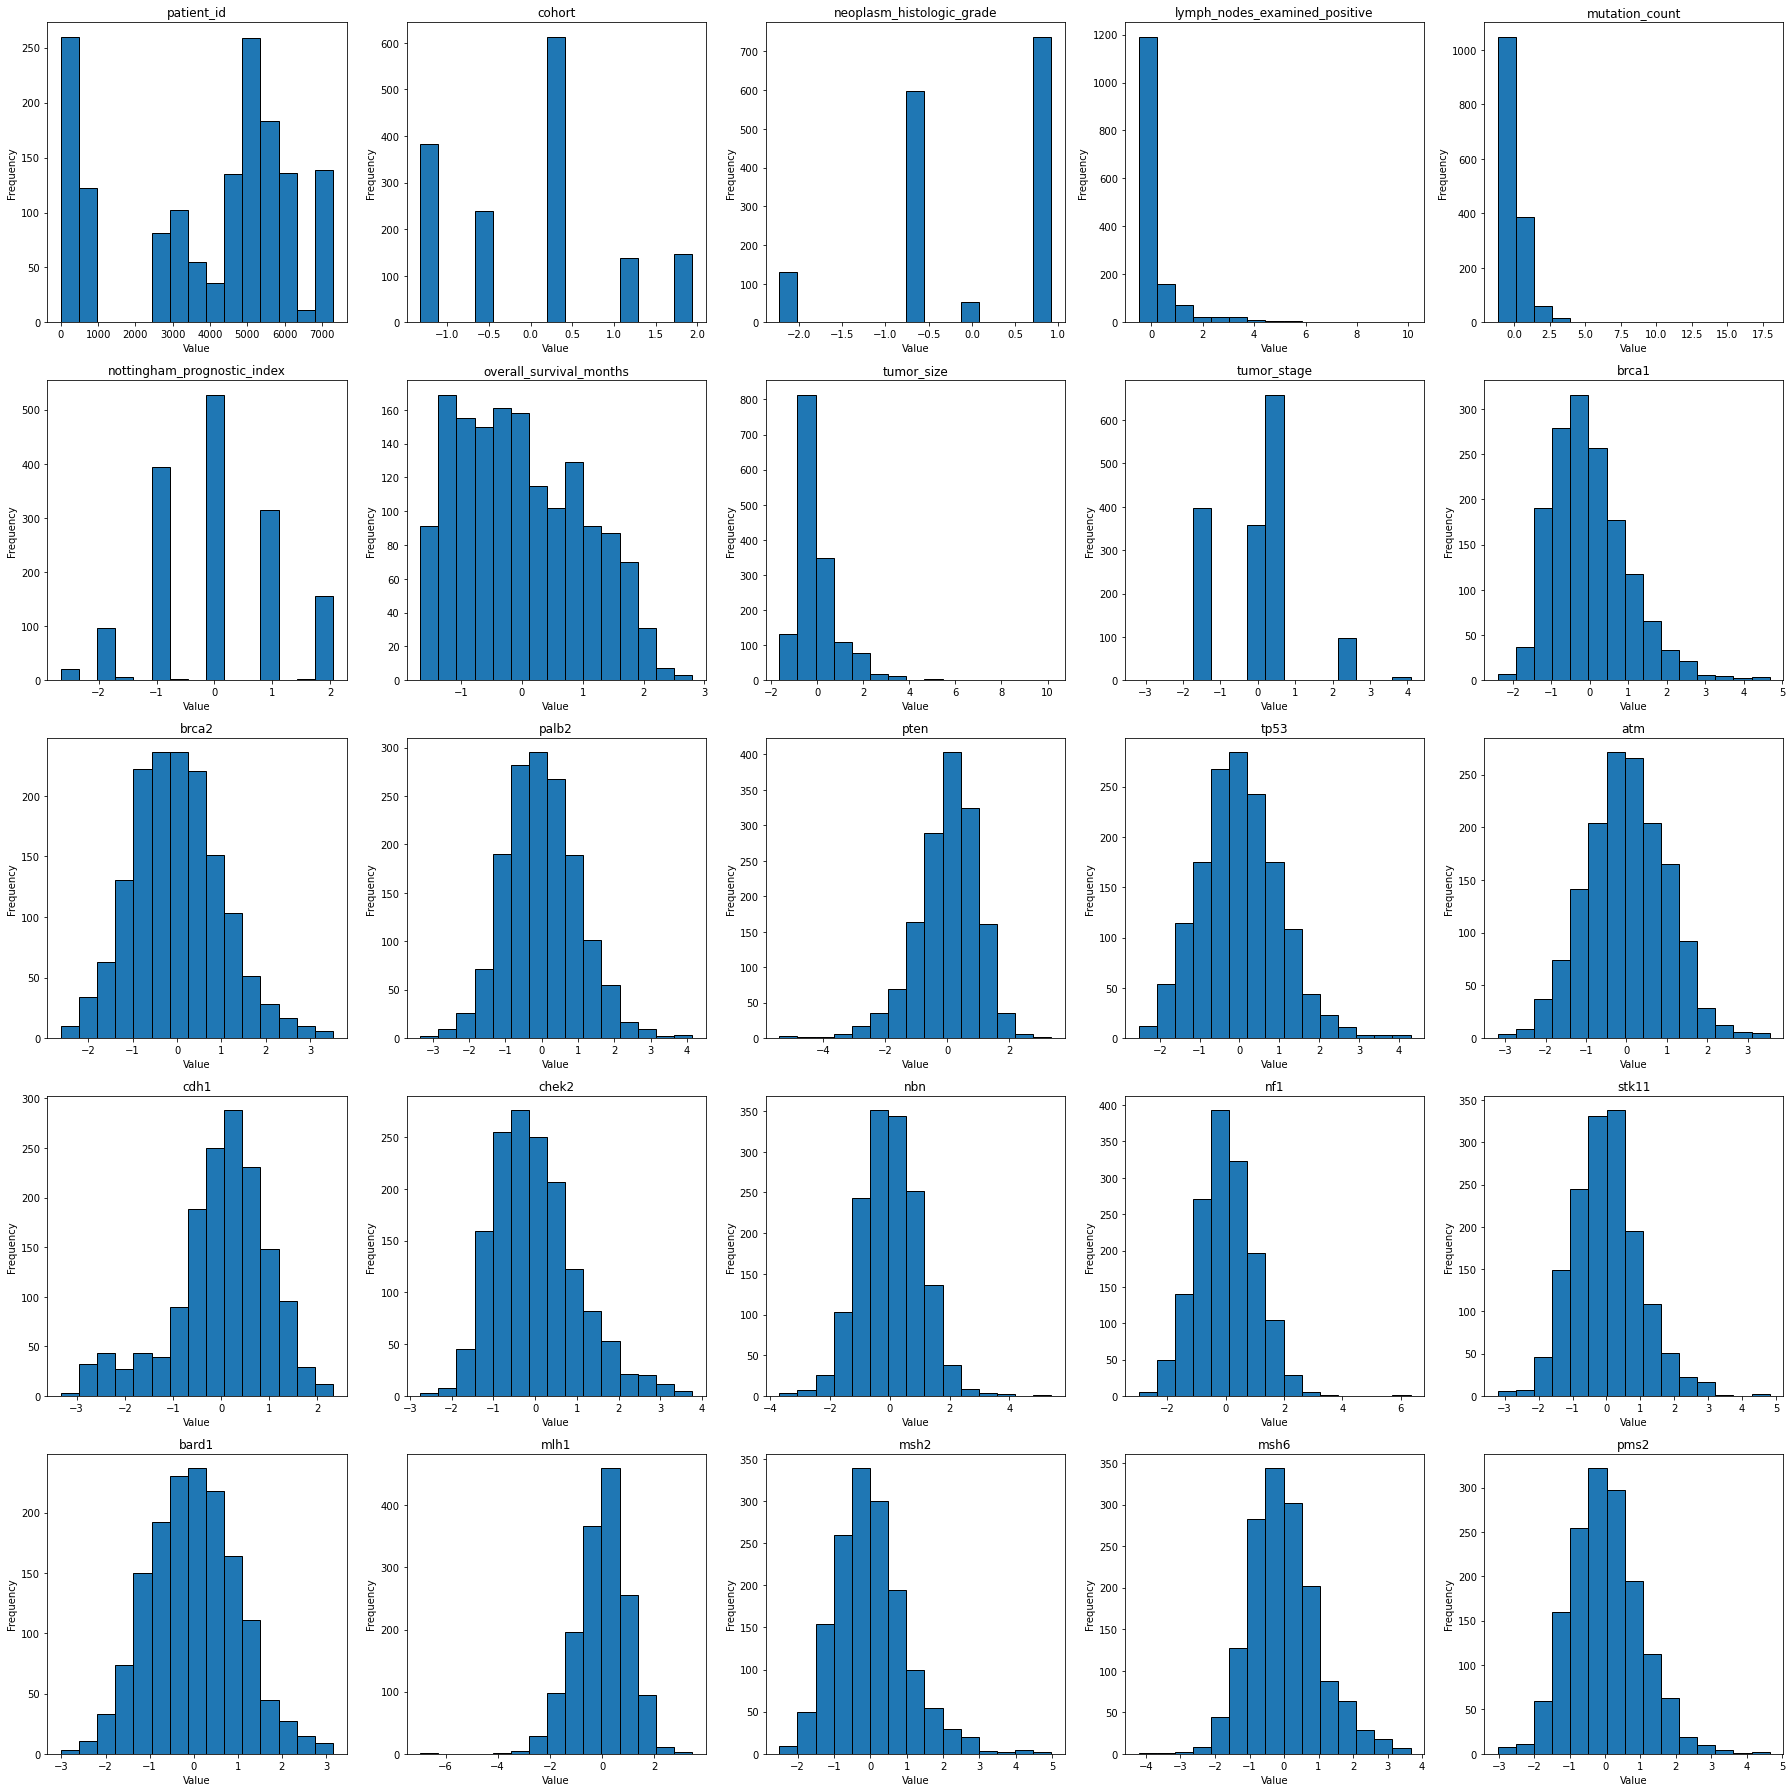

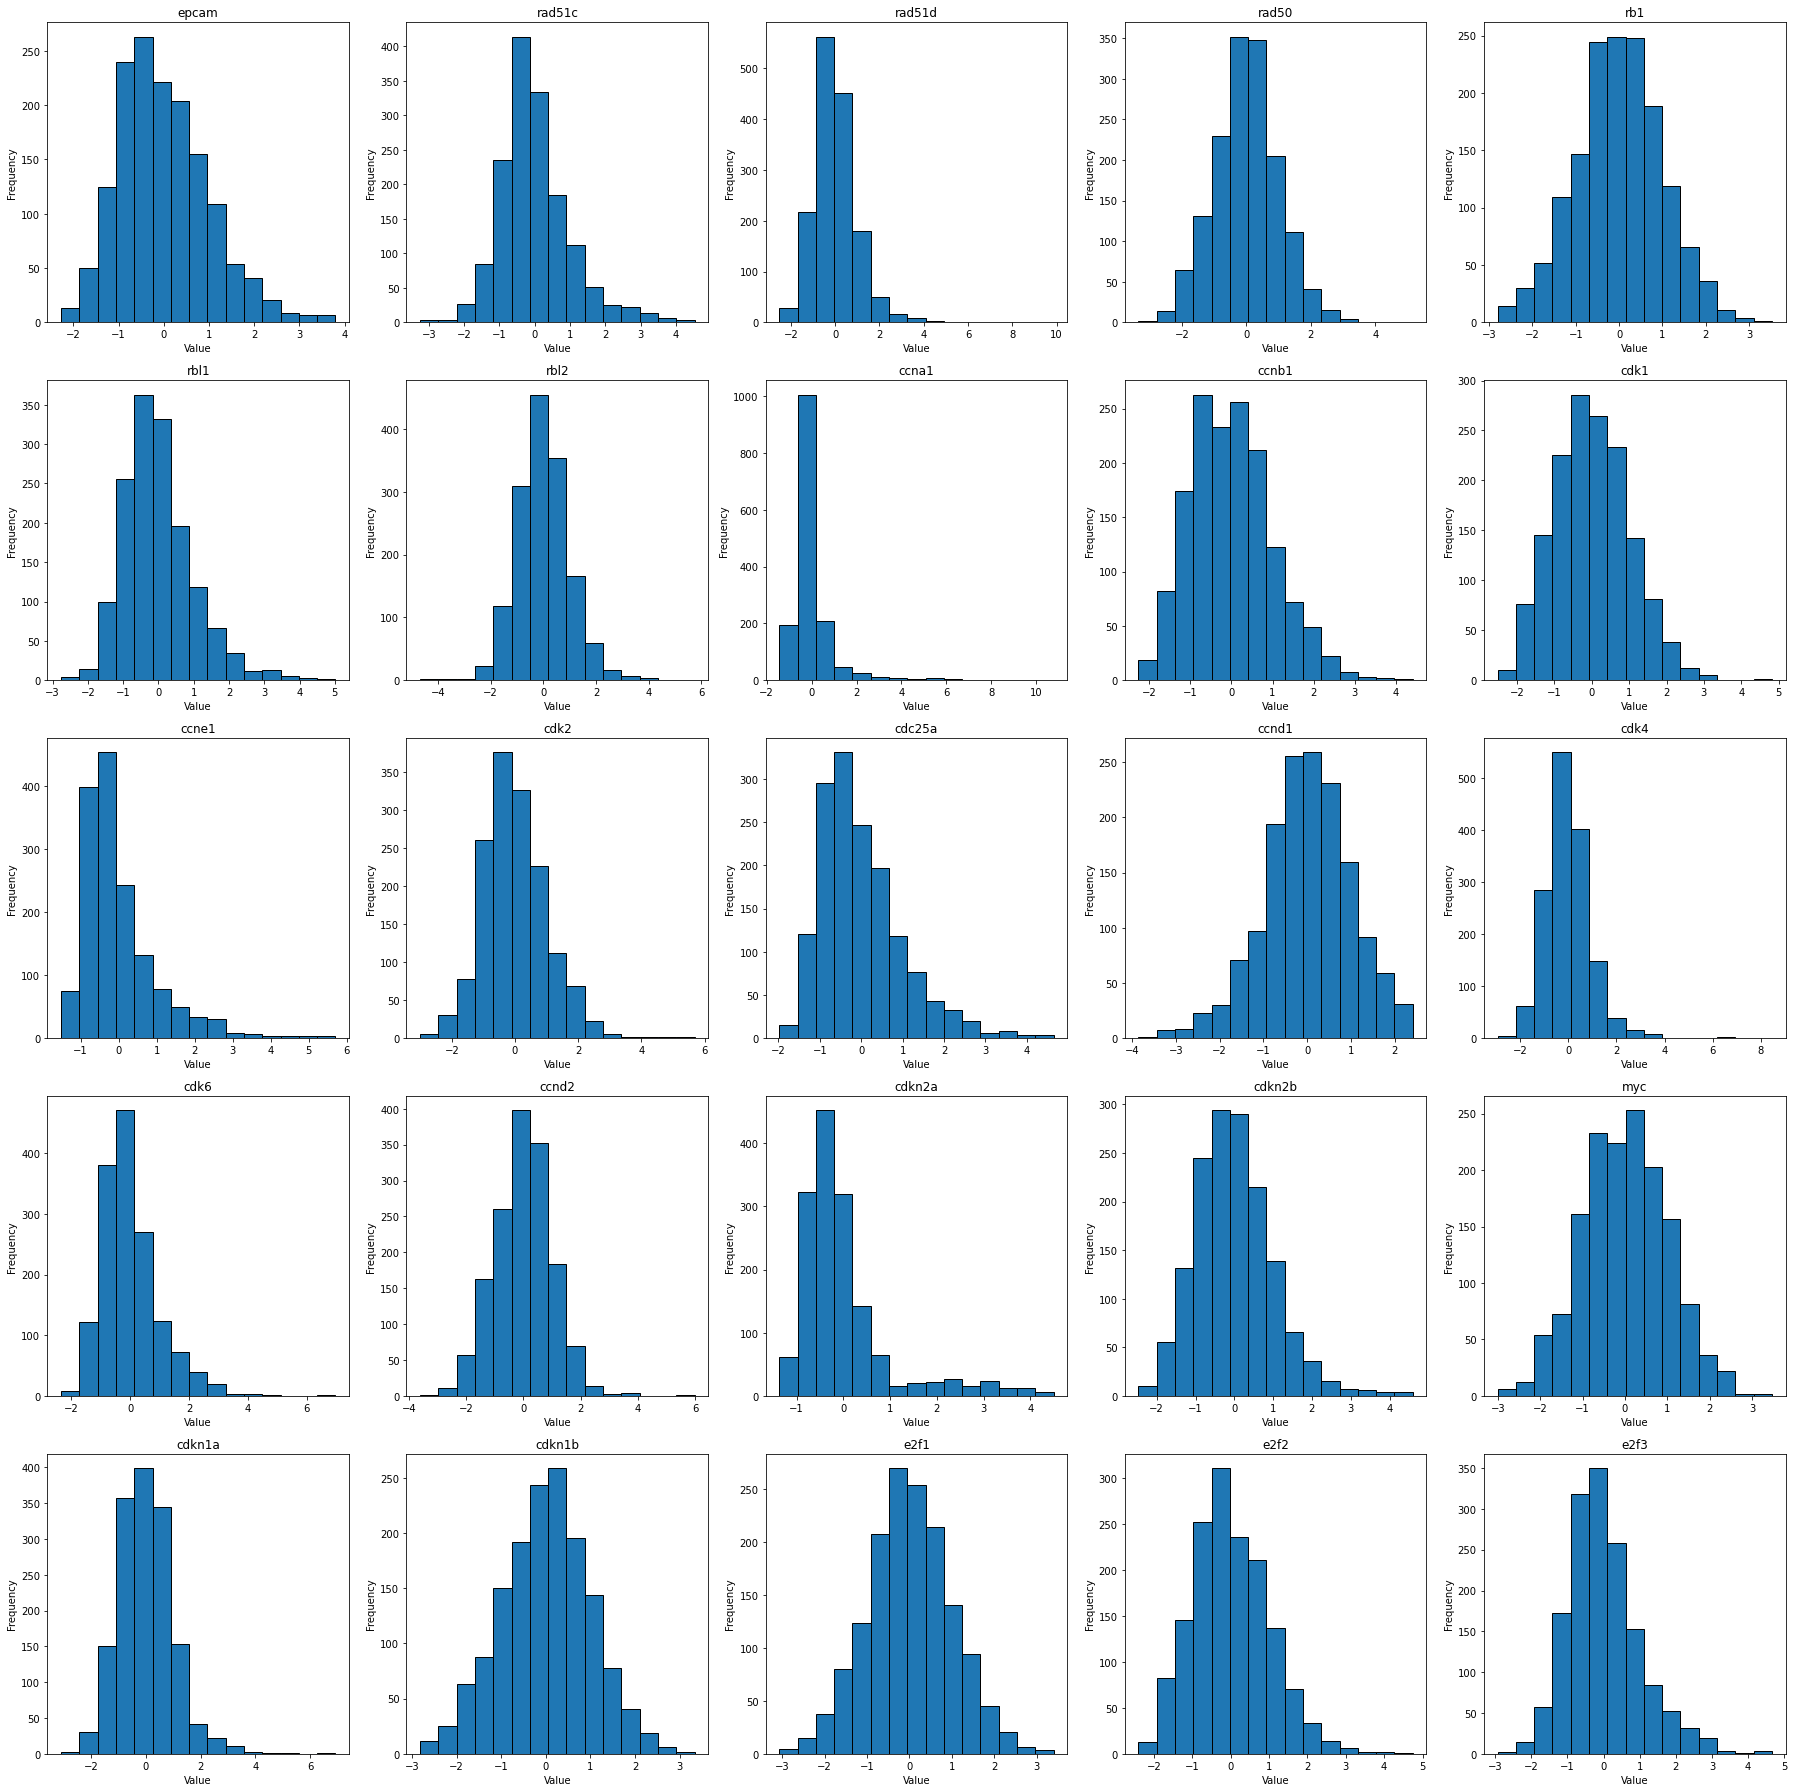

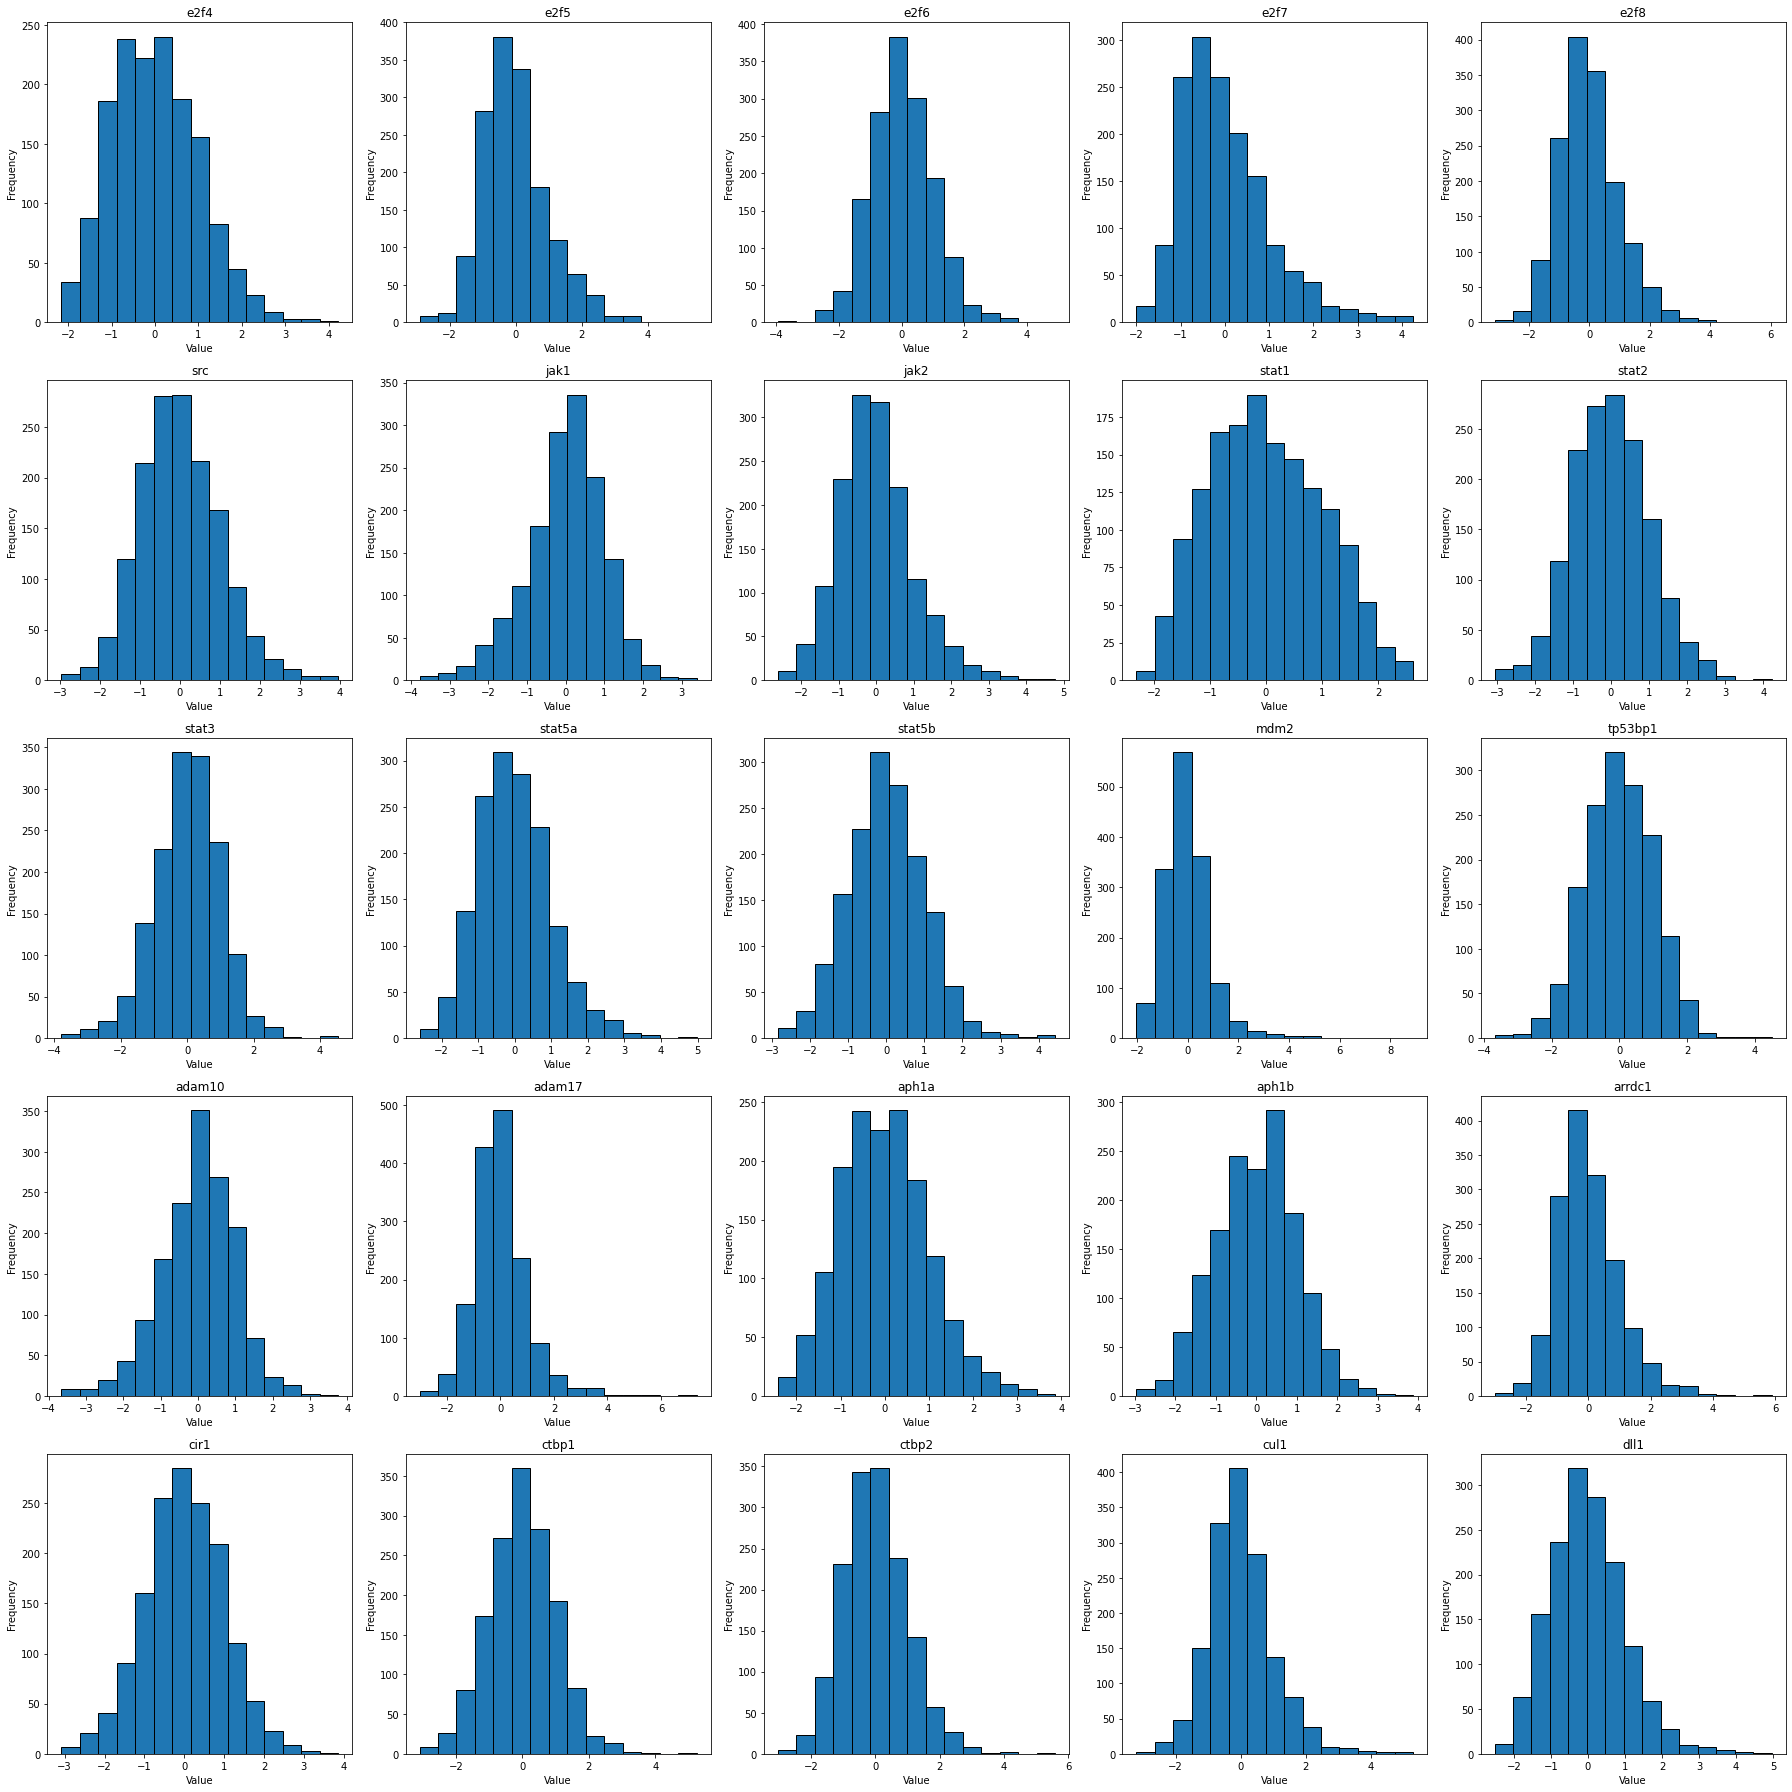

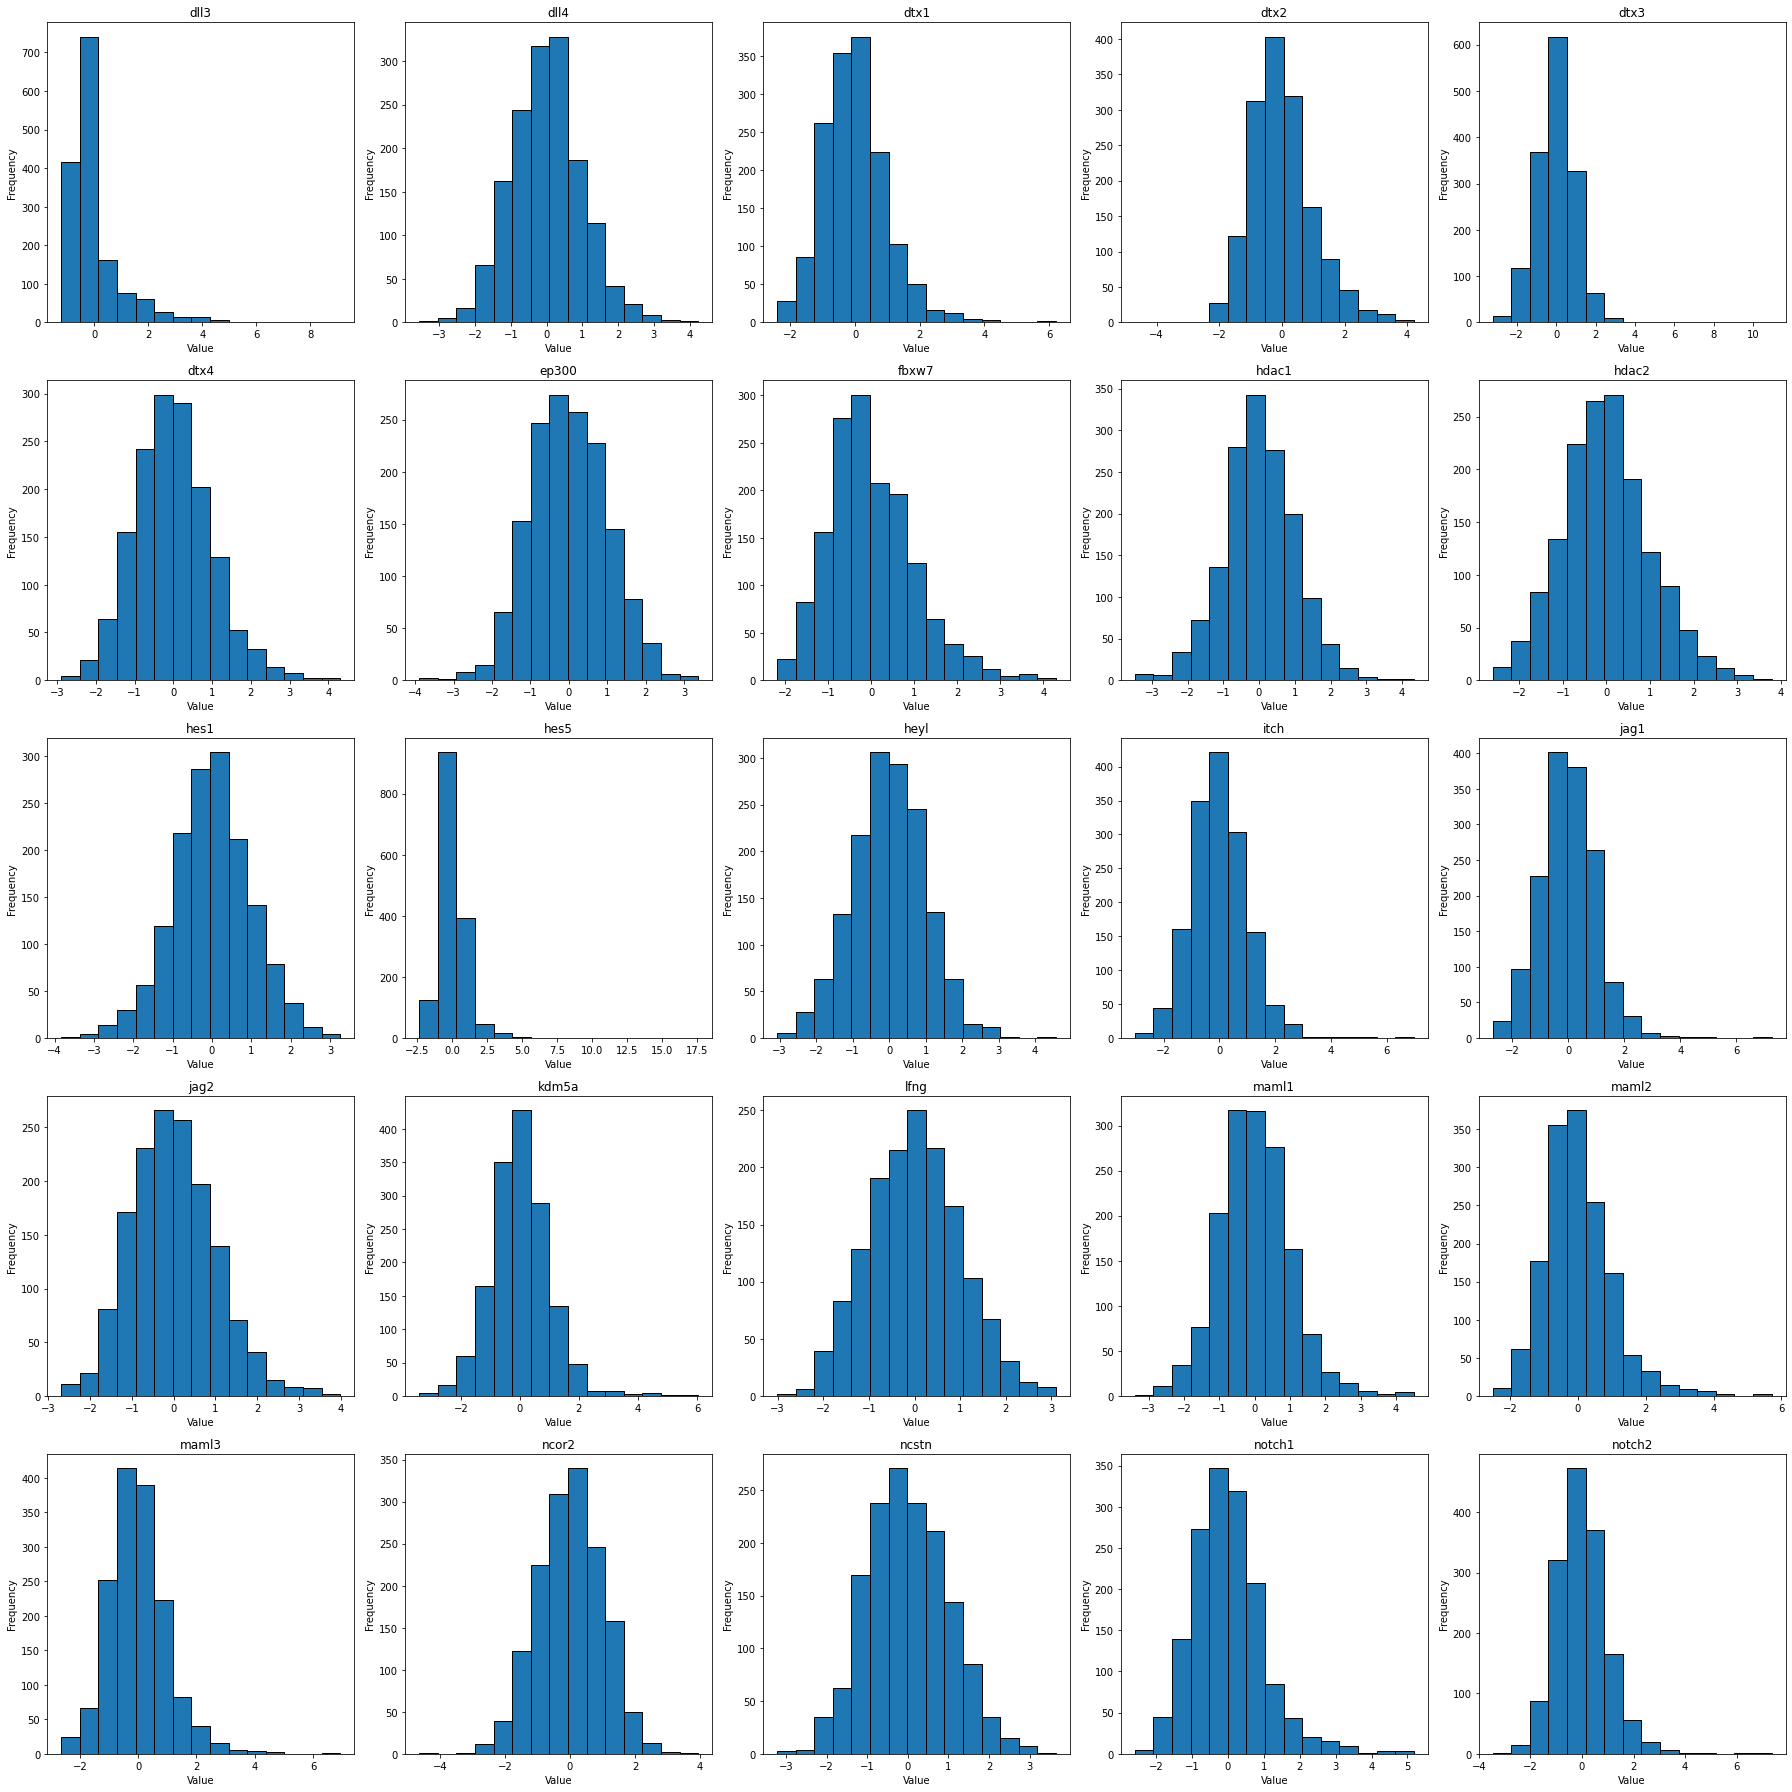

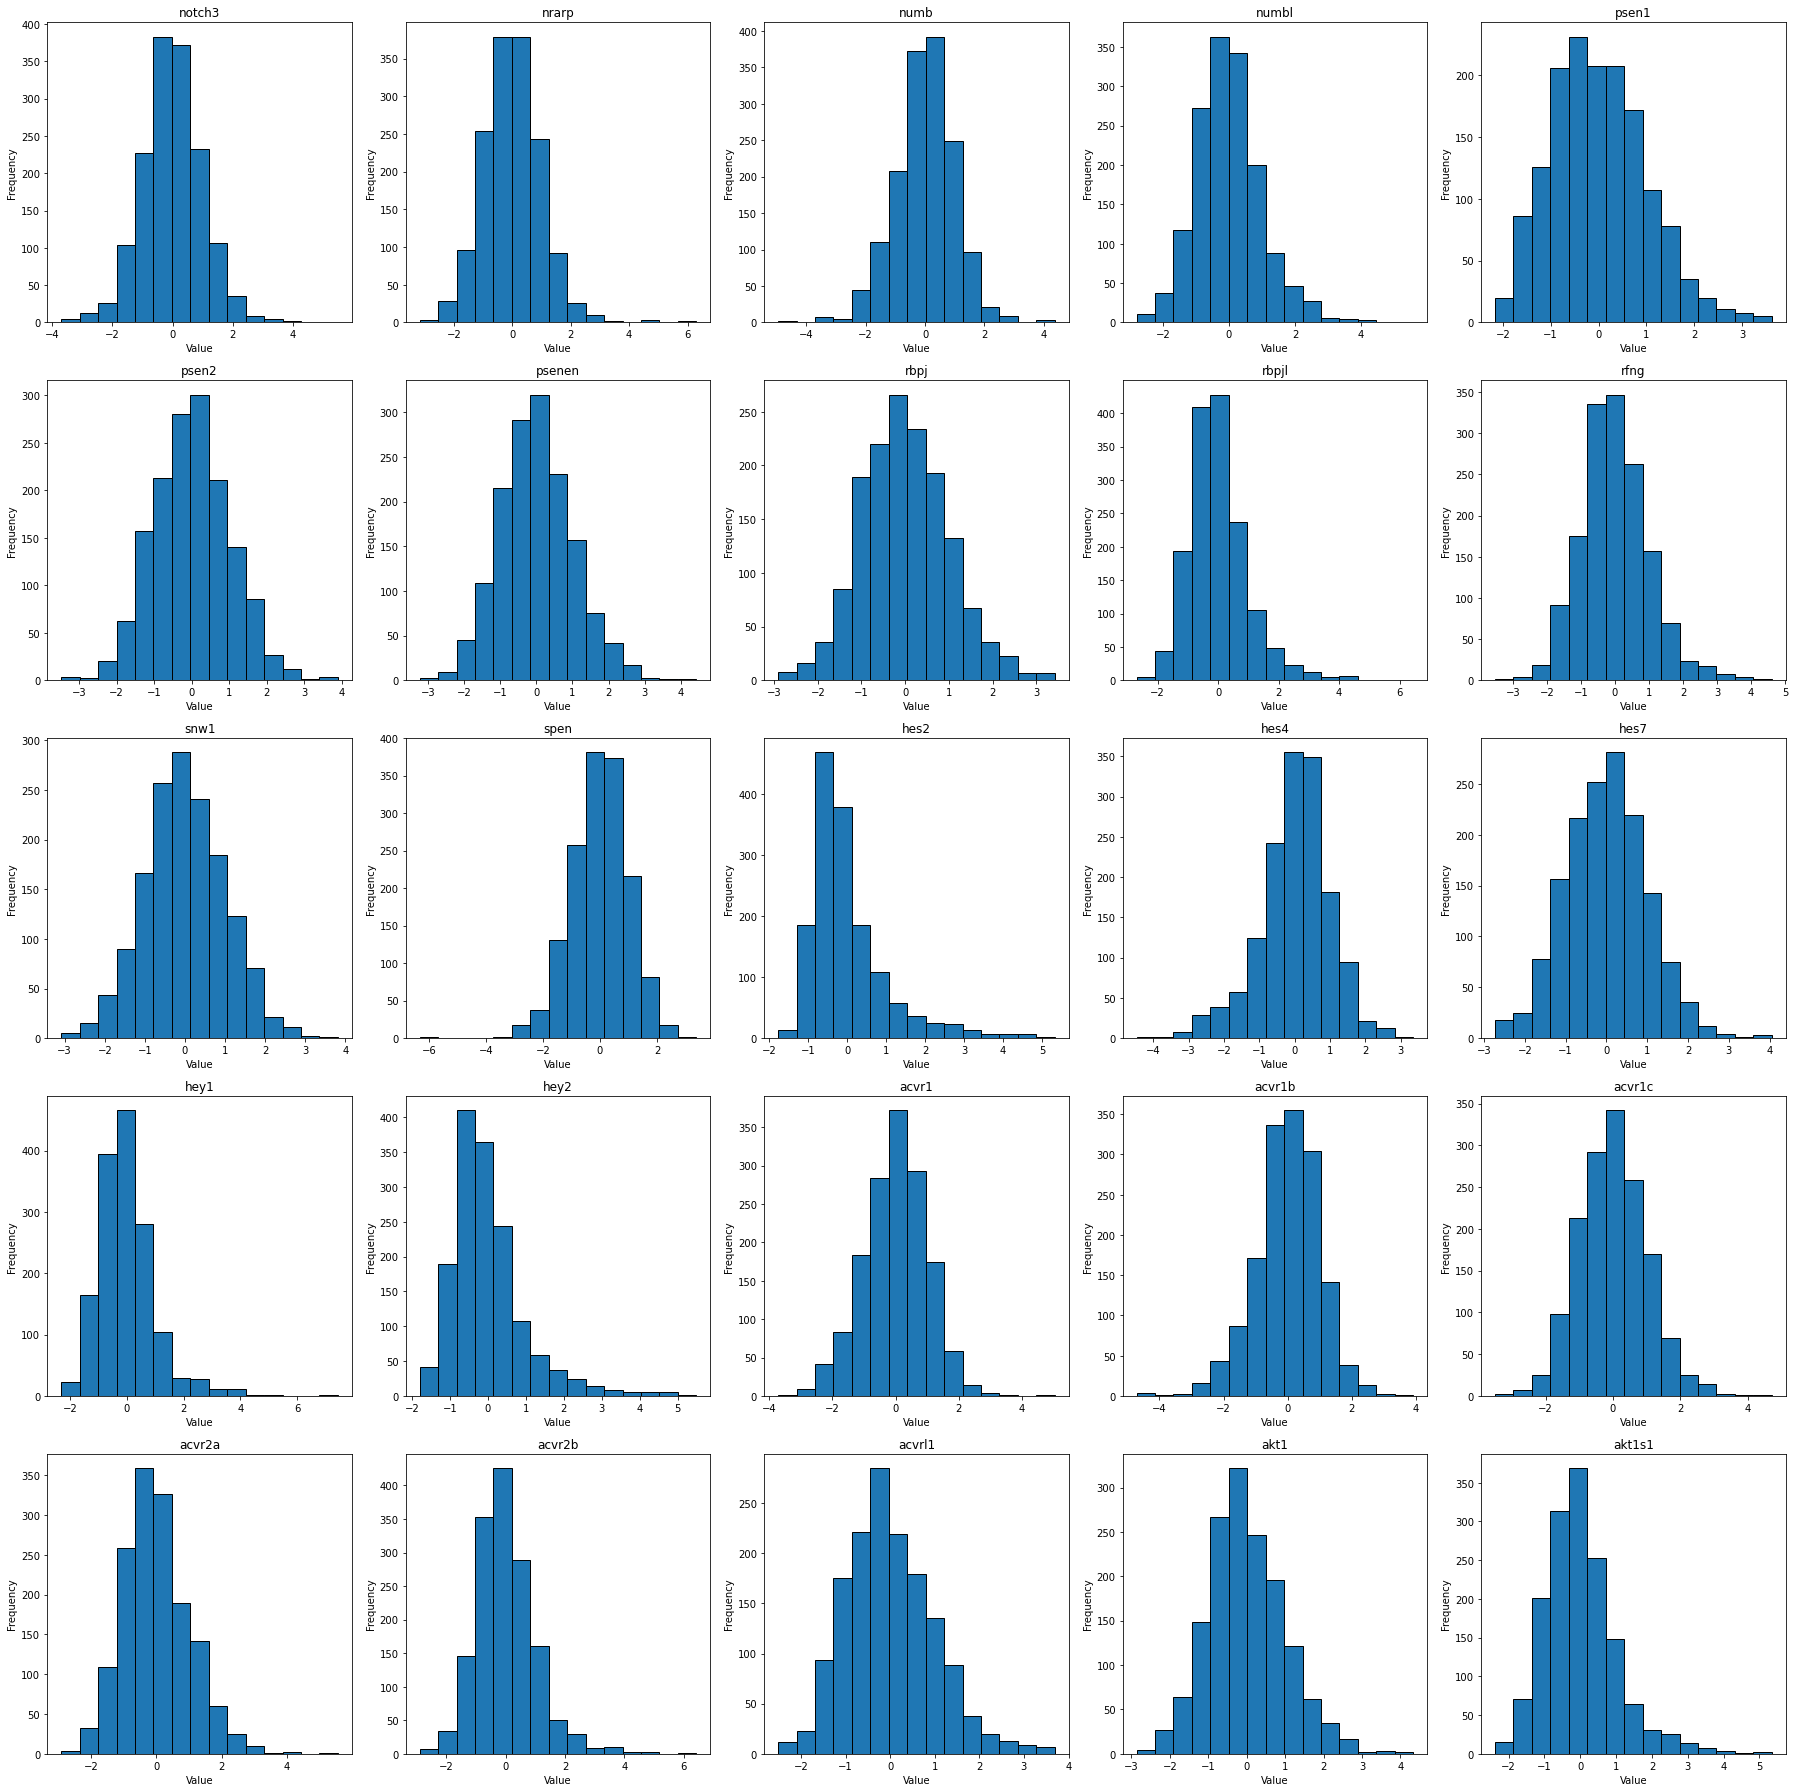

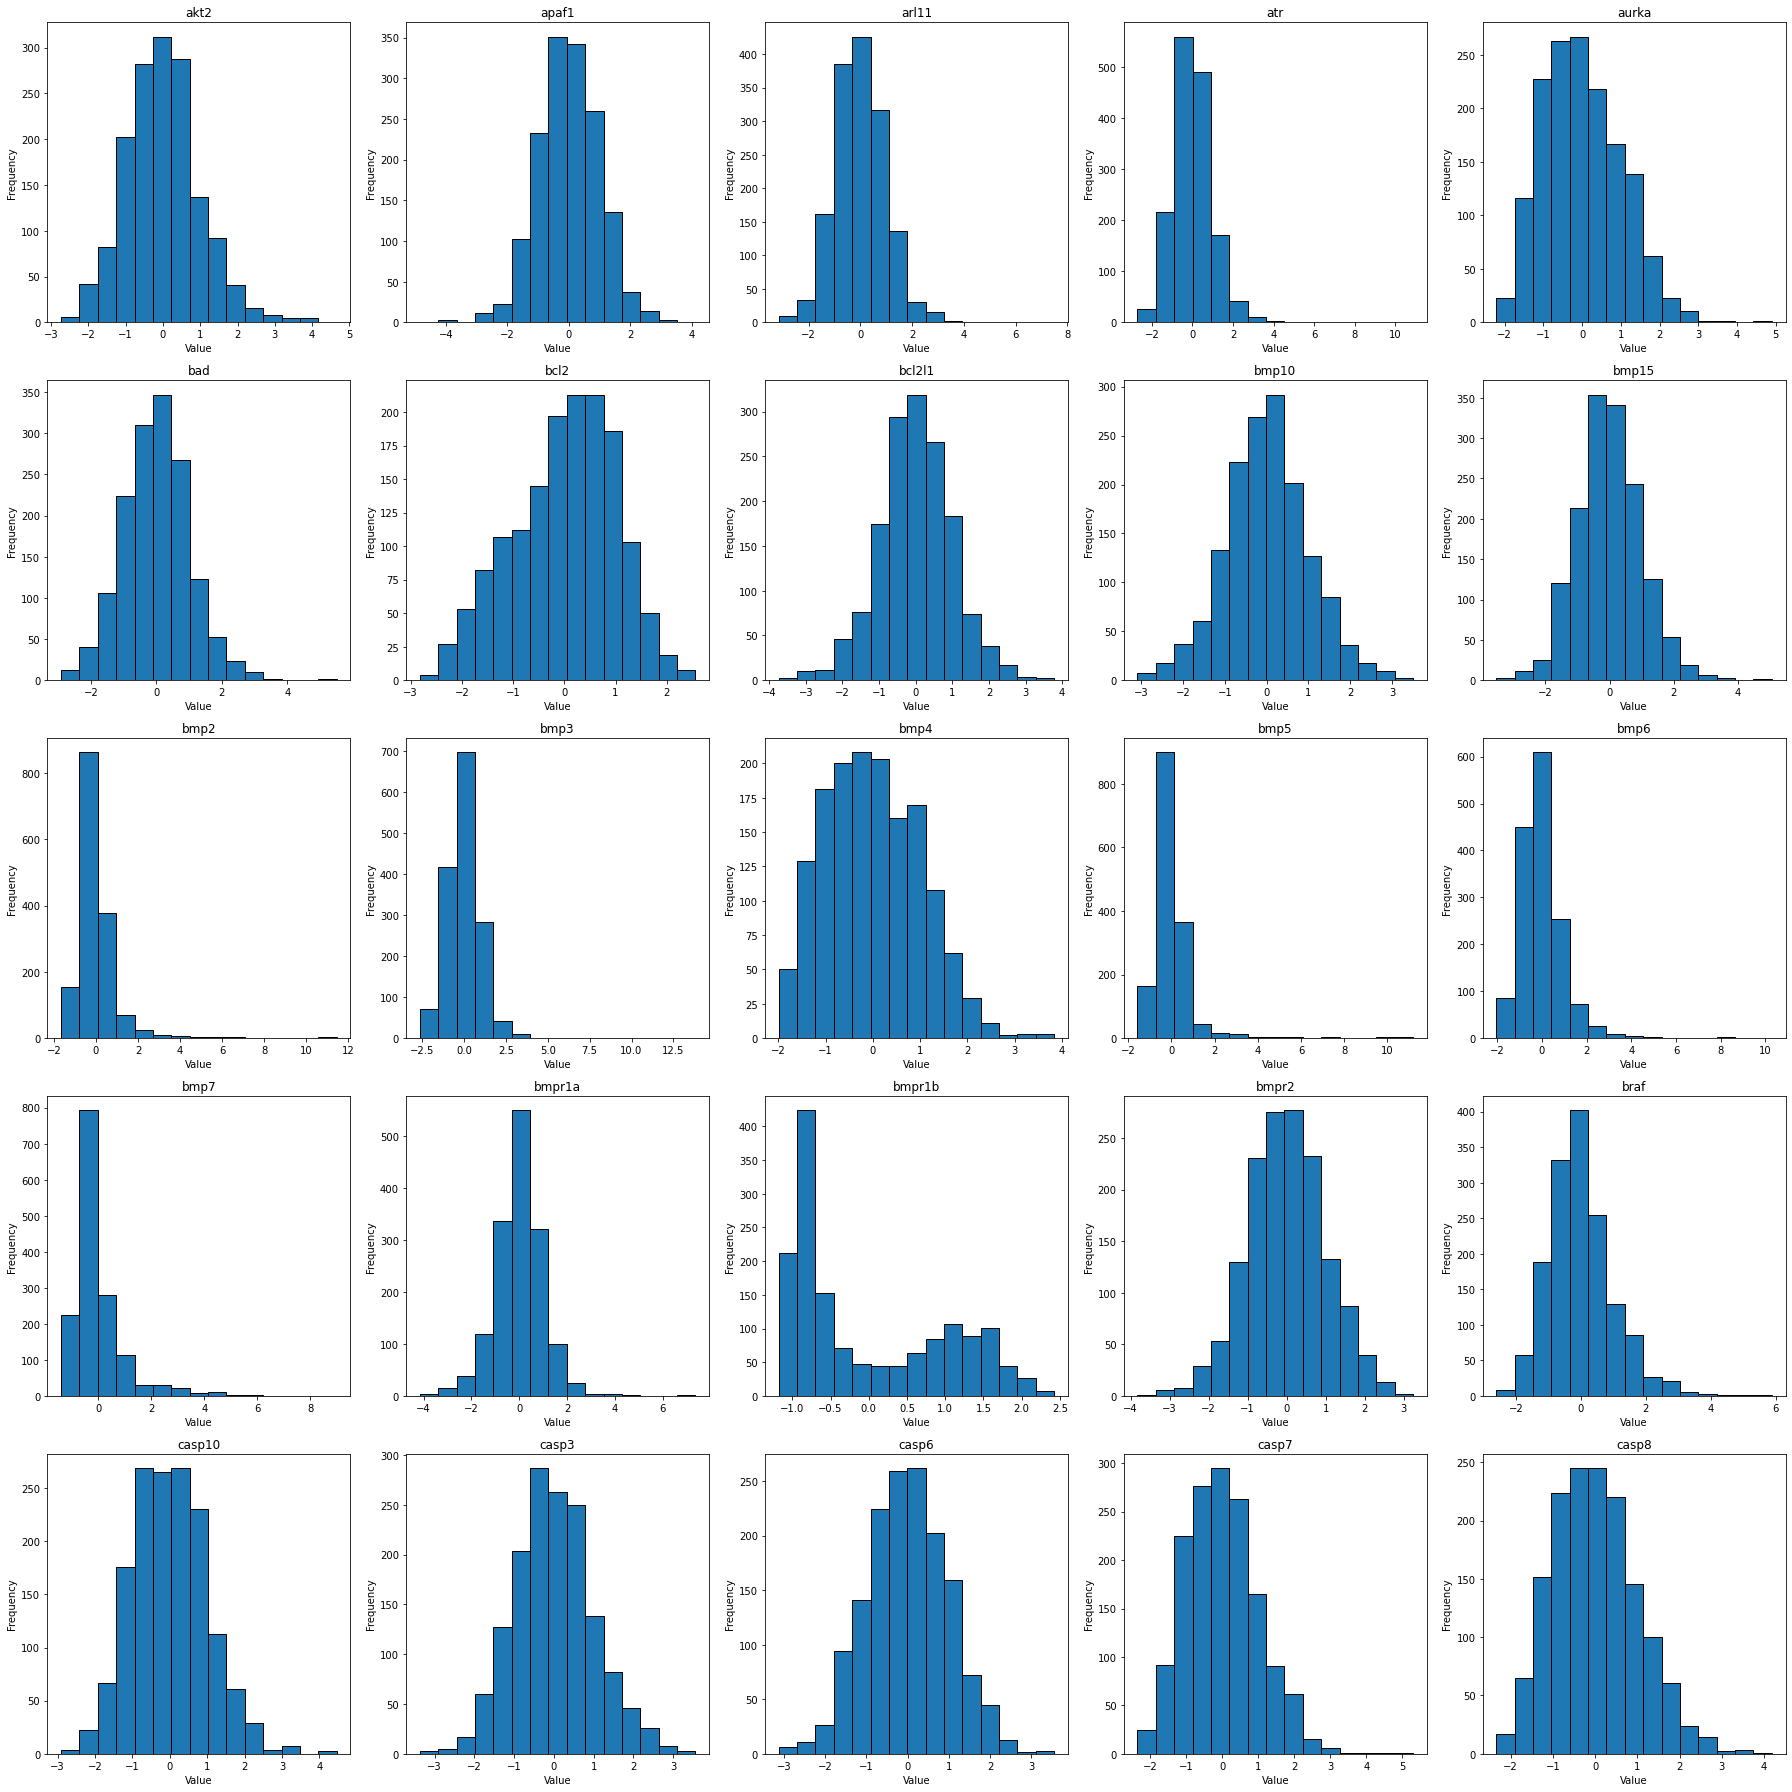

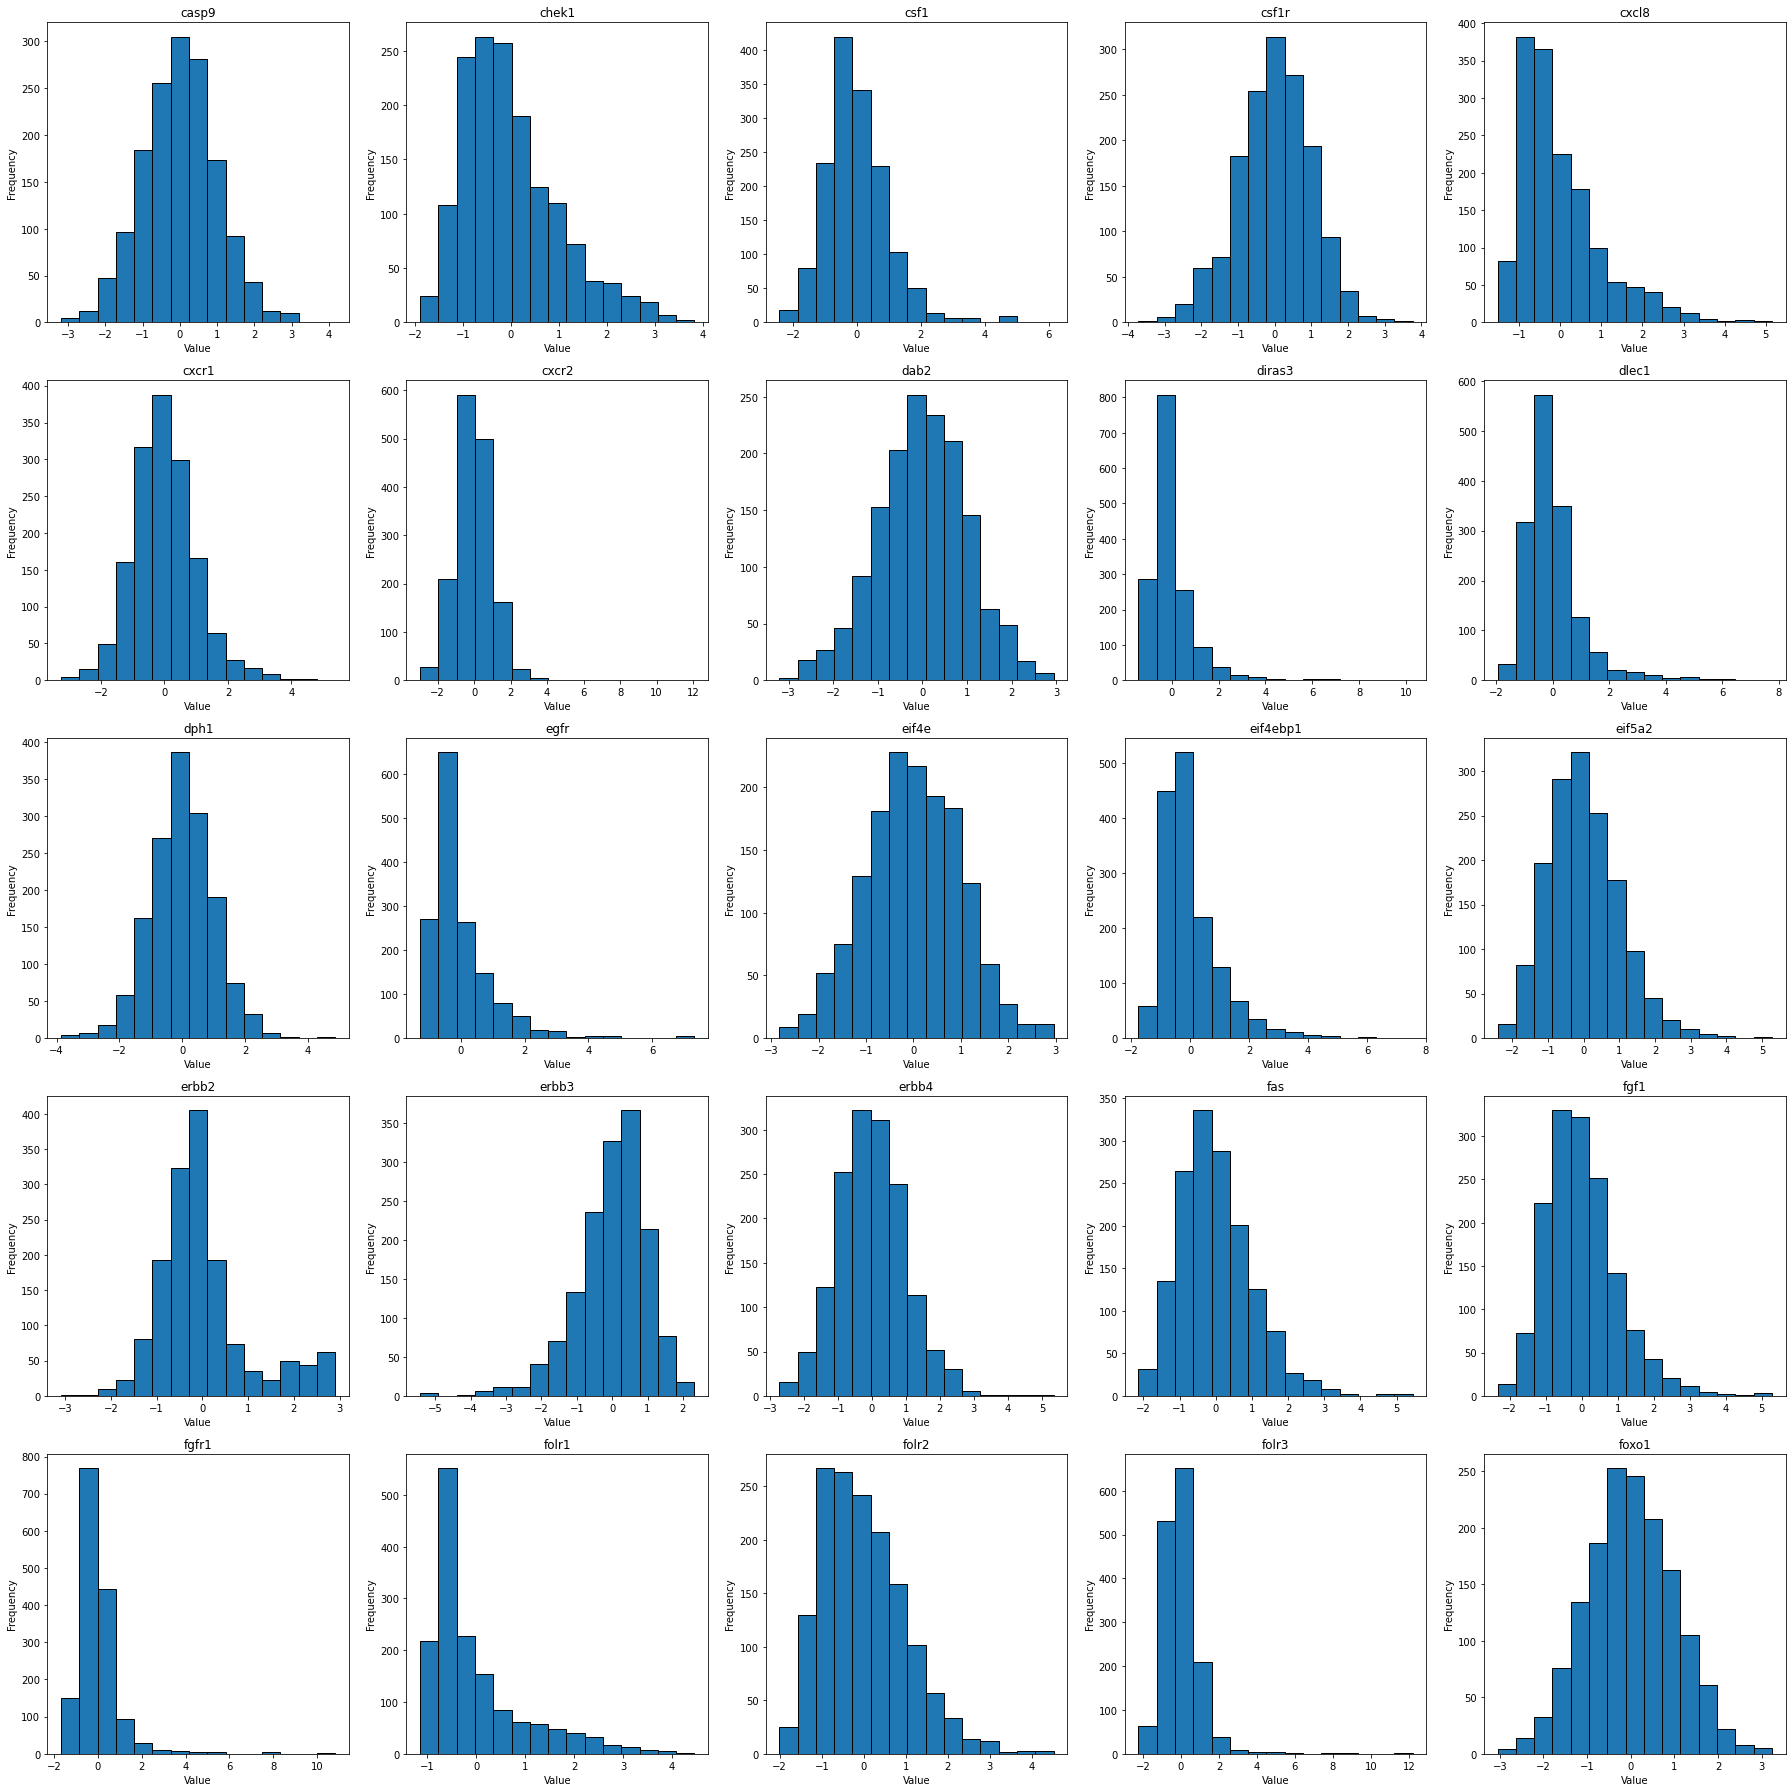

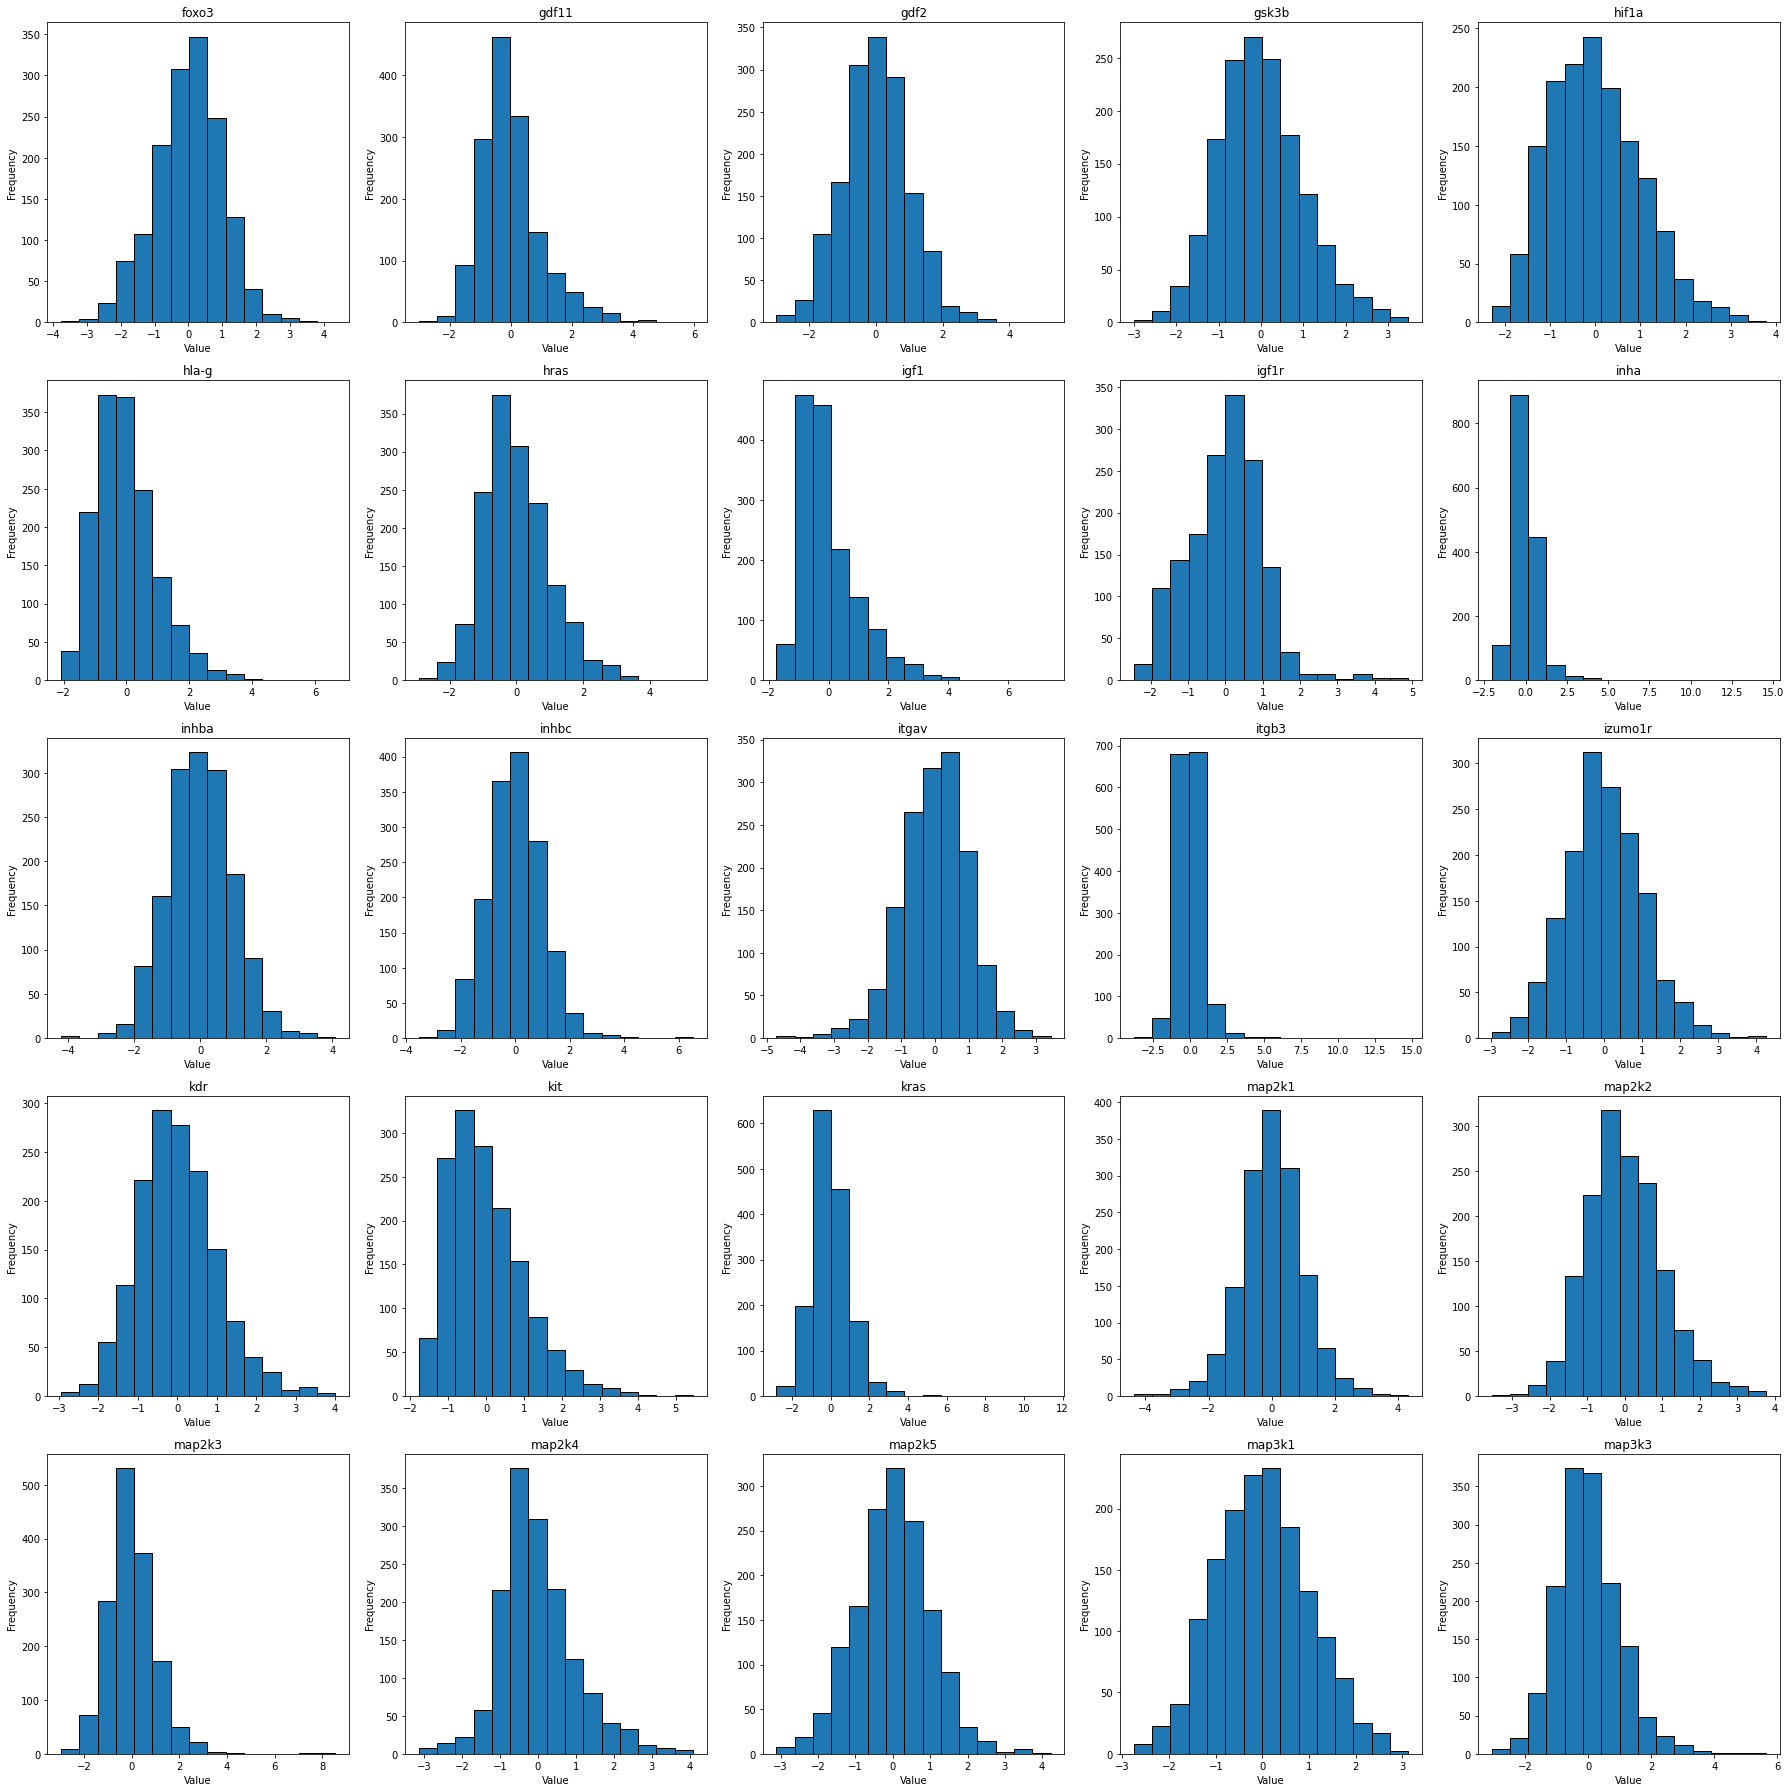

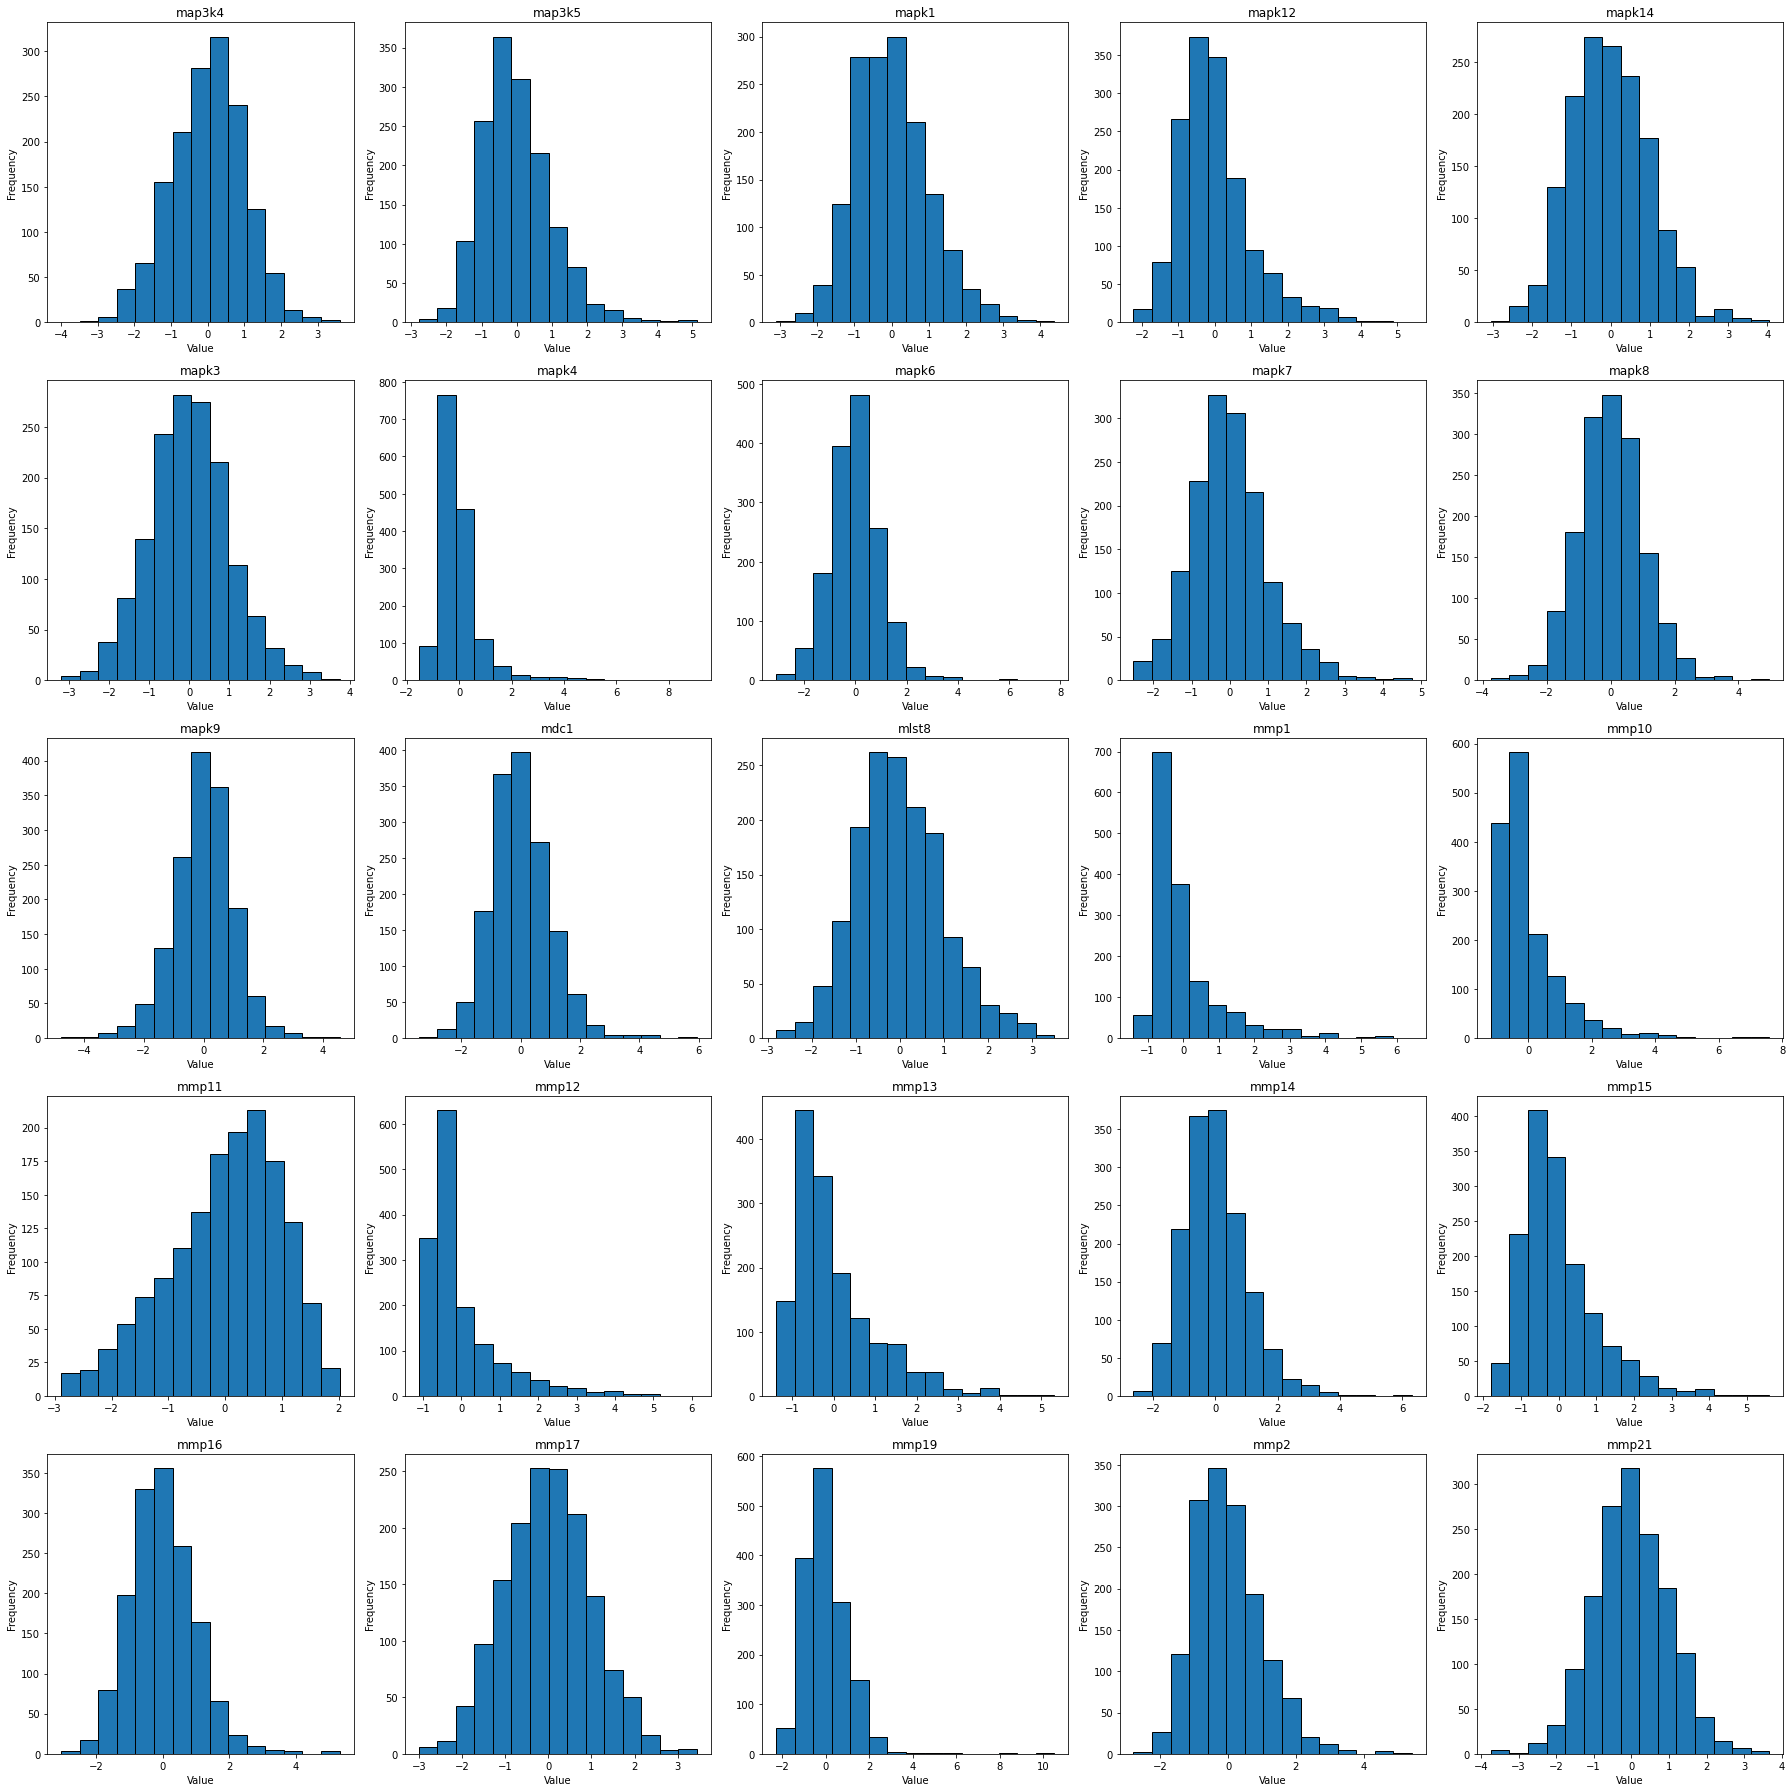

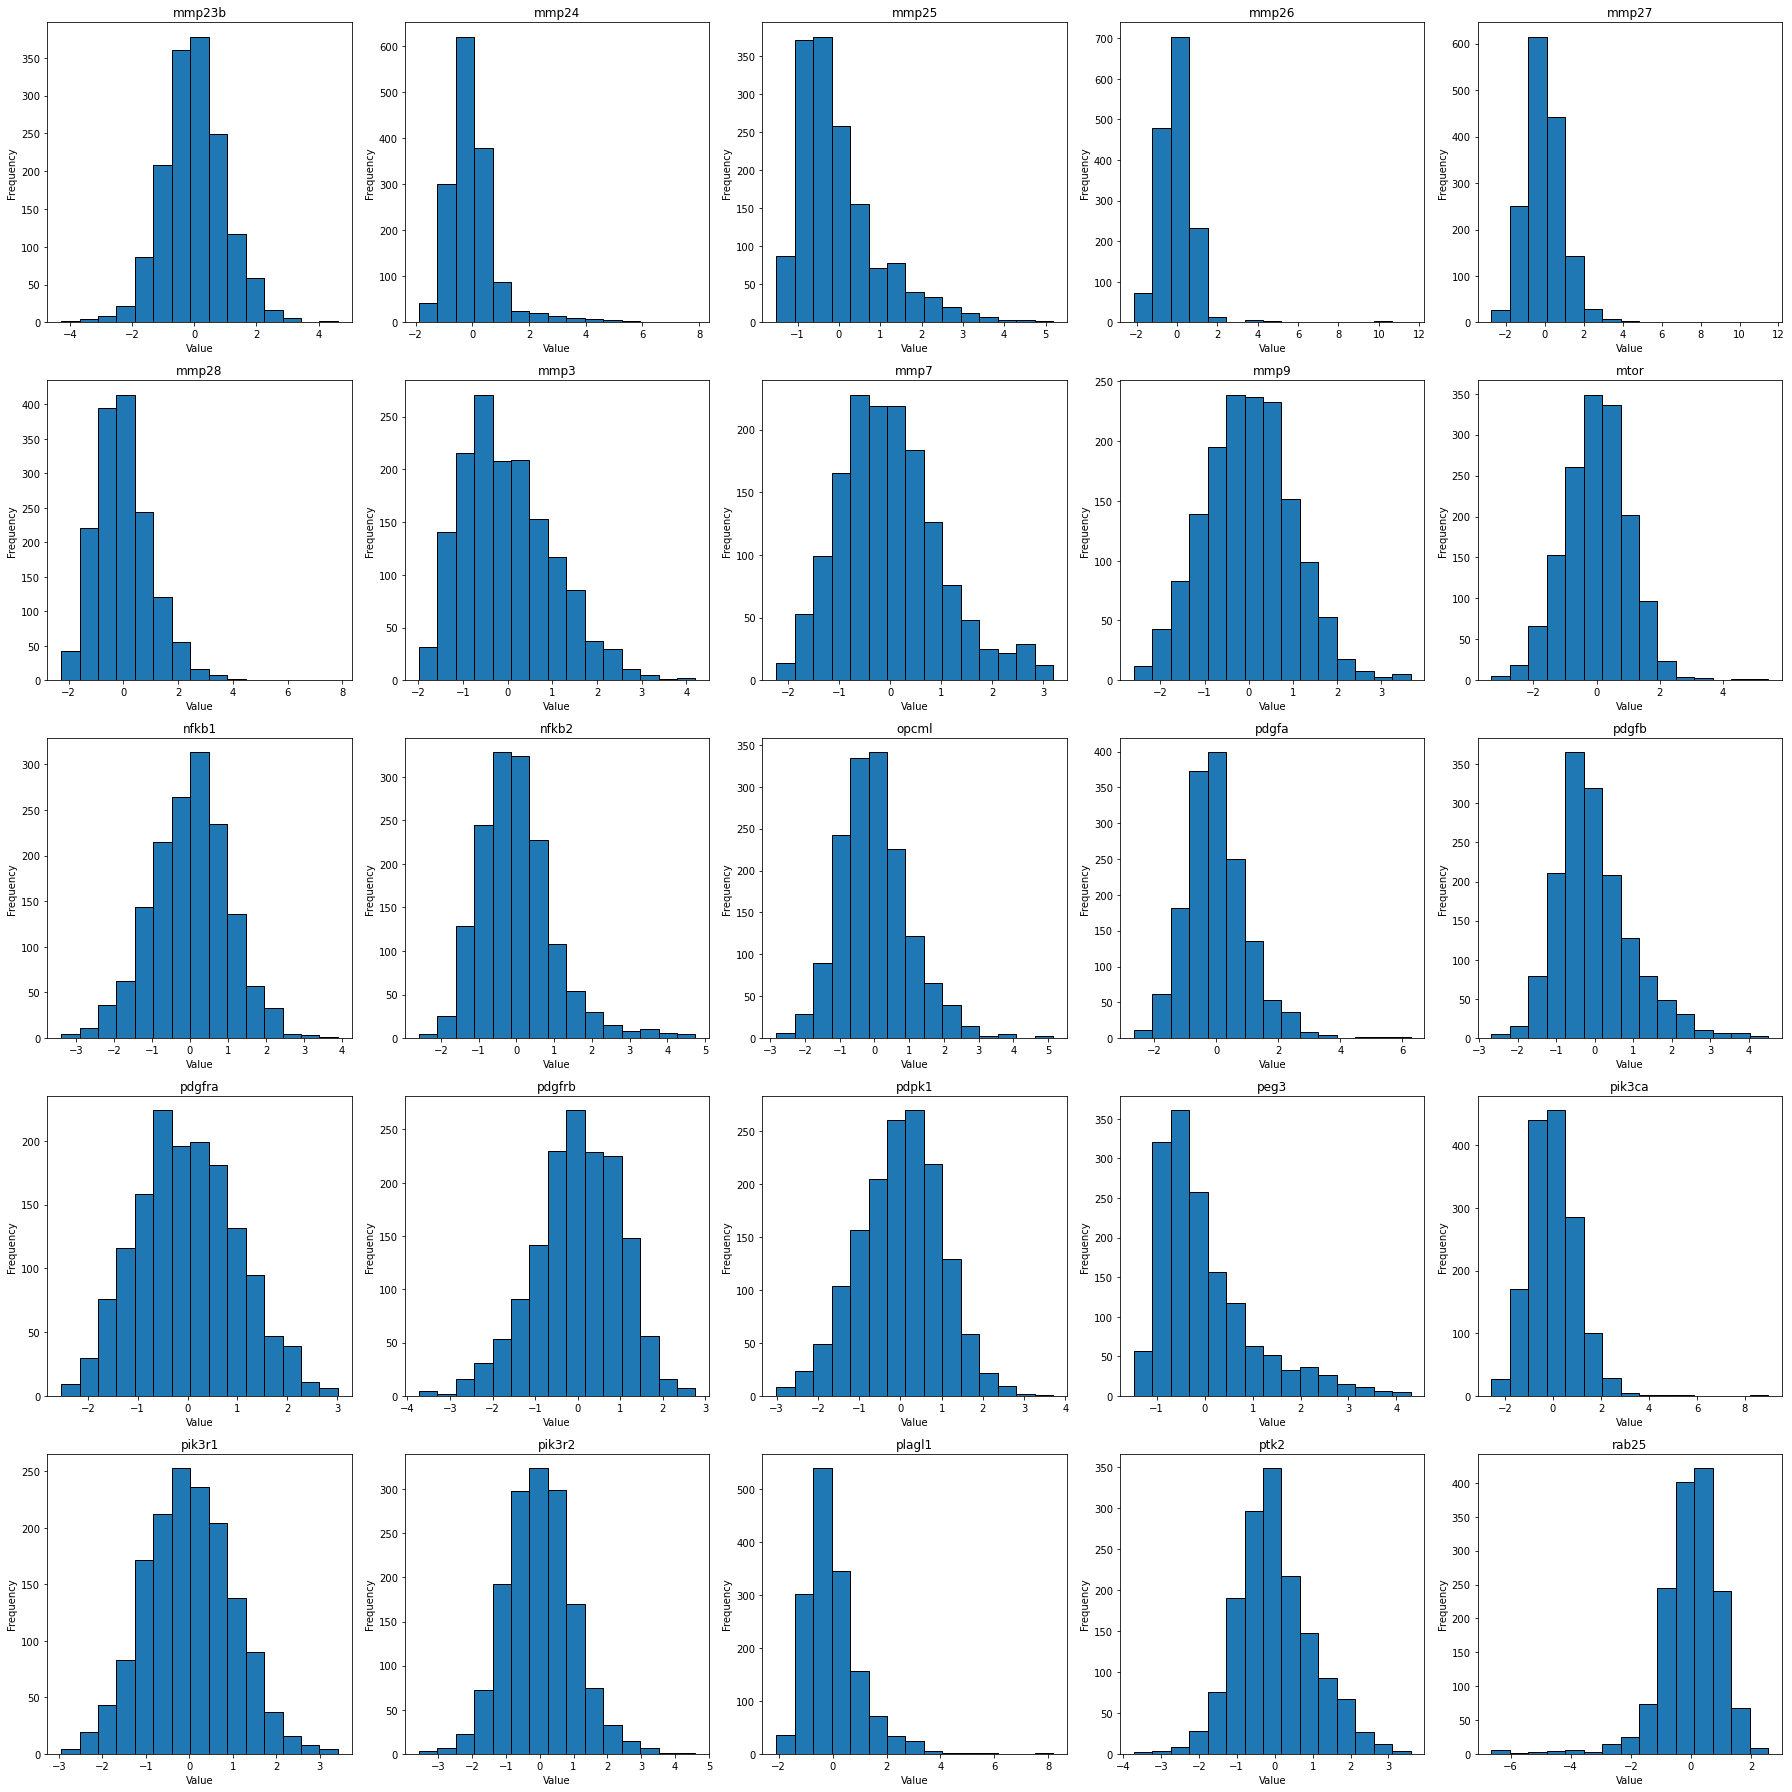

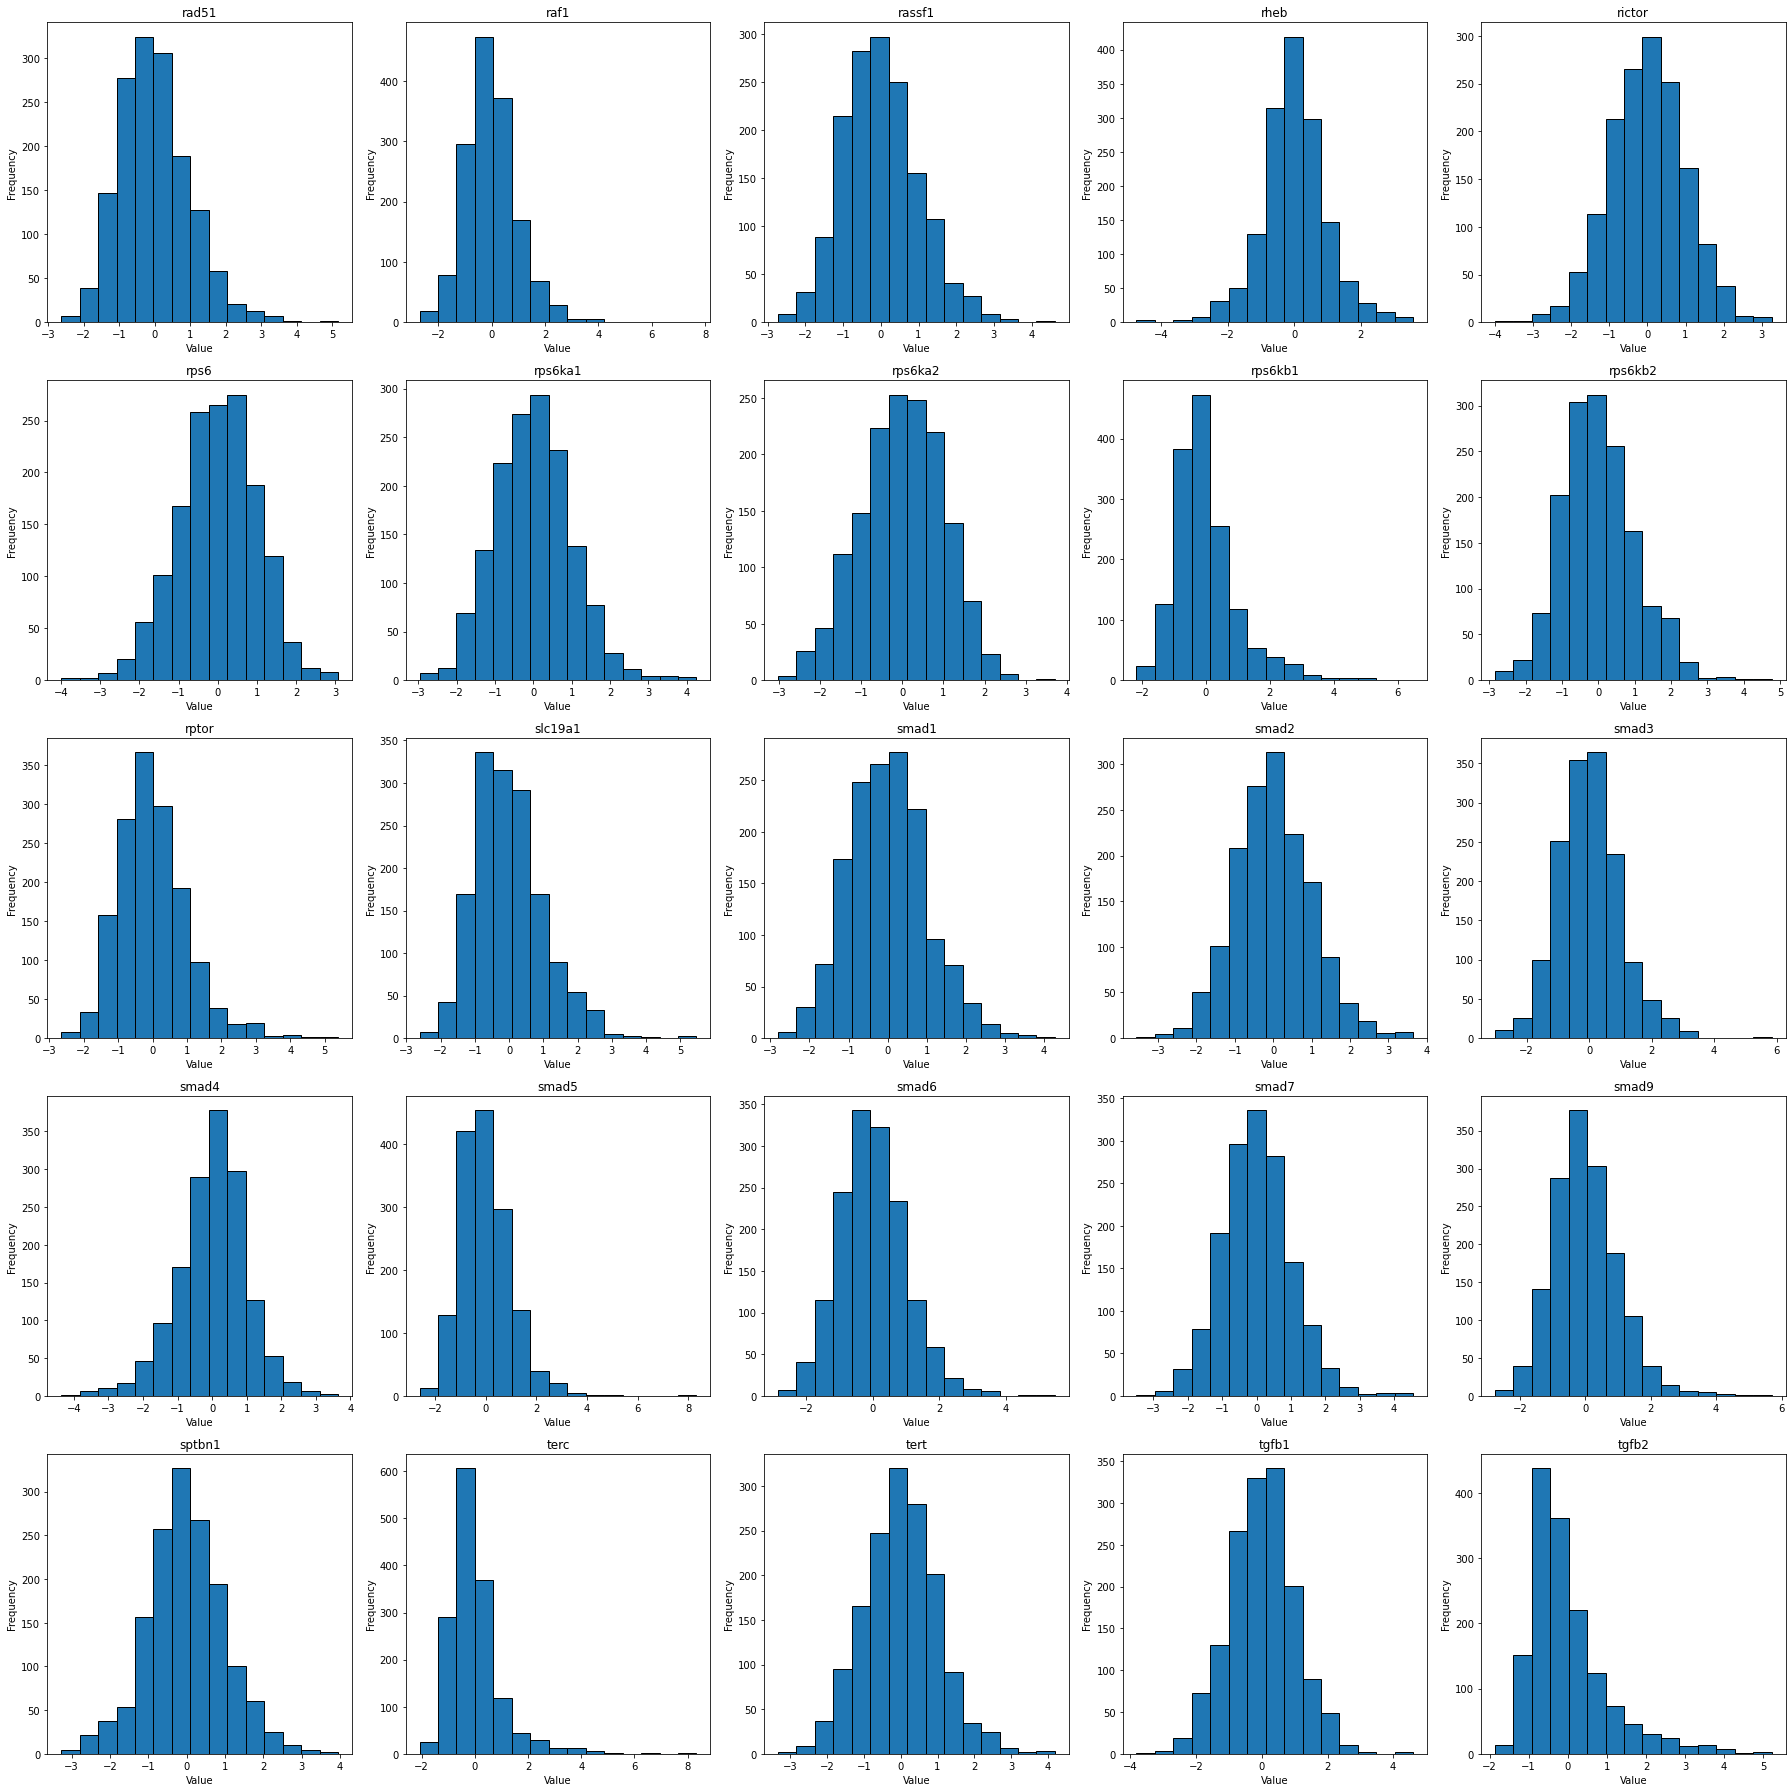

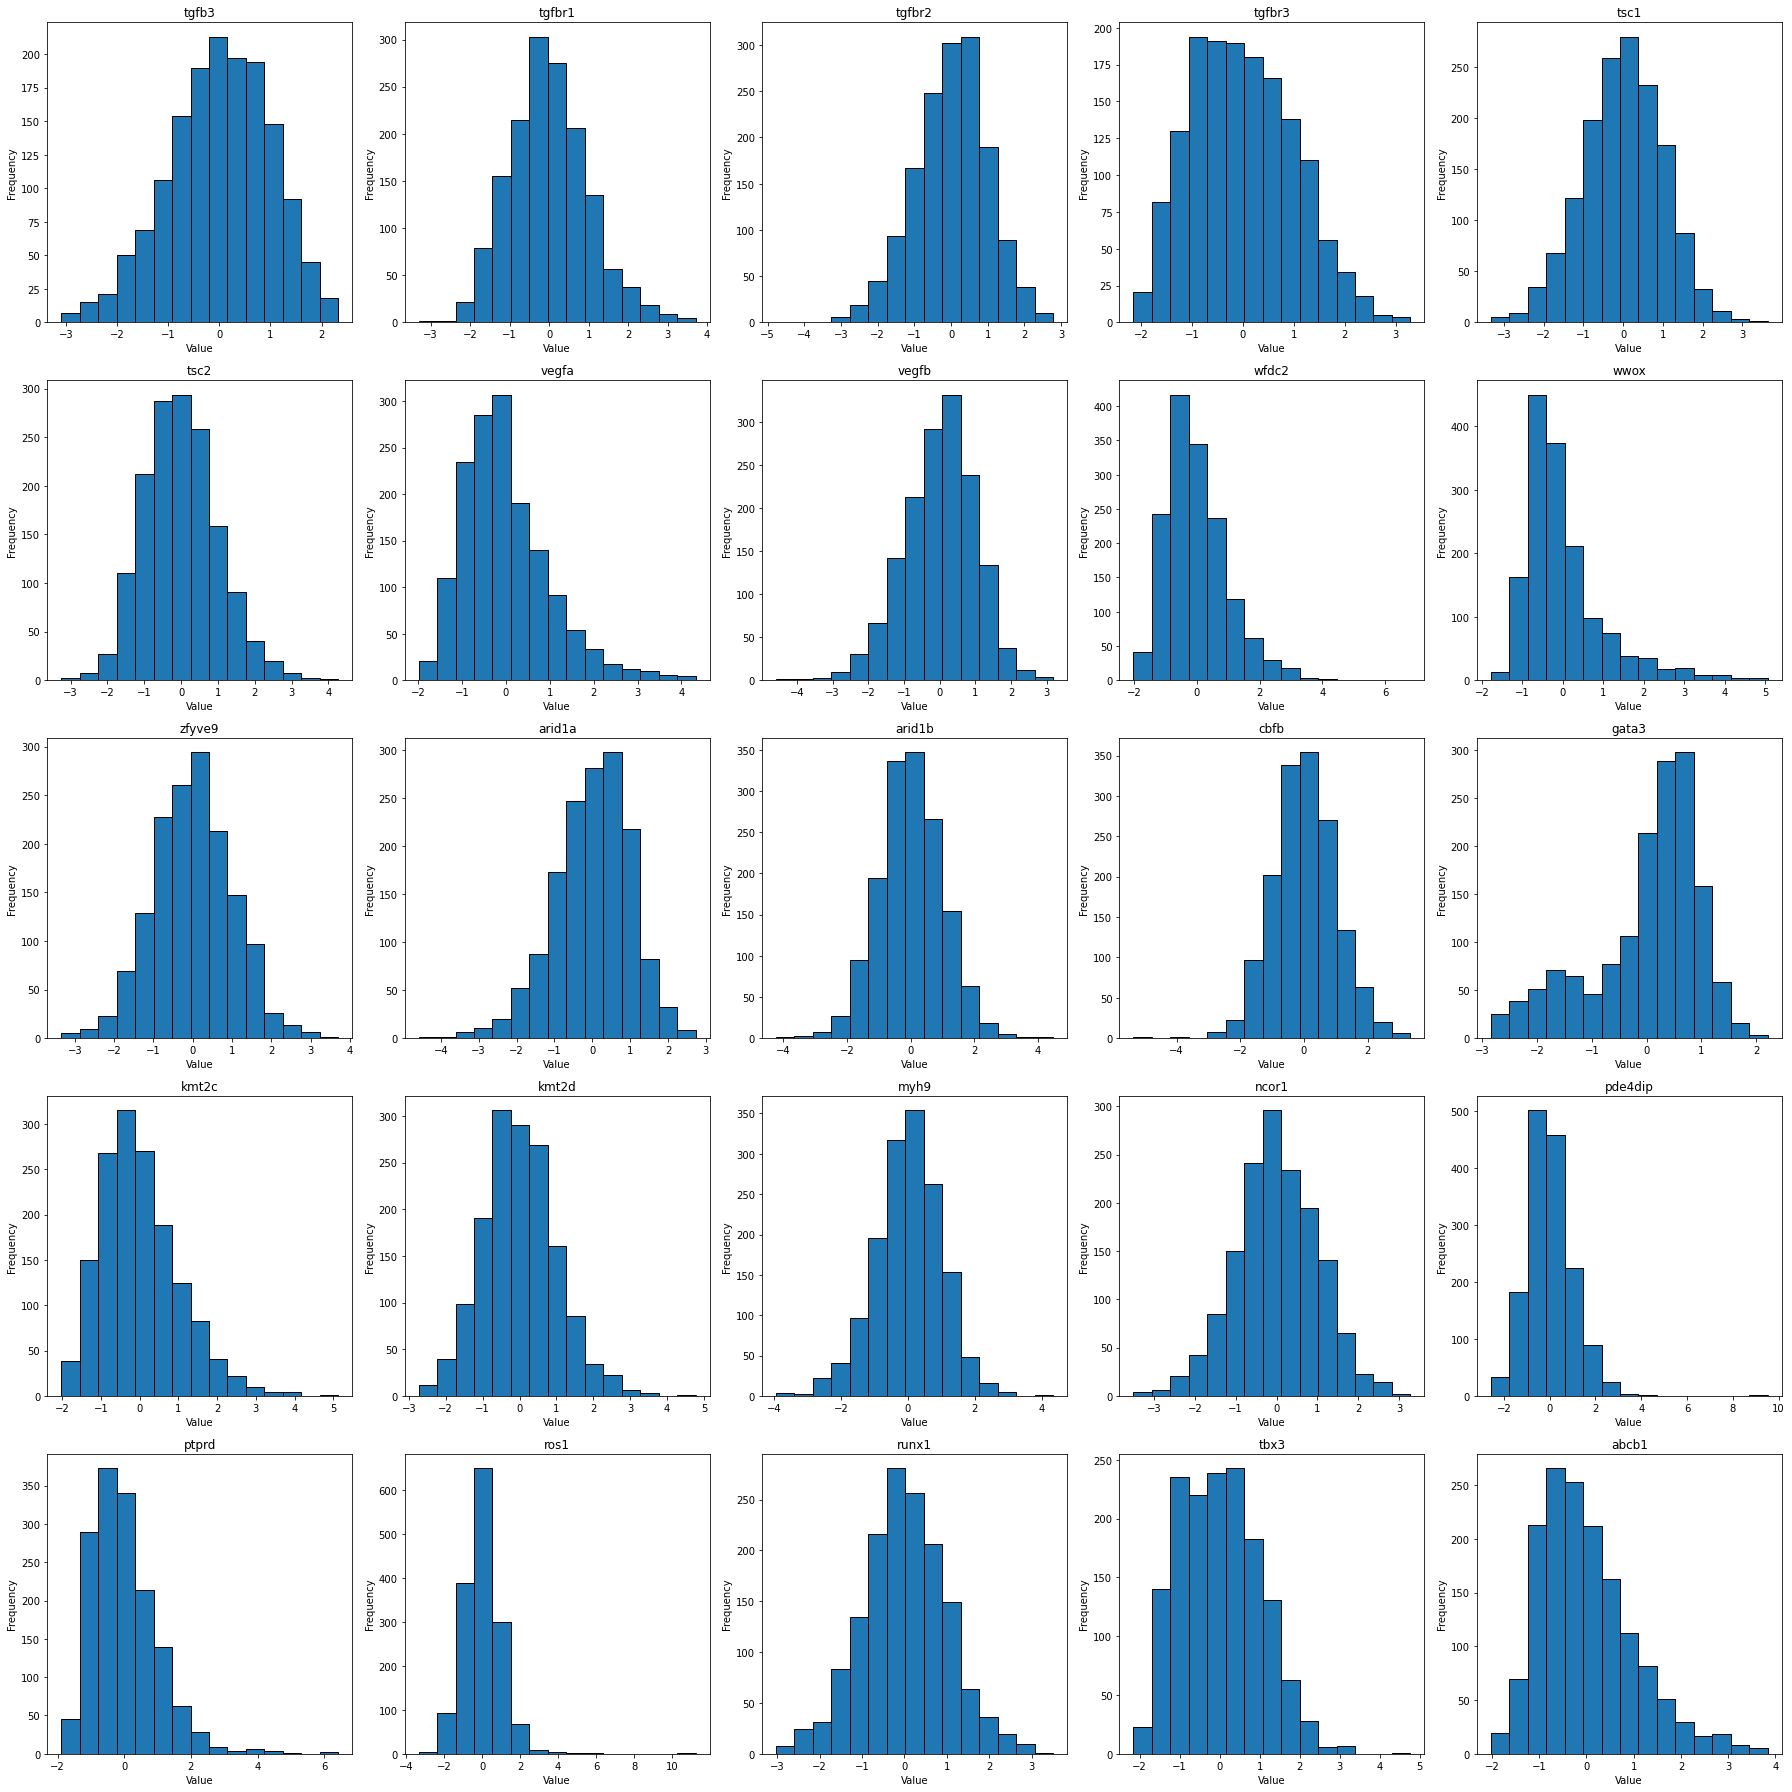

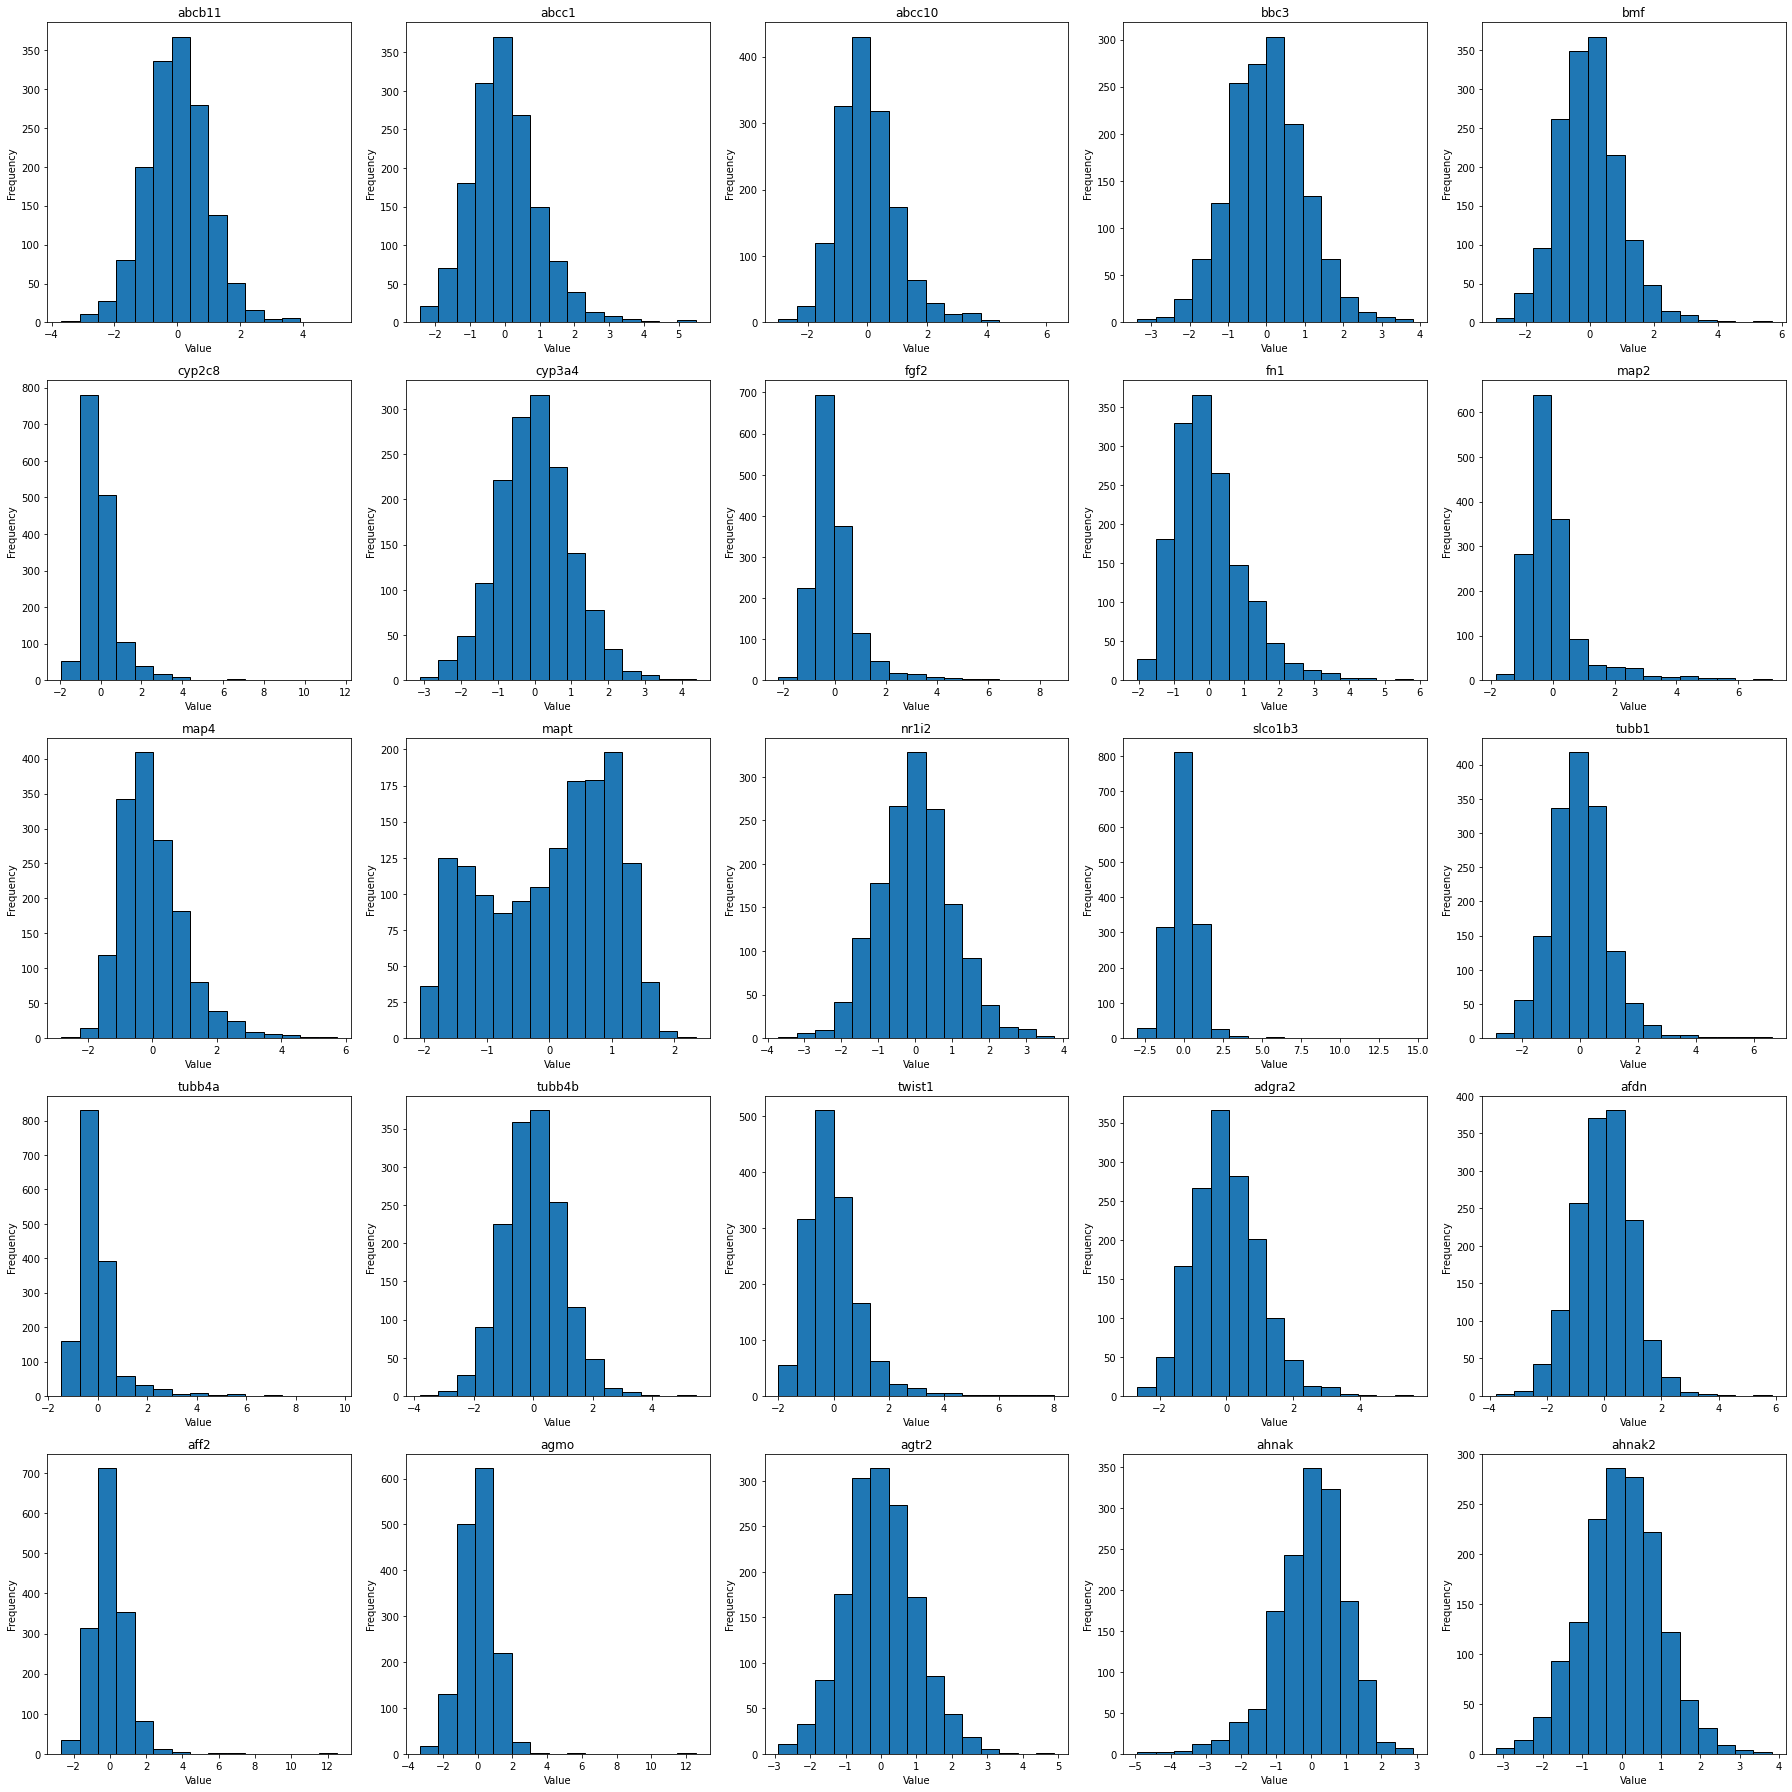

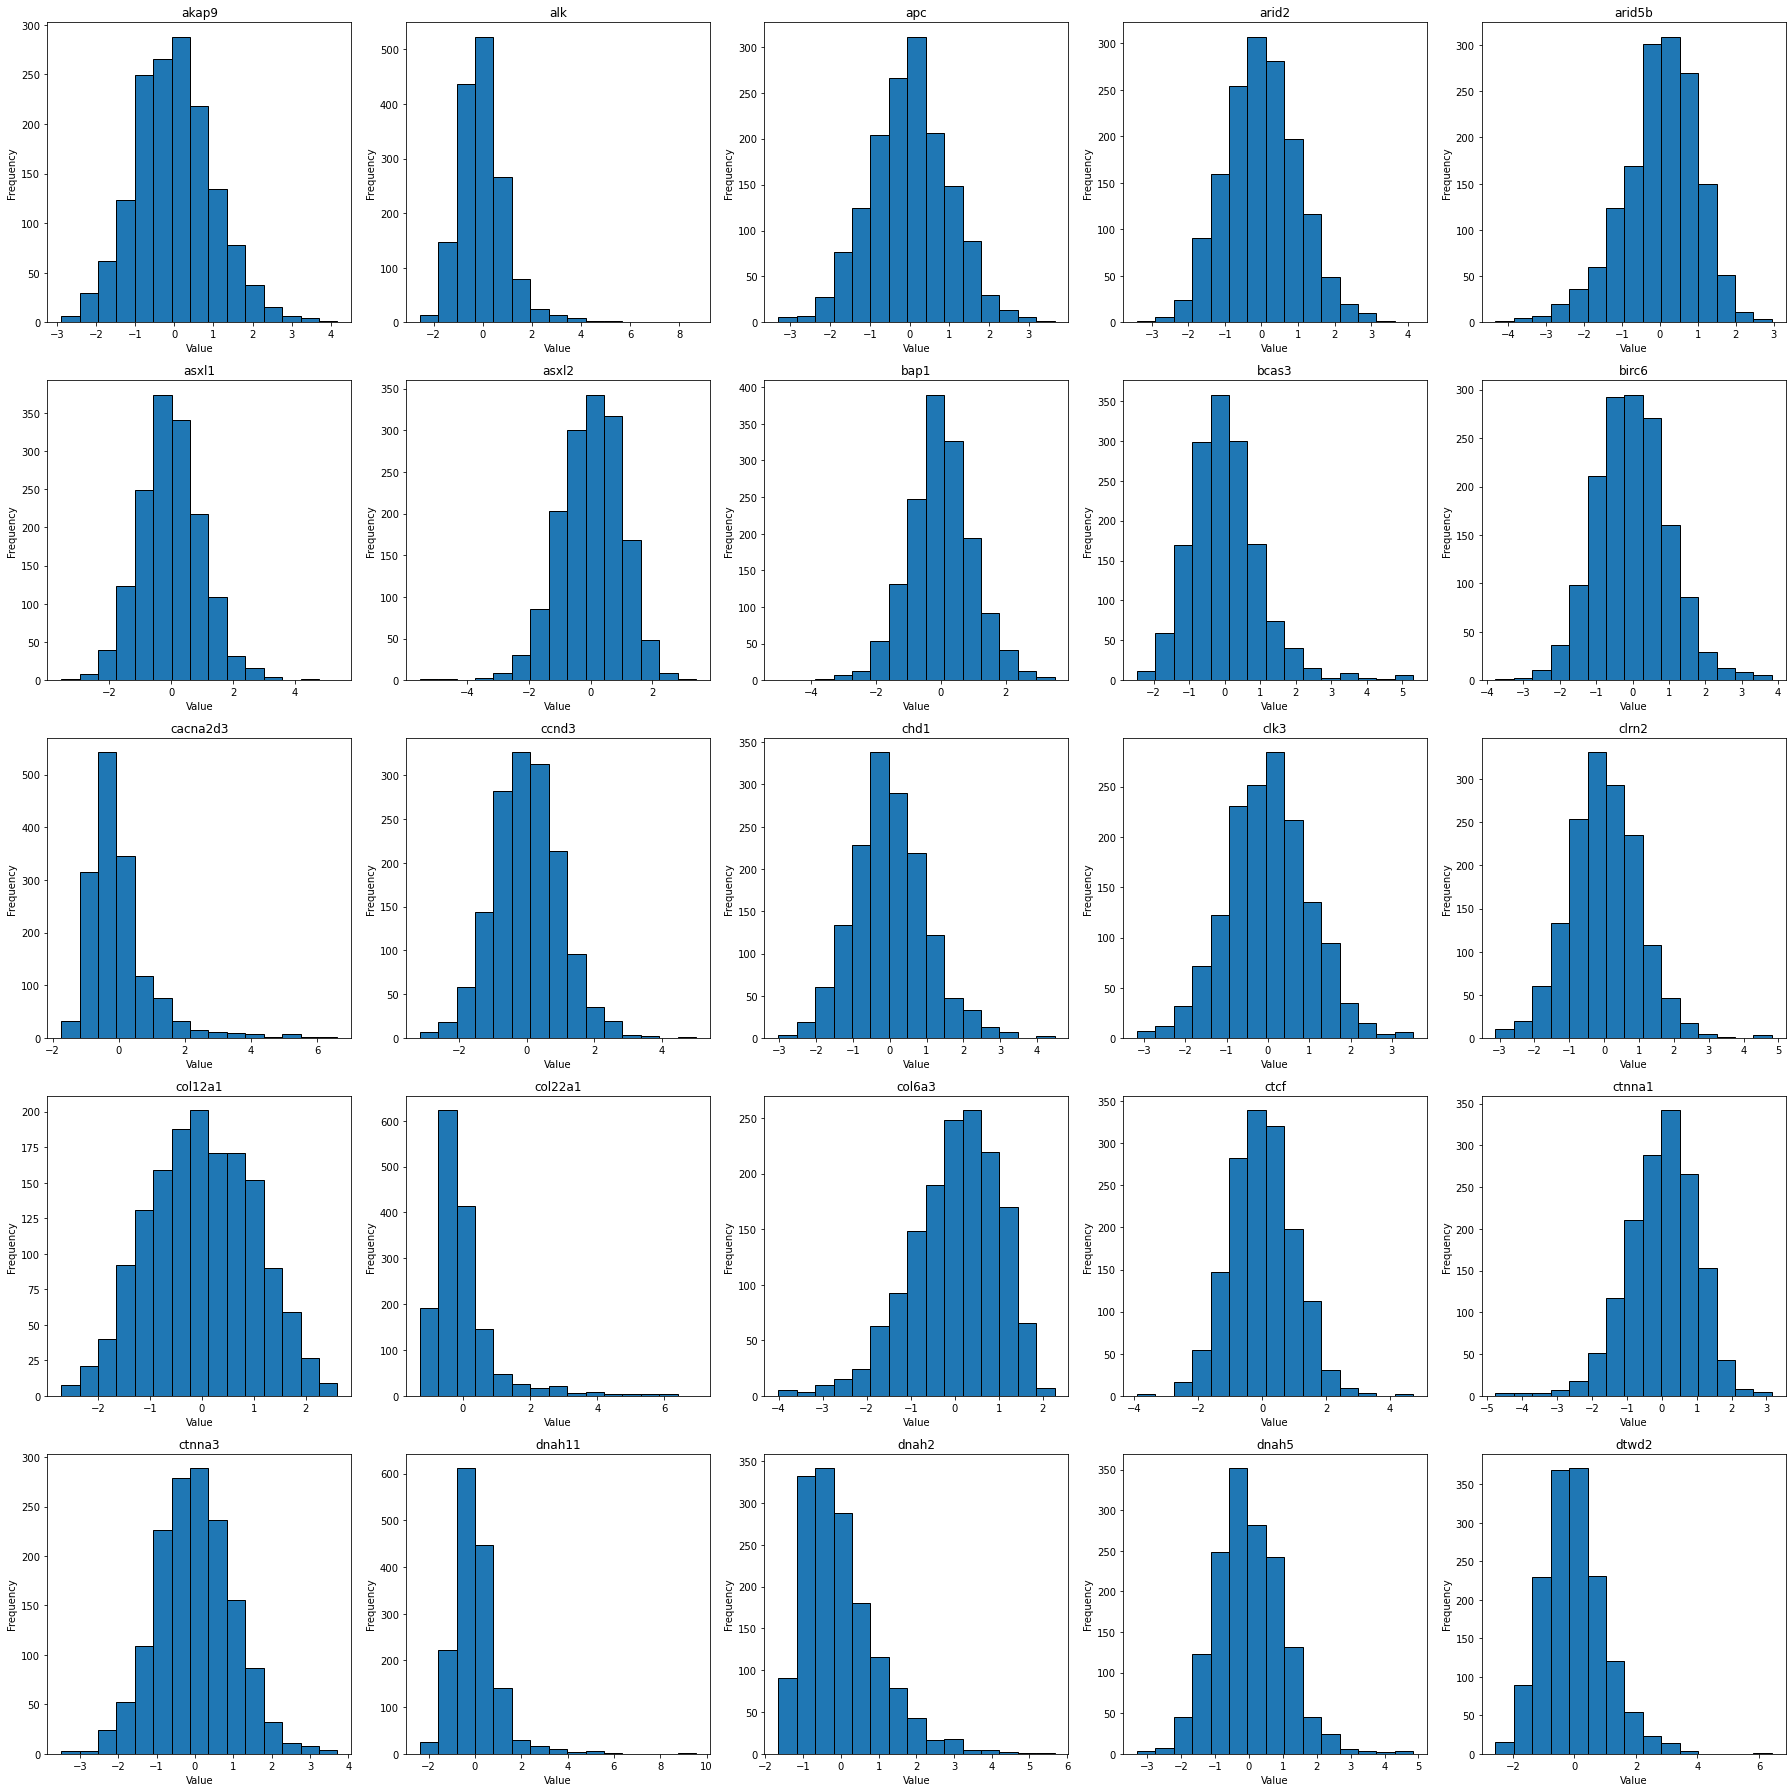

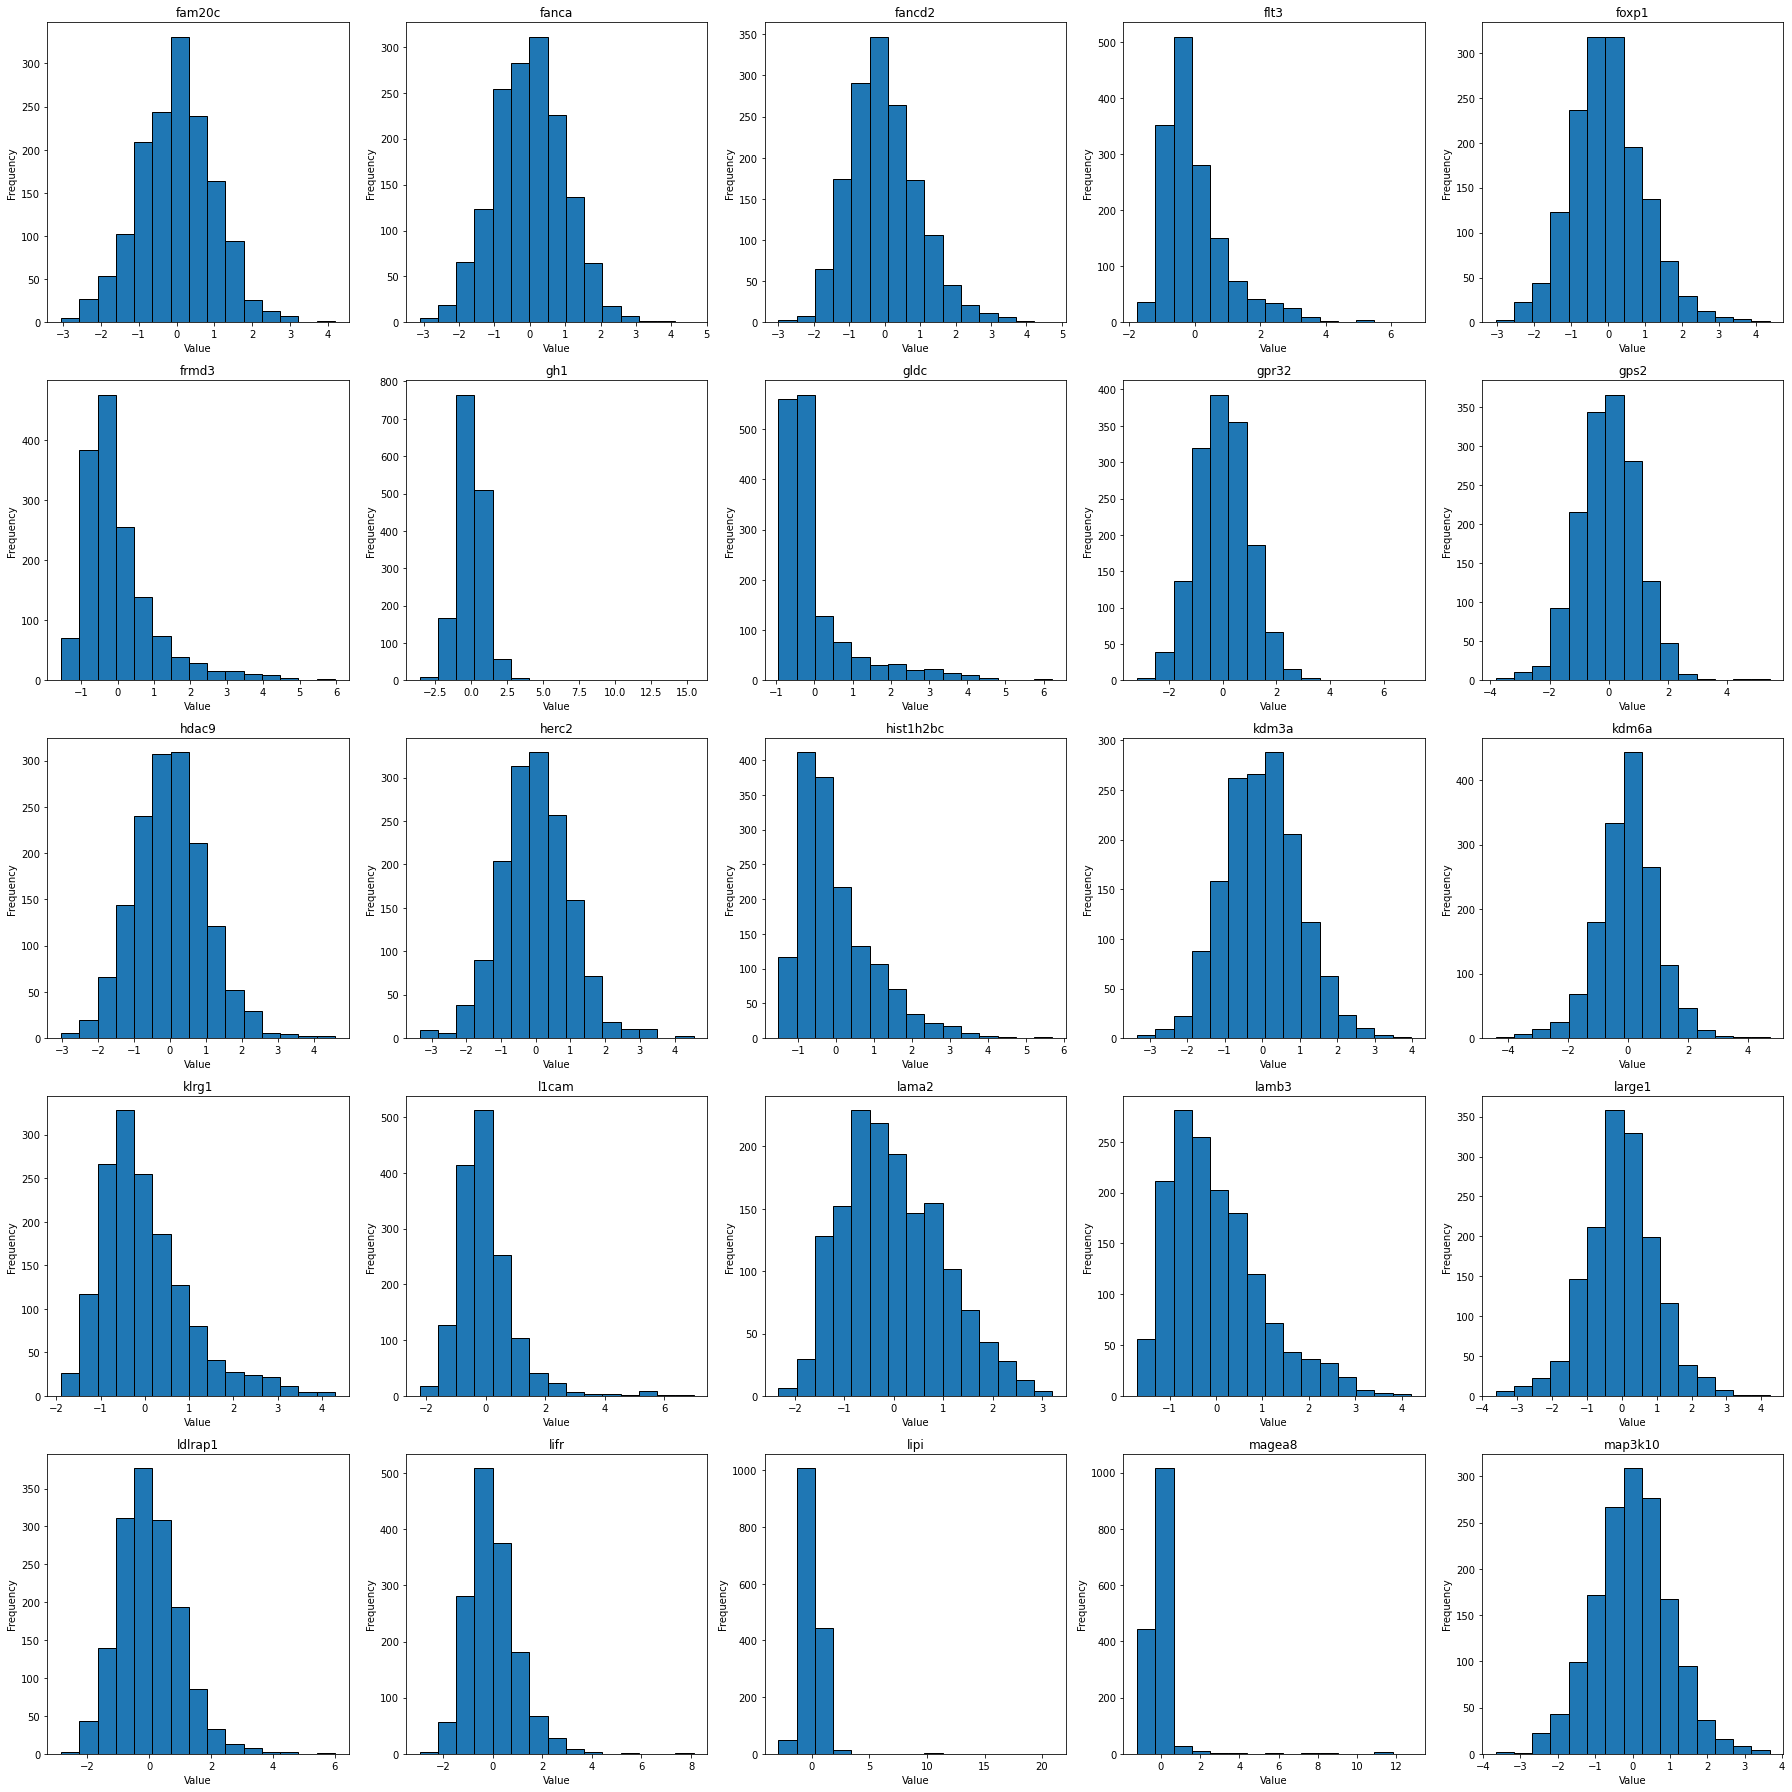

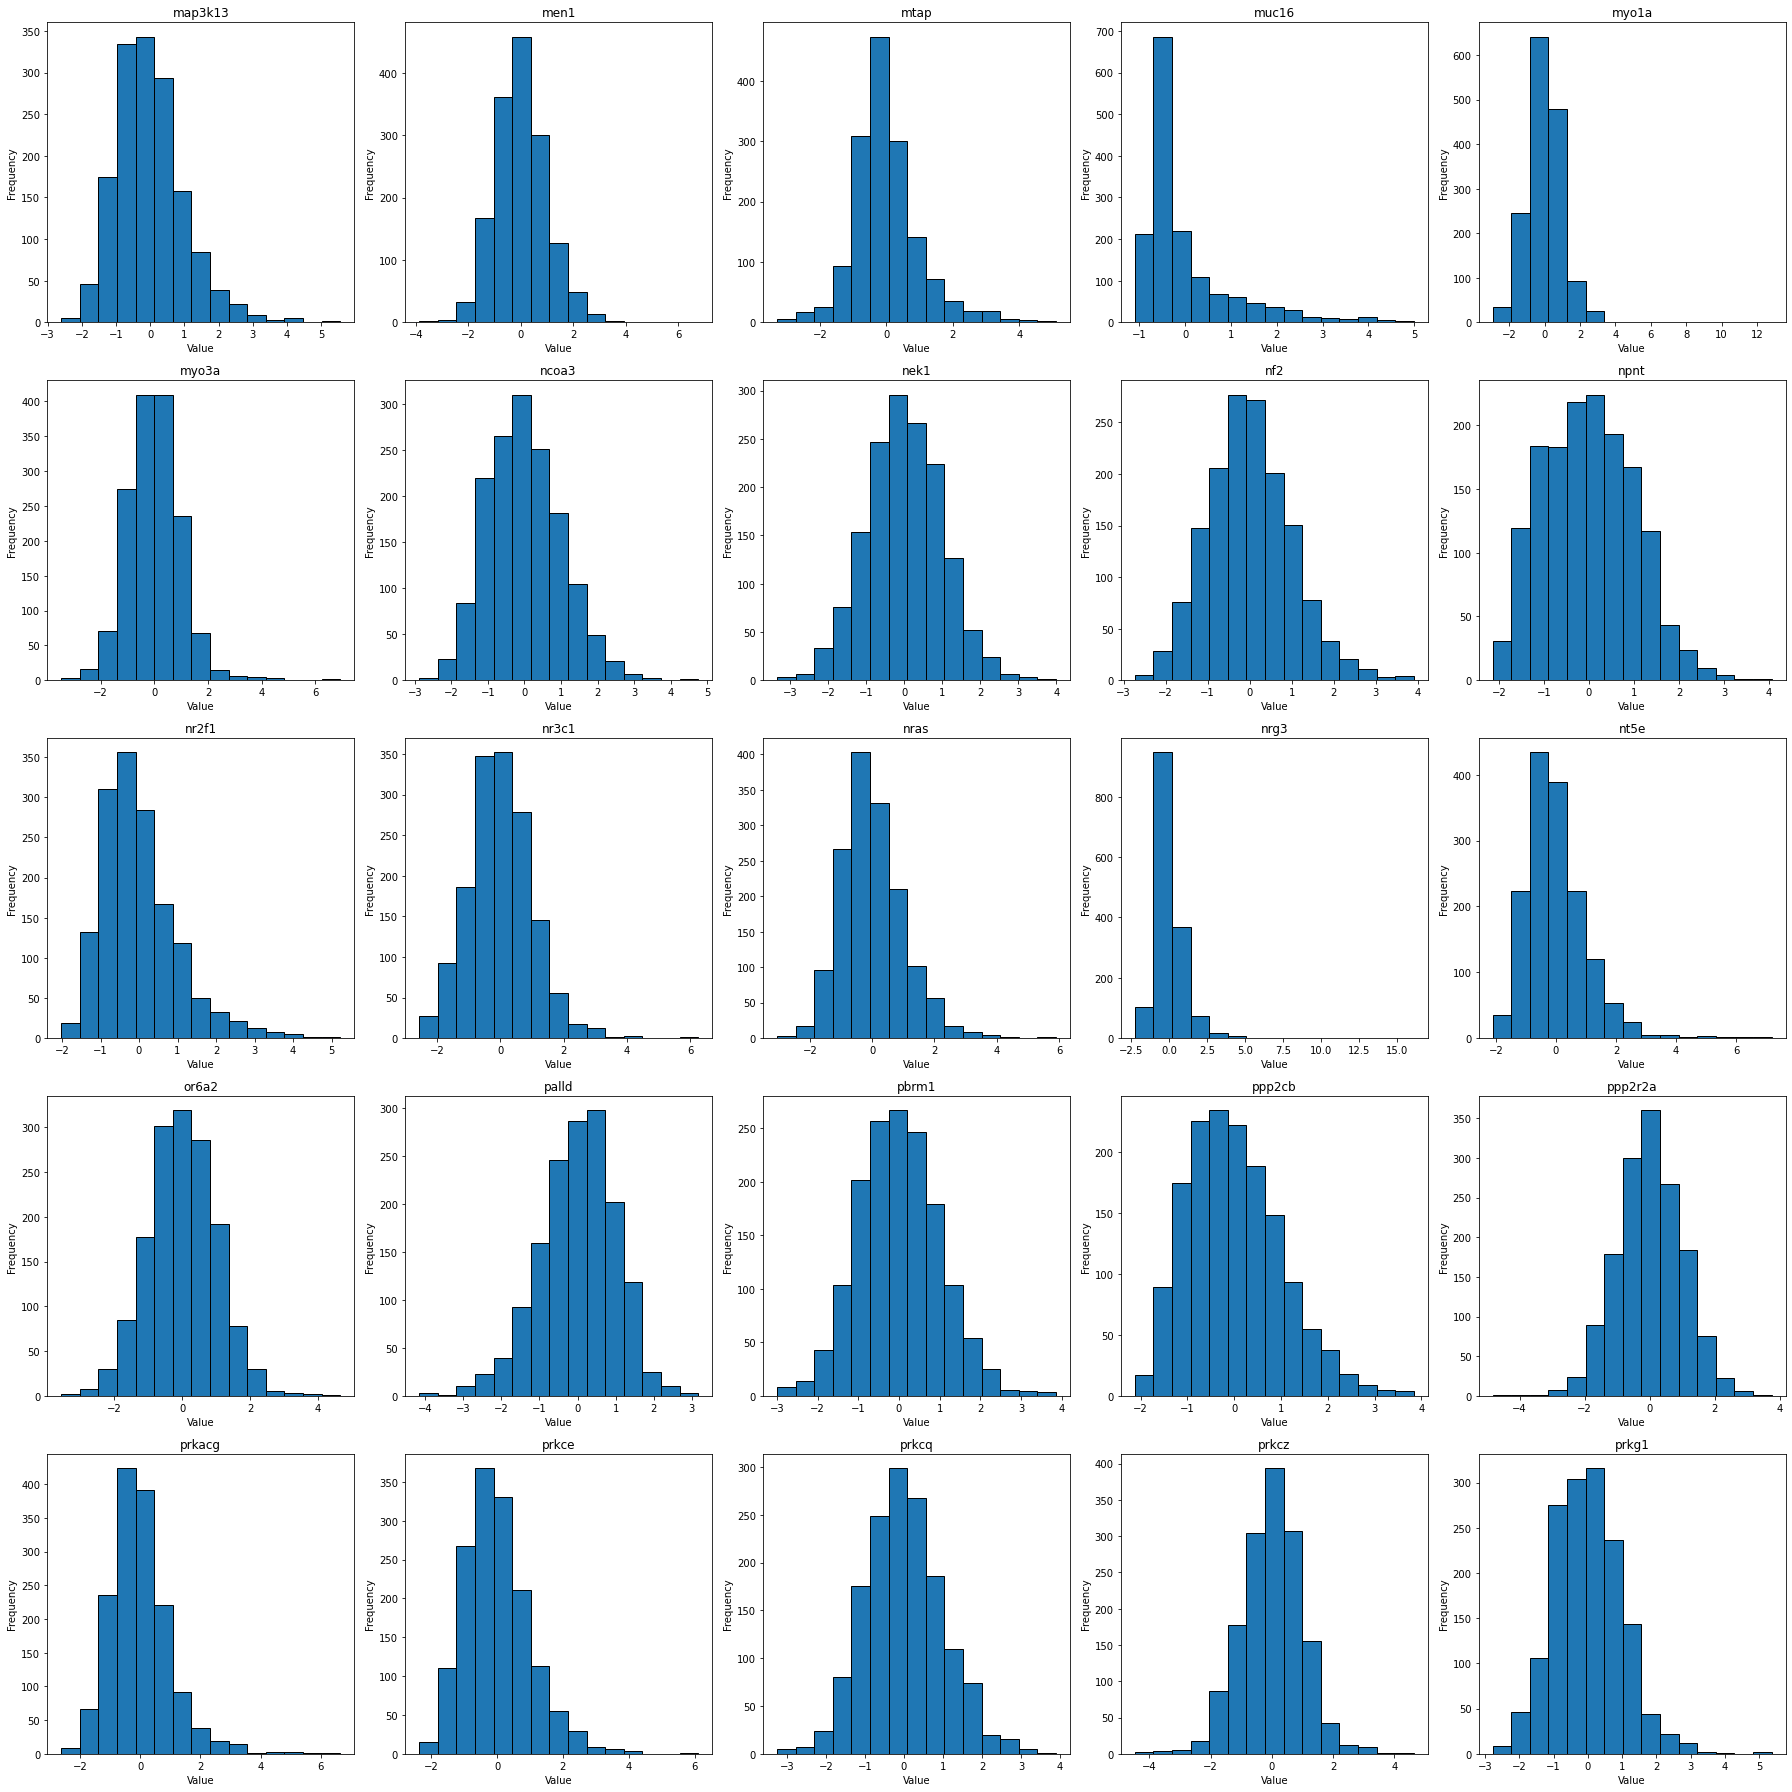

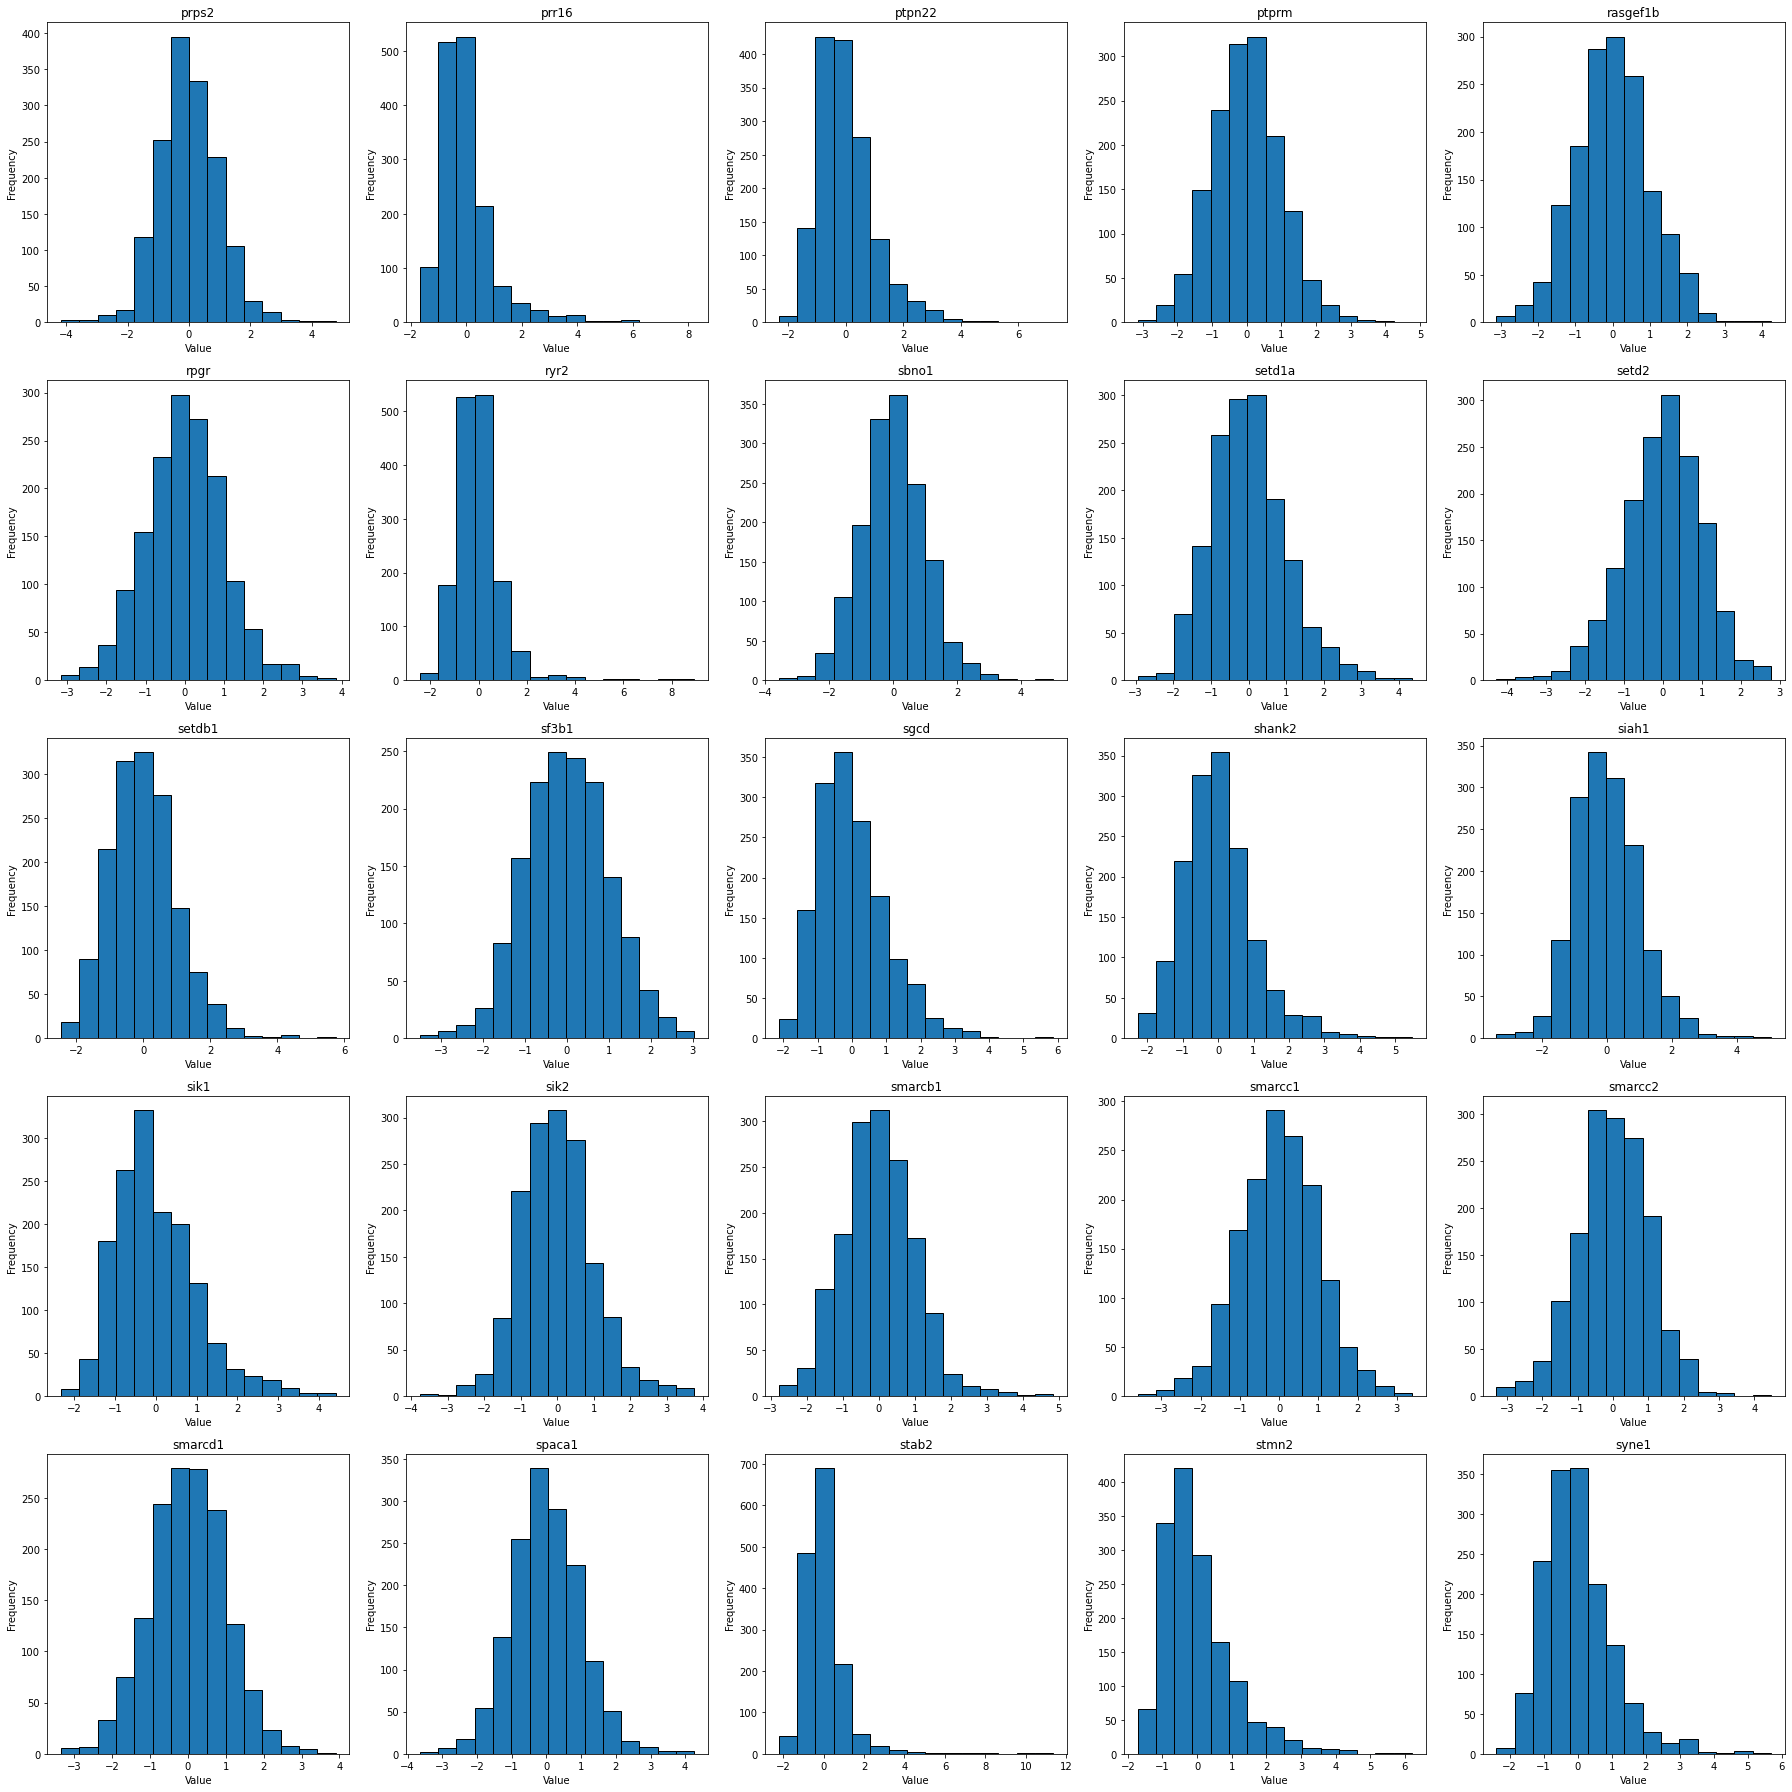

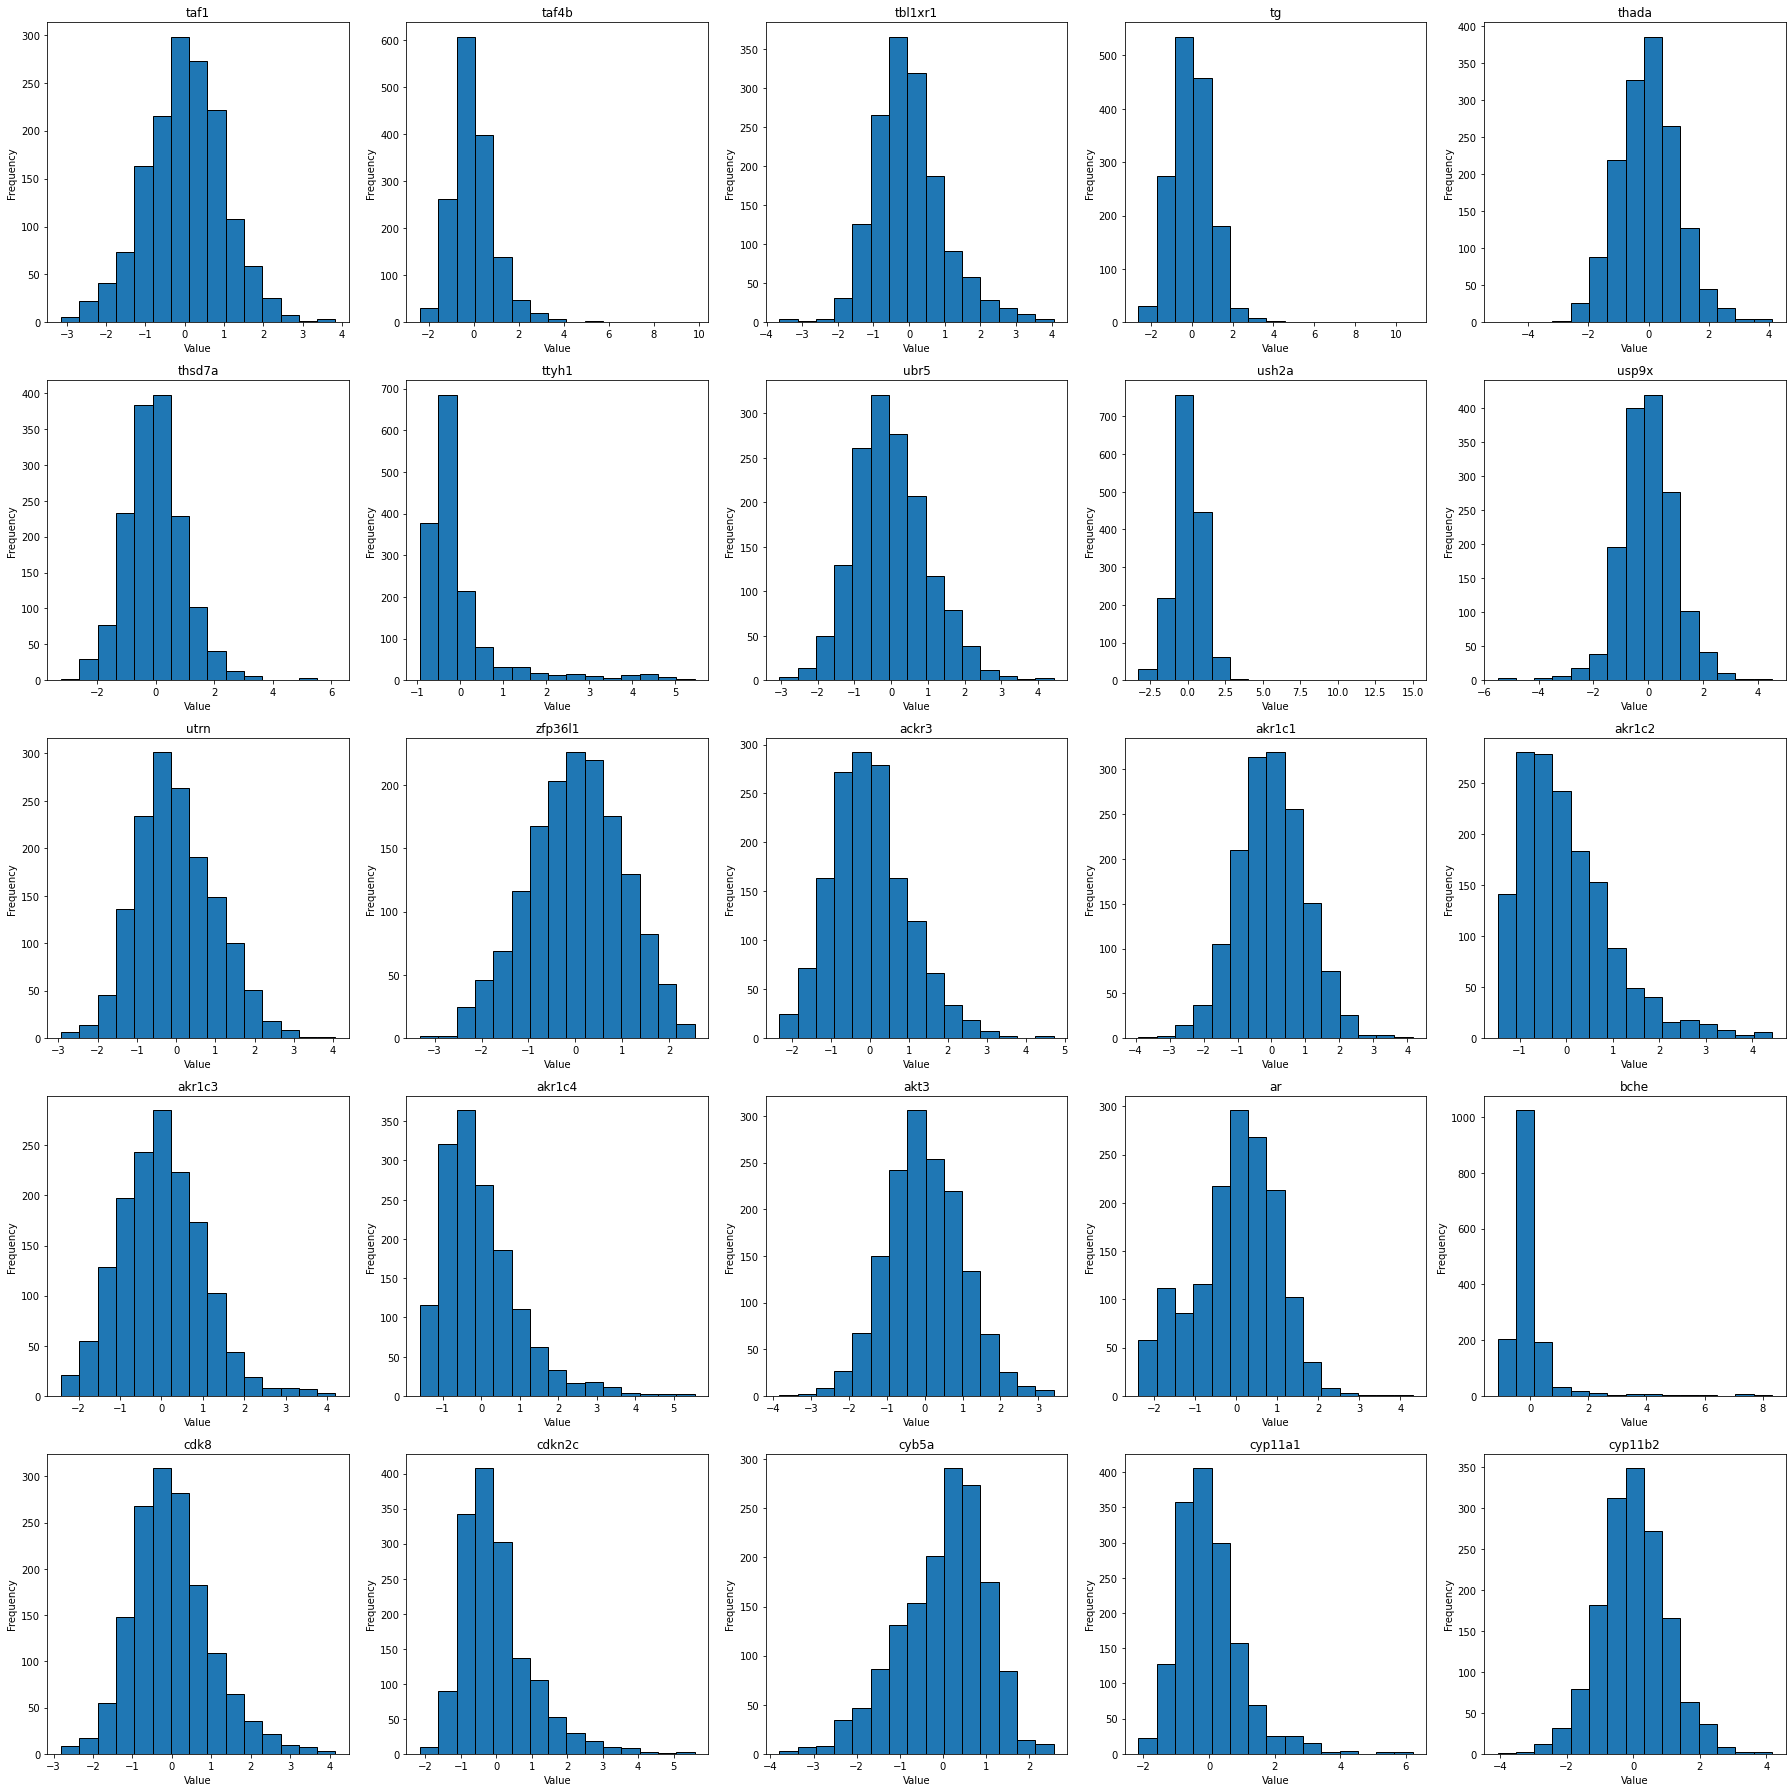

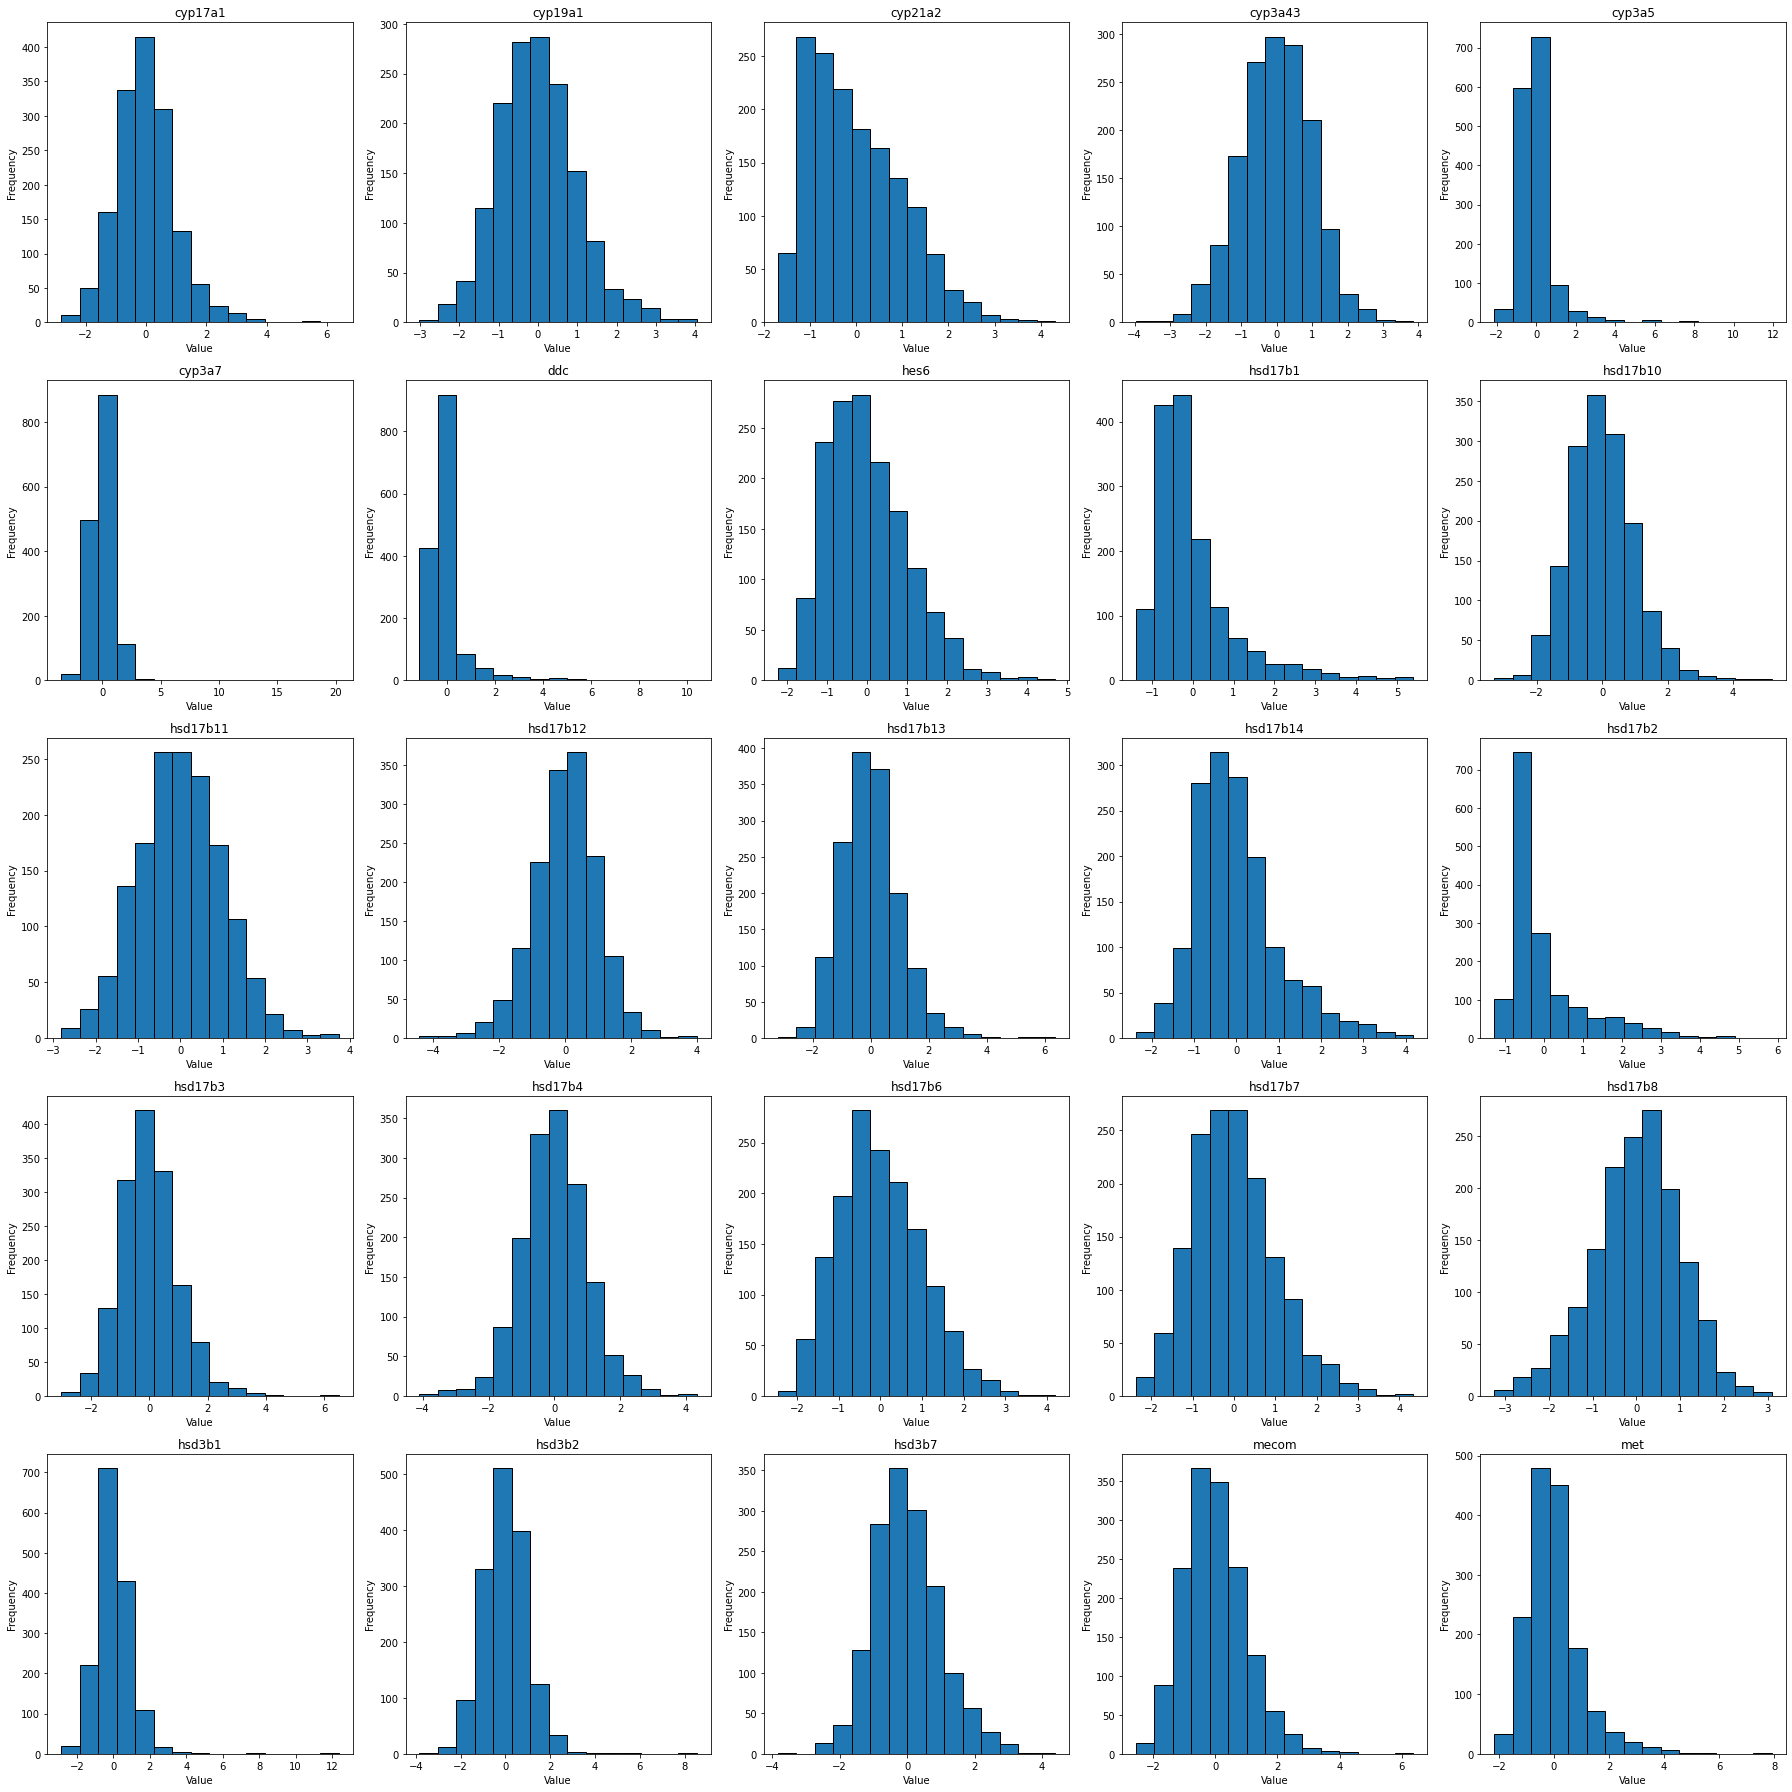

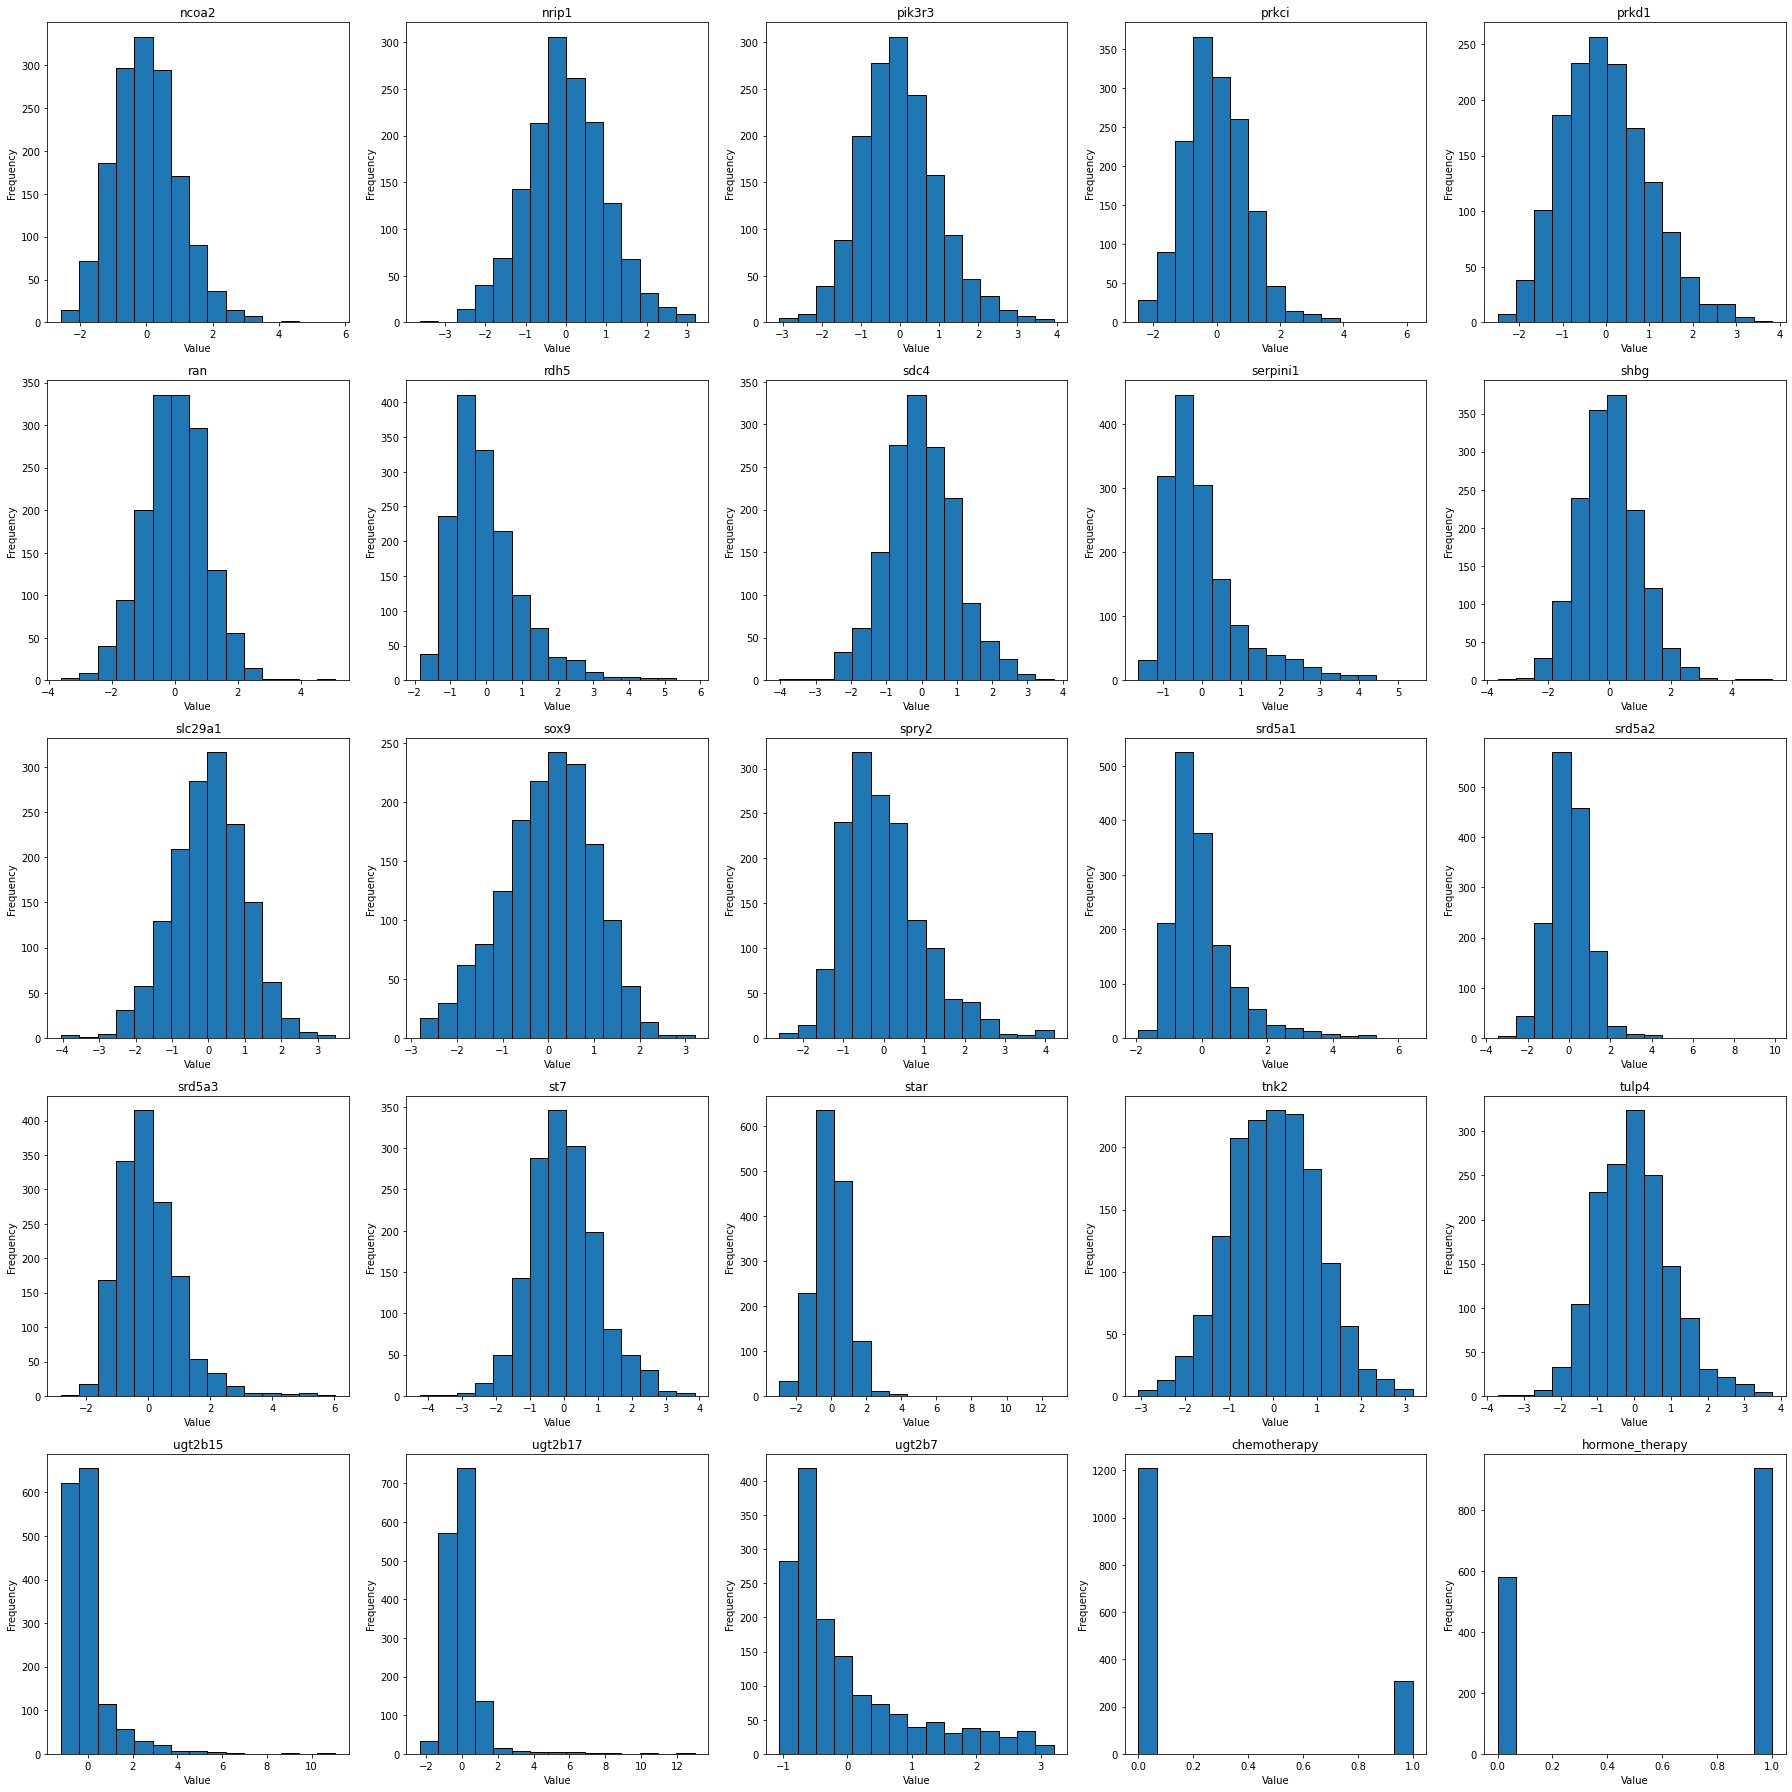

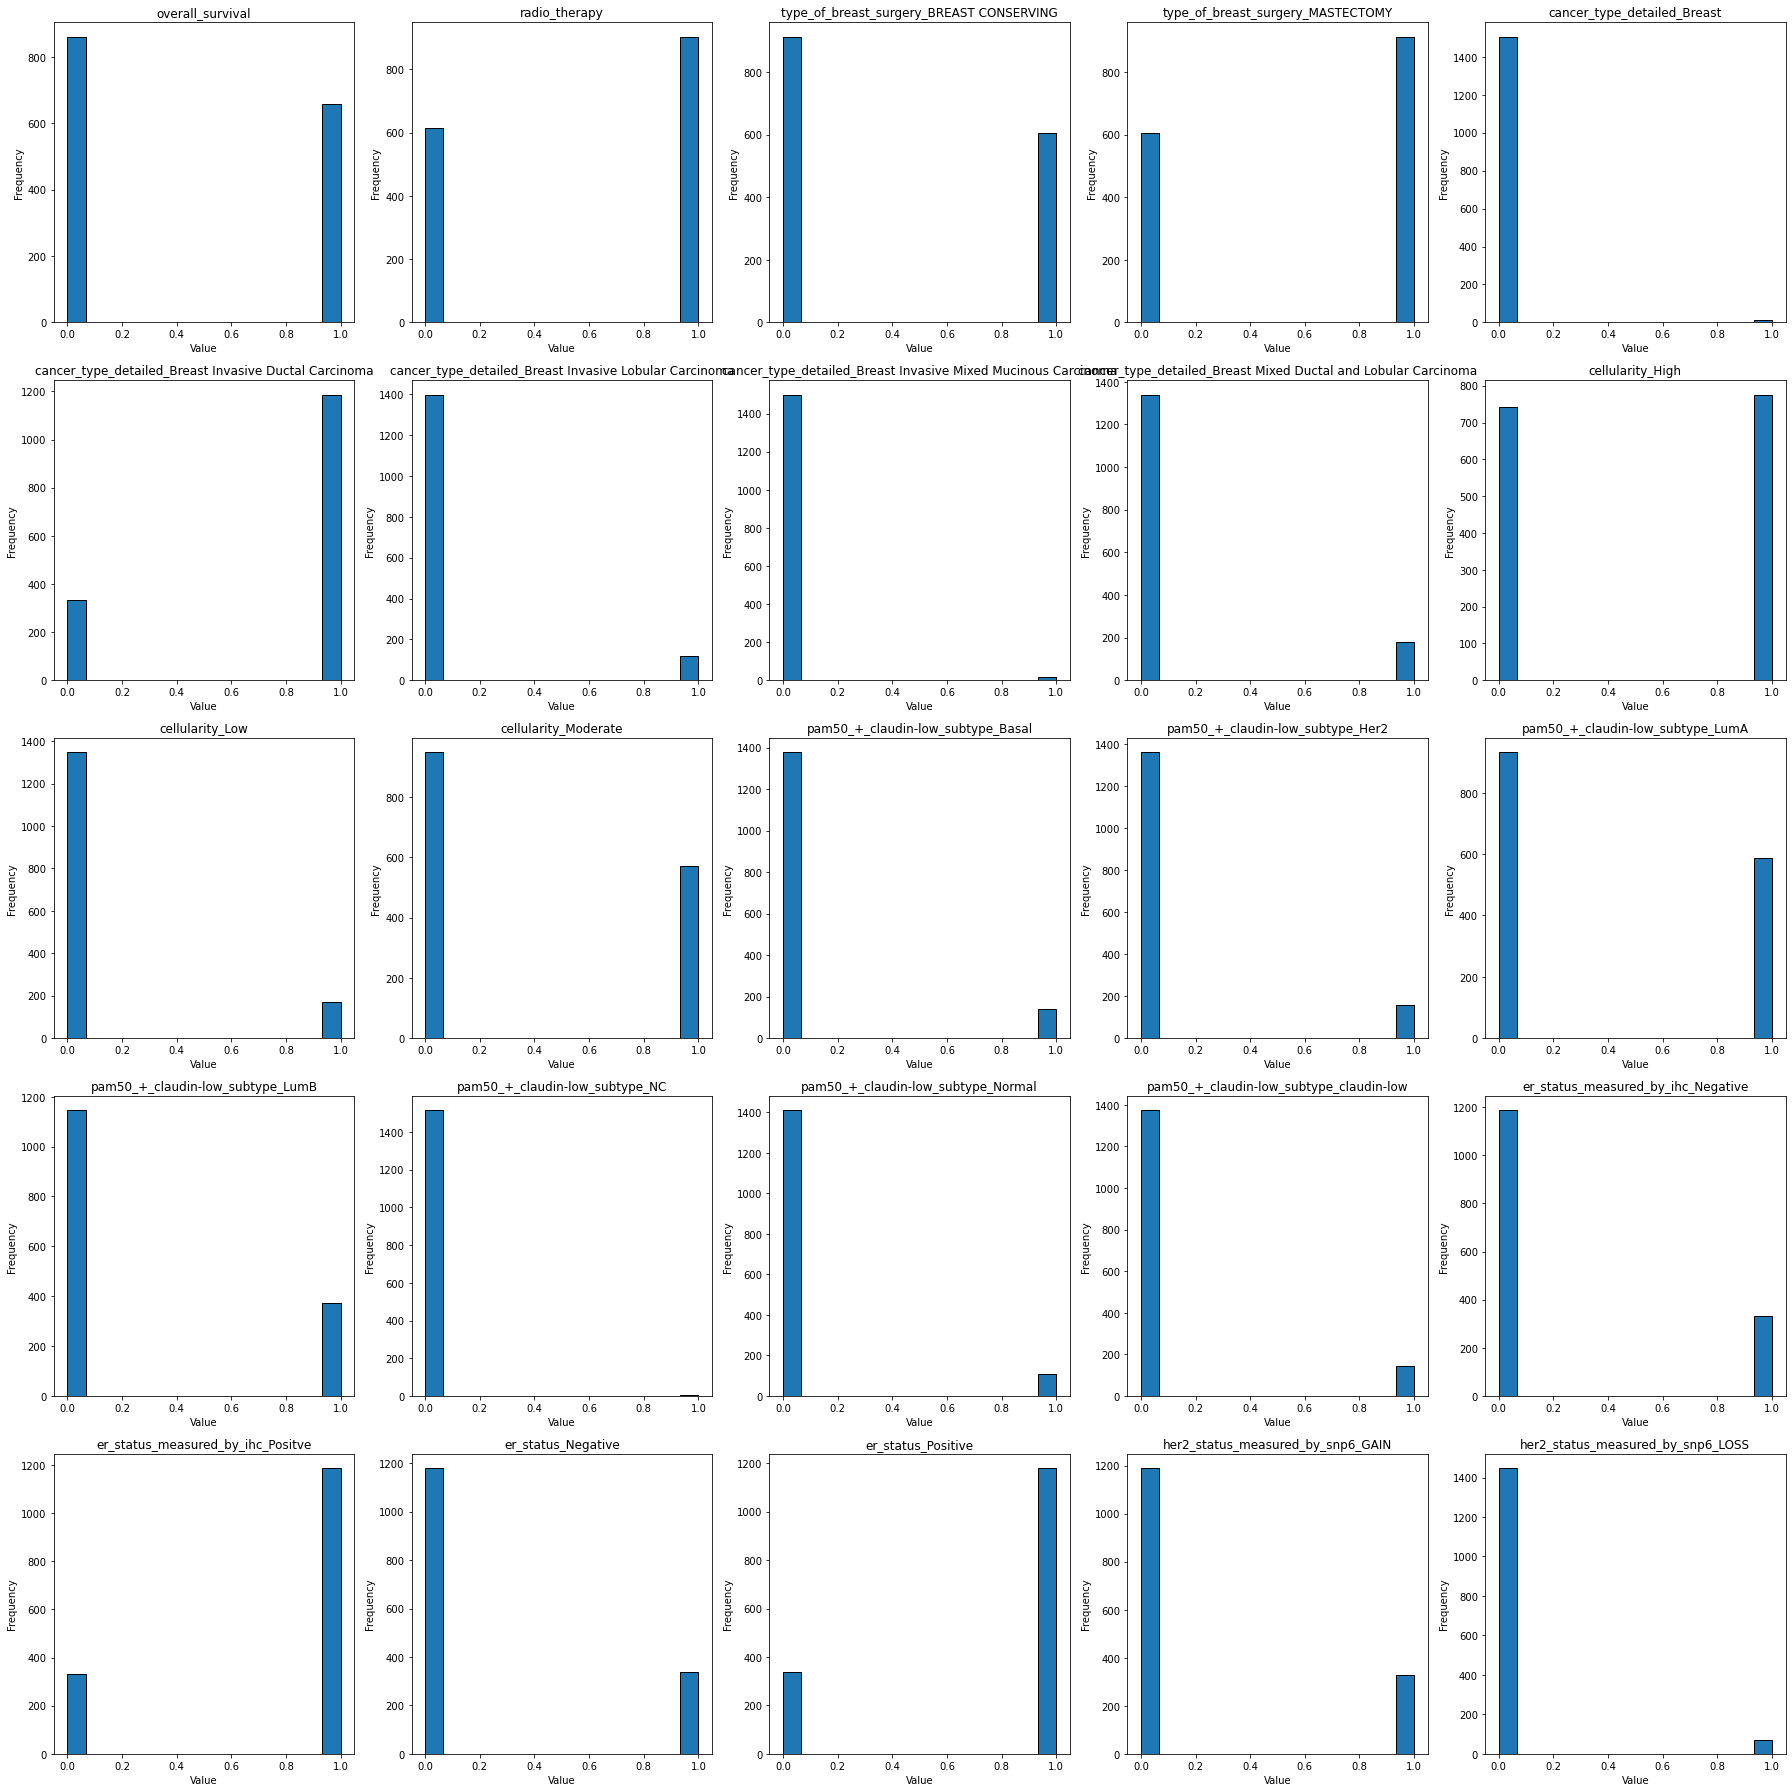

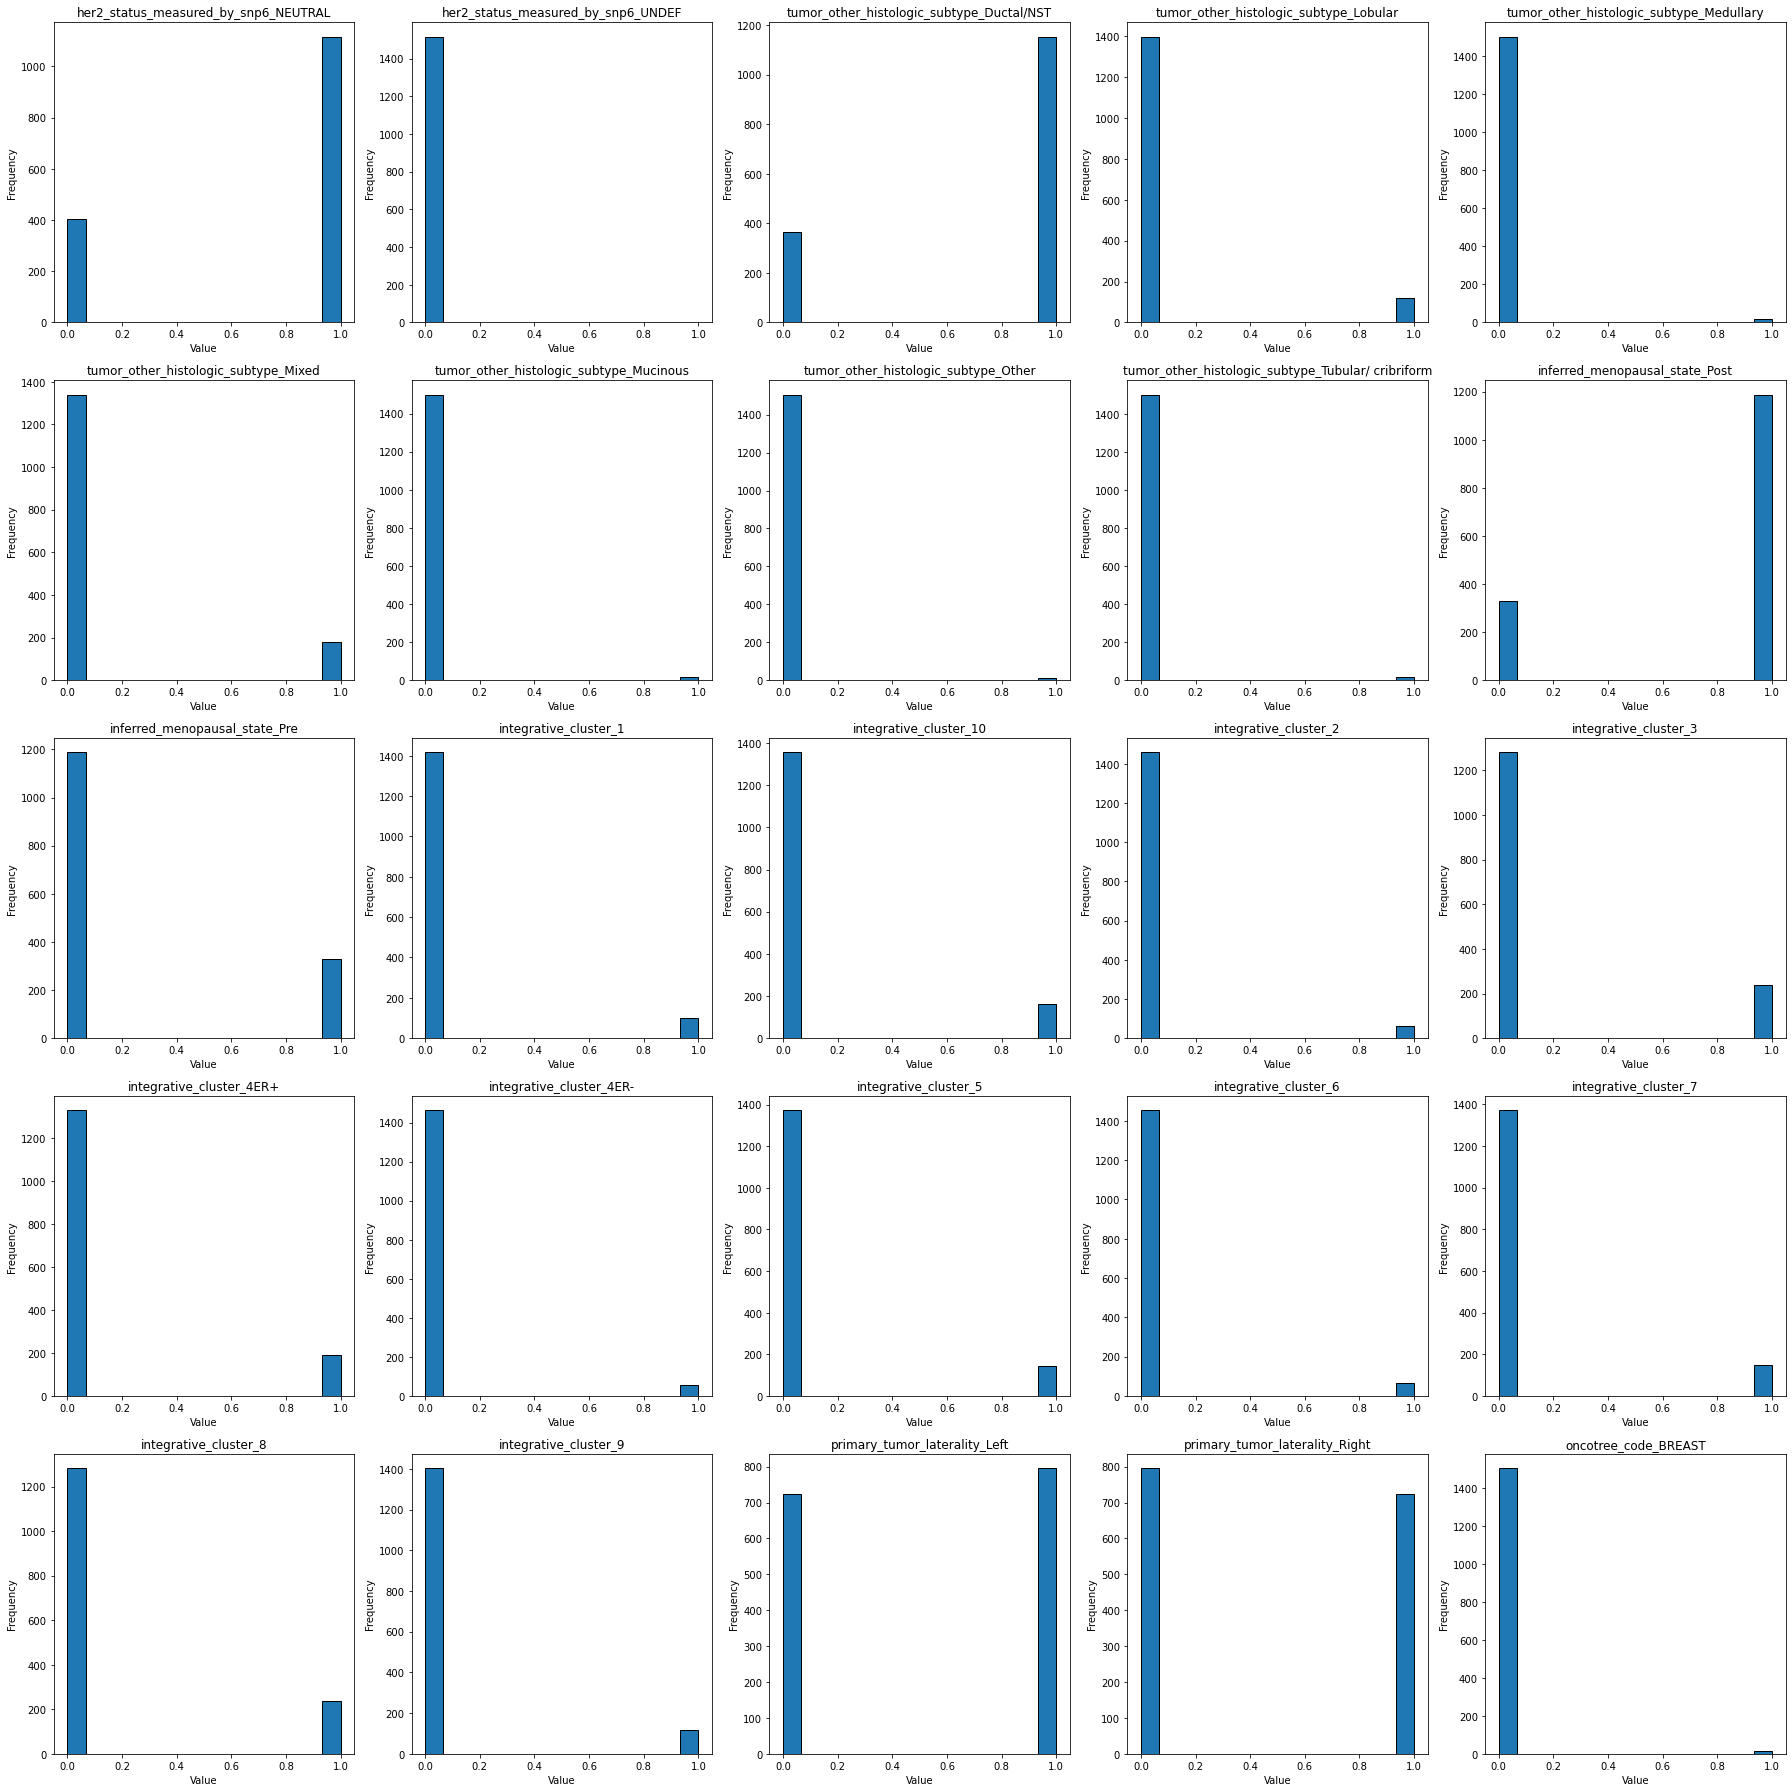

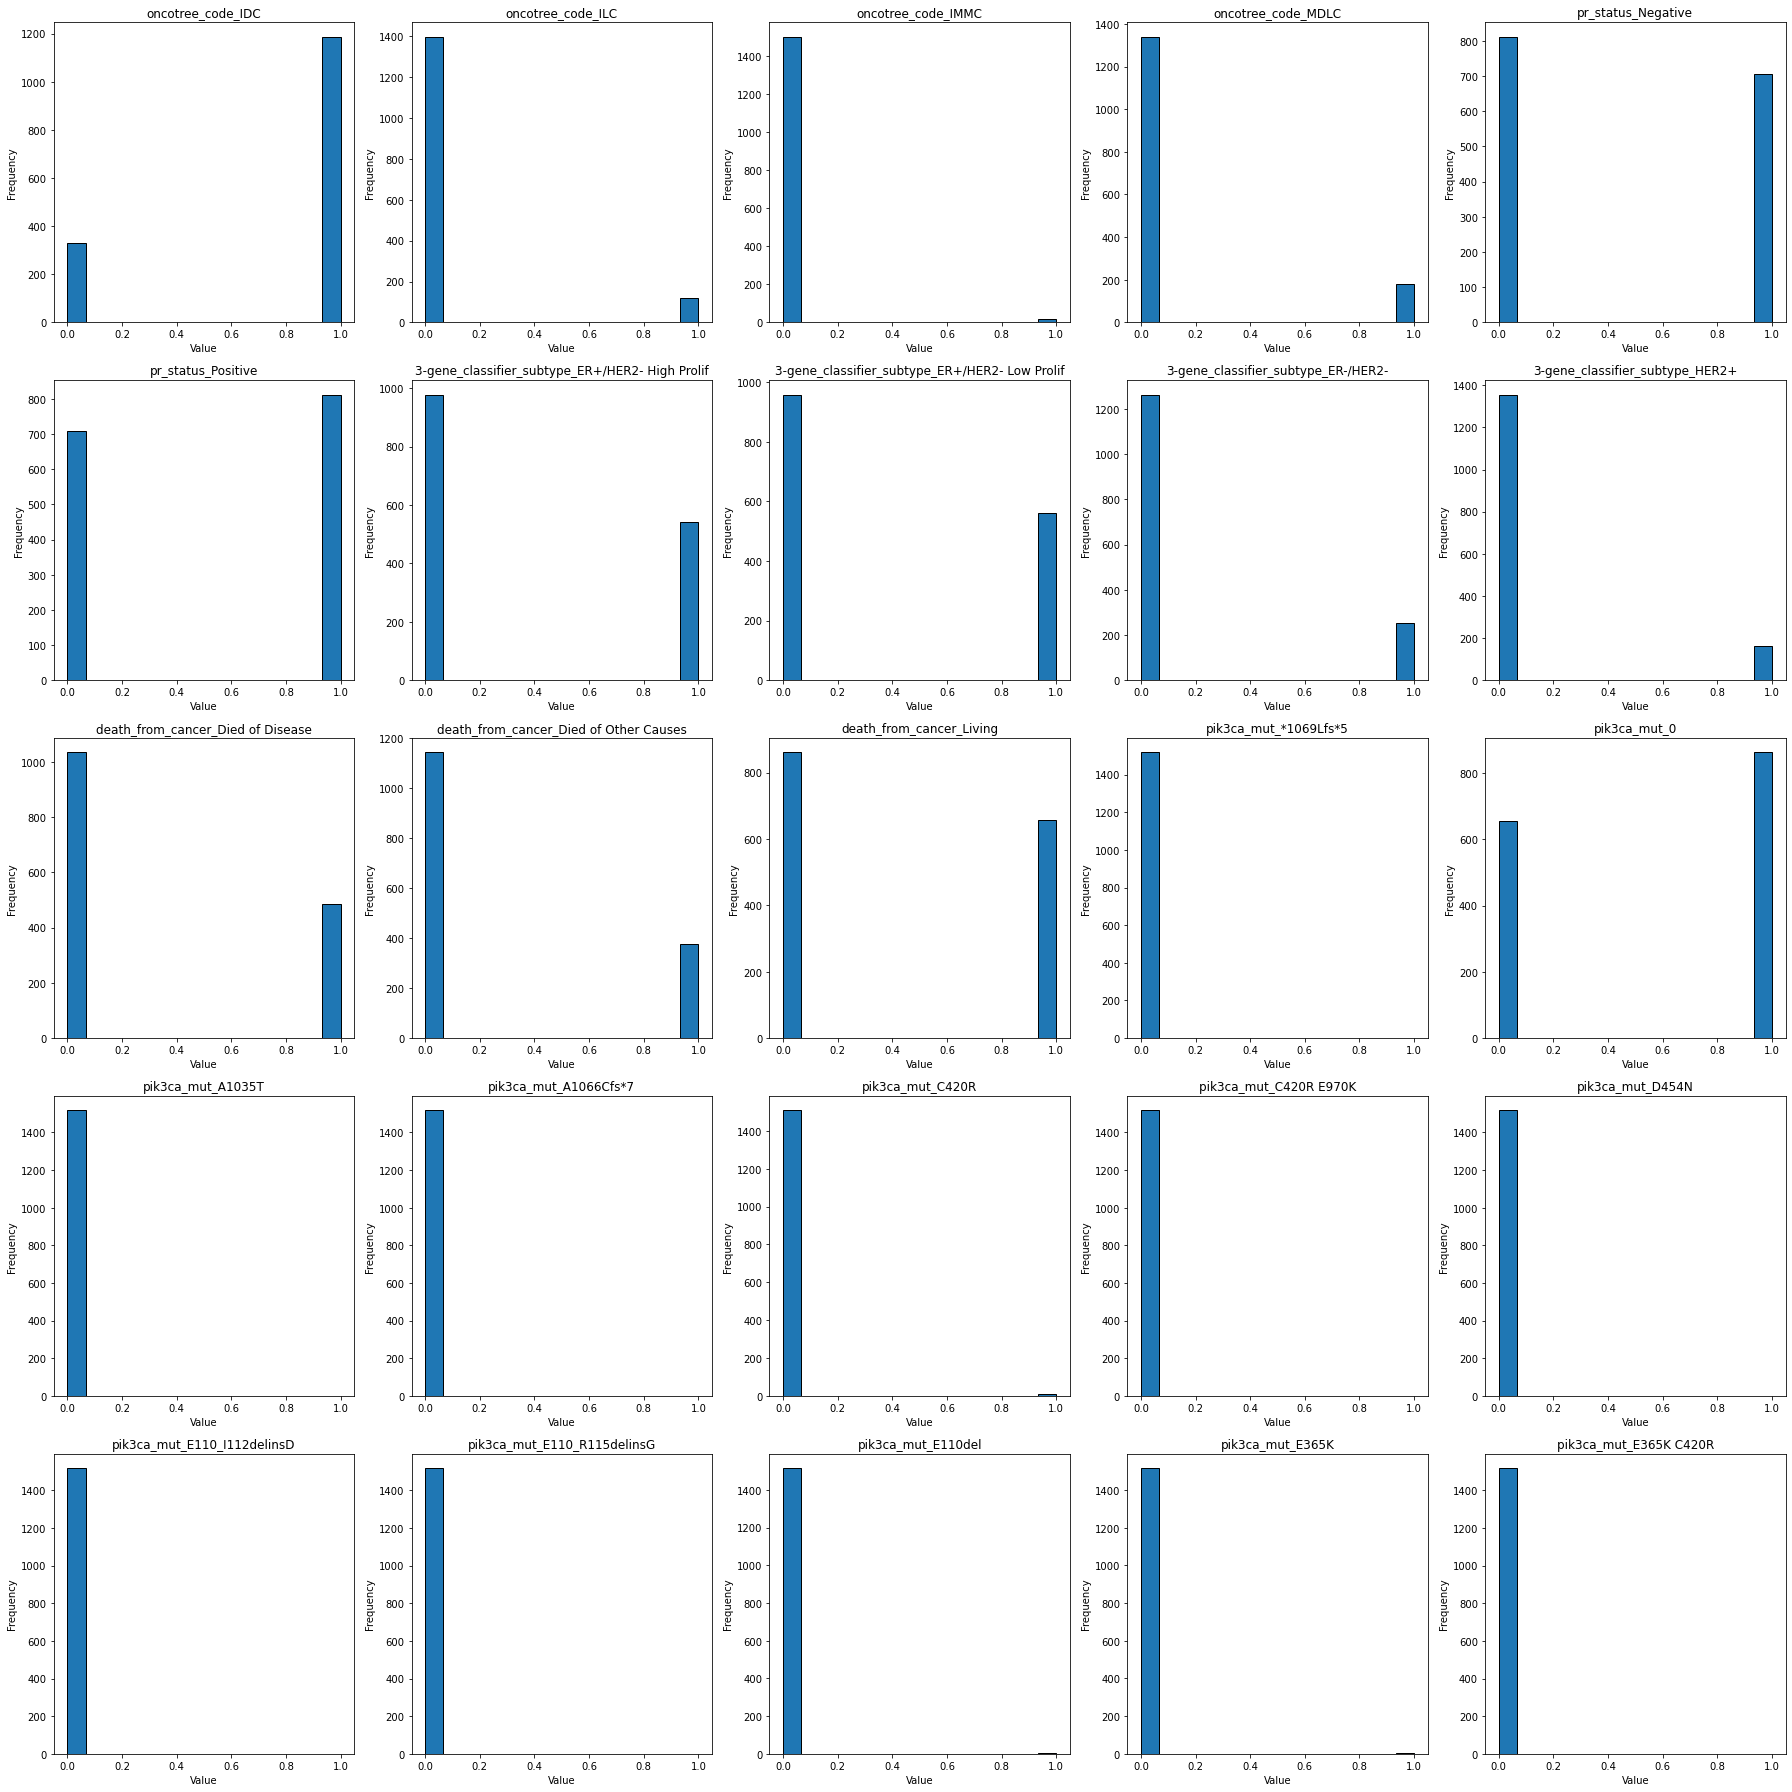

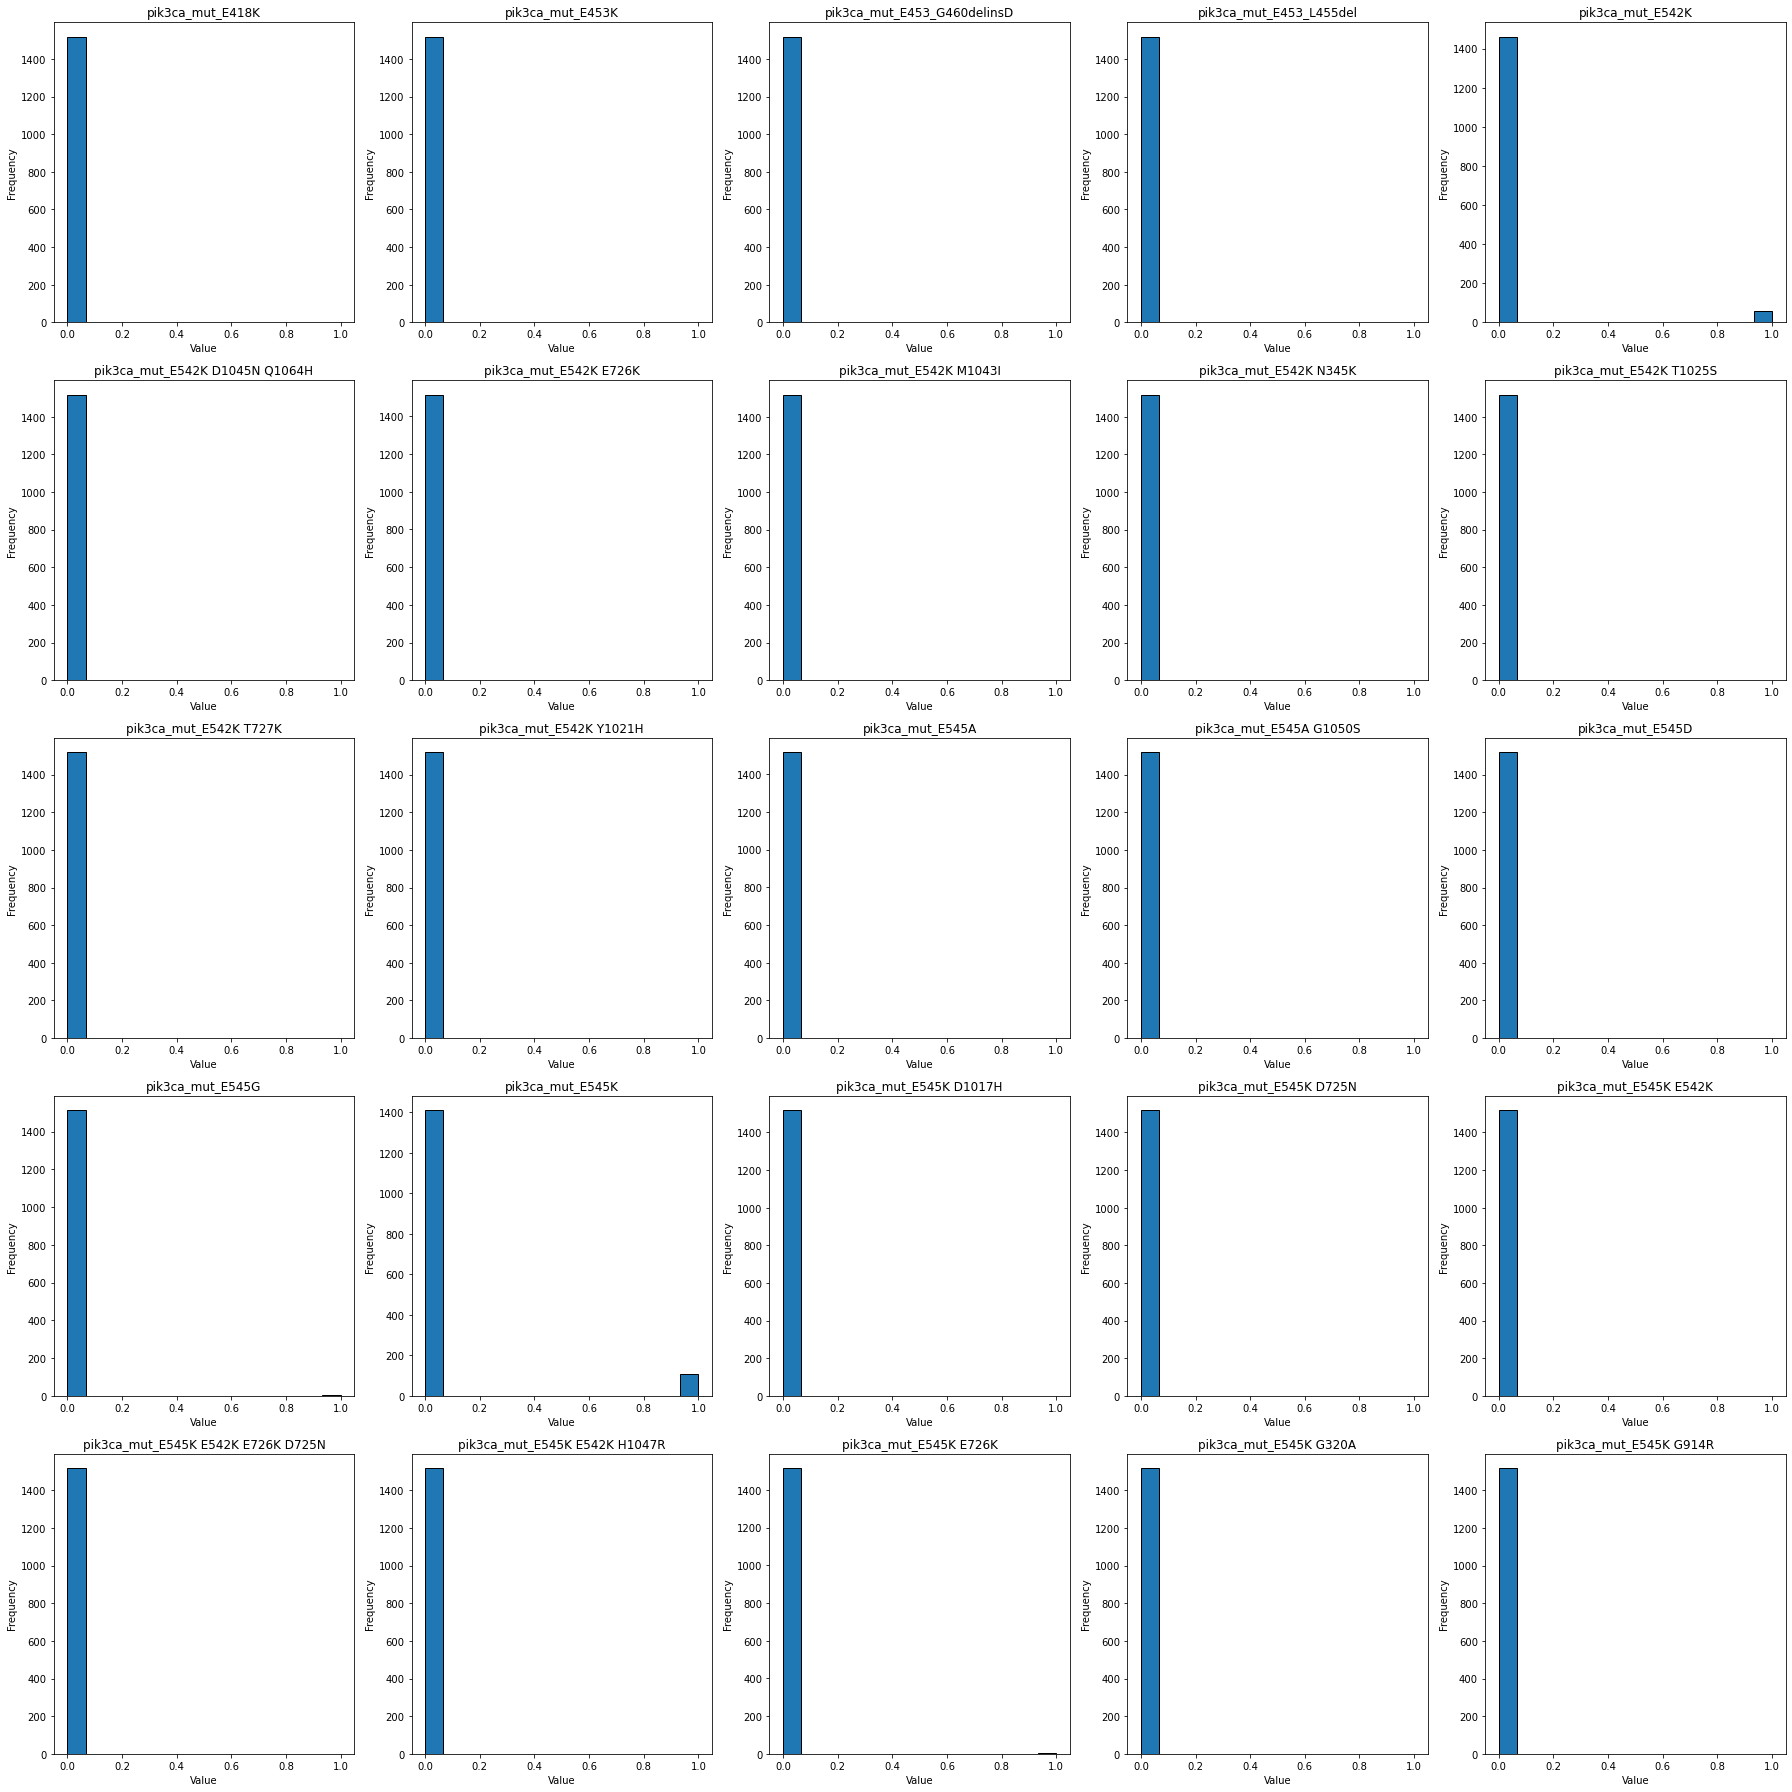

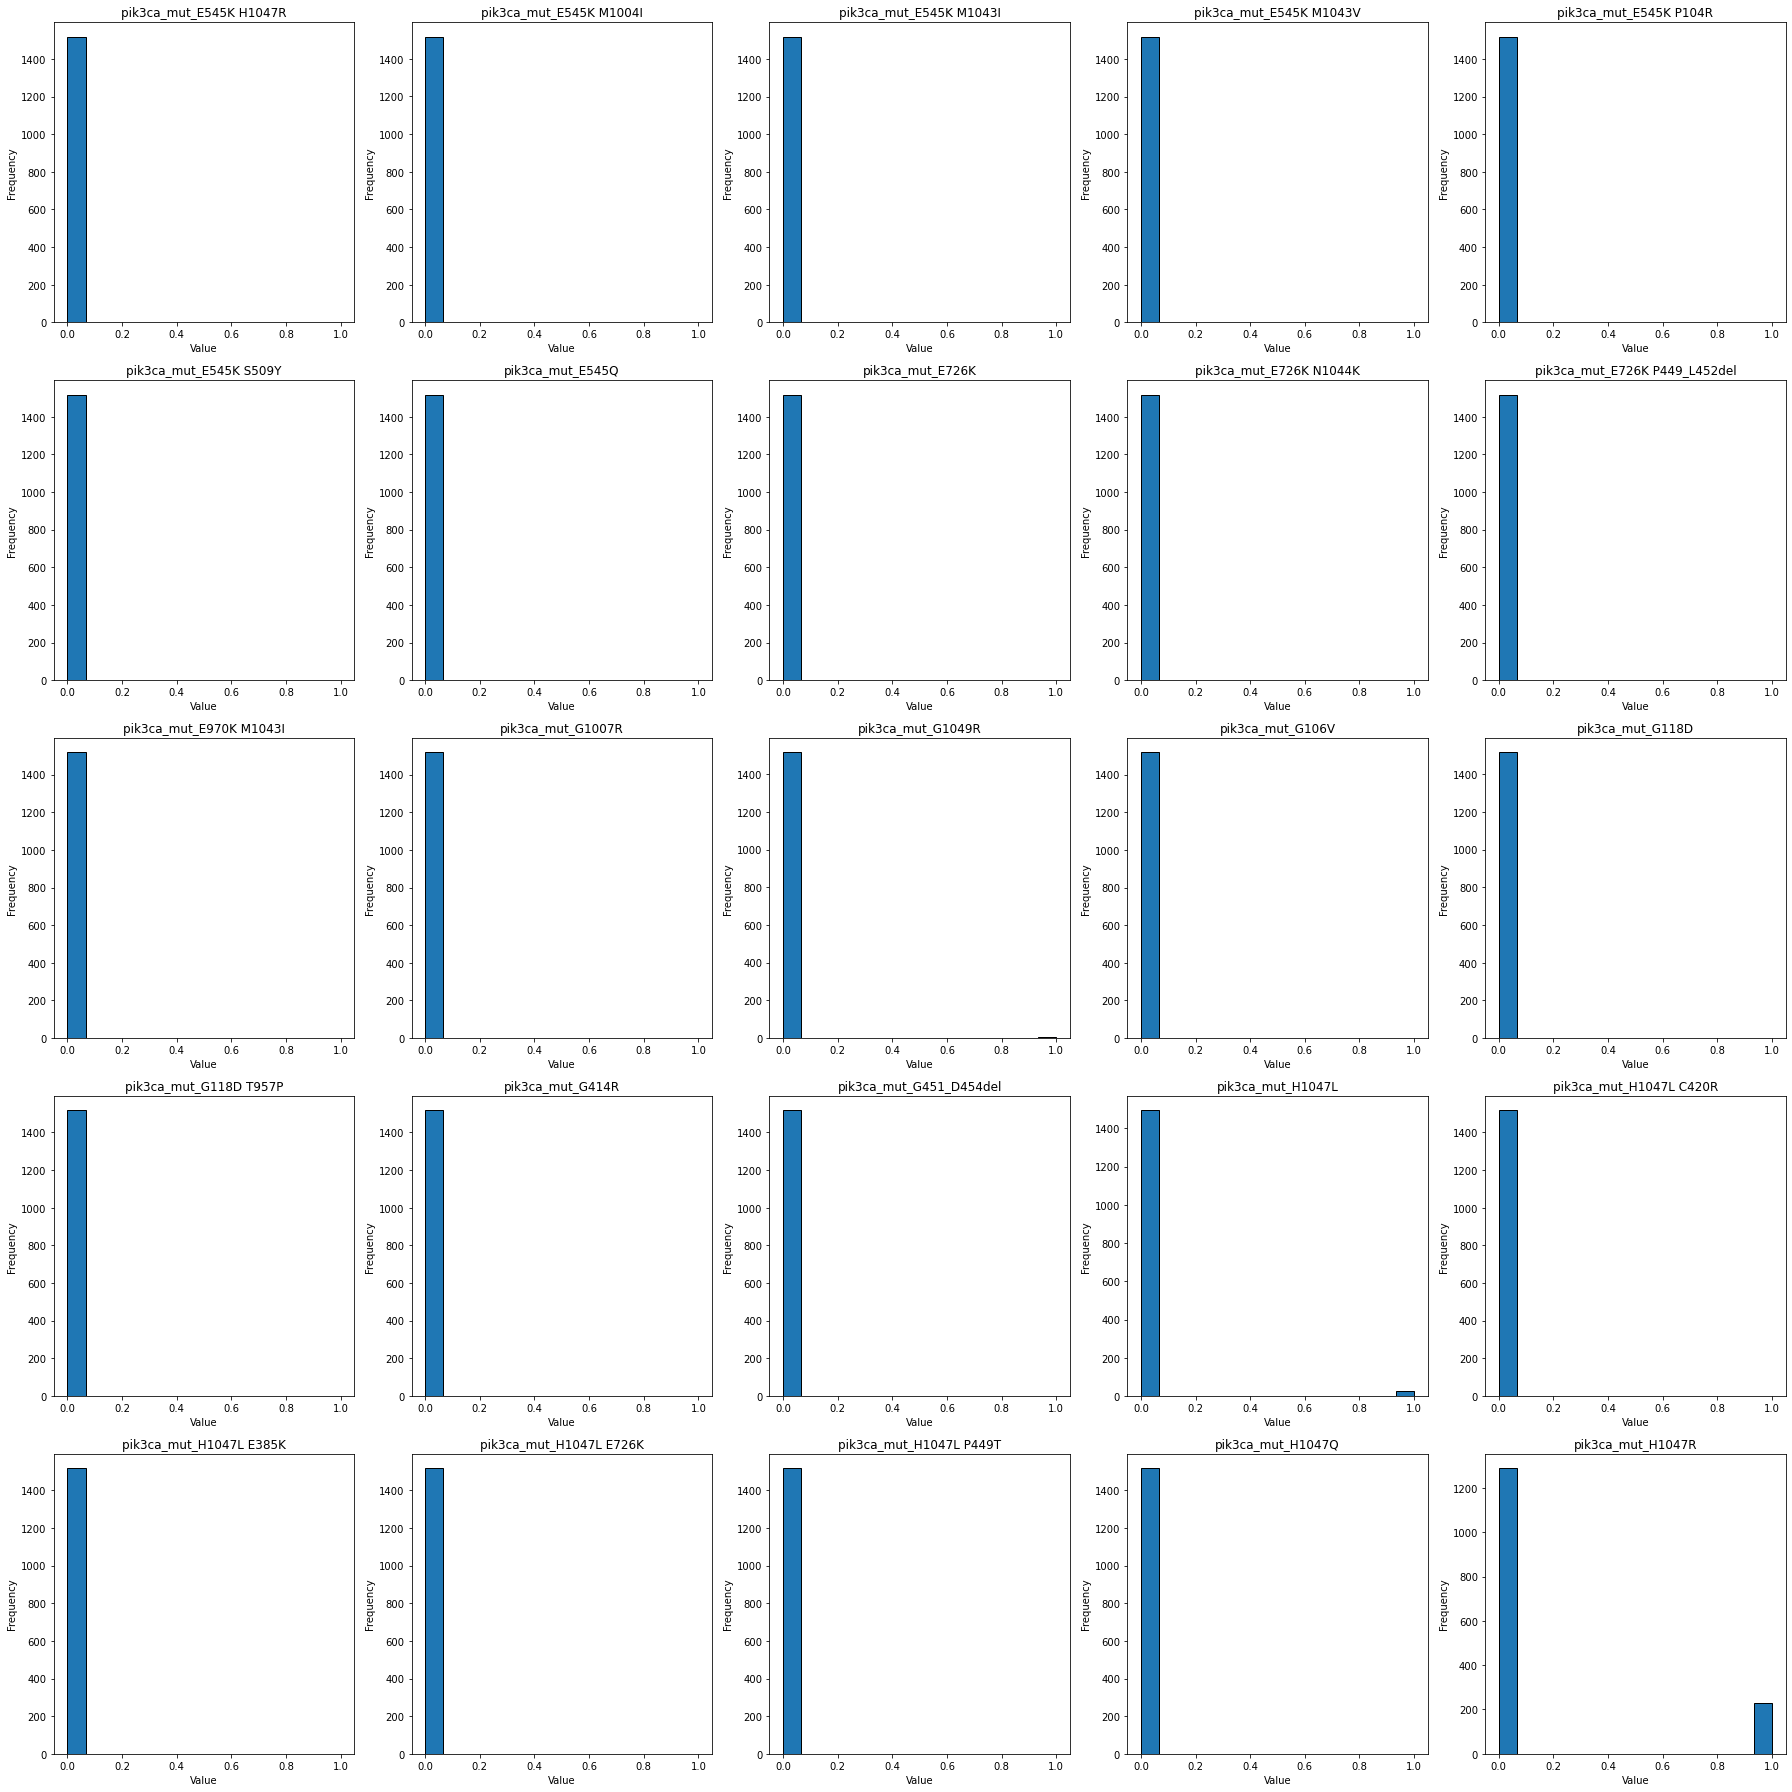

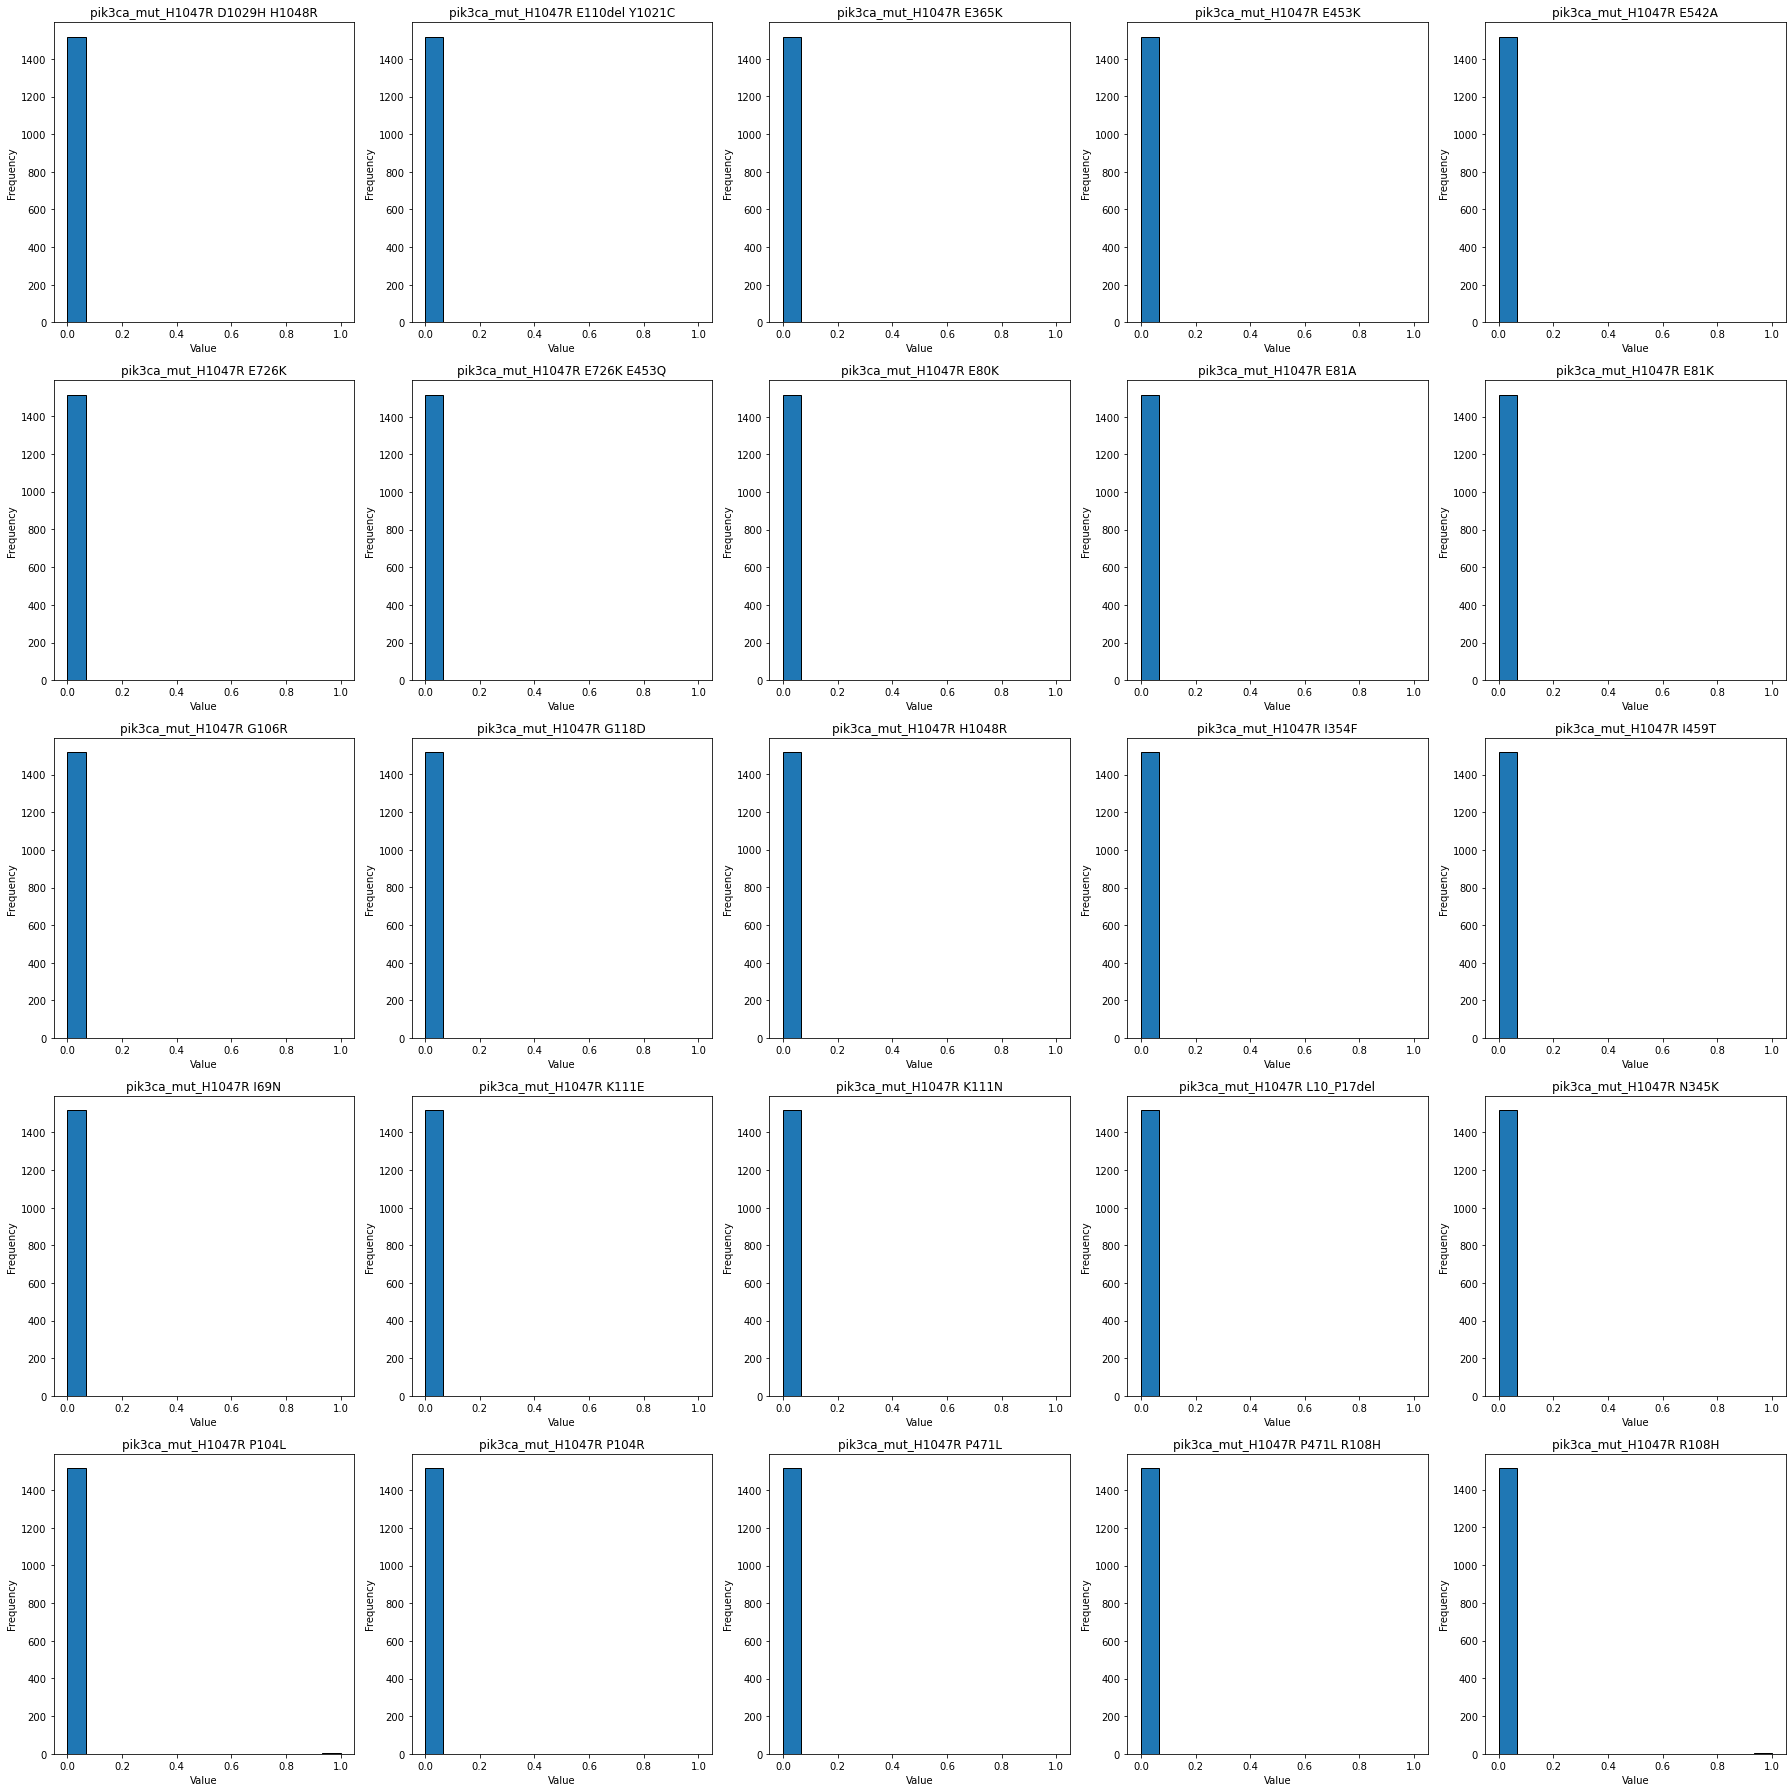

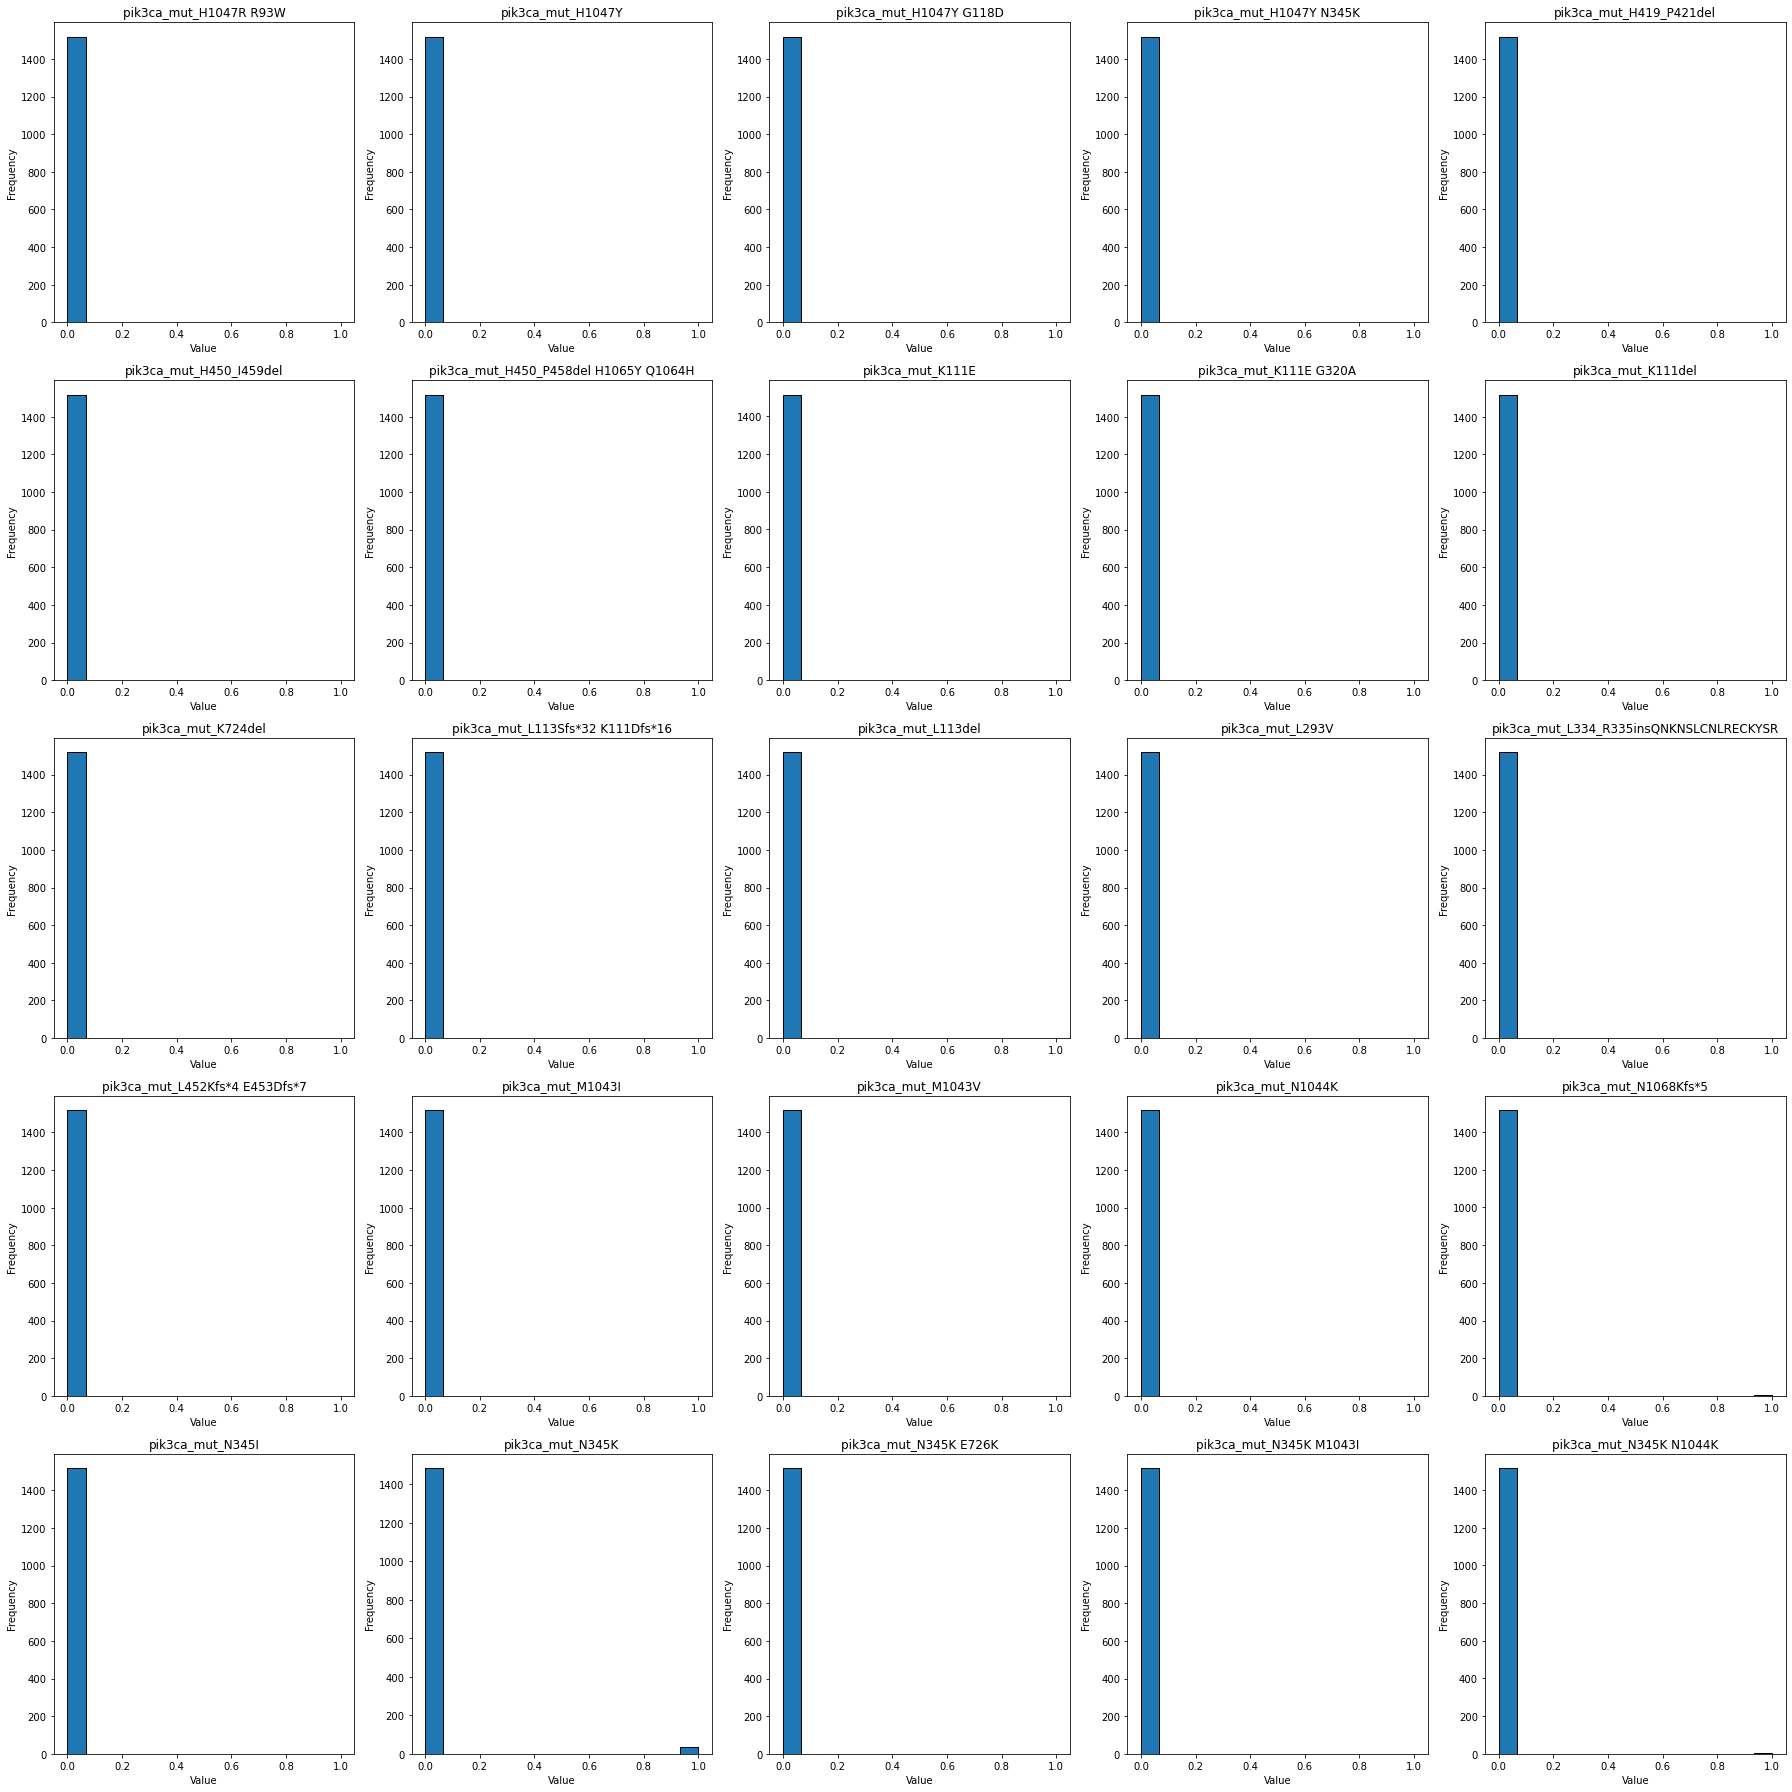

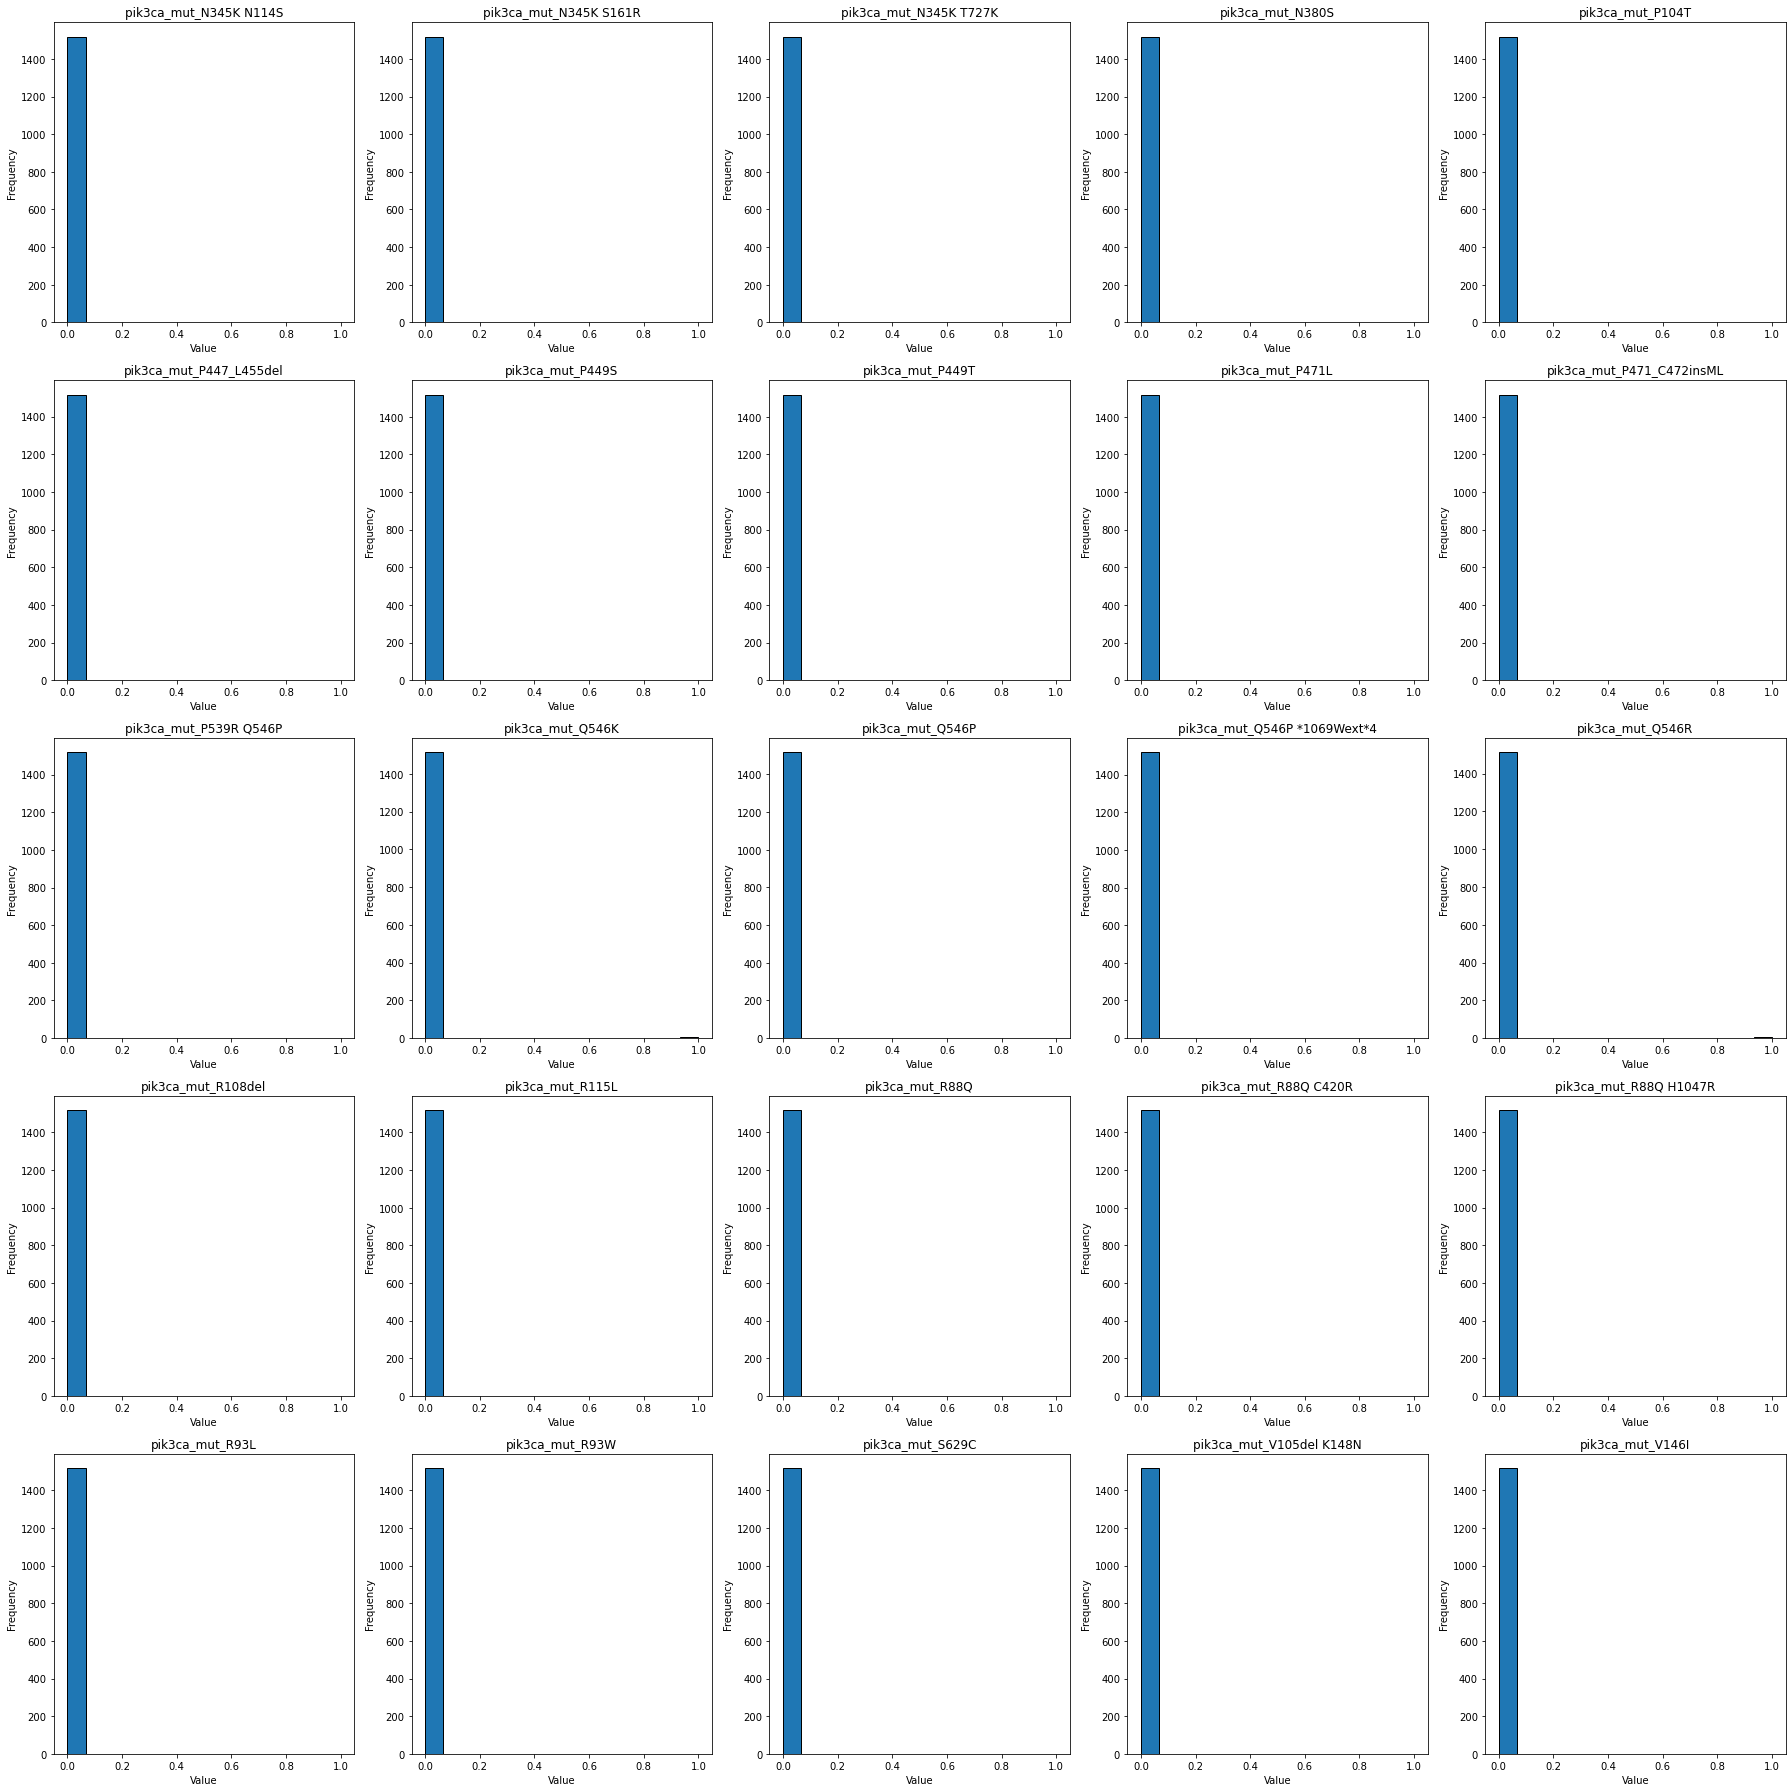

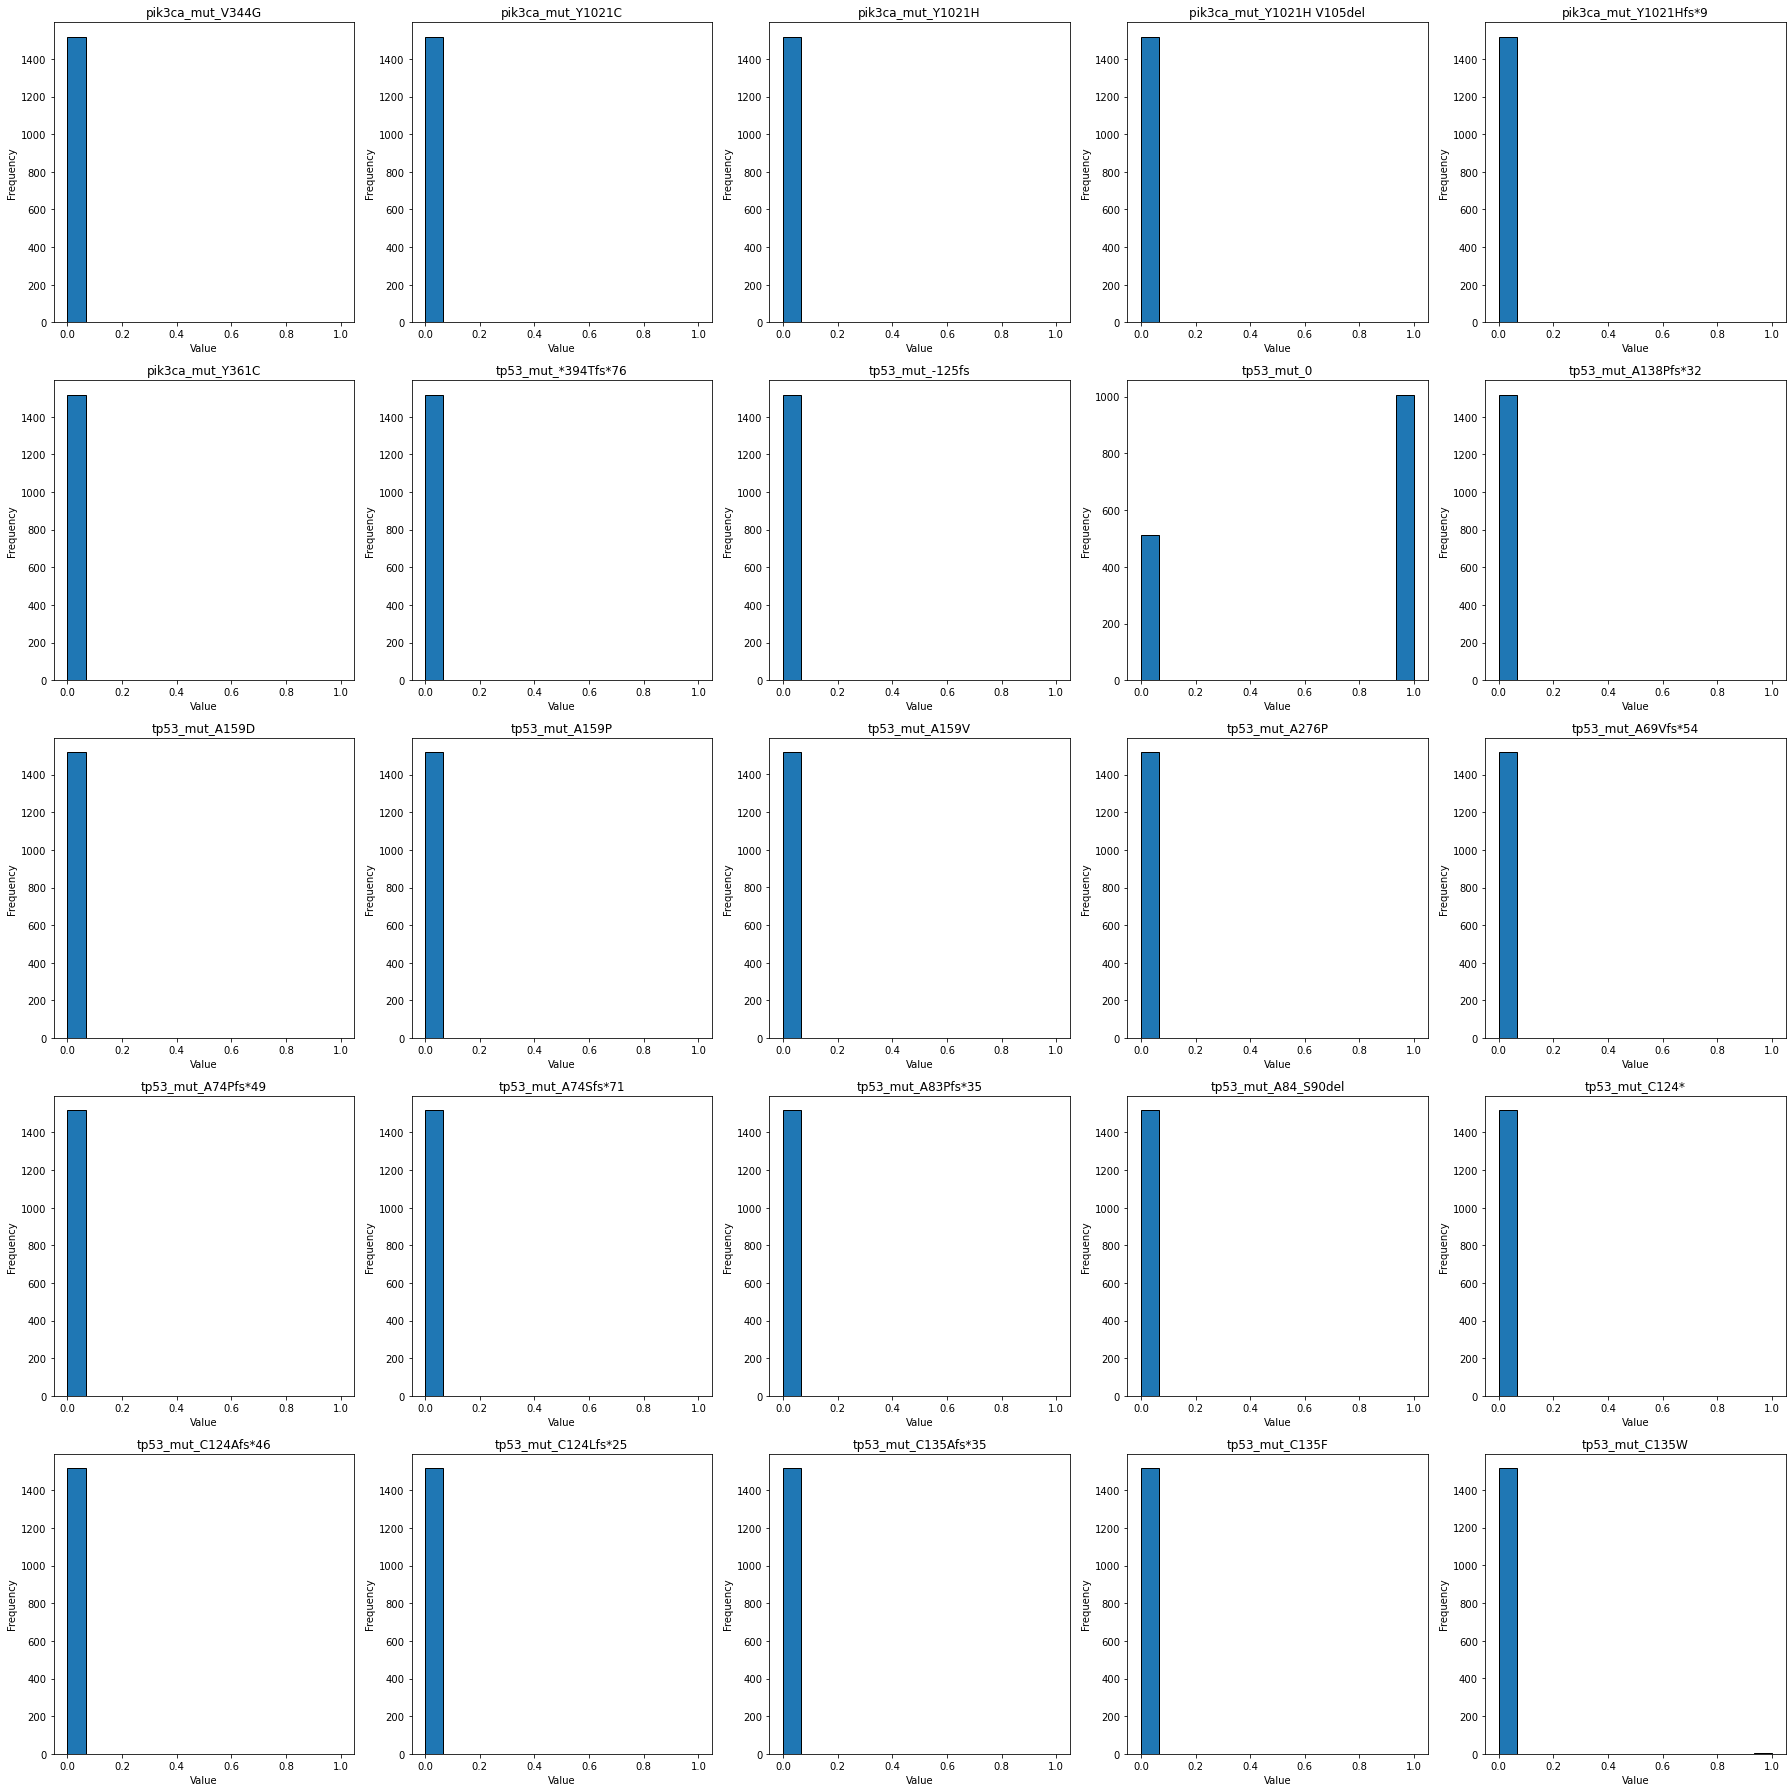

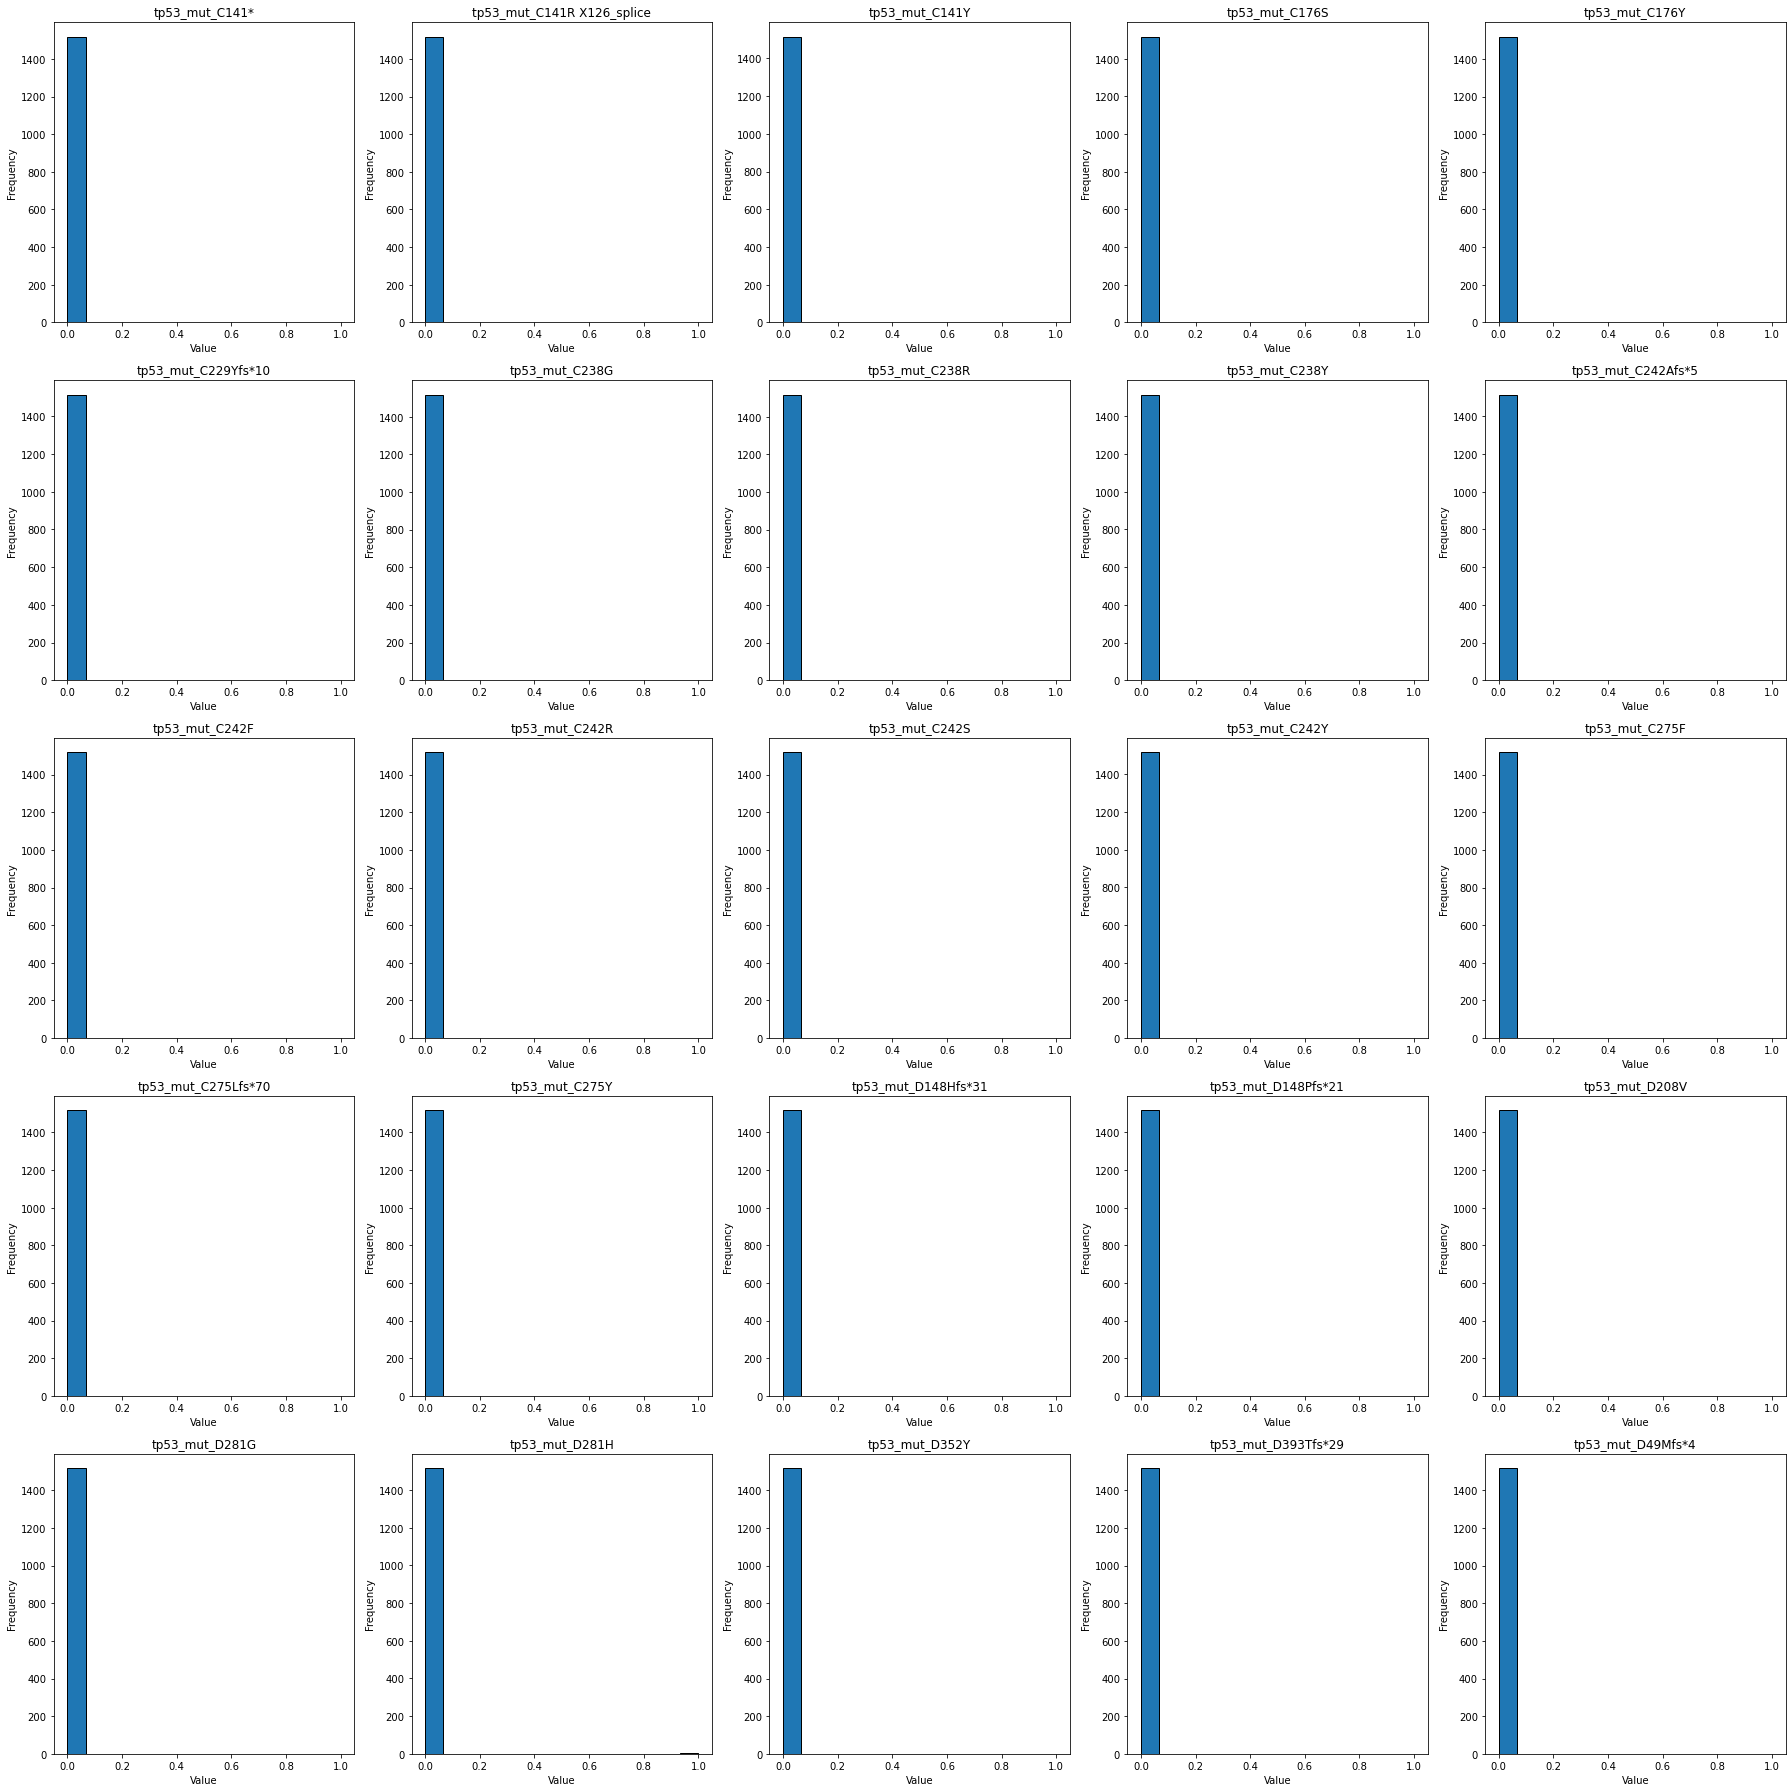

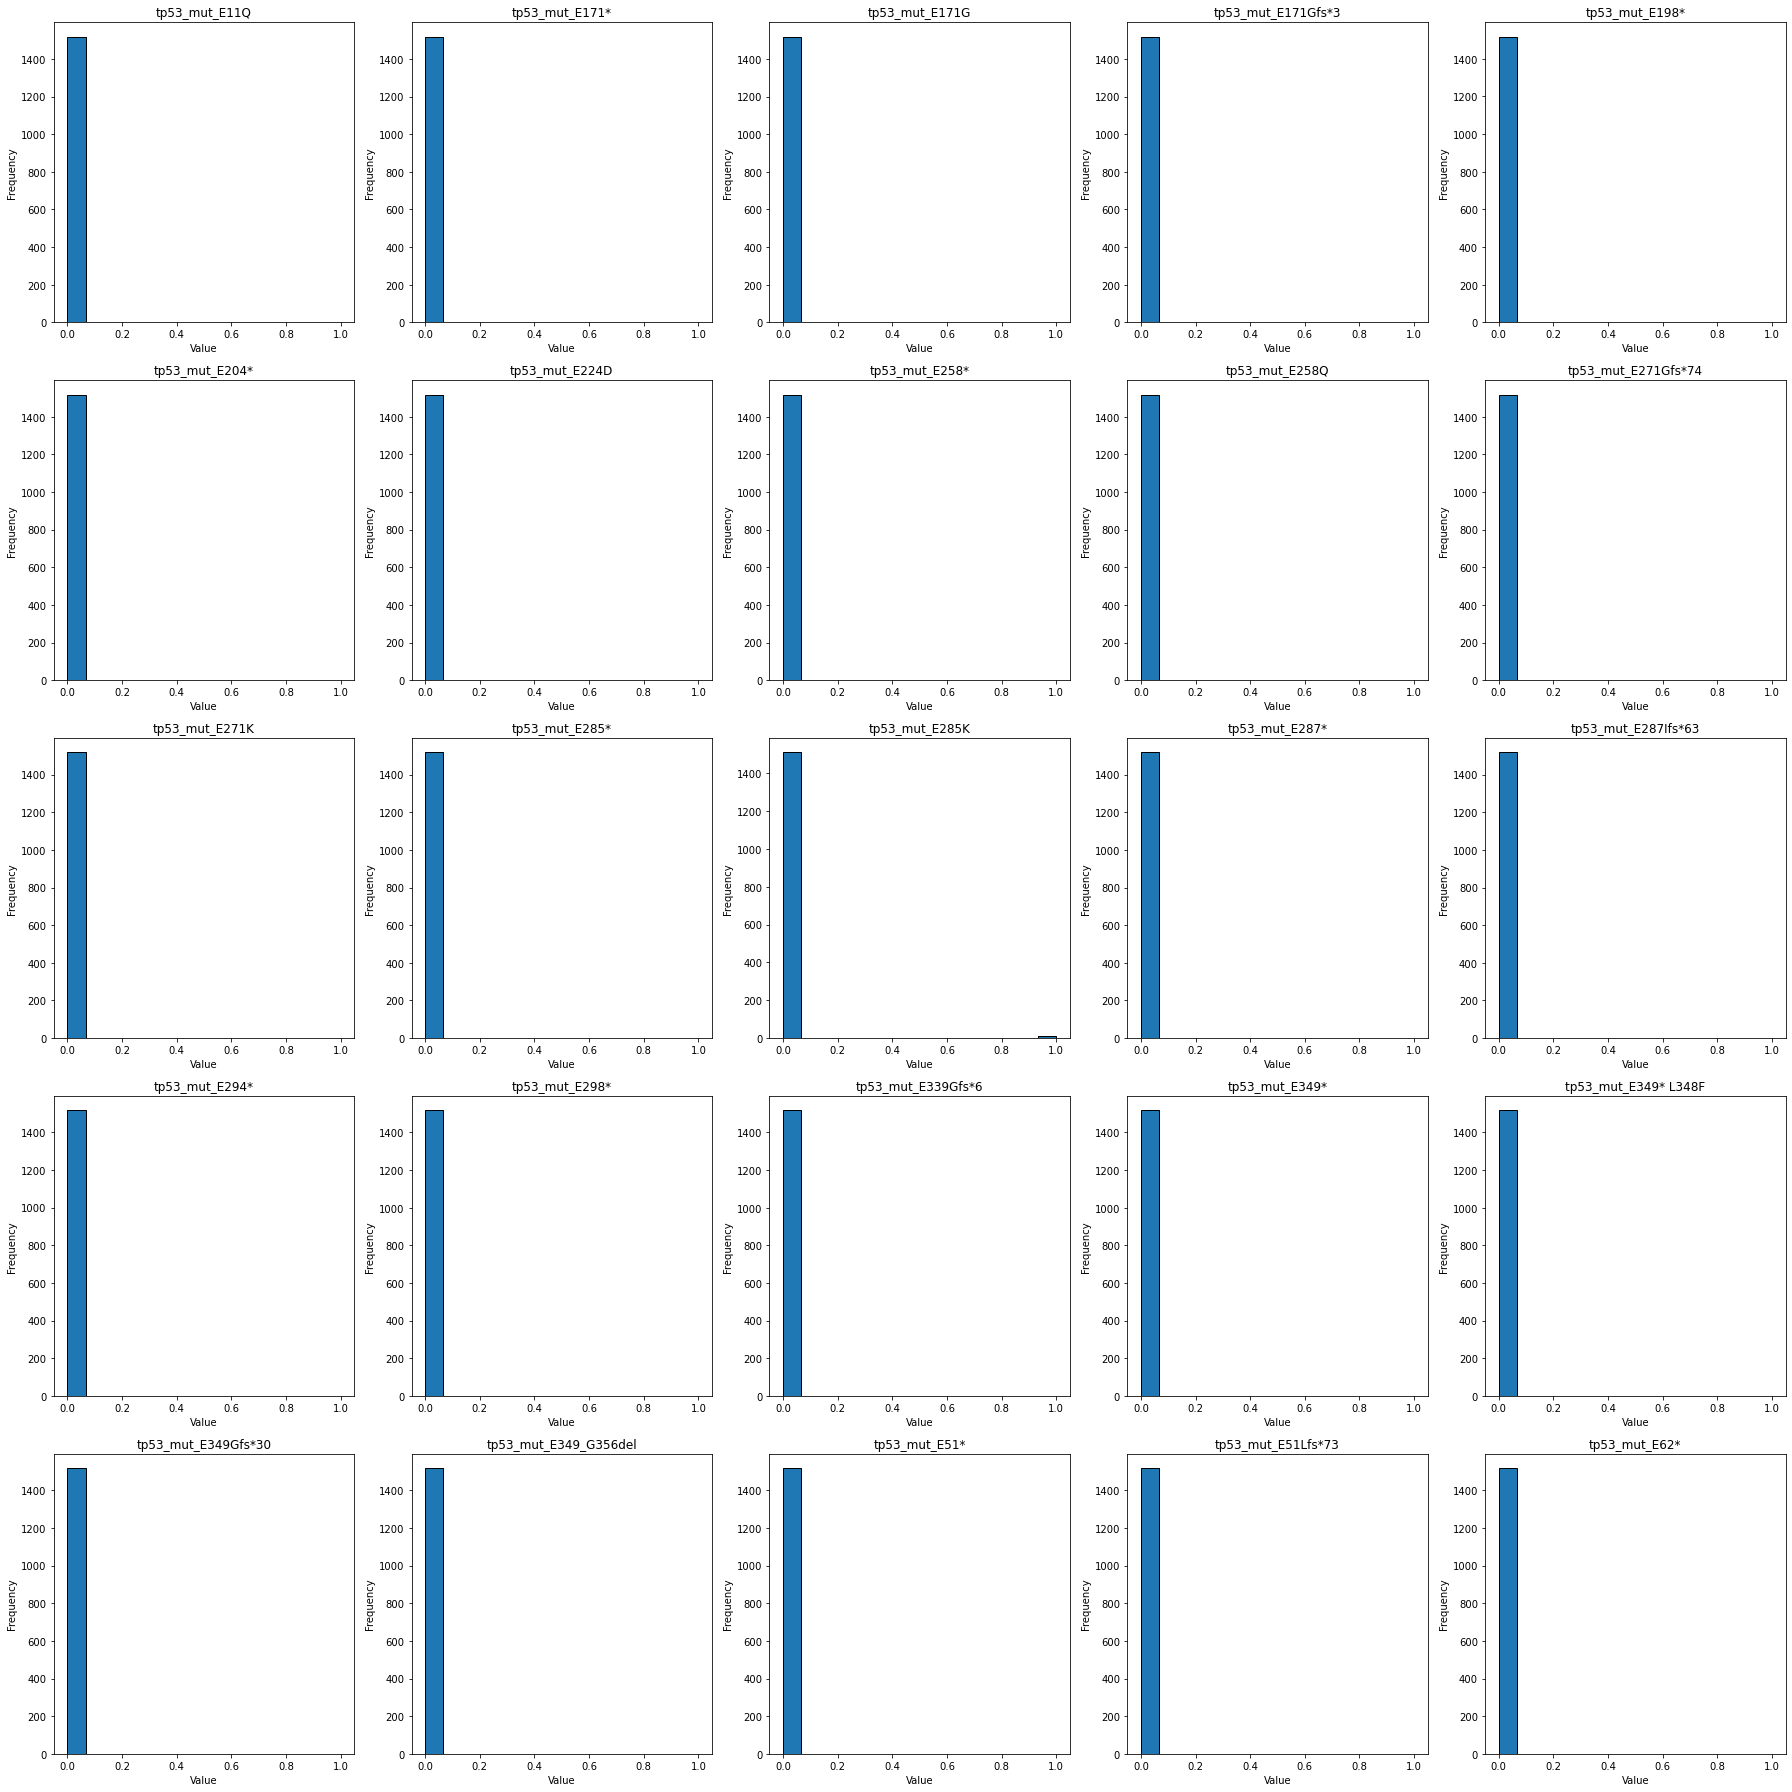

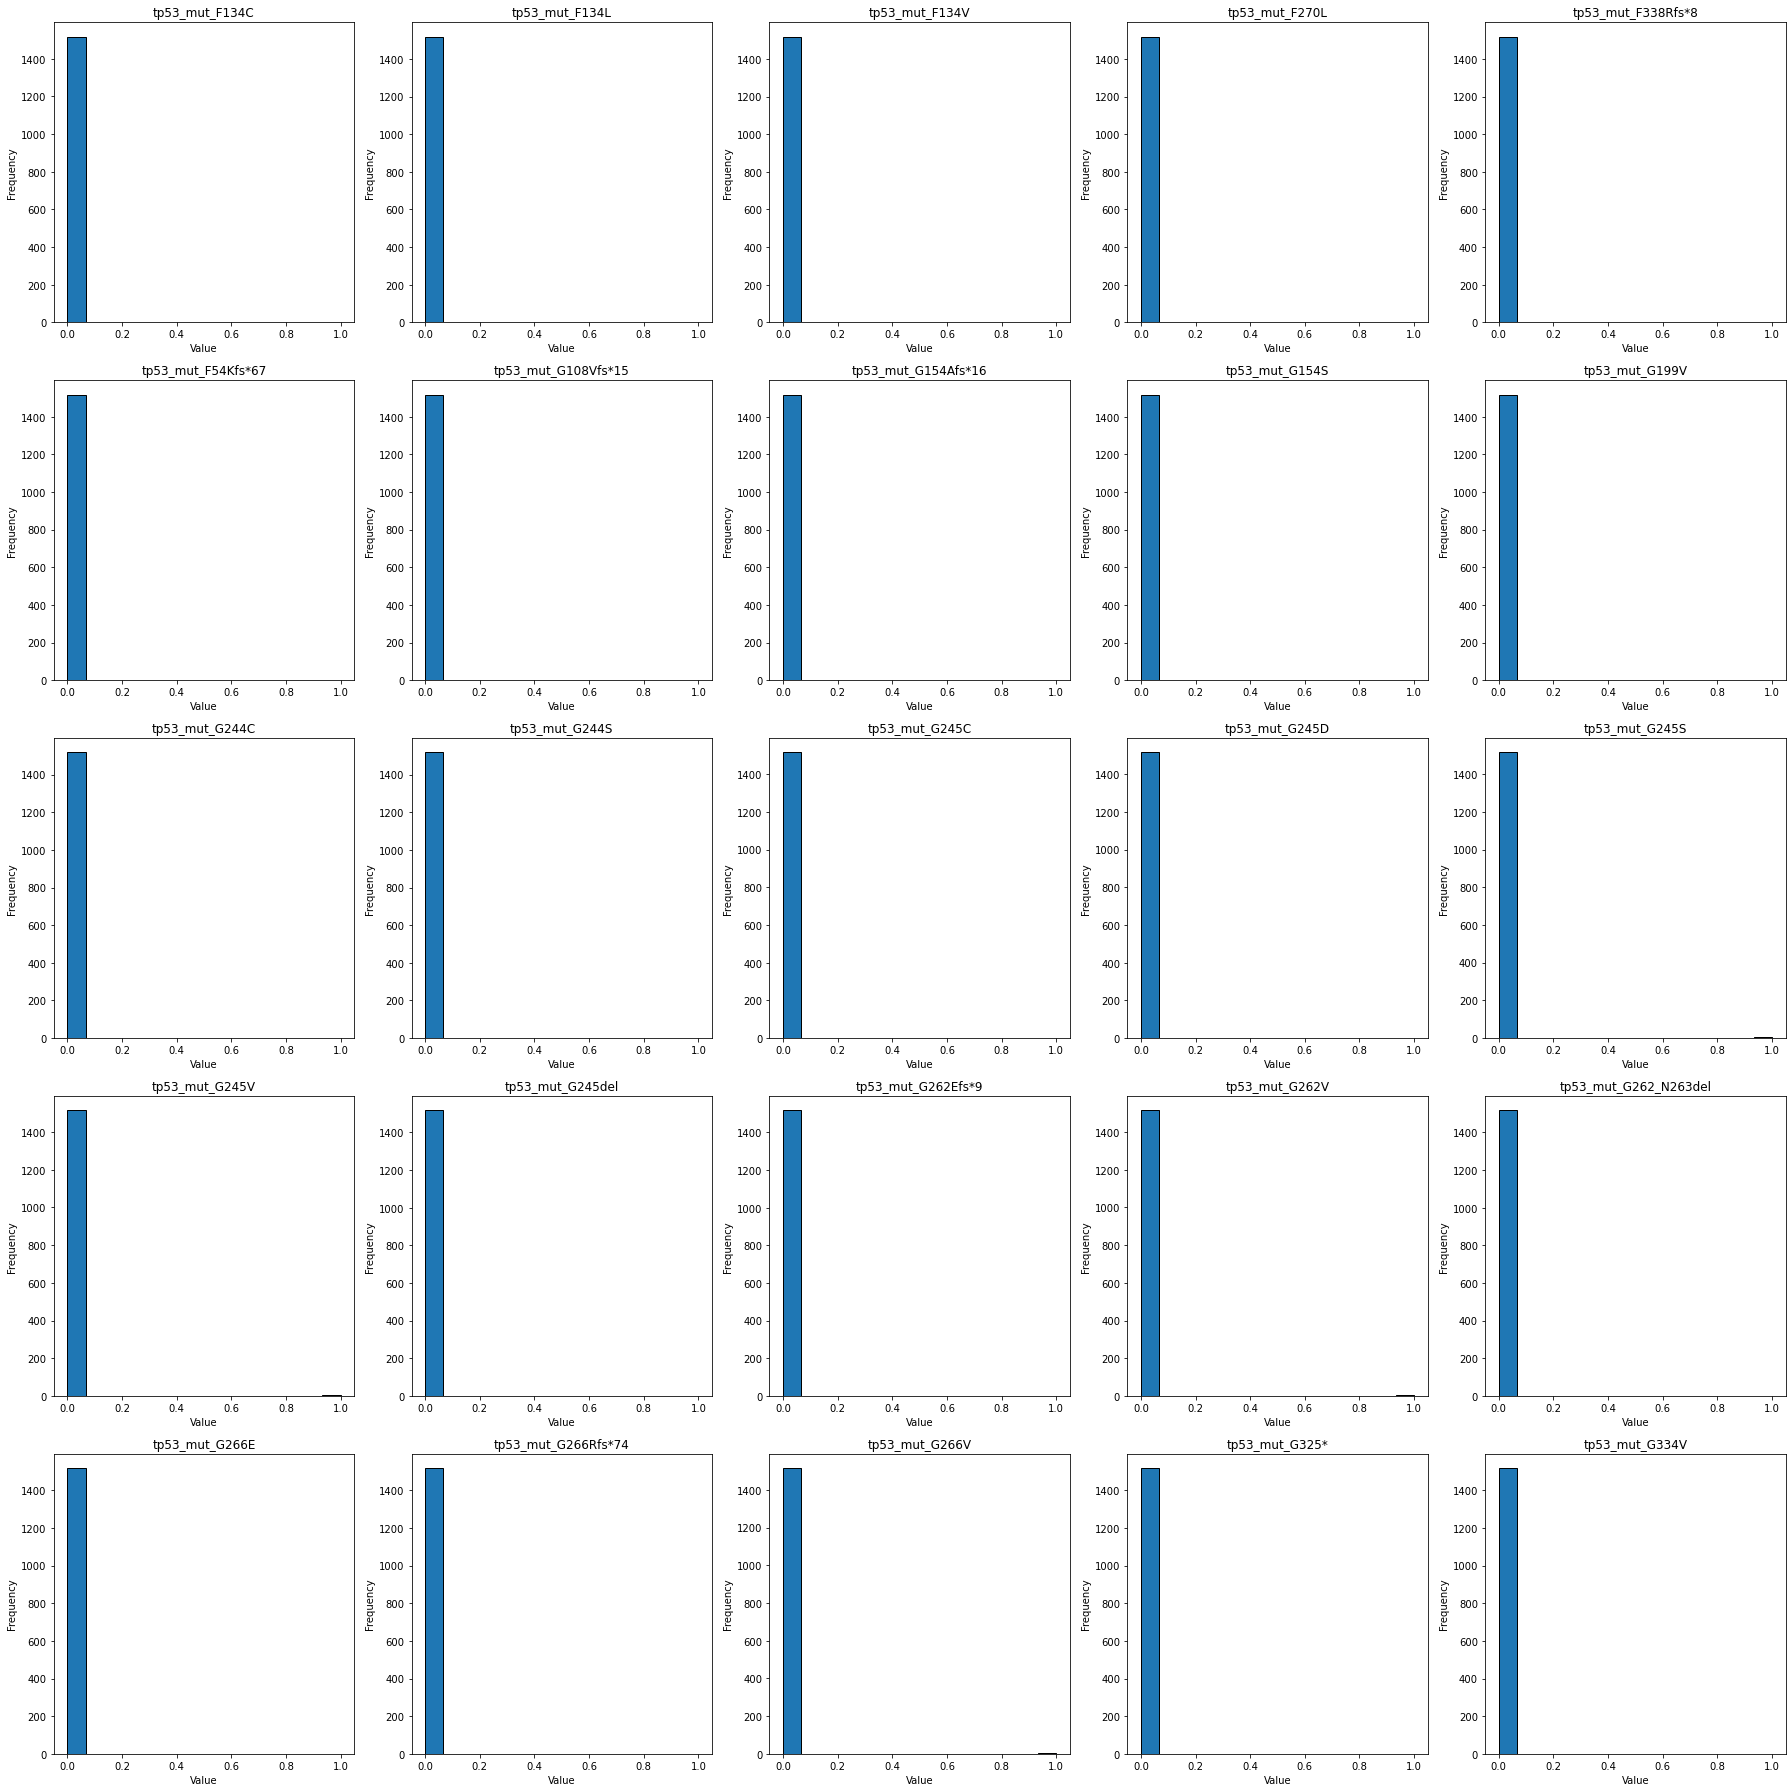

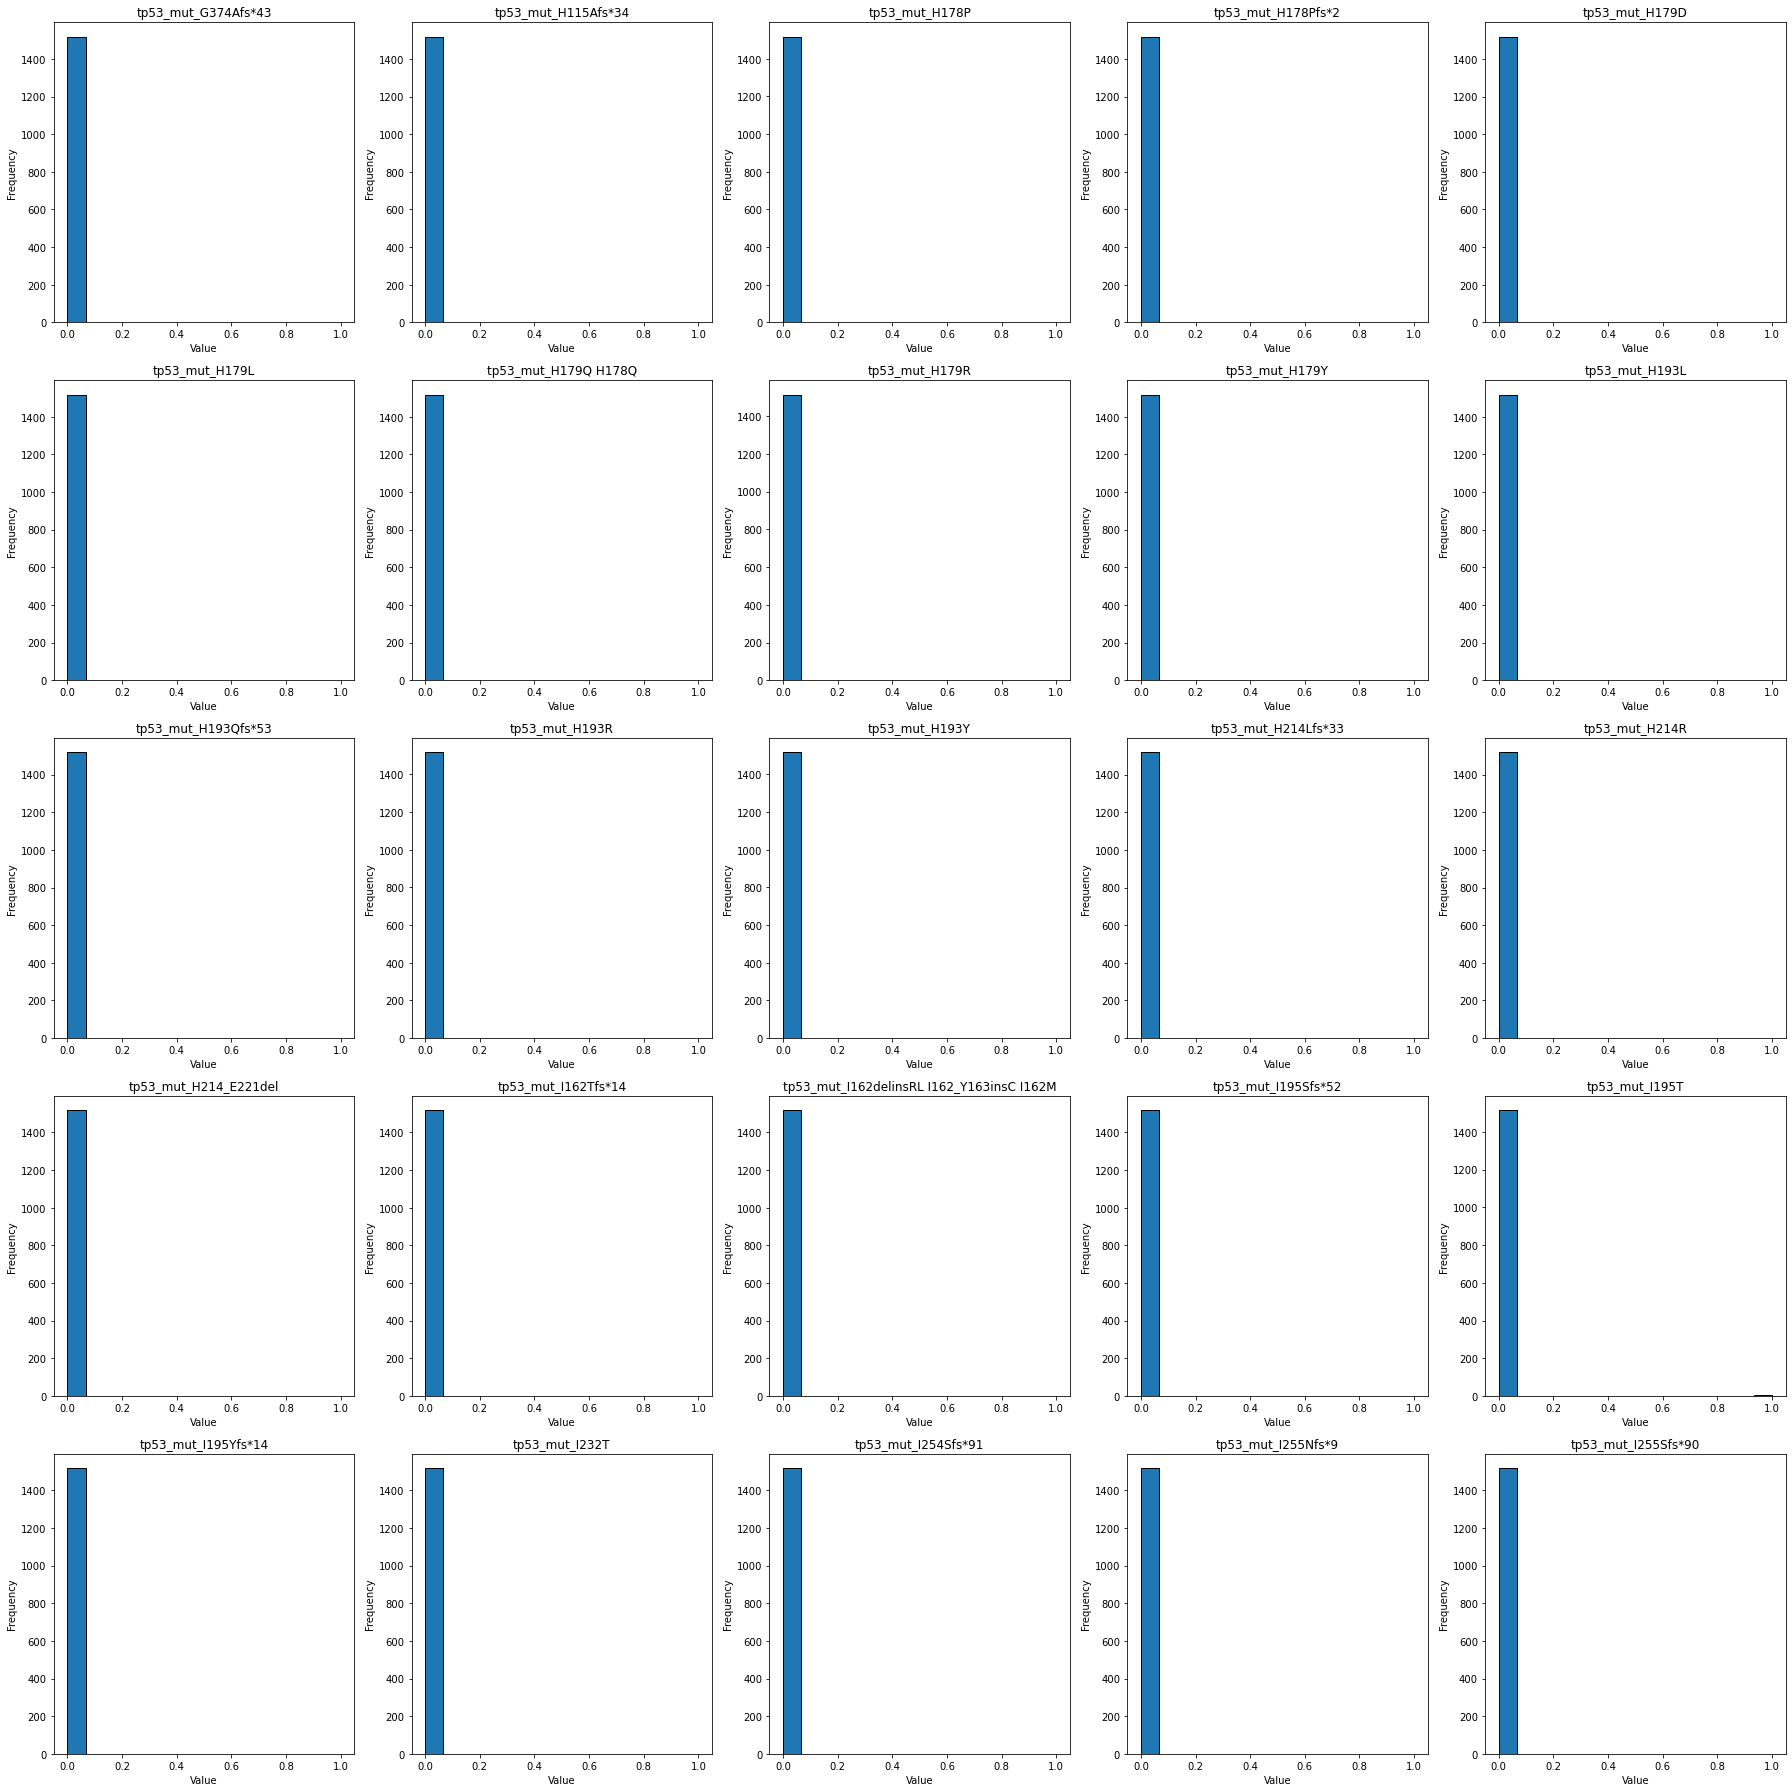

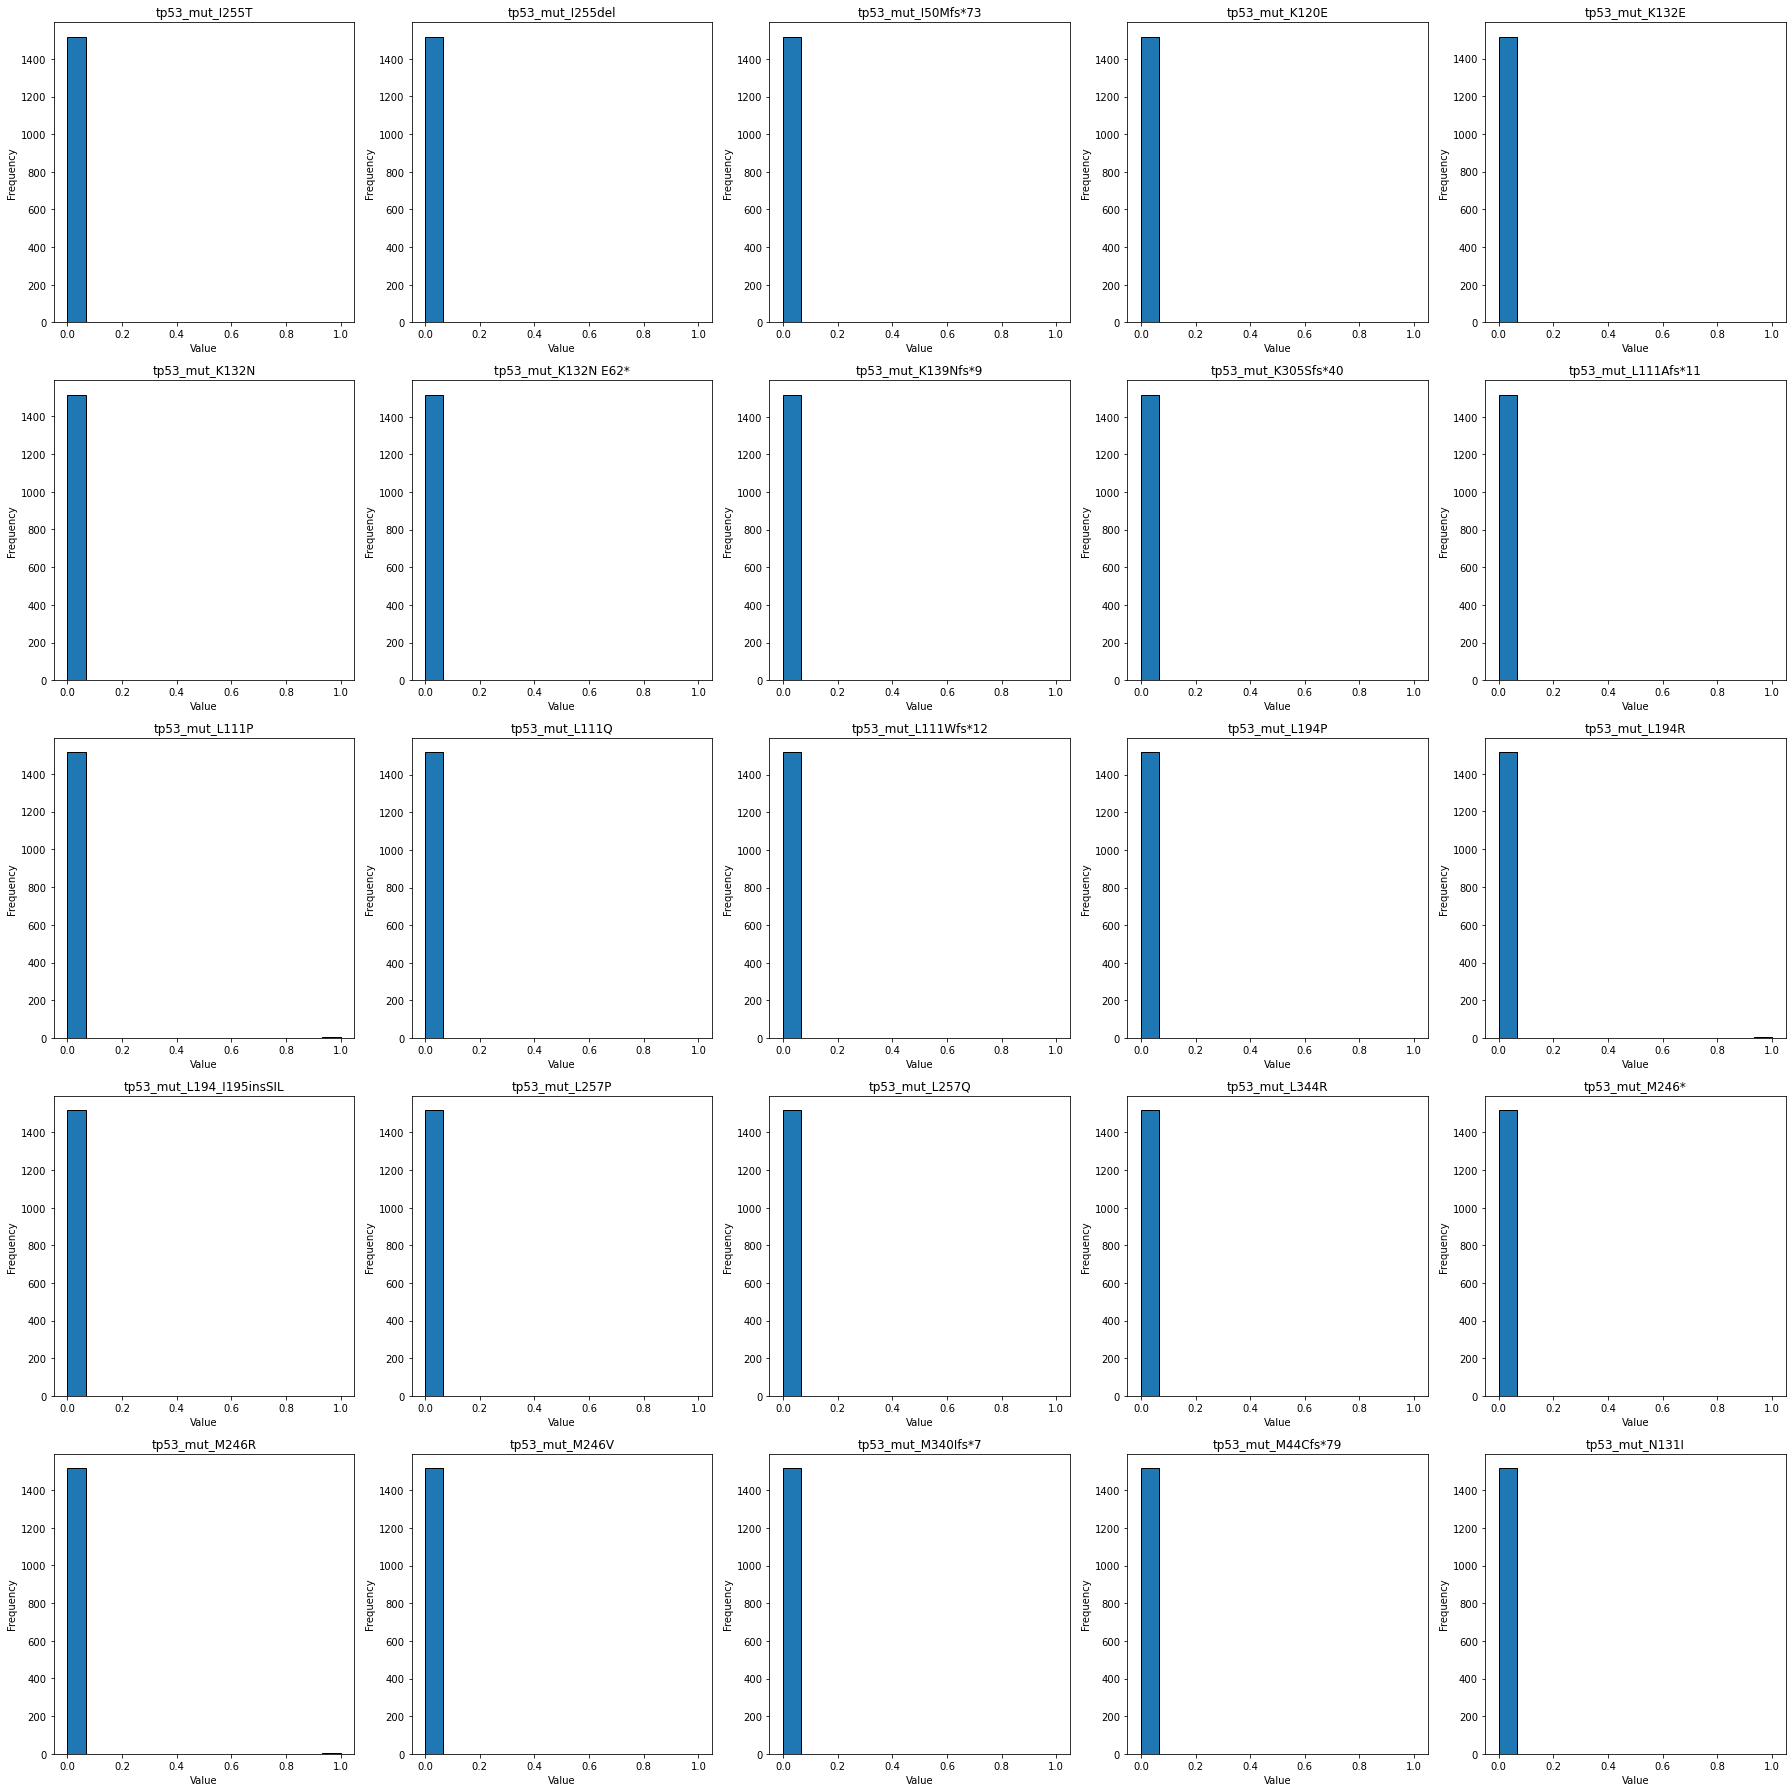

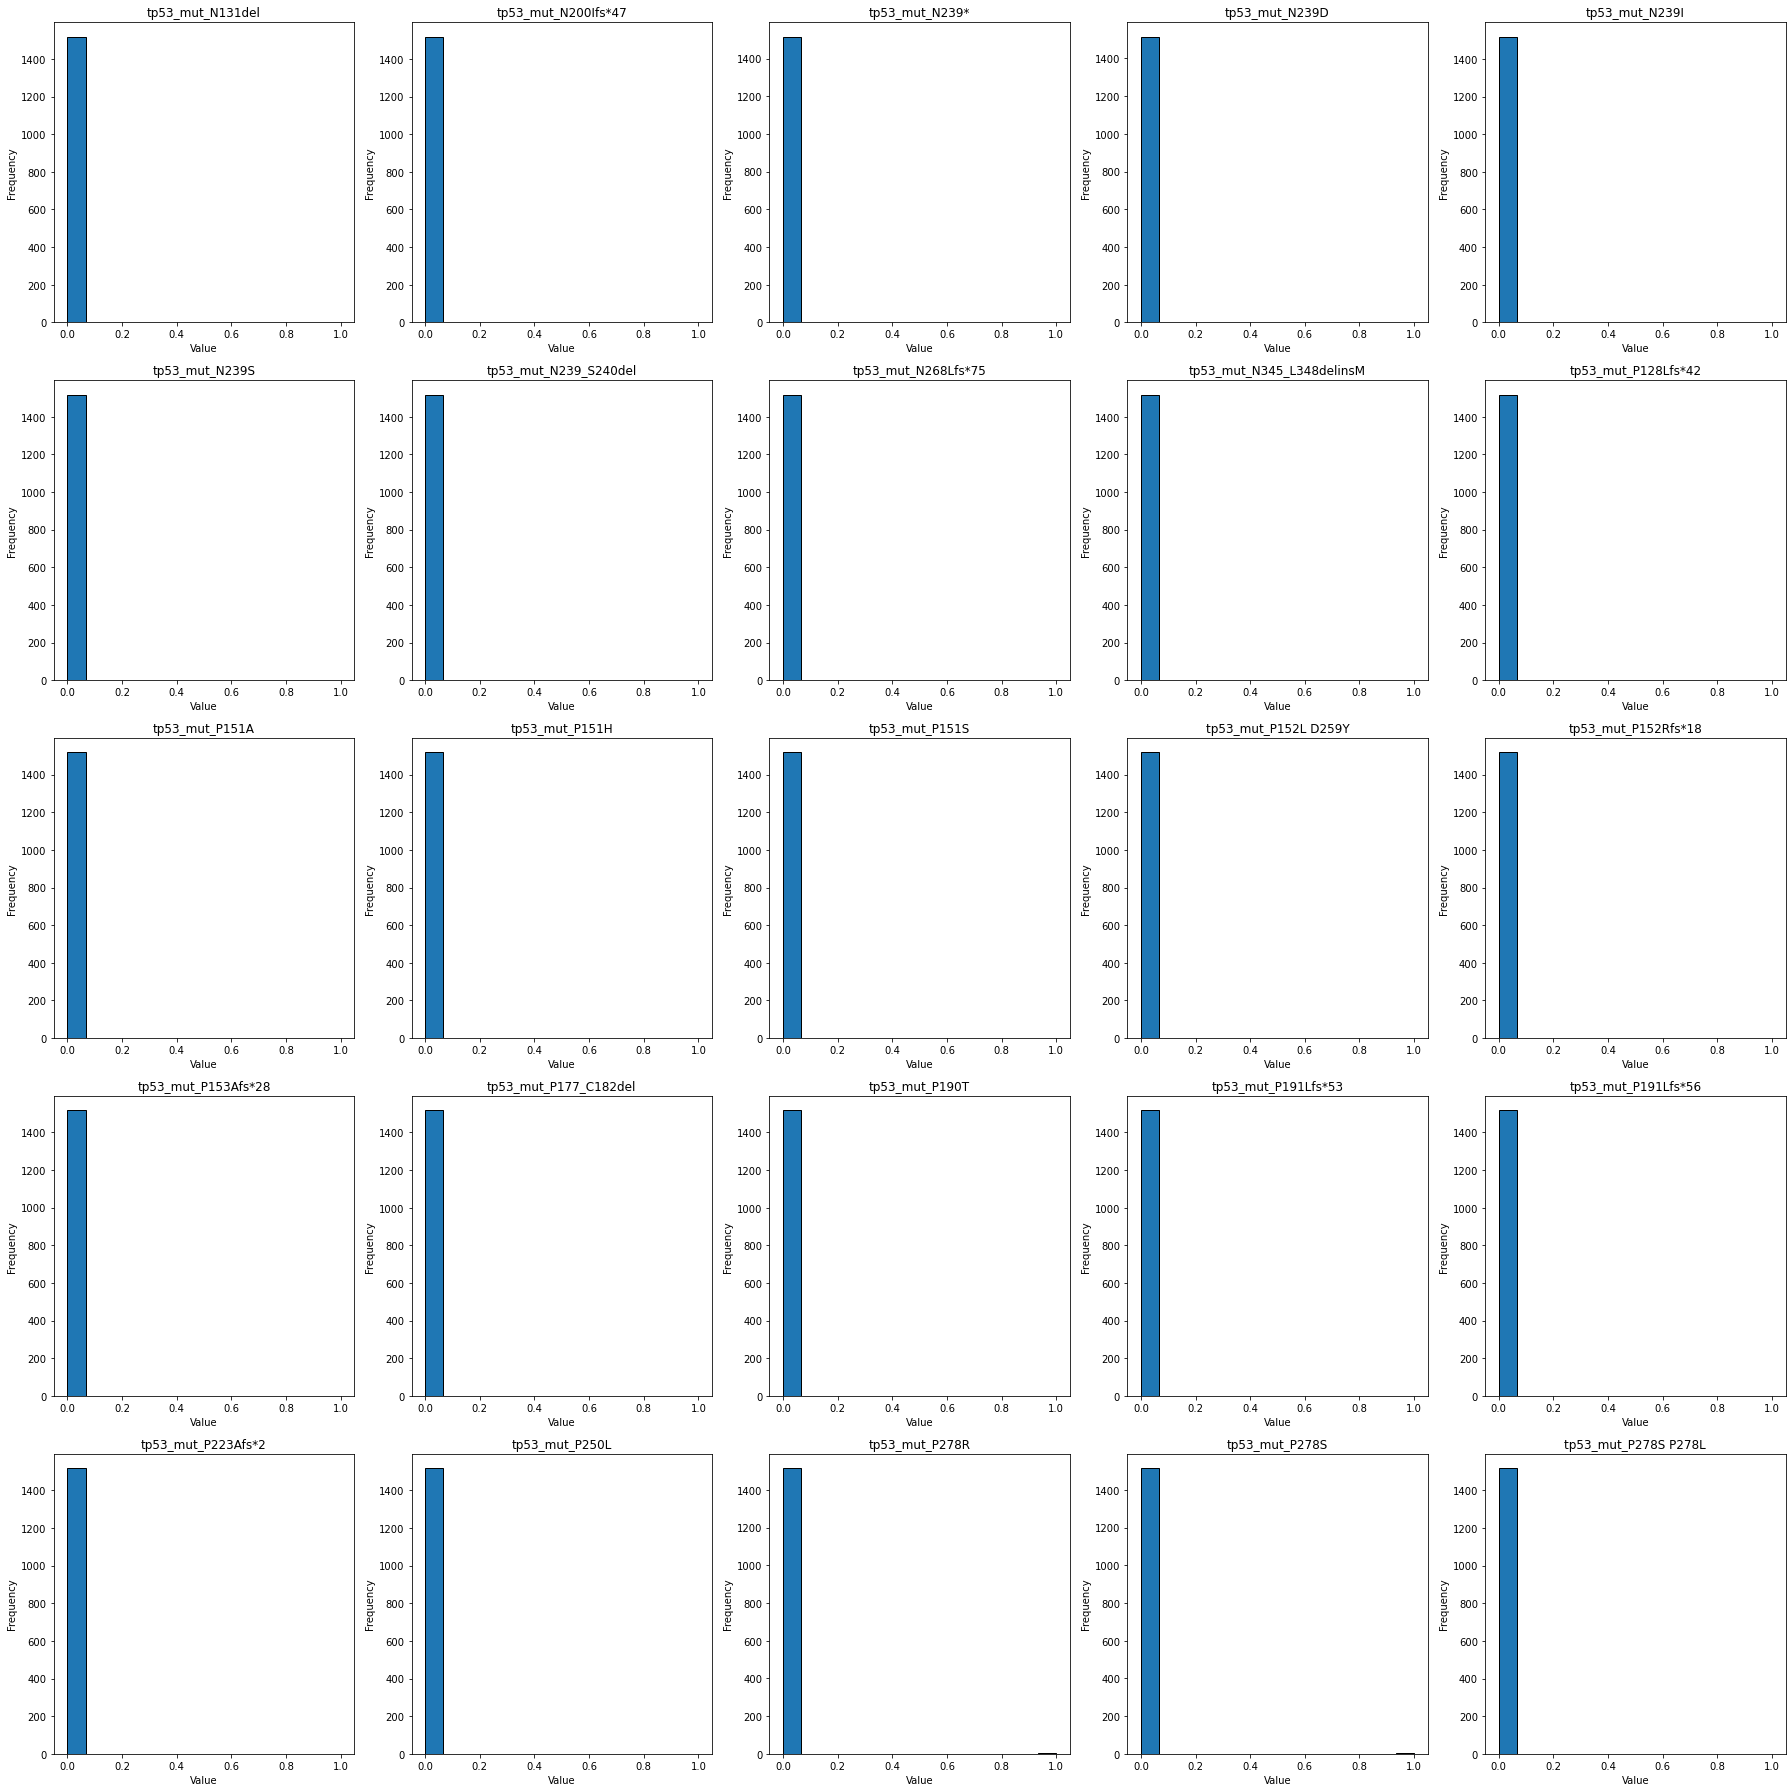

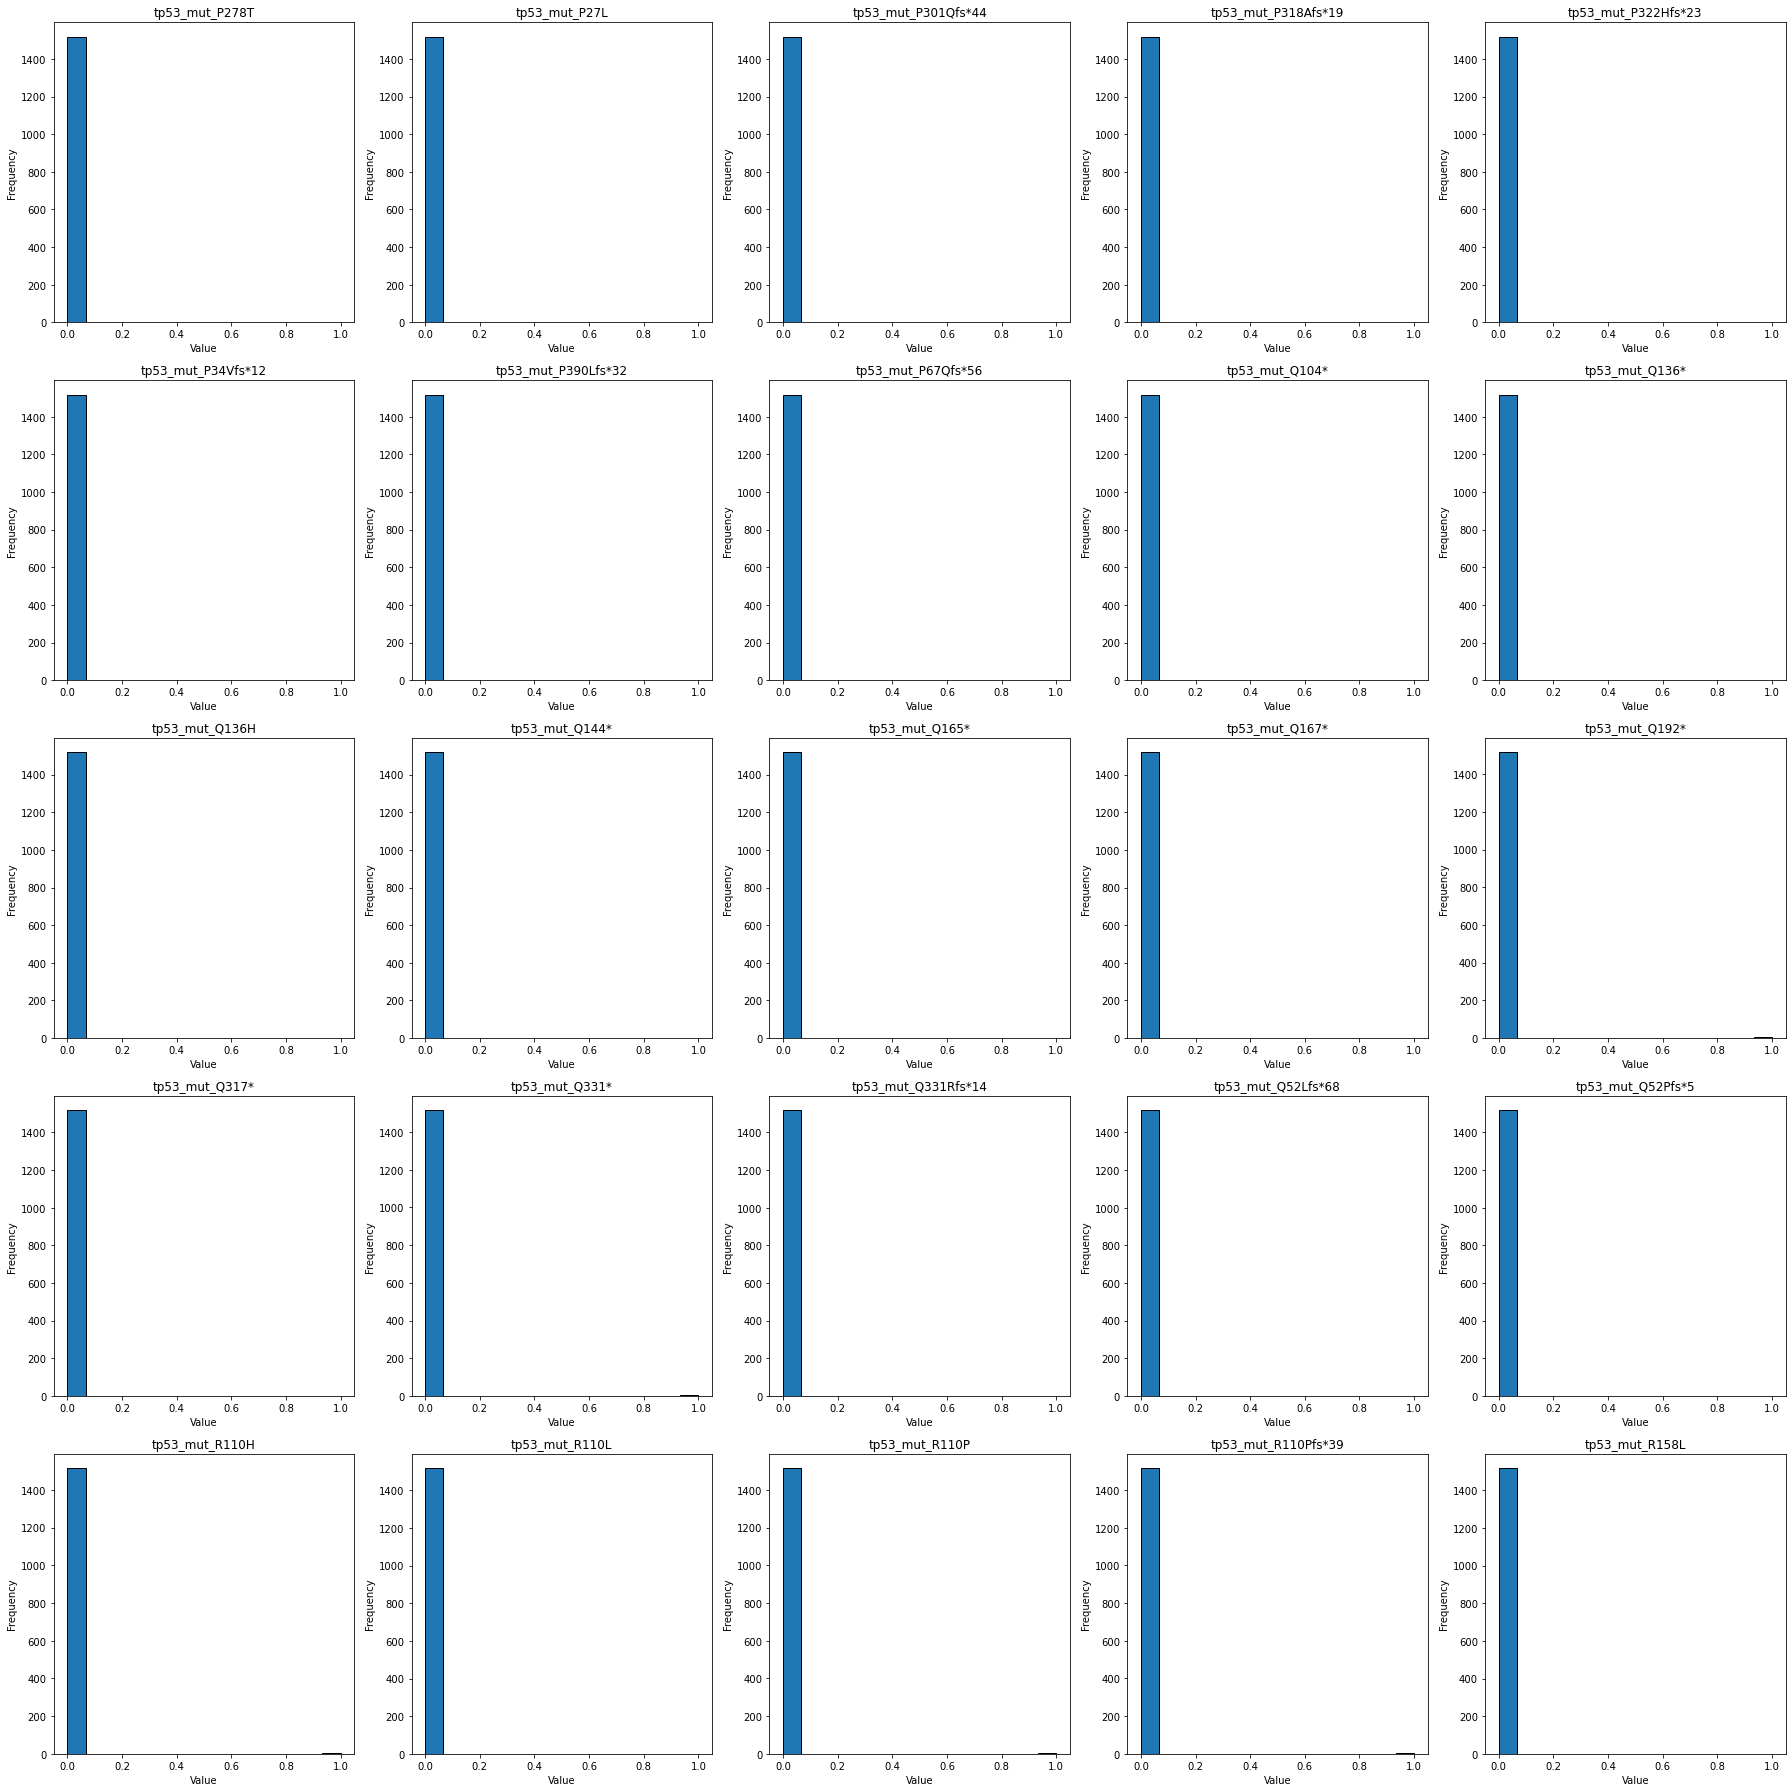

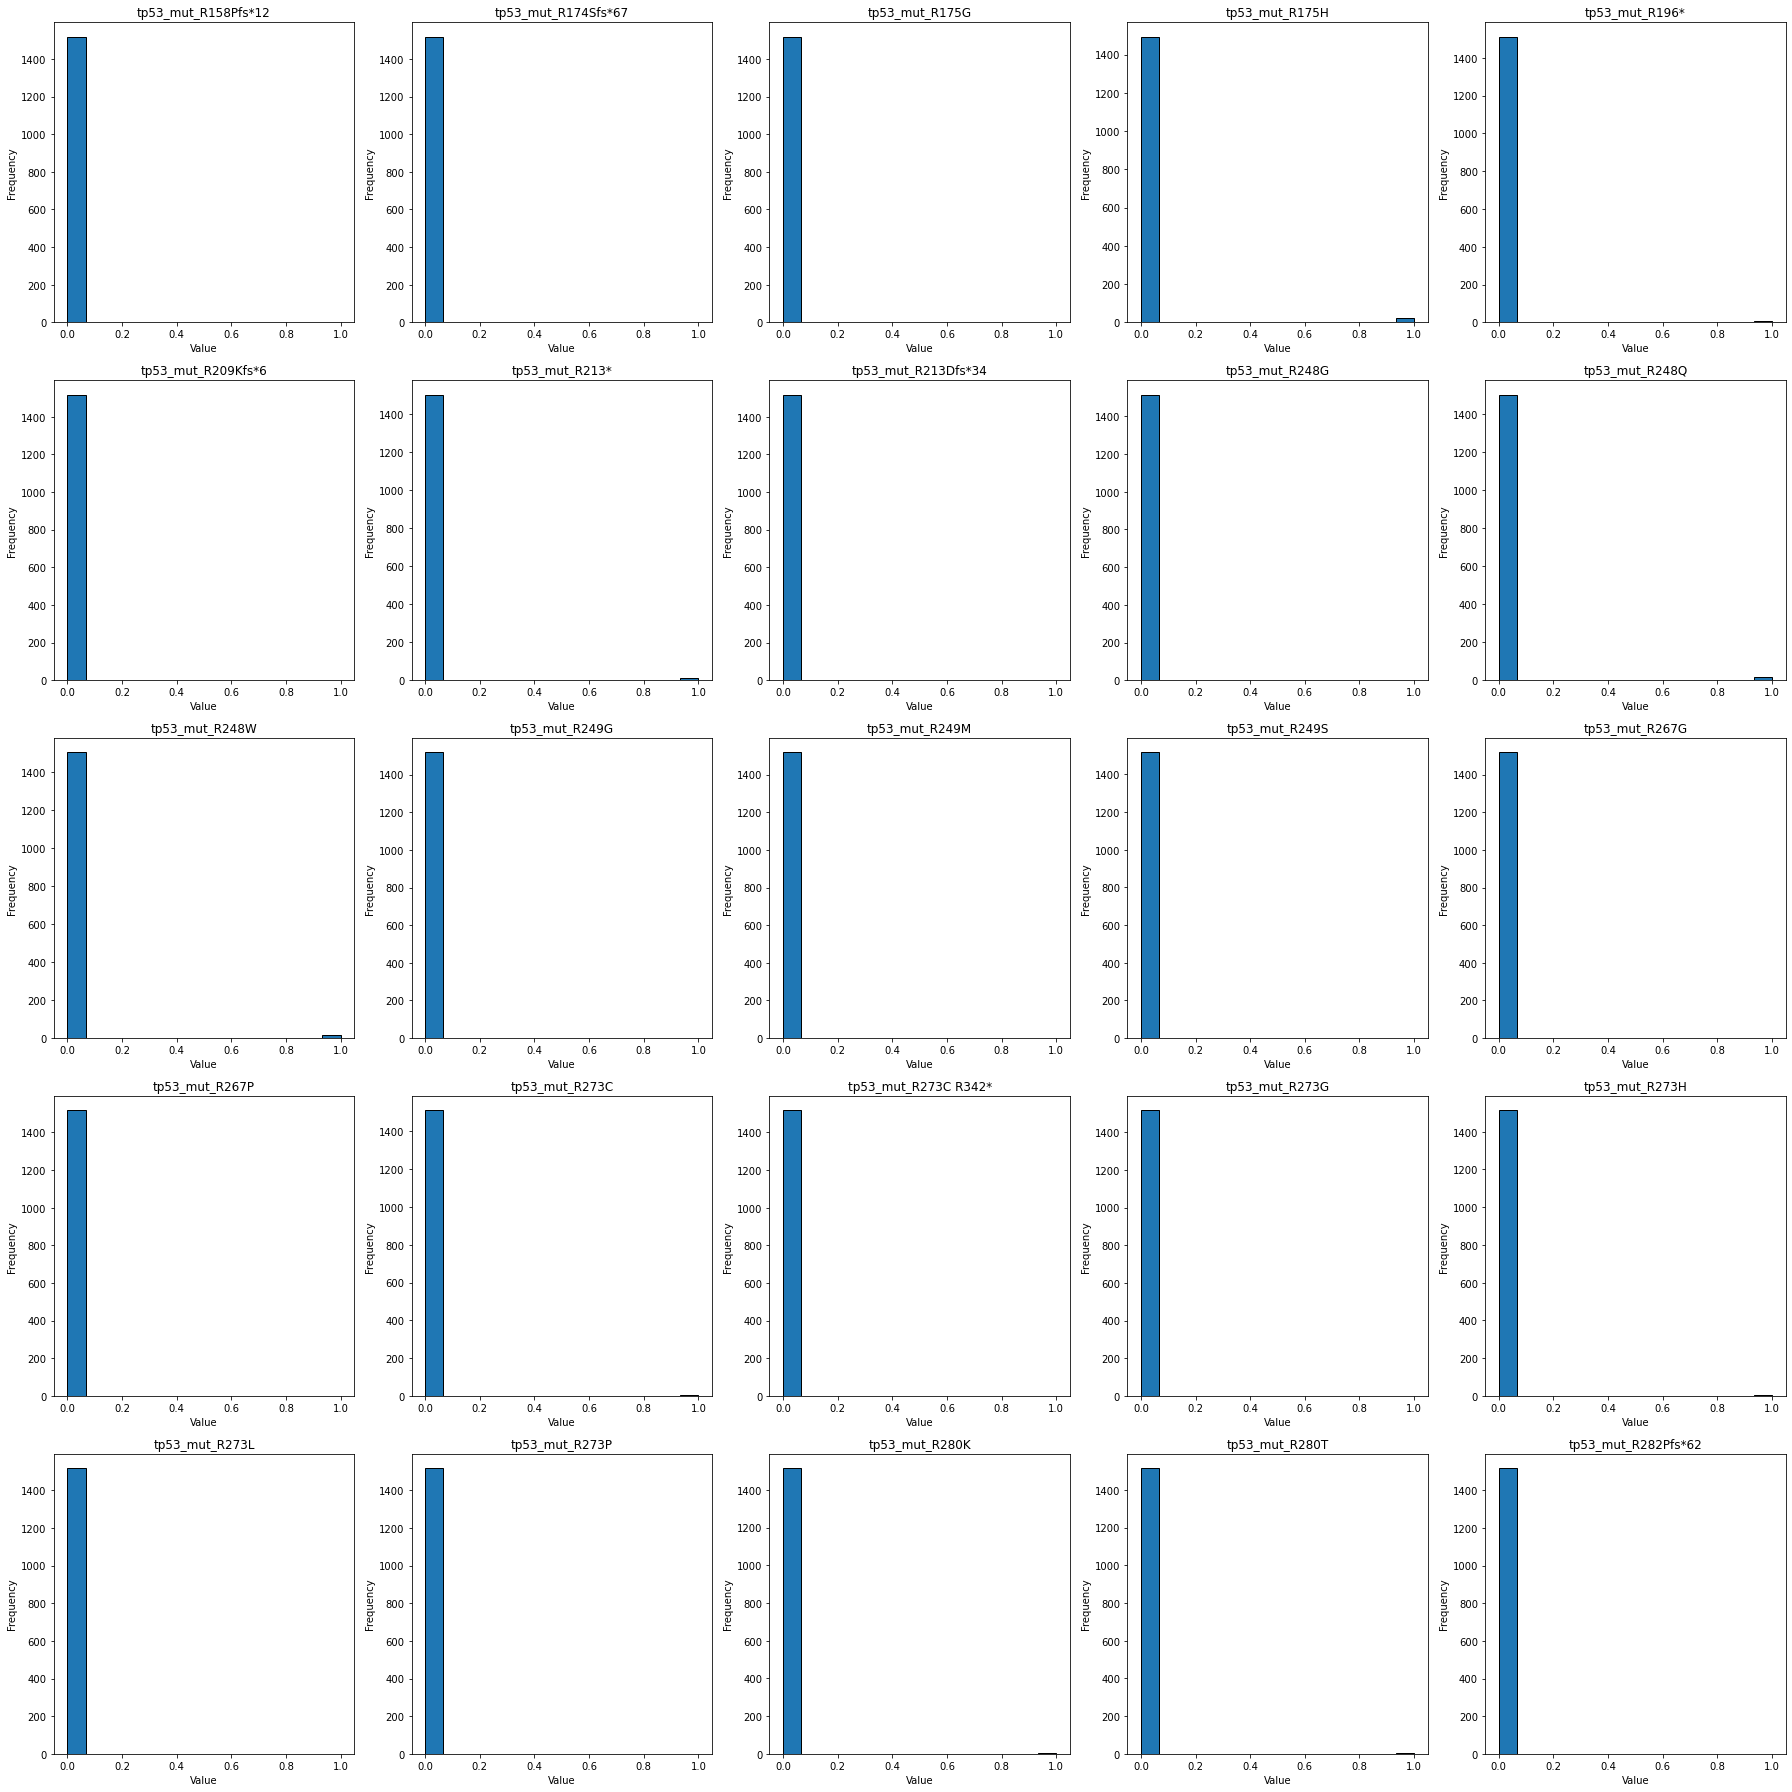

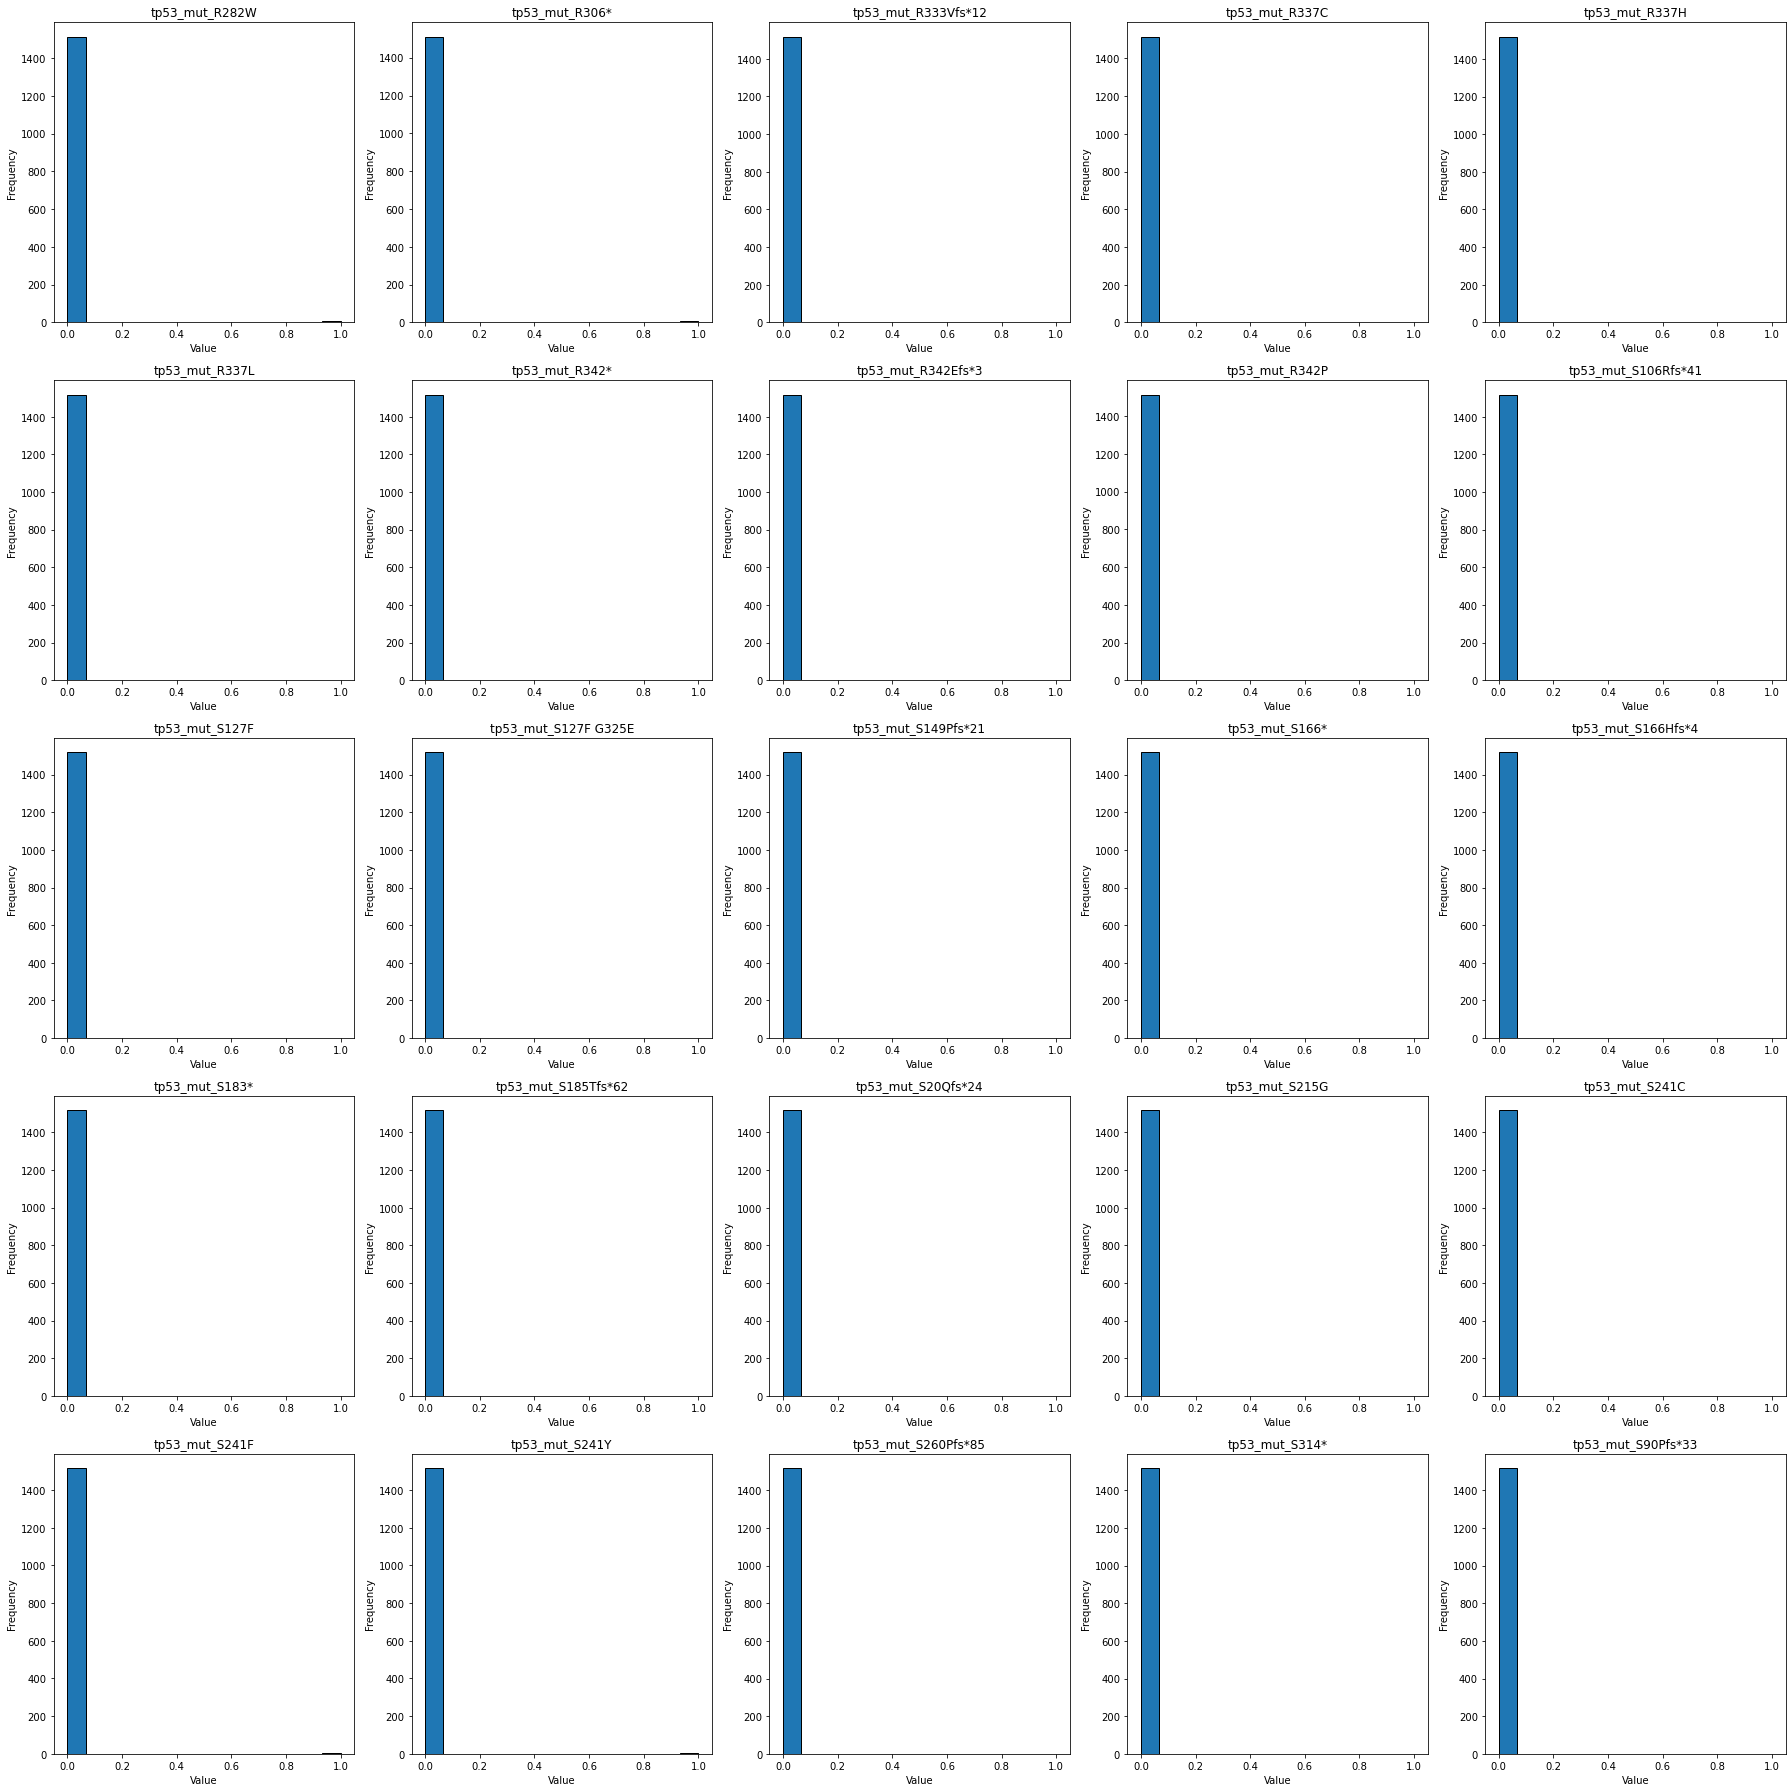

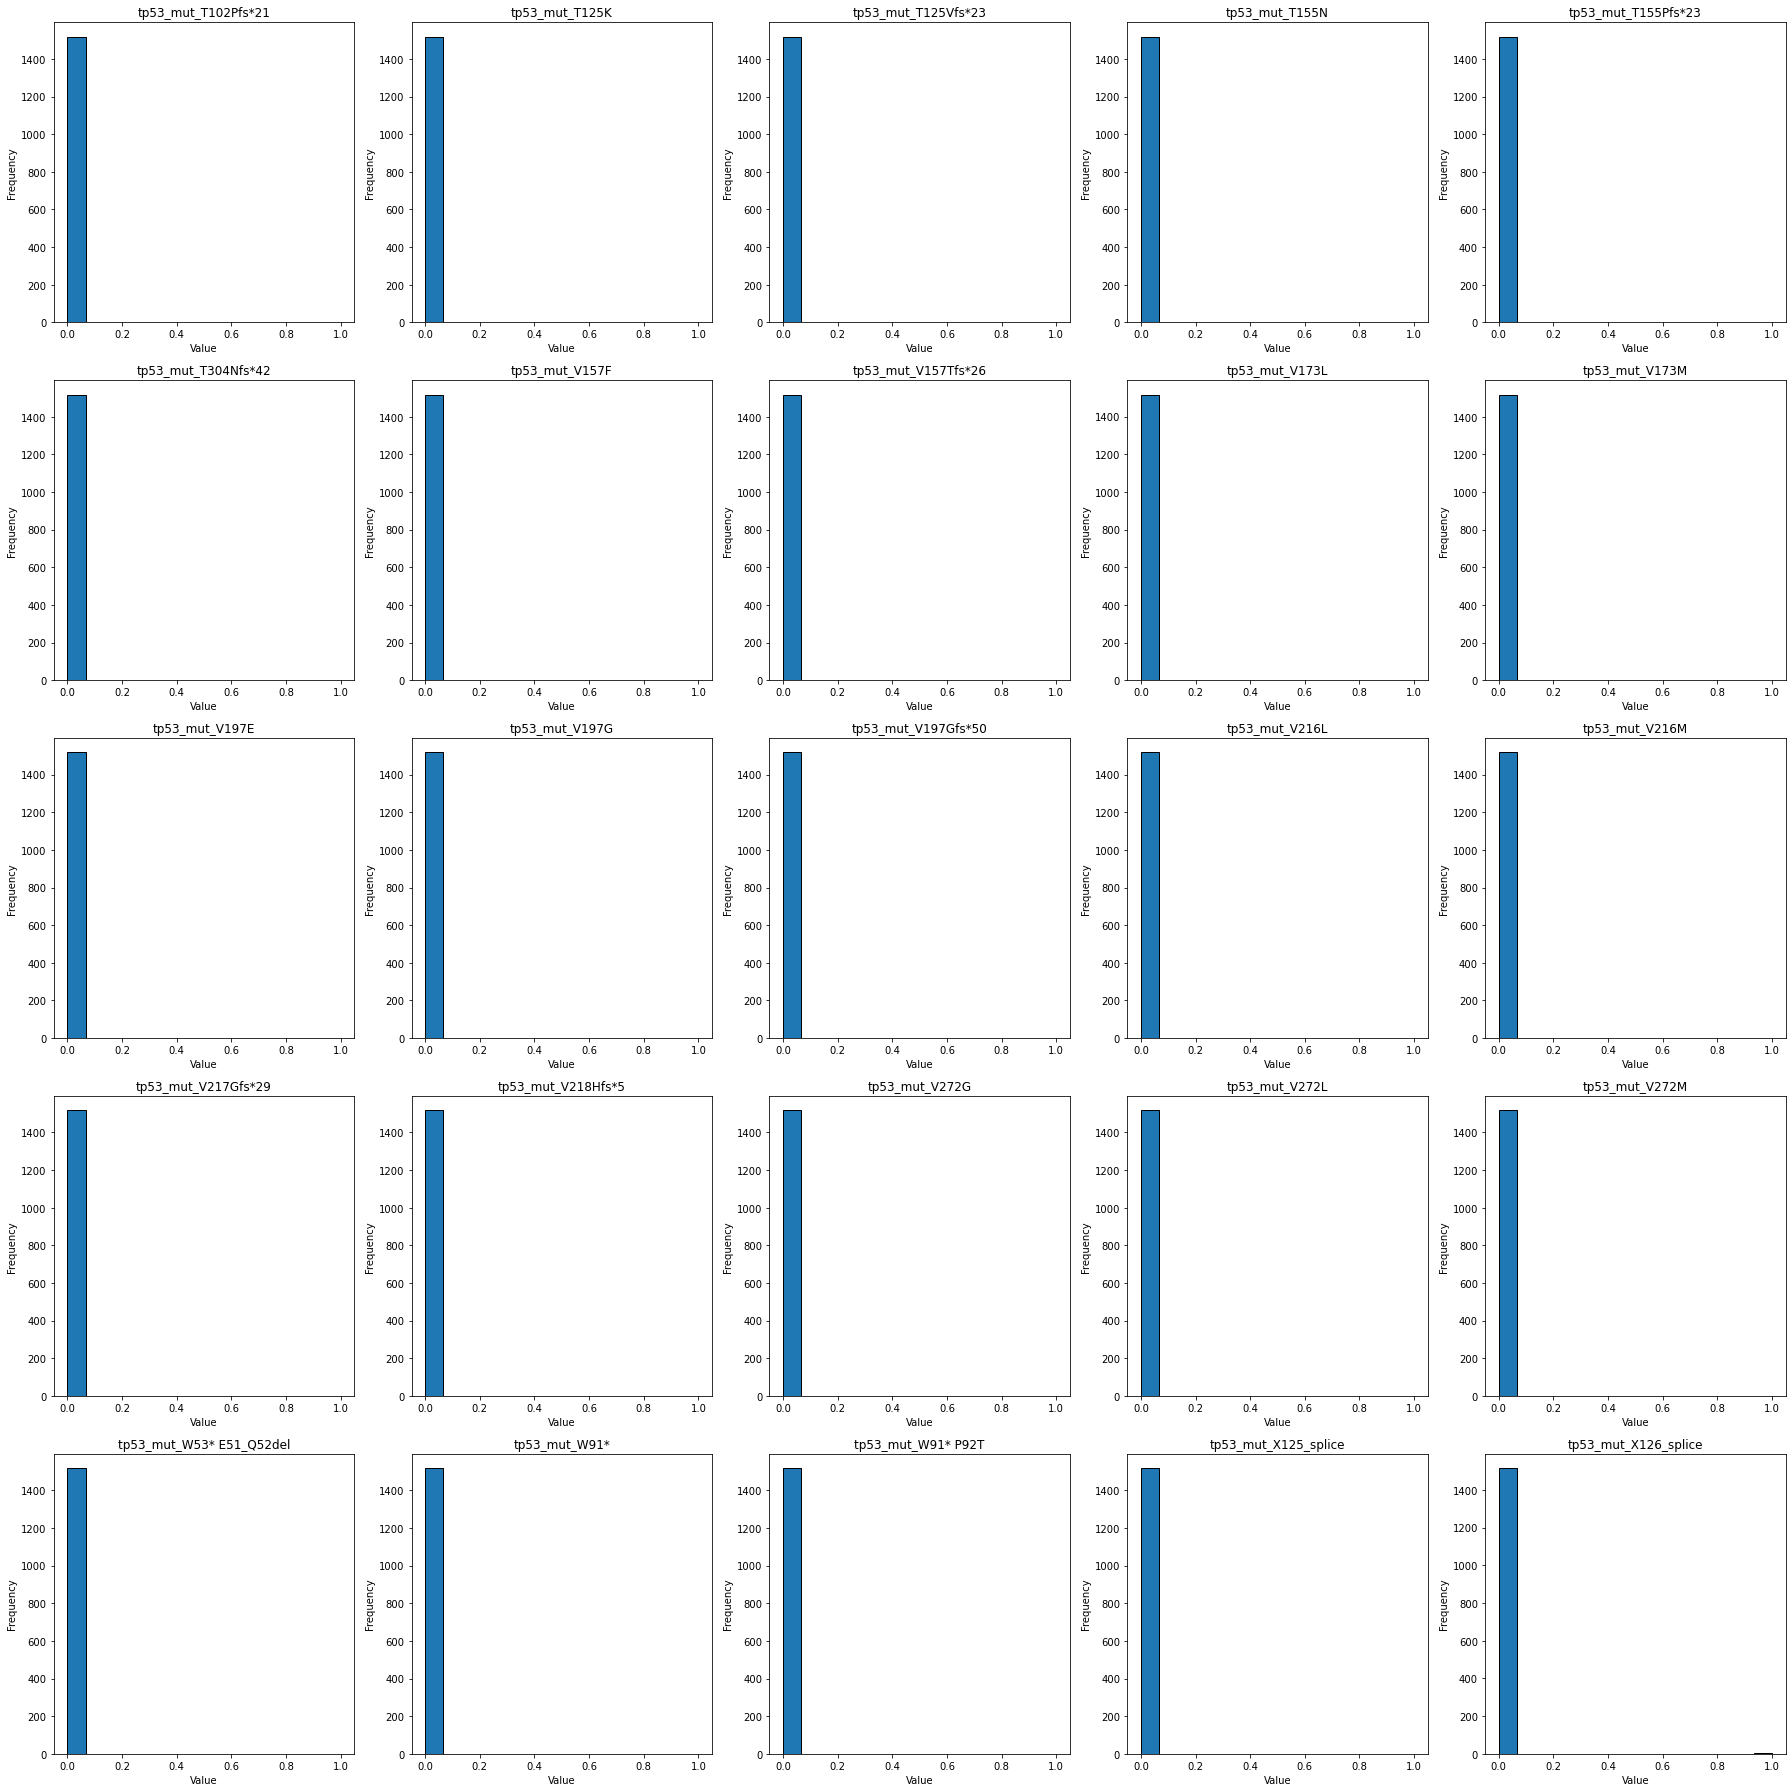

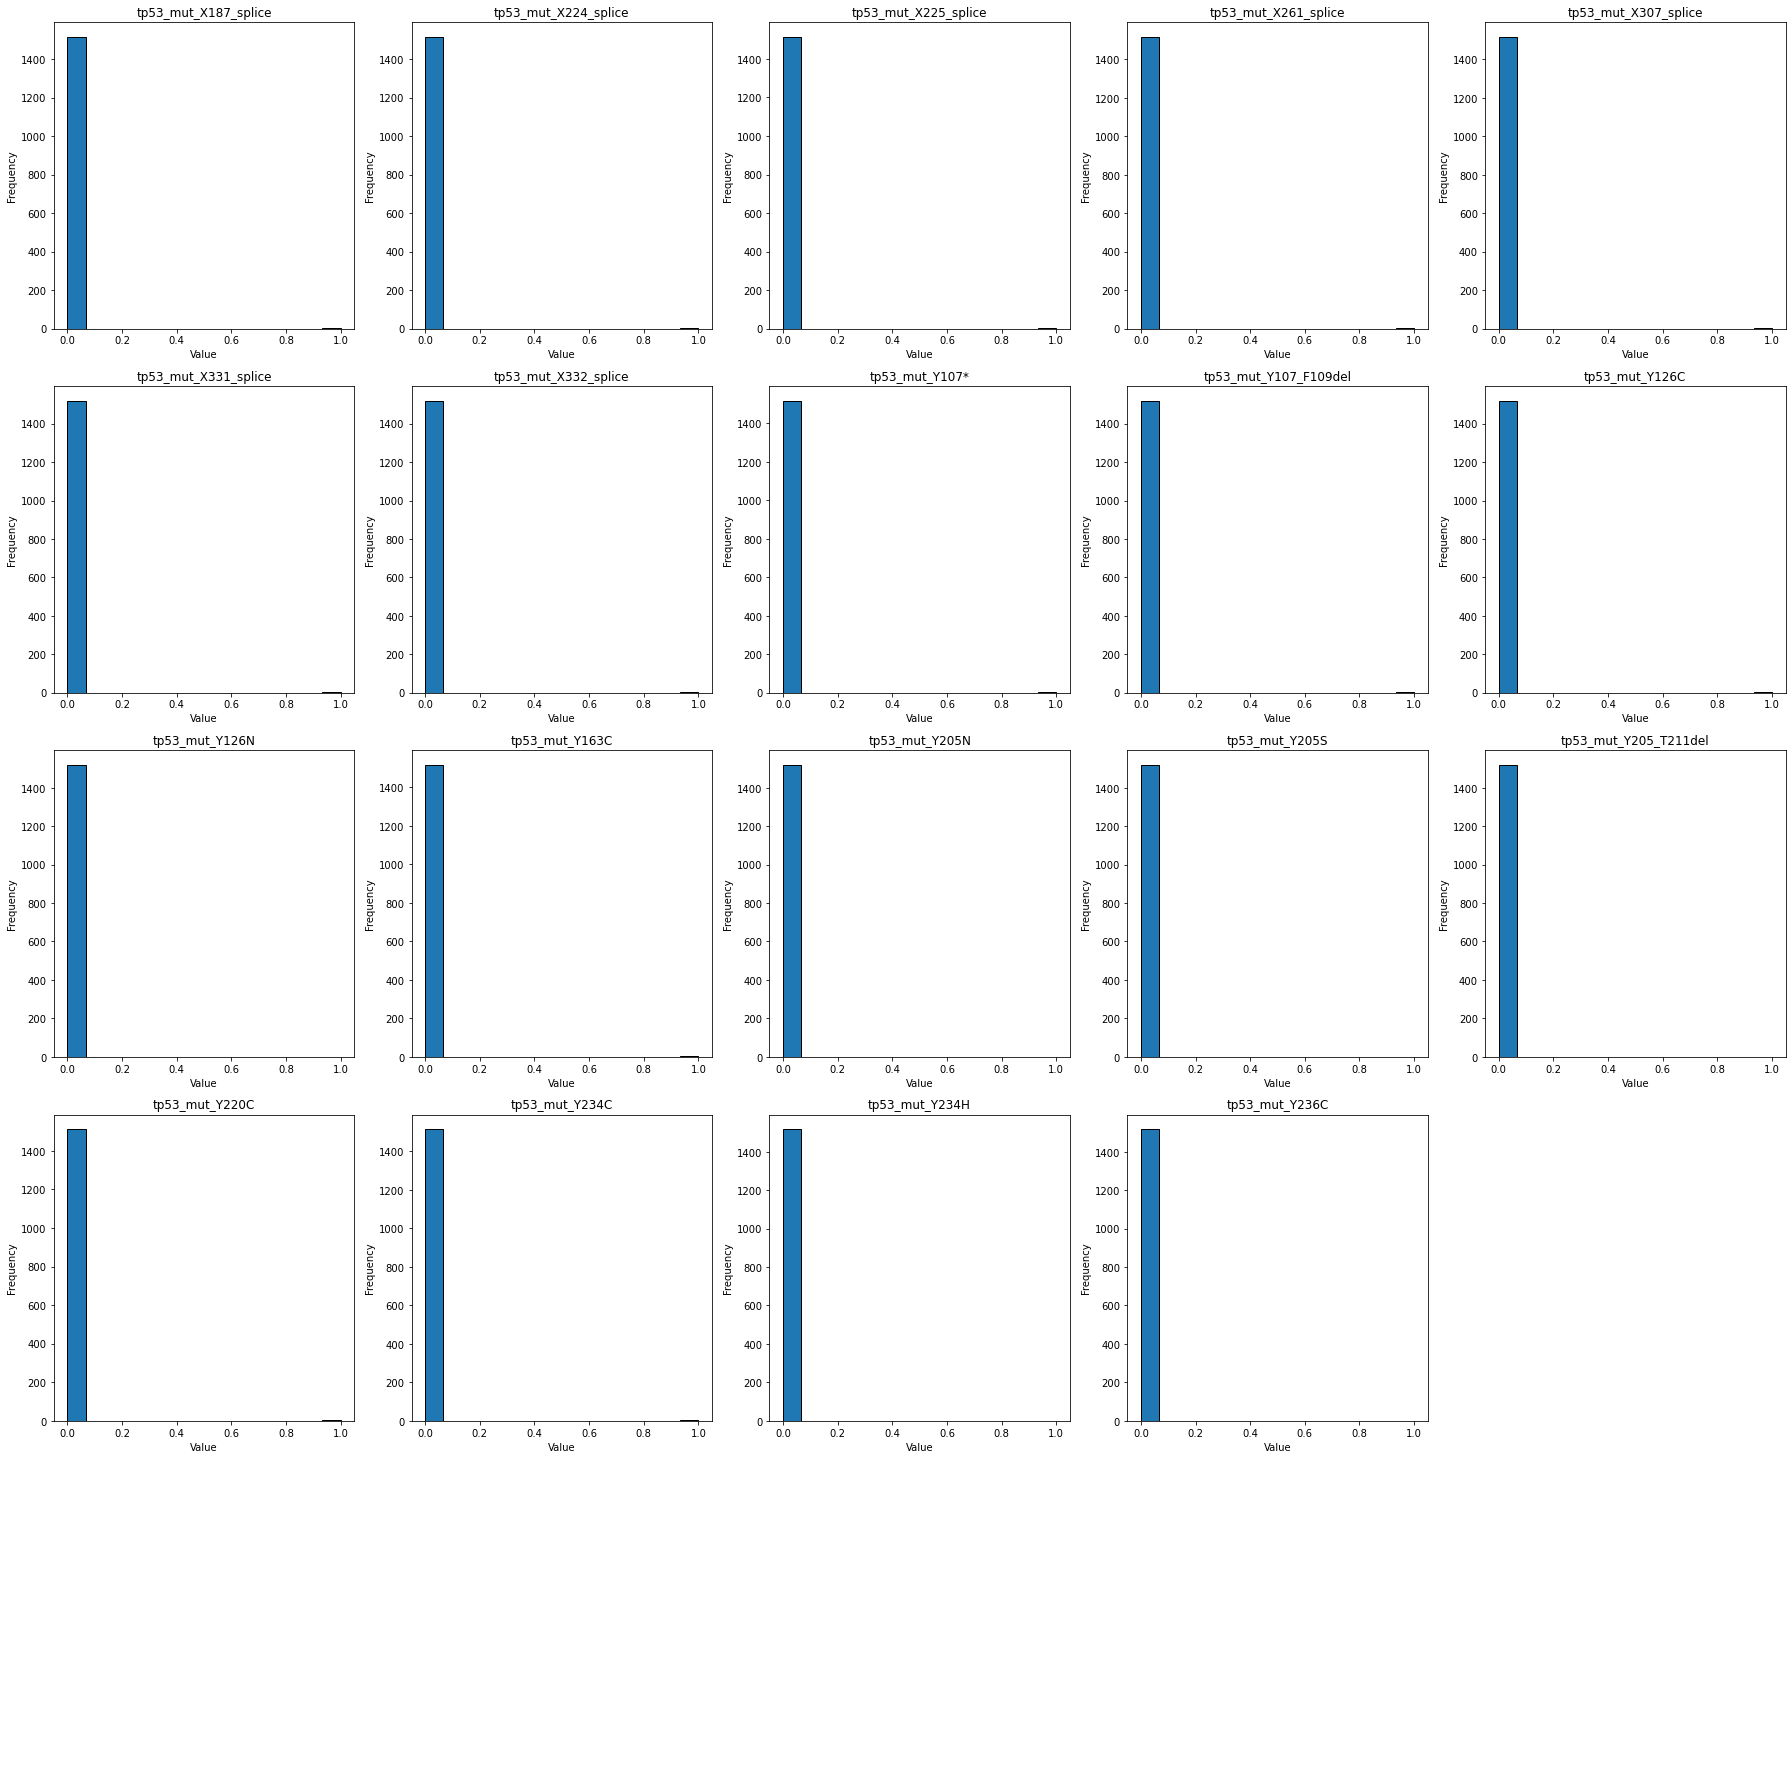

In [8]:
import matplotlib.pyplot as plt

def plot_histograms_in_batches(dataframe, batch_size=16, n_cols = 4):
    n_rows_per_batch = batch_size // n_cols

    # Iterate over the DataFrame in batches
    for i in range(0, len(dataframe.columns), batch_size):
        batch_columns = dataframe.columns[i:i + batch_size]

        # Create a figure for each batch
        fig, axes = plt.subplots(n_rows_per_batch, n_cols, figsize=(5 * n_cols, 5 * n_rows_per_batch))
        axes = axes.flatten()

        for j, col in enumerate(batch_columns):
            if dataframe[col].dtype == 'bool':
                # Convert boolean to integers
                data_to_plot = dataframe[col].astype(int)
            else:
                data_to_plot = dataframe[col]

            # Plot histogram in each subplot
            axes[j].hist(data_to_plot, bins=15, edgecolor='black')
            axes[j].set_title(col)
            axes[j].set_xlabel('Value')
            axes[j].set_ylabel('Frequency')

        # Turn off any unused subplots
        for k in range(j + 1, len(axes)):
            axes[k].axis('off')

        plt.tight_layout()
        plt.show()

# Call the function with your DataFrame
plot_histograms_in_batches(df_encoded, batch_size=25, n_cols=5)


In [9]:
df_encoded.head()
#import matplotlib.pyplot as plt

#for col in df_encoded.columns:
#    plt.figure(figsize=(10, 6))
#    df_encoded[col].hist(bins=50)
#    title_string = f"{col} histogram"
#    plt.title(title_string)
#    plt.show()
    #plt.savefig(f'chart_{col}.png')  # Save each chart as a PNG file
    #plt.close()  # Close the plot to free up memory

patient_id    cohort  neoplasm_histologic_grade  \
0           2 -1.326747                   0.919140   
1           8 -1.326747                   0.919140   
2          10 -1.326747                   0.919140   
3          28 -1.326747                   0.919140   
4          35 -1.326747                  -0.653944   

   lymph_nodes_examined_positive  mutation_count  nottingham_prognostic_index  \
0                      -0.502920       -0.903022                    -0.011659   
1                       1.563865       -0.903022                     1.801793   
2                      -0.502920       -0.418952                     0.025314   
3                      -0.244572       -0.418952                     0.879221   
4                      -0.502920       -0.176917                    -0.860285   

   overall_survival_months  tumor_size  tumor_stage     brca1  ...  \
0                -0.553501   -1.068571    -1.369083 -1.398676  ...   
1                -1.128083    0.891144     0.448875  1.338209  ...   
2                -1.573849    0.303229     4.084792 -0.430241  ...   
3                -1.191827   -0.676628     0.448875  0.868786  ...   
4                -1.195811    0.107258     0.448875 -1.018530  ...   

   tp53_mut_Y126C  tp53_mut_Y126N  tp53_mut_Y163C  tp53_mut_Y205N  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   tp53_mut_Y205S  tp53_mut_Y205_T211del  tp53_mut_Y220C  tp53_mut_Y234C  \
0               0                      0               0               0   
1               0                      0               0               0   
2               0                      0               0               0   
3               0                      0               0               0   
4               0                      0               0               0   

   tp53_mut_Y234H  tp53_mut_Y236C  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 994 columns]

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [11]:
# Applying PCA without reducing dimensionality to get variance ratios for all components
pca = PCA()
pca.fit(X_scaled)

# Cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Number of components
num_components = len(cumulative_variance)


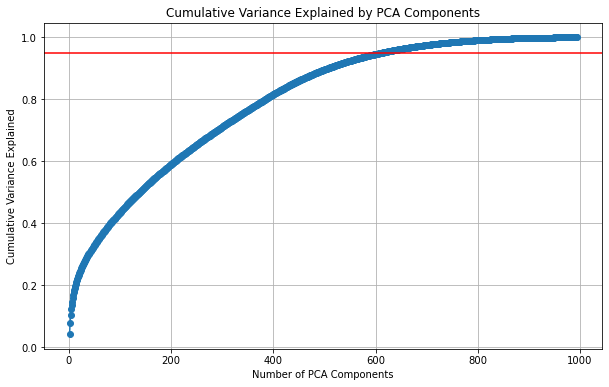

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components + 1), cumulative_variance, marker='o')
plt.title('Cumulative Variance Explained by PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='-') # 95% level
plt.grid(True)
plt.show()


In [13]:
df_encoded.head()

patient_id    cohort  neoplasm_histologic_grade  \
0           2 -1.326747                   0.919140   
1           8 -1.326747                   0.919140   
2          10 -1.326747                   0.919140   
3          28 -1.326747                   0.919140   
4          35 -1.326747                  -0.653944   

   lymph_nodes_examined_positive  mutation_count  nottingham_prognostic_index  \
0                      -0.502920       -0.903022                    -0.011659   
1                       1.563865       -0.903022                     1.801793   
2                      -0.502920       -0.418952                     0.025314   
3                      -0.244572       -0.418952                     0.879221   
4                      -0.502920       -0.176917                    -0.860285   

   overall_survival_months  tumor_size  tumor_stage     brca1  ...  \
0                -0.553501   -1.068571    -1.369083 -1.398676  ...   
1                -1.128083    0.891144     0.448875  1.338209  ...   
2                -1.573849    0.303229     4.084792 -0.430241  ...   
3                -1.191827   -0.676628     0.448875  0.868786  ...   
4                -1.195811    0.107258     0.448875 -1.018530  ...   

   tp53_mut_Y126C  tp53_mut_Y126N  tp53_mut_Y163C  tp53_mut_Y205N  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   tp53_mut_Y205S  tp53_mut_Y205_T211del  tp53_mut_Y220C  tp53_mut_Y234C  \
0               0                      0               0               0   
1               0                      0               0               0   
2               0                      0               0               0   
3               0                      0               0               0   
4               0                      0               0               0   

   tp53_mut_Y234H  tp53_mut_Y236C  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0  

[5 rows x 994 columns]

In [14]:
df_encoded.shape

(1519, 994)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f76b53be160>
Traceback (most recent call last):
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    def threadpool_info():
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    This effect is global and impacts the whole Python process. There is no thread level
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    return super().wrap(ThreadpoolController(), limits=limits, user_api=user_api)
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iter

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f76b53be160>
Traceback (most recent call last):
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    def threadpool_info():
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    This effect is global and impacts the whole Python process. There is no thread level
  File "/home/damian/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    return super().wrap(ThreadpoolController(), limits=limits, user_api=user_api)
AttributeError: 'NoneType' object has no attribute 'split'


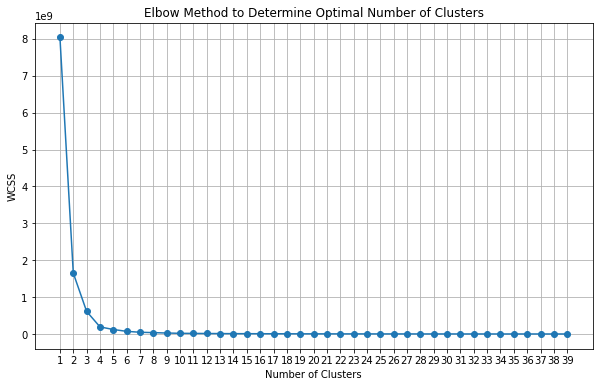

In [31]:
from sklearn.cluster import KMeans

# Using the Elbow Method to find the optimal number of clusters
# We will calculate the Within-Cluster Sum of Squares (WCSS) for a range of cluster numbers
wcss = []
for i in range(1, 40):  # Testing for 1 to 29 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_encoded)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to observe the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 40))
plt.grid(True)
plt.show()

In [17]:
# from the elbow chart above - 4 is the optimal number of clusters
n_clusters = 4

In [18]:
# assign df elements to clusters

# Create a KMeans instance with n_clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=123)

# Fit the model
kmeans.fit(df_encoded)

# Assign clusters to each row in the DataFrame
df_encoded['kmeans - cluster'] = kmeans.labels_

# Group by the cluster assignment and count the number of elements in each cluster
cluster_counts = df_encoded.groupby('kmeans - cluster').size()

# Print the cluster counts
print(cluster_counts)

kmeans - cluster
0    256
1    595
2    382
3    286
dtype: int64


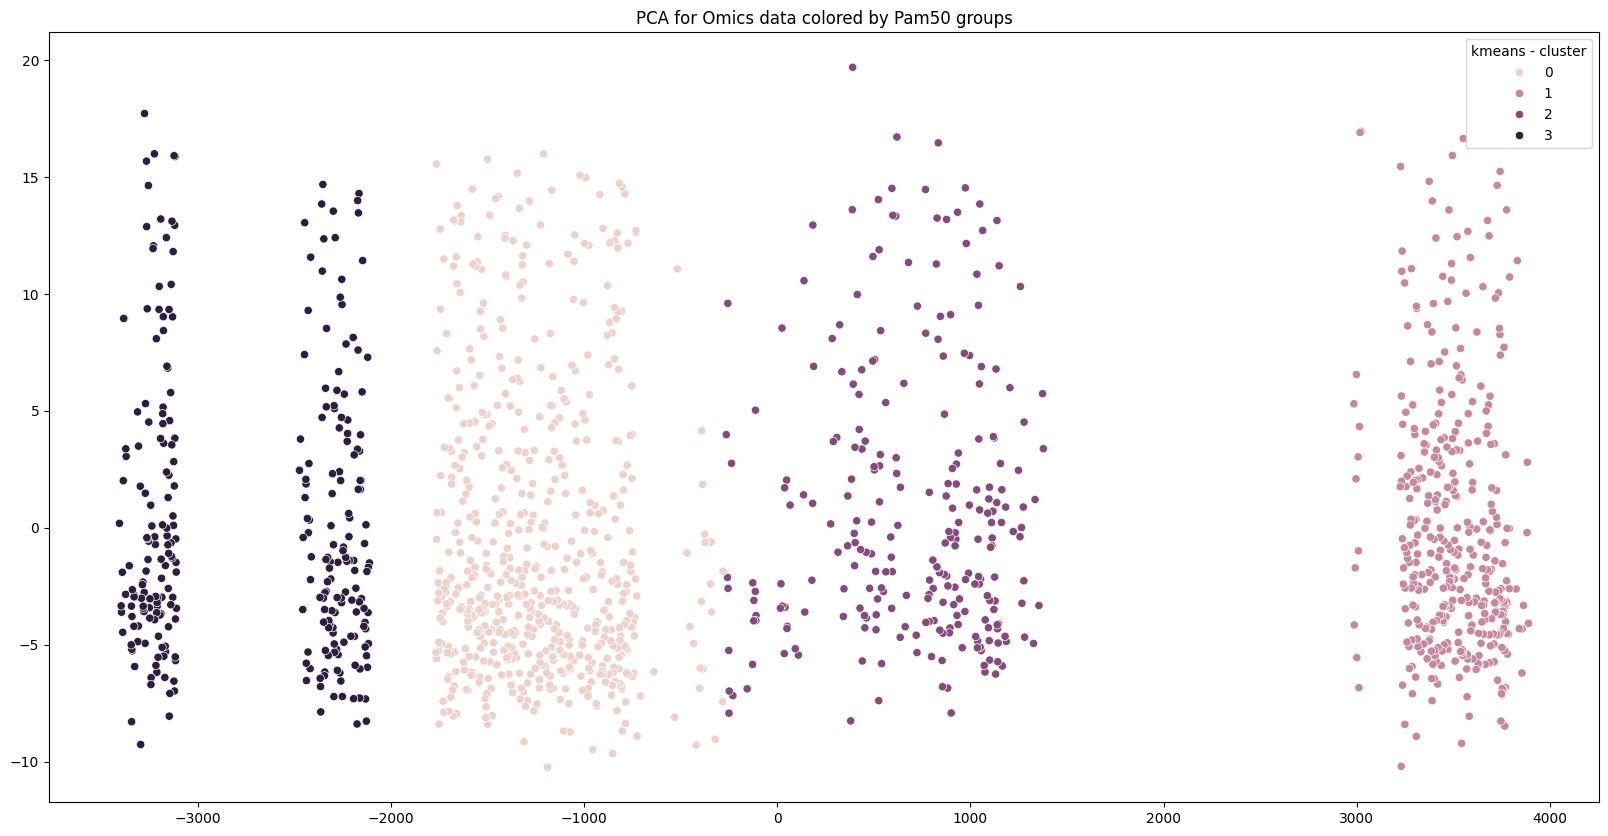

In [42]:
f = 'kmeans - cluster' #   cluster number
vec4color = df_encoded[f]
X = df_encoded.values.copy()

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA
res = pca().fit_transform(X = X )
plt.figure(figsize = (20,10))
sns.scatterplot( x=res[:,0], y=res[:,1], hue = vec4color )
plt.title('PCA for Omics data colored by Pam50 groups')
plt.show()

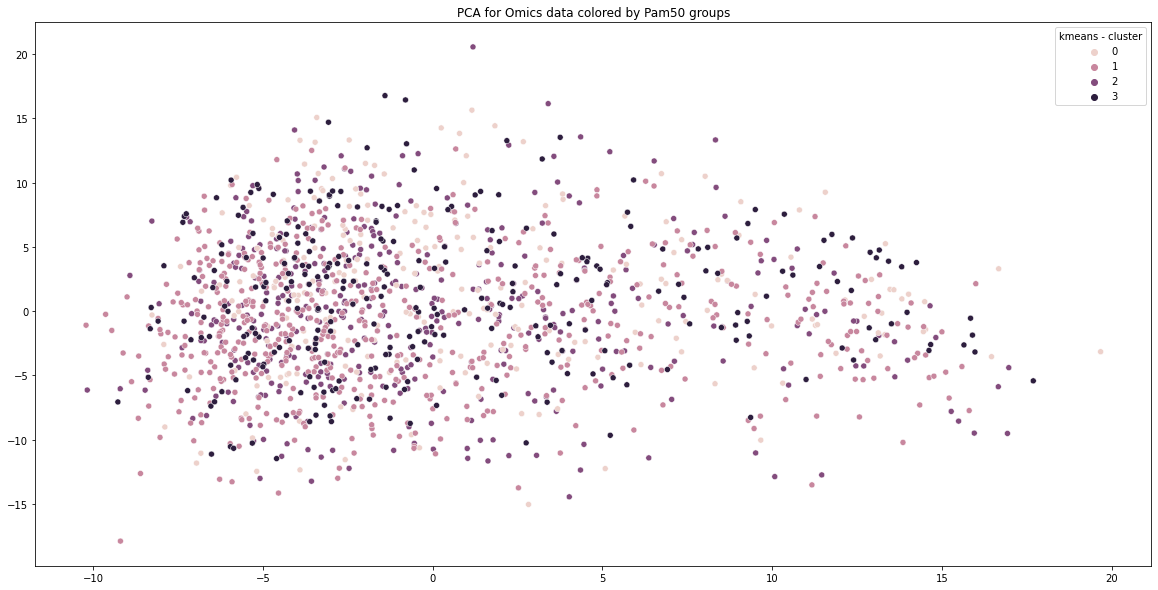

In [19]:
f = 'kmeans - cluster' #   cluster number
vec4color = df_encoded[f]
X = df_encoded.values.copy()

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA
res = pca().fit_transform(X = X )
plt.figure(figsize = (20,10))
sns.scatterplot( x=res[:,1], y=res[:,2], hue = vec4color )
plt.title('PCA for Omics data colored by Pam50 groups')
plt.show()

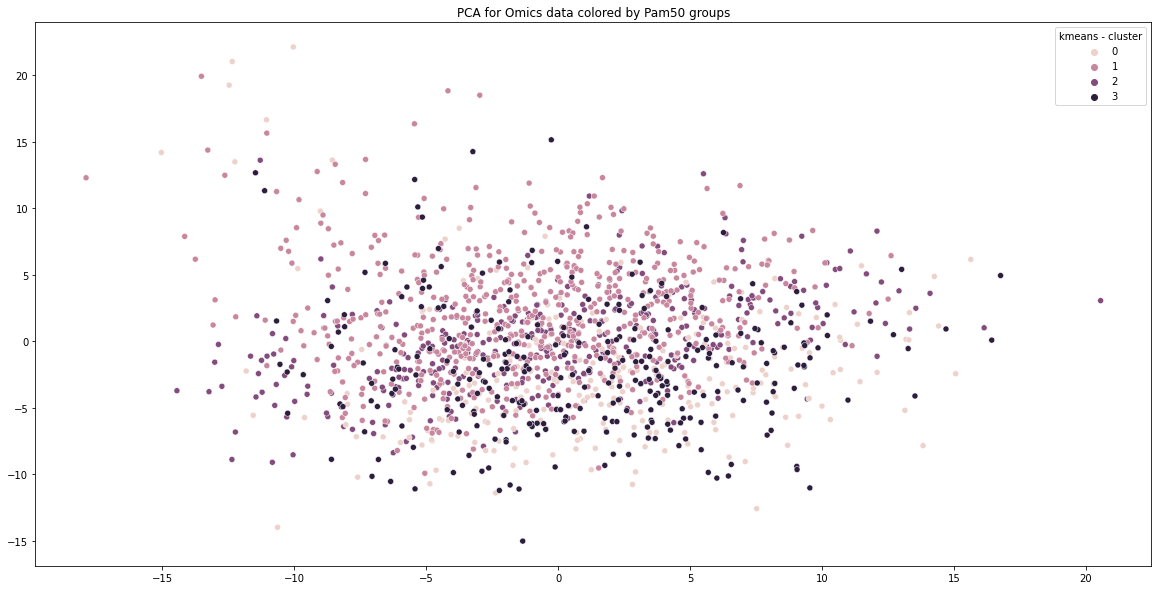

In [20]:
f = 'kmeans - cluster' #   cluster number
vec4color = df_encoded[f]
X = df_encoded.values.copy()

from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
pca = PCA
res = pca().fit_transform(X = X )
plt.figure(figsize = (20,10))
sns.scatterplot( x=res[:,2], y=res[:,3], hue = vec4color )
plt.title('PCA for Omics data colored by Pam50 groups')
plt.show()

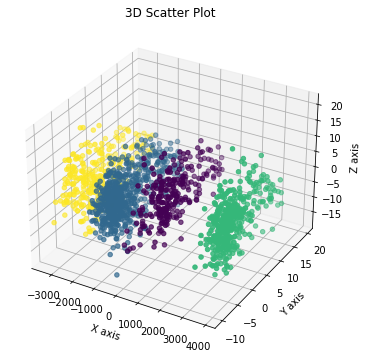

In [21]:
from mpl_toolkits.mplot3d import Axes3D

f = 'kmeans - cluster' #   cluster number
vec4color = df_encoded[f]
X = df_encoded.values.copy()

pca = PCA
res = pca().fit_transform(X = X )

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(res[:,0], res[:,1], res[:,2], c = vec4color, marker='o')

# Labeling axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Title
ax.set_title('3D Scatter Plot')

plt.show()


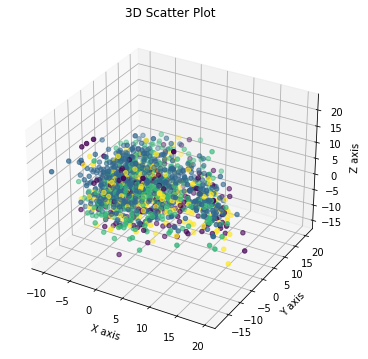

In [22]:
from mpl_toolkits.mplot3d import Axes3D

f = 'kmeans - cluster' #   cluster number
vec4color = df_encoded[f]
X = df_encoded.values.copy()

pca = PCA
res = pca().fit_transform(X = X )

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(res[:,1], res[:,2], res[:,3], c = vec4color, marker='o')

# Labeling axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Title
ax.set_title('3D Scatter Plot')

plt.show()


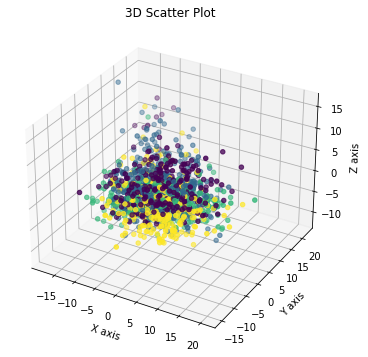

In [23]:
from mpl_toolkits.mplot3d import Axes3D

f = 'kmeans - cluster' #   cluster number
vec4color = df_encoded[f]
X = df_encoded.values.copy()

pca = PCA
res = pca().fit_transform(X = X )

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(res[:,2], res[:,3], res[:,4], c = vec4color, marker='o')

# Labeling axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Title
ax.set_title('3D Scatter Plot')

plt.show()


In [24]:
# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

In [25]:
def plot_lower_triangle_correlation_matrix(corr_matrix, threshold):
    # Apply threshold
    filtered_matrix = corr_matrix.abs() > threshold
    correlation_matrix_filtered = corr_matrix.where(filtered_matrix)

    # Drop empty rows and columns
    np.fill_diagonal(correlation_matrix_filtered.values, np.nan)
    correlation_matrix_cleaned = correlation_matrix_filtered.dropna(how='all', axis=0).dropna(how='all', axis=1)
    # Create a mask for the upper triangle and diagonal
    mask = np.triu(np.ones_like(correlation_matrix_cleaned, dtype=bool))

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Draw the heatmap with the mask
    sns.heatmap(correlation_matrix_cleaned, mask=mask, fmt=".2f", cmap='coolwarm')
    # Set title
    plt.title(f'Filtered Correlation Matrix (Threshold: {threshold})')

    plt.show()

    # Print correlation matrix
    print(correlation_matrix_cleaned)

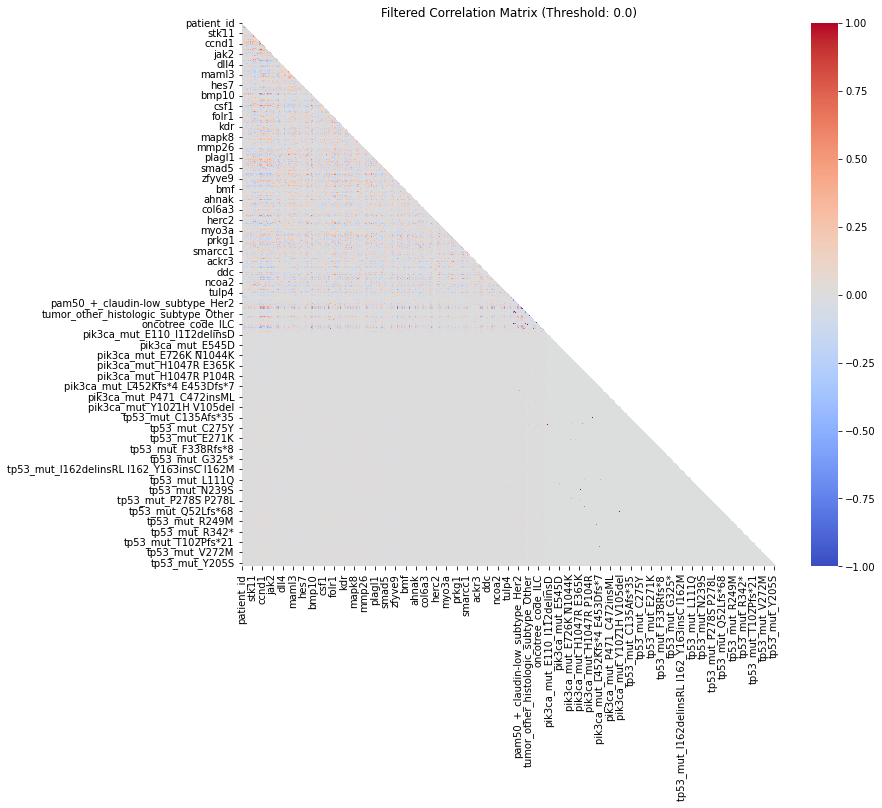

                               patient_id    cohort  \
patient_id                            NaN  0.927639   
cohort                           0.927639       NaN   
neoplasm_histologic_grade       -0.034137 -0.073574   
lymph_nodes_examined_positive   -0.109614 -0.071821   
mutation_count                   0.256157  0.231814   
...                                   ...       ...   
tp53_mut_Y220C                  -0.000142  0.002121   
tp53_mut_Y234C                   0.016883  0.025705   
tp53_mut_Y234H                  -0.039249 -0.034053   
tp53_mut_Y236C                  -0.037006 -0.034053   
kmeans - cluster                 0.118345  0.329527   

                               neoplasm_histologic_grade  \
patient_id                                     -0.034137   
cohort                                         -0.073574   
neoplasm_histologic_grade                            NaN   
lymph_nodes_examined_positive                   0.151635   
mutation_count                         

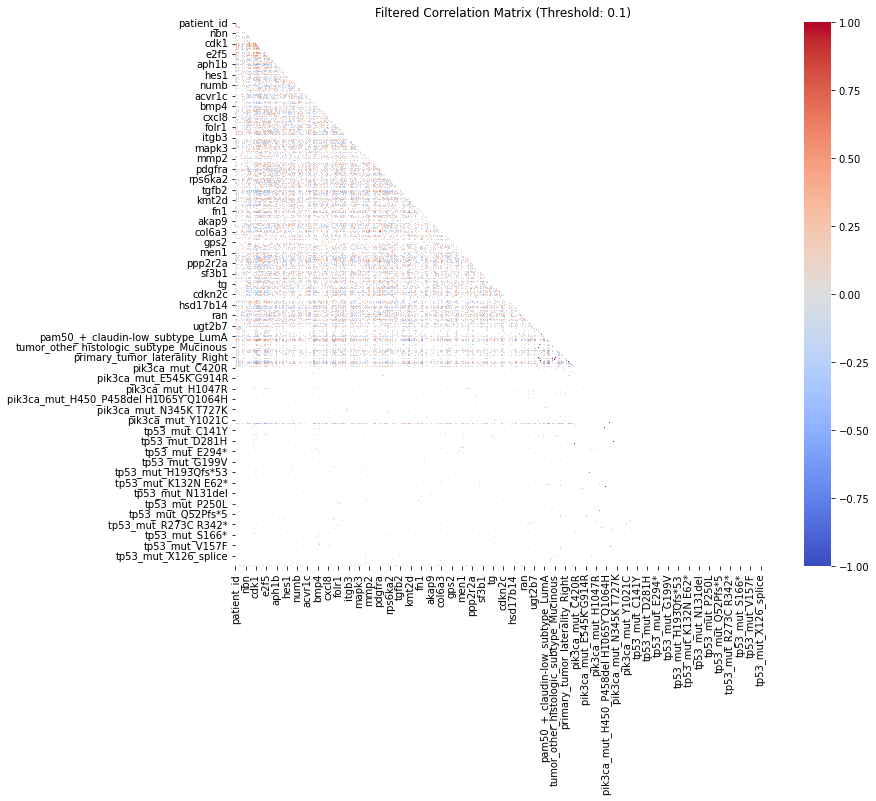

                               patient_id    cohort  \
patient_id                            NaN  0.927639   
cohort                           0.927639       NaN   
neoplasm_histologic_grade             NaN       NaN   
lymph_nodes_examined_positive   -0.109614       NaN   
mutation_count                   0.256157  0.231814   
...                                   ...       ...   
tp53_mut_Y205_T211del                 NaN       NaN   
tp53_mut_Y220C                        NaN       NaN   
tp53_mut_Y234H                        NaN       NaN   
tp53_mut_Y236C                        NaN       NaN   
kmeans - cluster                 0.118345  0.329527   

                               neoplasm_histologic_grade  \
patient_id                                           NaN   
cohort                                               NaN   
neoplasm_histologic_grade                            NaN   
lymph_nodes_examined_positive                   0.151635   
mutation_count                         

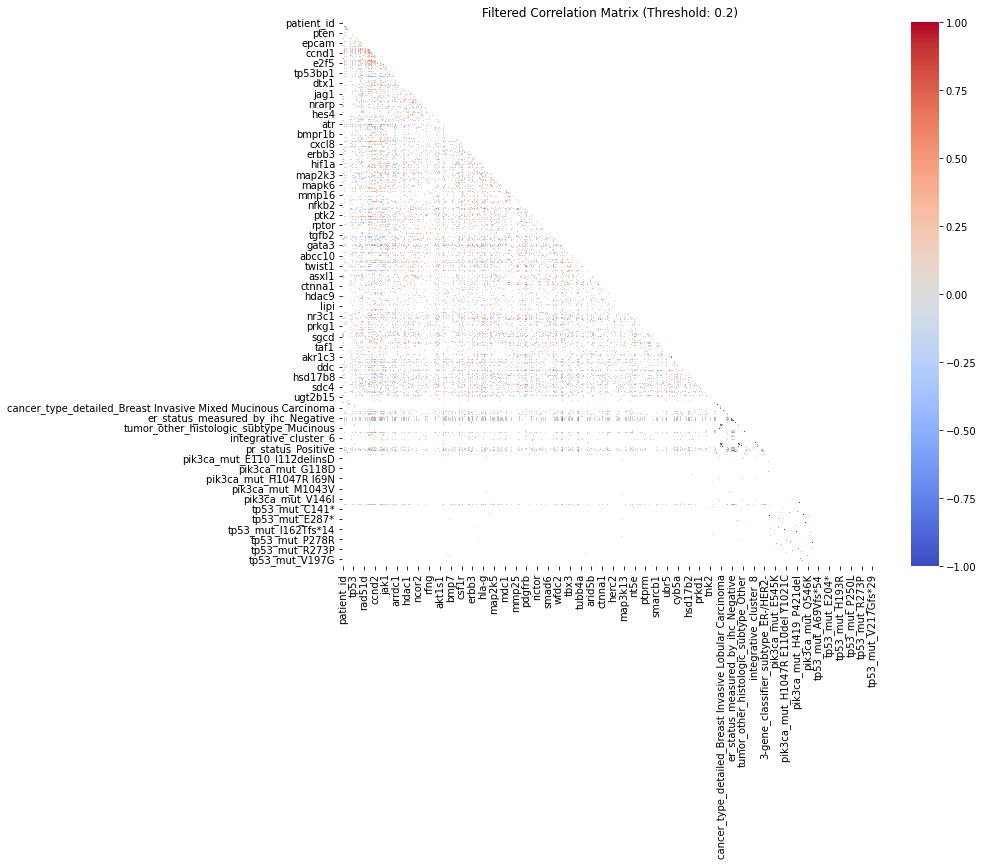

                               patient_id    cohort  \
patient_id                            NaN  0.927639   
cohort                           0.927639       NaN   
neoplasm_histologic_grade             NaN       NaN   
lymph_nodes_examined_positive         NaN       NaN   
mutation_count                   0.256157  0.231814   
...                                   ...       ...   
tp53_mut_X126_splice                  NaN       NaN   
tp53_mut_X261_splice                  NaN       NaN   
tp53_mut_X307_splice                  NaN       NaN   
tp53_mut_X332_splice                  NaN       NaN   
kmeans - cluster                      NaN  0.329527   

                               neoplasm_histologic_grade  \
patient_id                                           NaN   
cohort                                               NaN   
neoplasm_histologic_grade                            NaN   
lymph_nodes_examined_positive                        NaN   
mutation_count                         

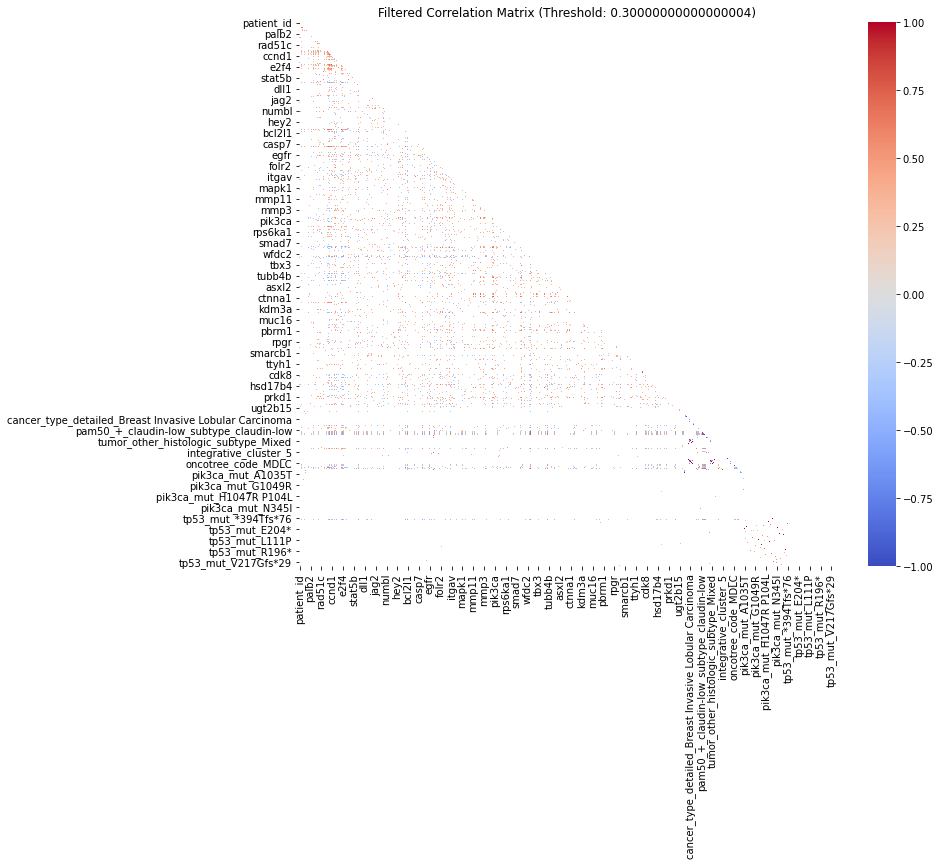

                               patient_id    cohort  \
patient_id                            NaN  0.927639   
cohort                           0.927639       NaN   
neoplasm_histologic_grade             NaN       NaN   
lymph_nodes_examined_positive         NaN       NaN   
mutation_count                        NaN       NaN   
...                                   ...       ...   
tp53_mut_V173L                        NaN       NaN   
tp53_mut_V217Gfs*29                   NaN       NaN   
tp53_mut_X261_splice                  NaN       NaN   
tp53_mut_X307_splice                  NaN       NaN   
kmeans - cluster                      NaN  0.329527   

                               neoplasm_histologic_grade  \
patient_id                                           NaN   
cohort                                               NaN   
neoplasm_histologic_grade                            NaN   
lymph_nodes_examined_positive                        NaN   
mutation_count                         

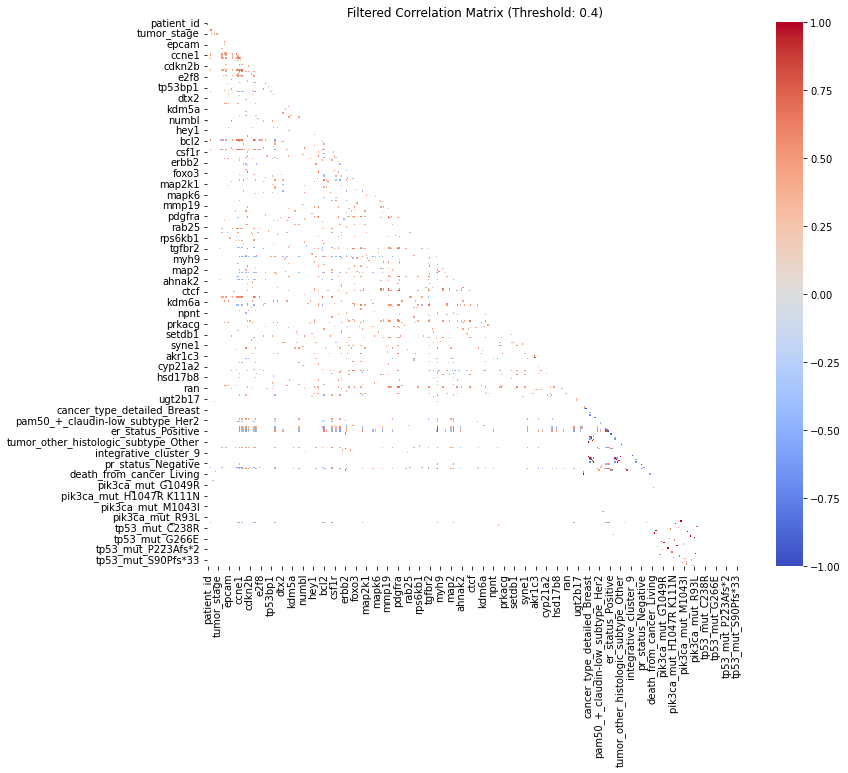

                               patient_id    cohort  \
patient_id                            NaN  0.927639   
cohort                           0.927639       NaN   
neoplasm_histologic_grade             NaN       NaN   
lymph_nodes_examined_positive         NaN       NaN   
mutation_count                        NaN       NaN   
...                                   ...       ...   
tp53_mut_S90Pfs*33                    NaN       NaN   
tp53_mut_T155Pfs*23                   NaN       NaN   
tp53_mut_V173L                        NaN       NaN   
tp53_mut_V217Gfs*29                   NaN       NaN   
tp53_mut_X307_splice                  NaN       NaN   

                               neoplasm_histologic_grade  \
patient_id                                           NaN   
cohort                                               NaN   
neoplasm_histologic_grade                            NaN   
lymph_nodes_examined_positive                        NaN   
mutation_count                         

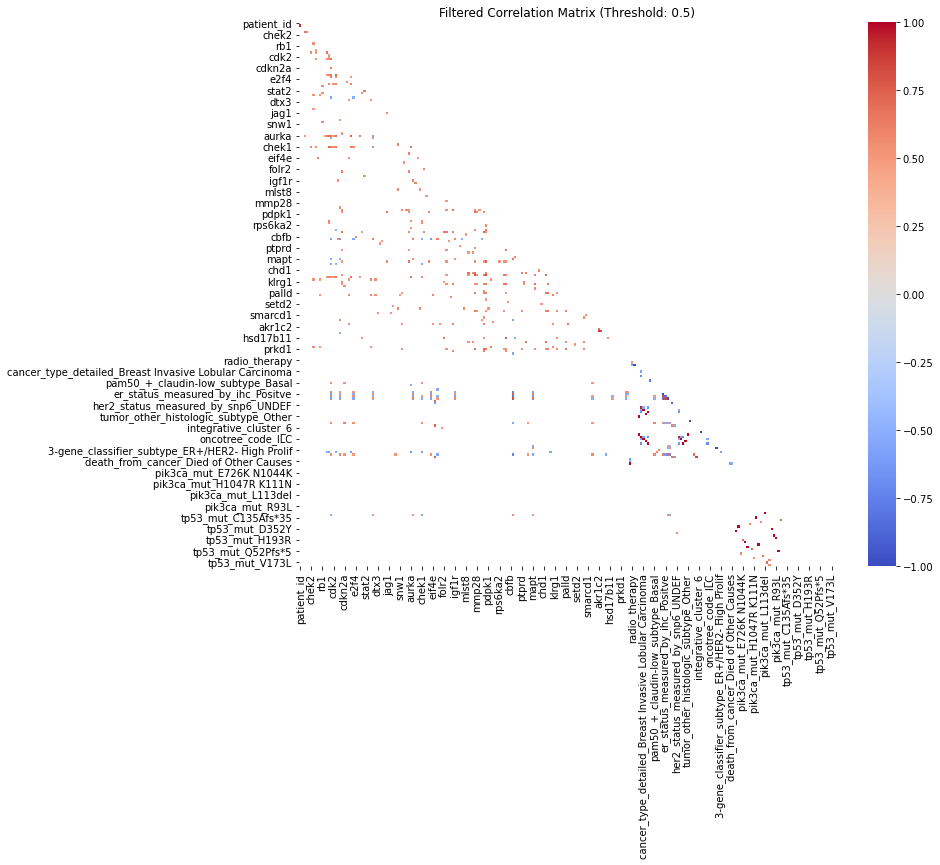

                               patient_id    cohort  \
patient_id                            NaN  0.927639   
cohort                           0.927639       NaN   
neoplasm_histologic_grade             NaN       NaN   
lymph_nodes_examined_positive         NaN       NaN   
nottingham_prognostic_index           NaN       NaN   
...                                   ...       ...   
tp53_mut_R273G                        NaN       NaN   
tp53_mut_R280K                        NaN       NaN   
tp53_mut_T155Pfs*23                   NaN       NaN   
tp53_mut_V173L                        NaN       NaN   
tp53_mut_V217Gfs*29                   NaN       NaN   

                               neoplasm_histologic_grade  \
patient_id                                           NaN   
cohort                                               NaN   
neoplasm_histologic_grade                            NaN   
lymph_nodes_examined_positive                        NaN   
nottingham_prognostic_index            

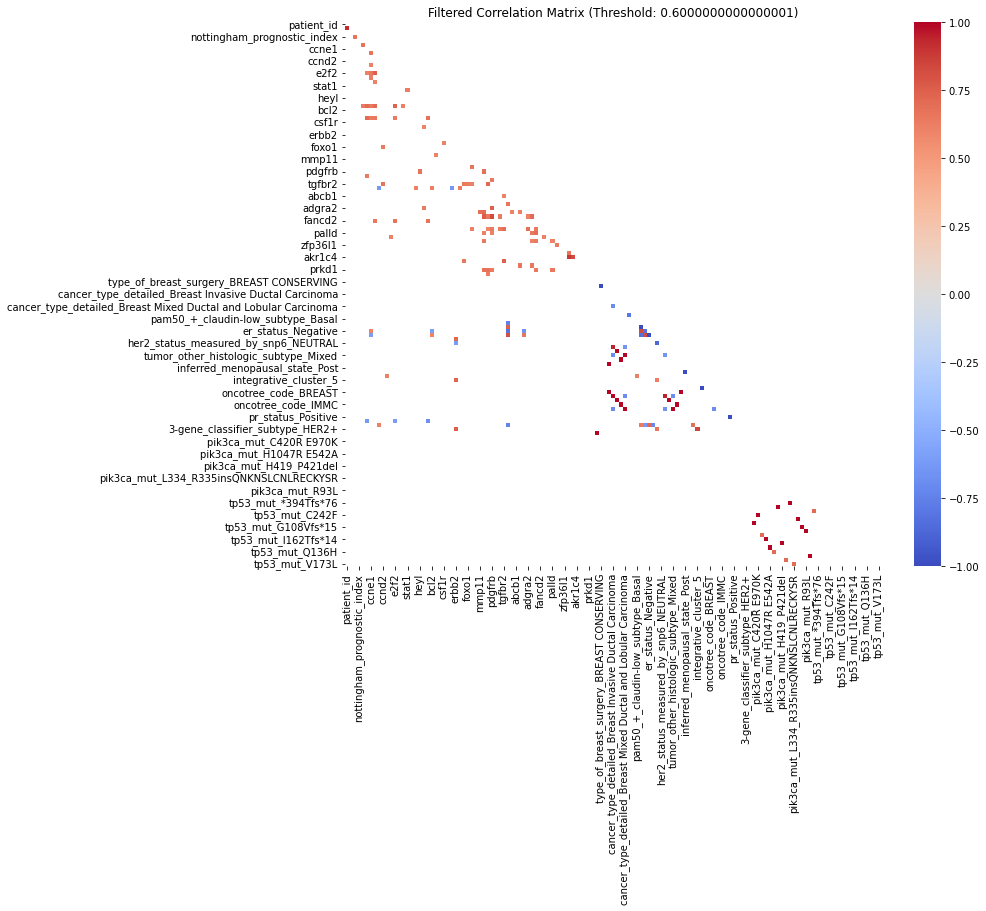

                             patient_id    cohort  neoplasm_histologic_grade  \
patient_id                          NaN  0.927639                        NaN   
cohort                         0.927639       NaN                        NaN   
neoplasm_histologic_grade           NaN       NaN                        NaN   
nottingham_prognostic_index         NaN       NaN                   0.668602   
ccnb1                               NaN       NaN                        NaN   
...                                 ...       ...                        ...   
tp53_mut_N239I                      NaN       NaN                        NaN   
tp53_mut_Q136H                      NaN       NaN                        NaN   
tp53_mut_Q52Pfs*5                   NaN       NaN                        NaN   
tp53_mut_R273G                      NaN       NaN                        NaN   
tp53_mut_V173L                      NaN       NaN                        NaN   

                             nottingham

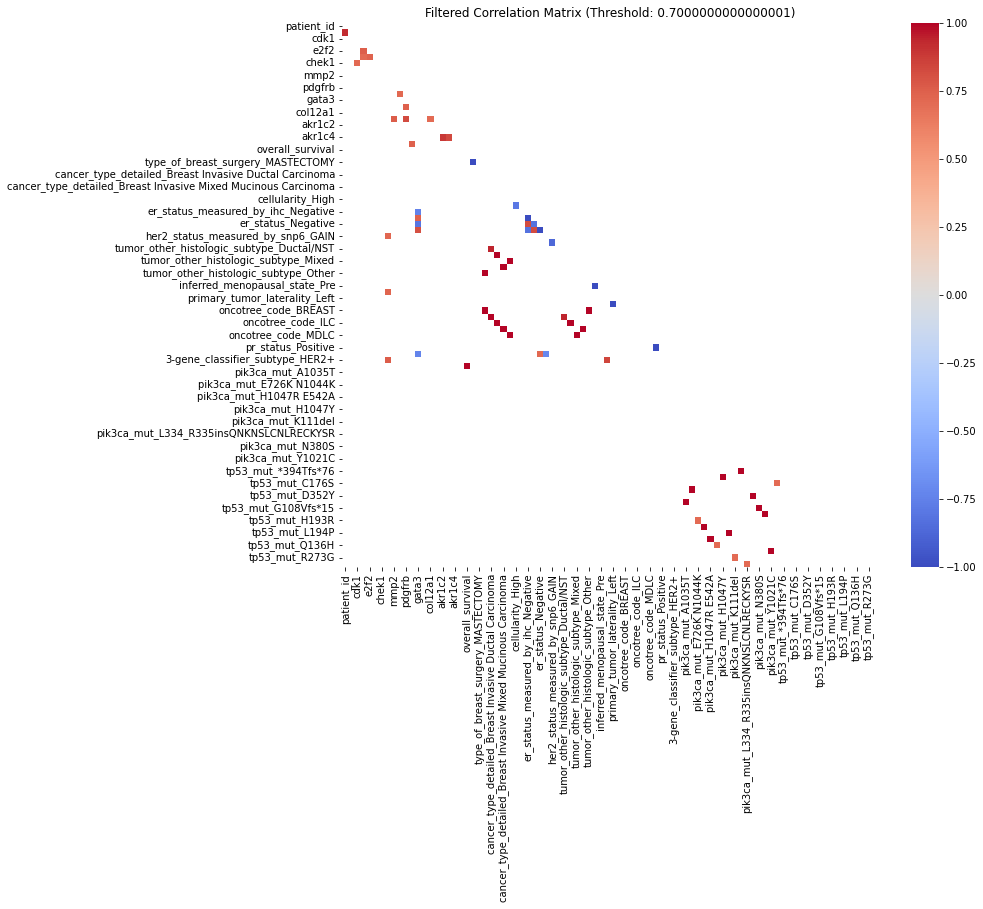

                   patient_id    cohort  cdk1    cdc25a      e2f2     aurka  \
patient_id                NaN  0.927639   NaN       NaN       NaN       NaN   
cohort               0.927639       NaN   NaN       NaN       NaN       NaN   
cdk1                      NaN       NaN   NaN       NaN       NaN       NaN   
cdc25a                    NaN       NaN   NaN       NaN  0.752176  0.704820   
e2f2                      NaN       NaN   NaN  0.752176       NaN  0.741155   
...                       ...       ...   ...       ...       ...       ...   
tp53_mut_N239I            NaN       NaN   NaN       NaN       NaN       NaN   
tp53_mut_Q136H            NaN       NaN   NaN       NaN       NaN       NaN   
tp53_mut_Q52Pfs*5         NaN       NaN   NaN       NaN       NaN       NaN   
tp53_mut_R273G            NaN       NaN   NaN       NaN       NaN       NaN   
tp53_mut_V173L            NaN       NaN   NaN       NaN       NaN       NaN   

                      chek1  erbb2  mmp2  pdgfra  .

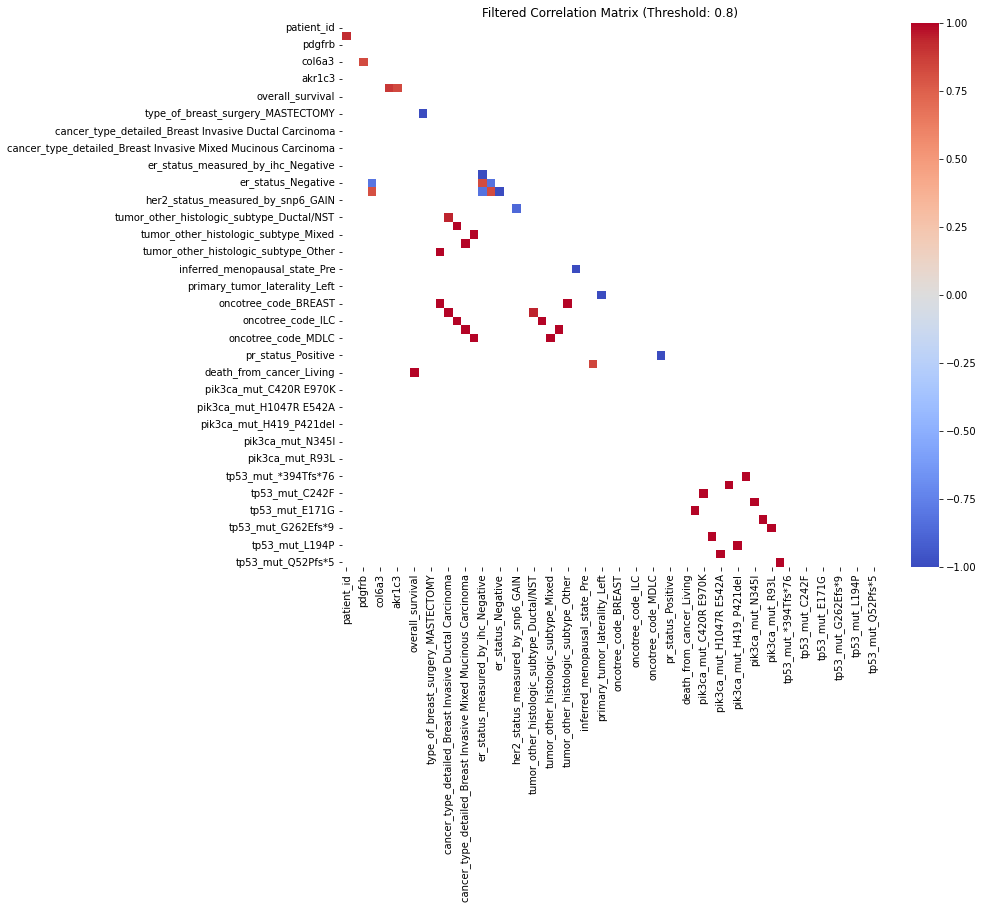

                     patient_id    cohort    pdgfrb  gata3    col6a3  akr1c2  \
patient_id                  NaN  0.927639       NaN    NaN       NaN     NaN   
cohort                 0.927639       NaN       NaN    NaN       NaN     NaN   
pdgfrb                      NaN       NaN       NaN    NaN  0.827482     NaN   
gata3                       NaN       NaN       NaN    NaN       NaN     NaN   
col6a3                      NaN       NaN  0.827482    NaN       NaN     NaN   
...                         ...       ...       ...    ...       ...     ...   
tp53_mut_G262Efs*9          NaN       NaN       NaN    NaN       NaN     NaN   
tp53_mut_I162Tfs*14         NaN       NaN       NaN    NaN       NaN     NaN   
tp53_mut_L194P              NaN       NaN       NaN    NaN       NaN     NaN   
tp53_mut_N239I              NaN       NaN       NaN    NaN       NaN     NaN   
tp53_mut_Q52Pfs*5           NaN       NaN       NaN    NaN       NaN     NaN   

                     akr1c3  akr1c4  ov

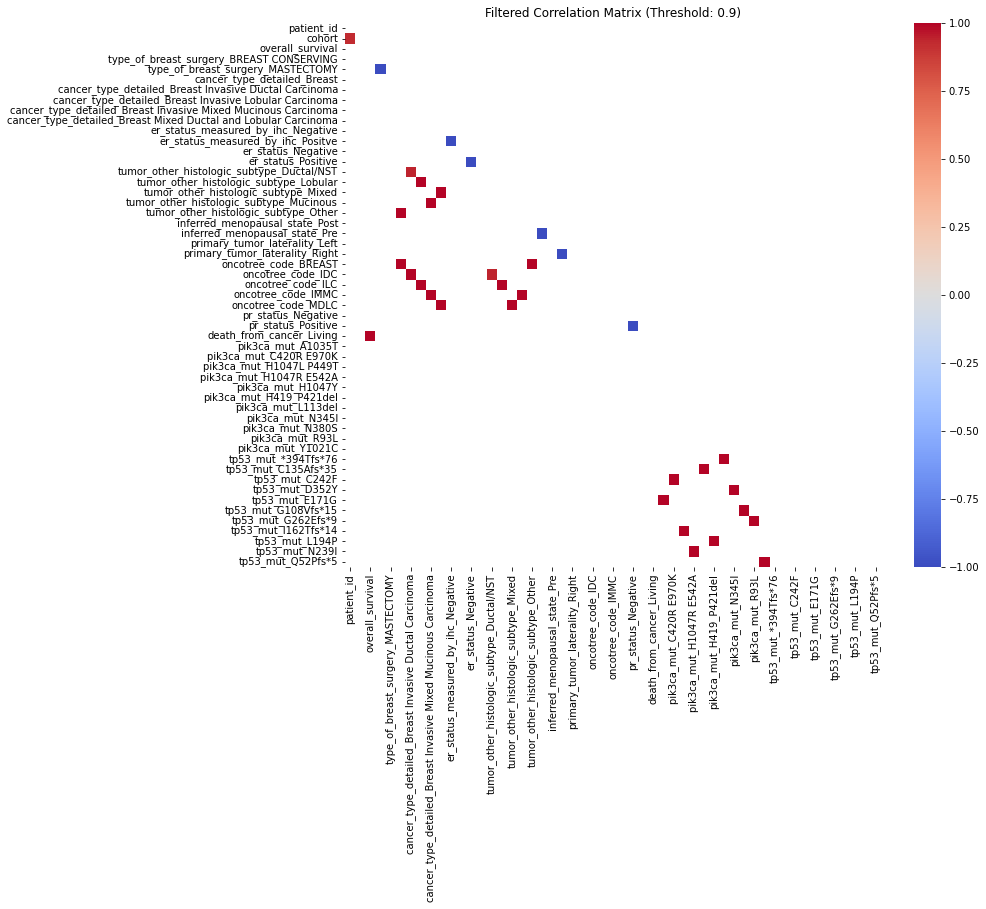

                                                    patient_id    cohort  \
patient_id                                                 NaN  0.927639   
cohort                                                0.927639       NaN   
overall_survival                                           NaN       NaN   
type_of_breast_surgery_BREAST CONSERVING                   NaN       NaN   
type_of_breast_surgery_MASTECTOMY                          NaN       NaN   
cancer_type_detailed_Breast                                NaN       NaN   
cancer_type_detailed_Breast Invasive Ductal Car...         NaN       NaN   
cancer_type_detailed_Breast Invasive Lobular Ca...         NaN       NaN   
cancer_type_detailed_Breast Invasive Mixed Muci...         NaN       NaN   
cancer_type_detailed_Breast Mixed Ductal and Lo...         NaN       NaN   
er_status_measured_by_ihc_Negative                         NaN       NaN   
er_status_measured_by_ihc_Positve                          NaN       NaN   
er_status_Ne

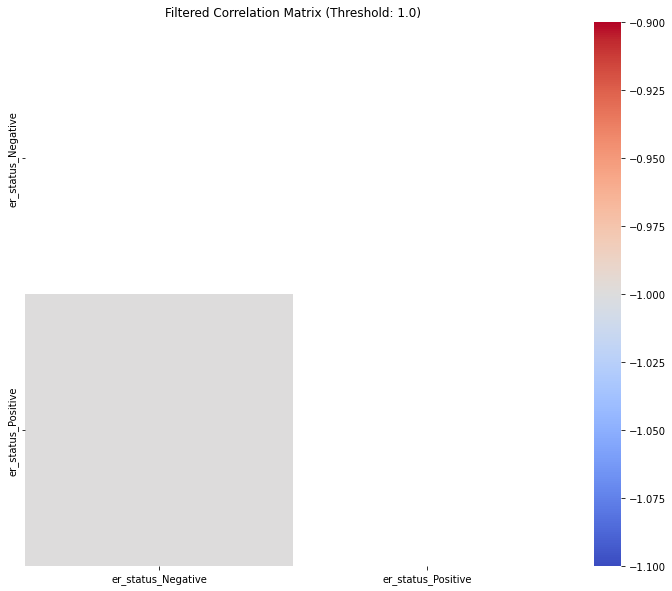

                    er_status_Negative  er_status_Positive
er_status_Negative                 NaN                -1.0
er_status_Positive                -1.0                 NaN


In [27]:
import numpy as np
for threshold in np.arange(0.0, 1.1, 0.1):
    plot_lower_triangle_correlation_matrix(correlation_matrix, threshold)

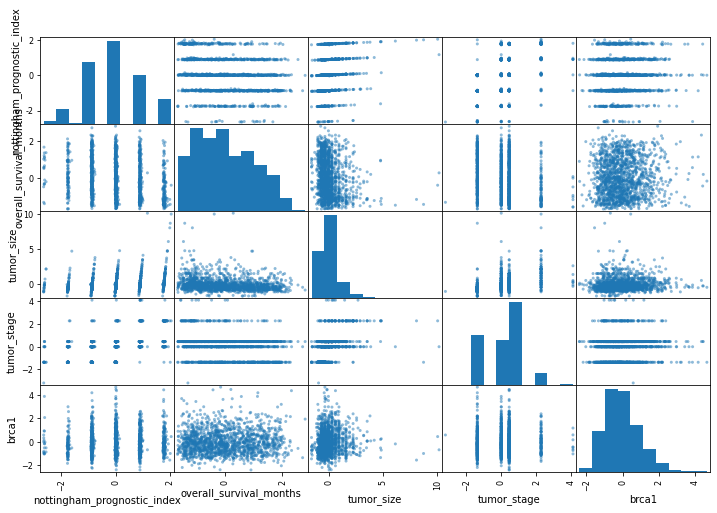

In [28]:
# print selected attributes against every other selected attribute
from pandas.plotting import scatter_matrix

attributes=['nottingham_prognostic_index', 'overall_survival_months', 'tumor_size', 'tumor_stage', 'brca1']
scatter_matrix(df_encoded[attributes],figsize=(12,8))
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7019363137859855
For n_clusters = 3 The average silhouette_score is : 0.7128106310354918
For n_clusters = 4 The average silhouette_score is : 0.7419479988329442
For n_clusters = 5 The average silhouette_score is : 0.6909329521269217
For n_clusters = 6 The average silhouette_score is : 0.7369551776048867
For n_clusters = 7 The average silhouette_score is : 0.7228481595892267
For n_clusters = 8 The average silhouette_score is : 0.7316691821149638
For n_clusters = 9 The average silhouette_score is : 0.6179102071230905
For n_clusters = 10 The average silhouette_score is : 0.635110137674252
For n_clusters = 20 The average silhouette_score is : 0.5345650779475274
For n_clusters = 30 The average silhouette_score is : 0.47231932861219245
For n_clusters = 40 The average silhouette_score is : 0.42463216484474975
For n_clusters = 50 The average silhouette_score is : 0.4009334726093393
For n_clusters = 60 The average silhouette_score is : 0.35

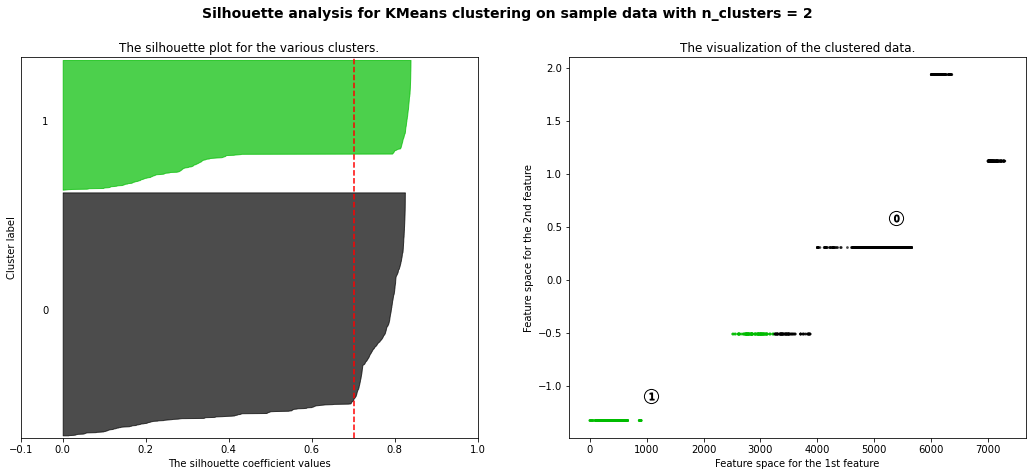

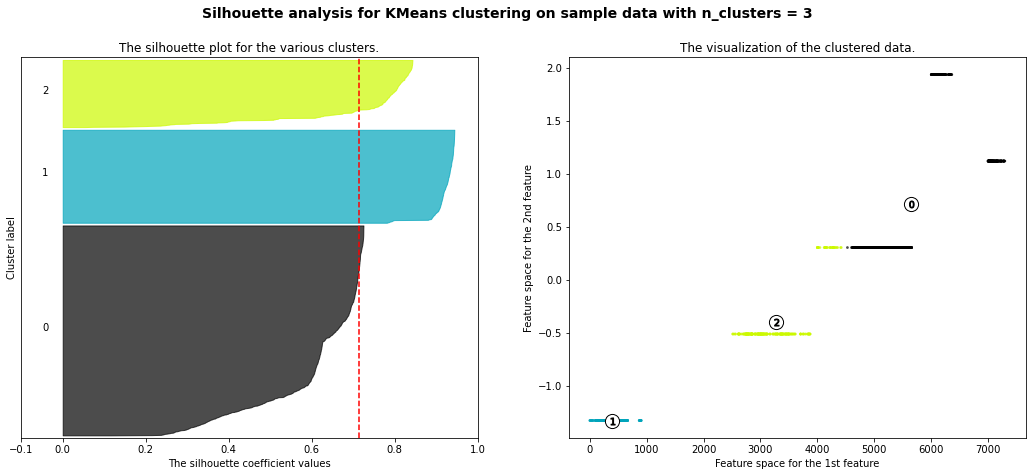

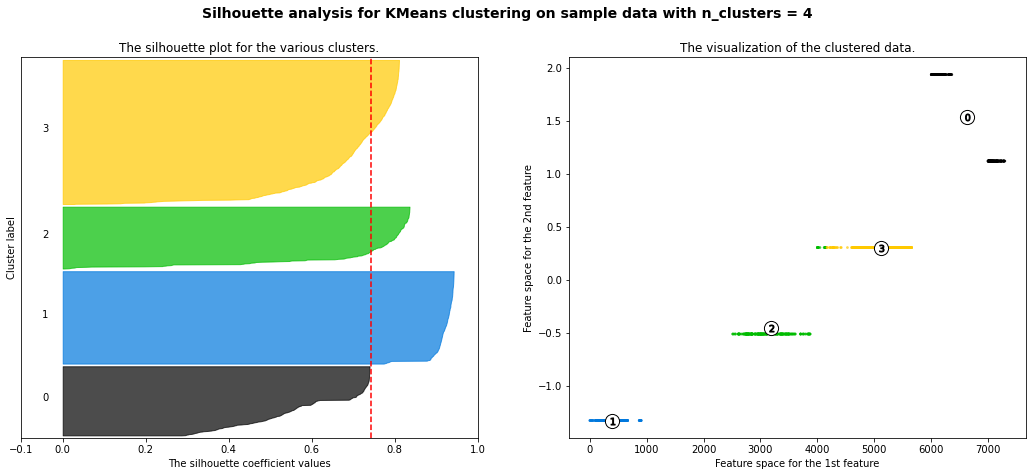

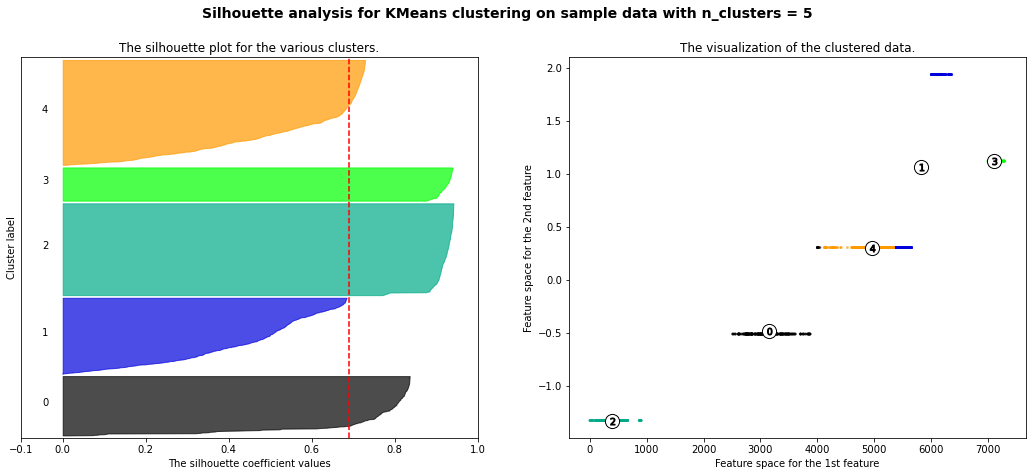

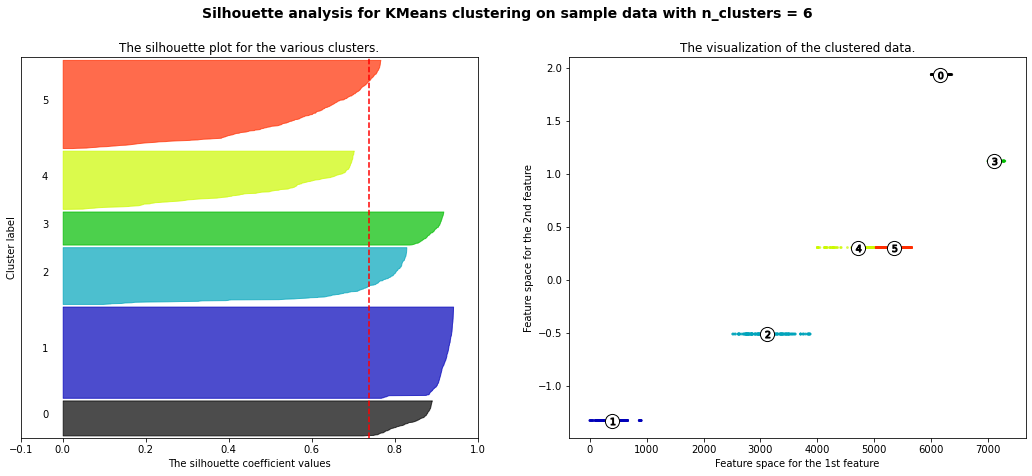

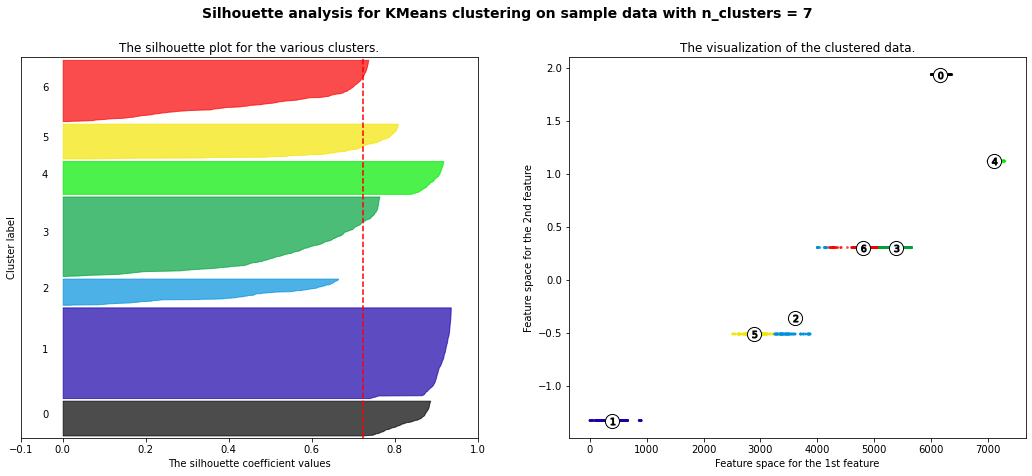

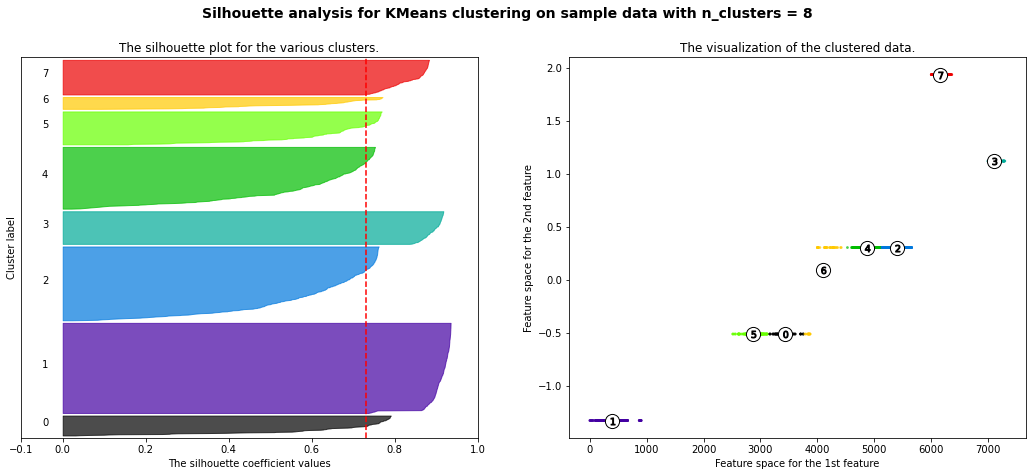

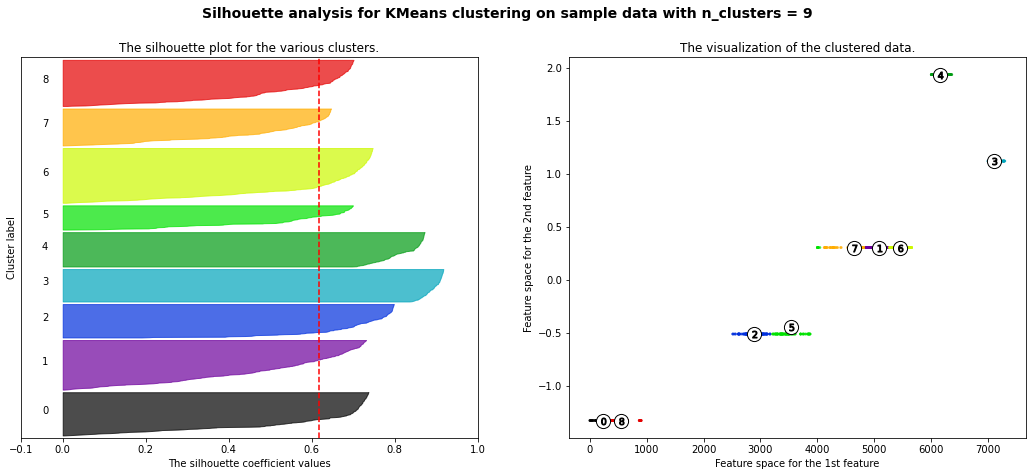

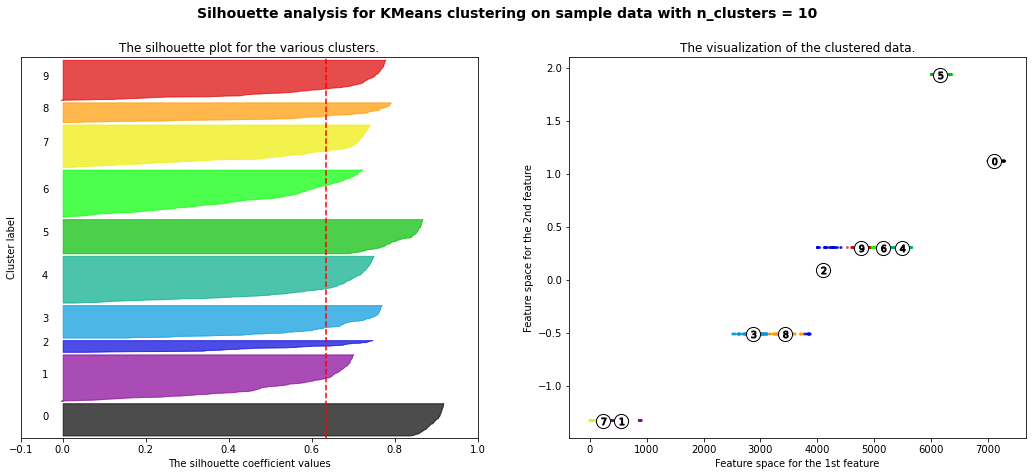

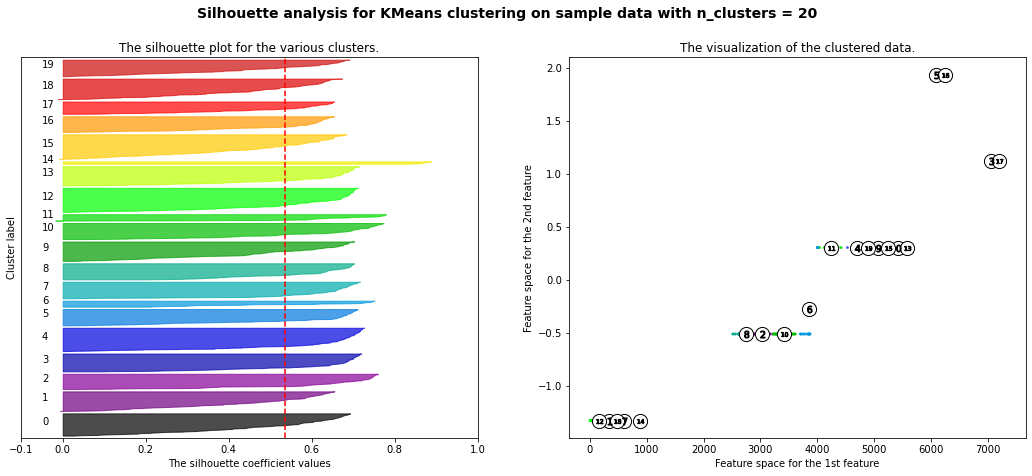

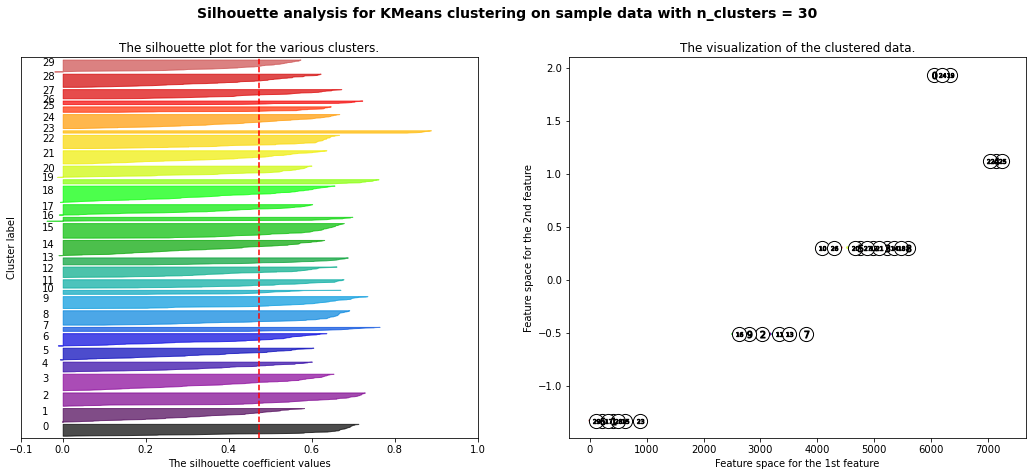

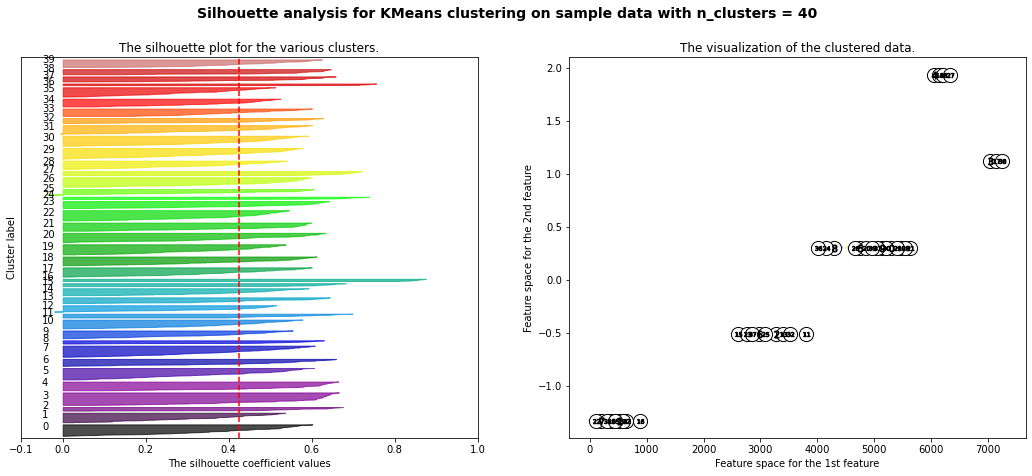

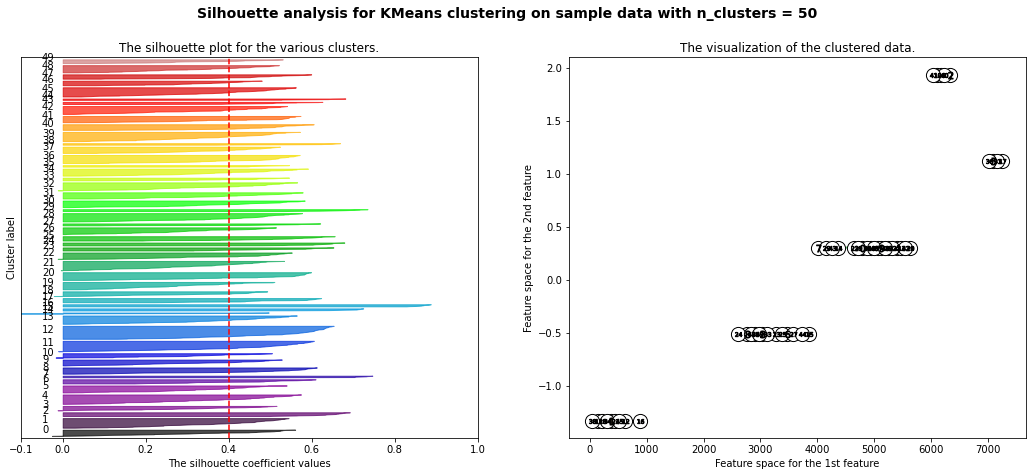

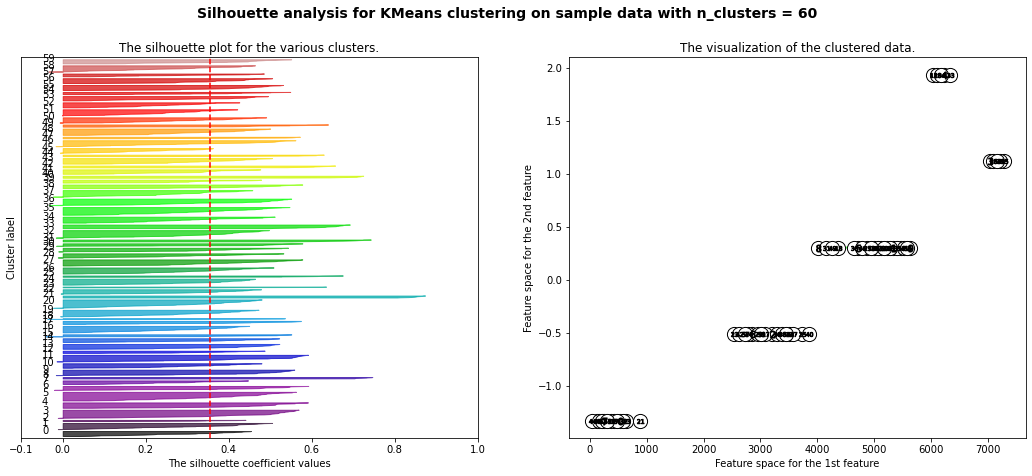

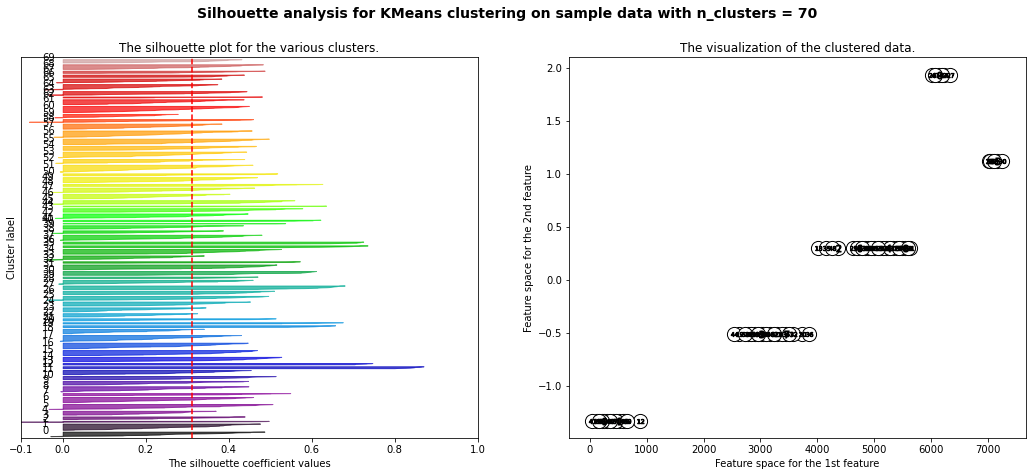

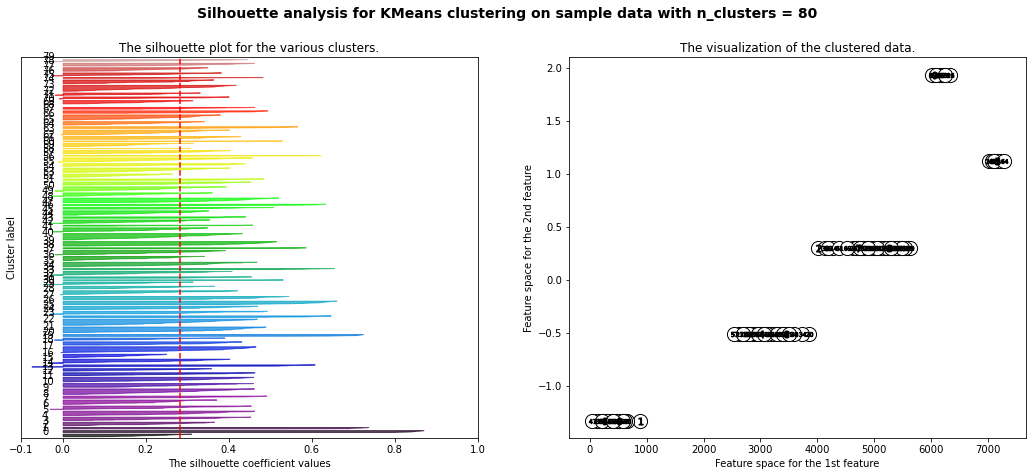

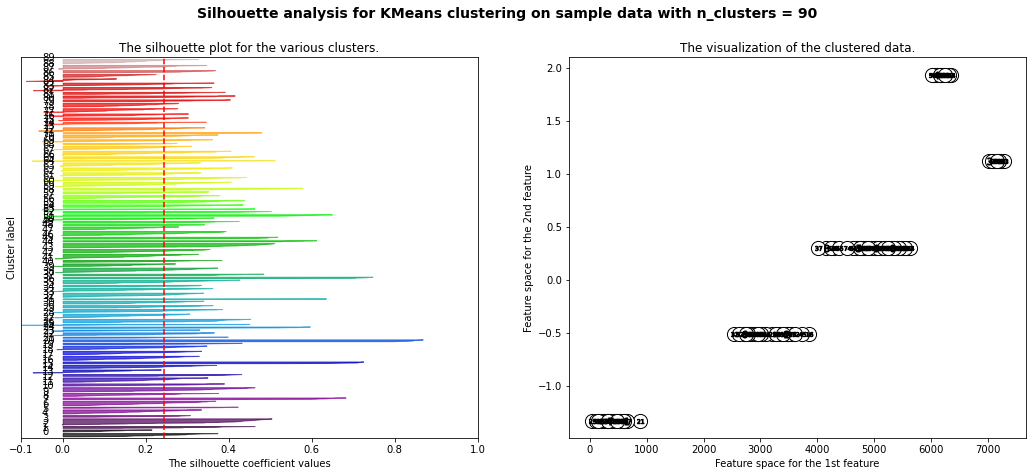

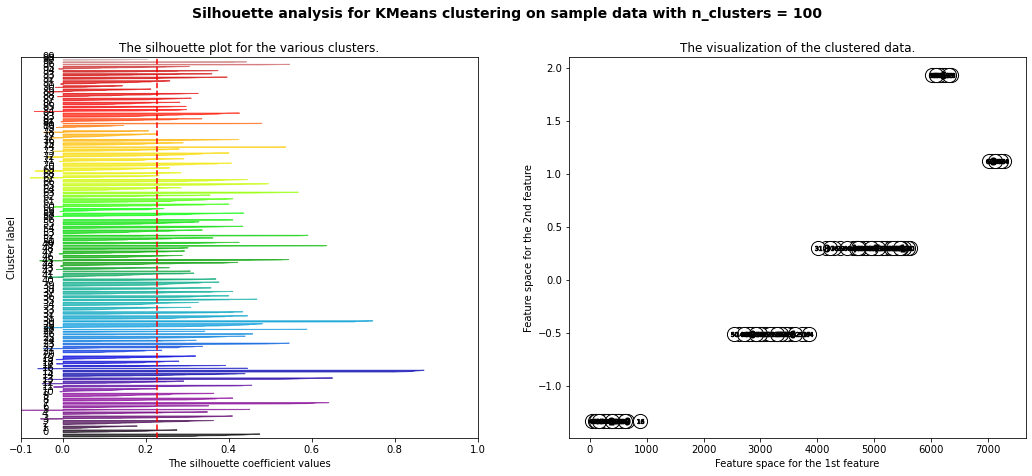

In [32]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X = df_encoded.values.copy()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7020157853503515
For n_clusters = 3 The average silhouette_score is : 0.7128104354115019
For n_clusters = 4 The average silhouette_score is : 0.741948389648885
For n_clusters = 5 The average silhouette_score is : 0.6909325897326298
For n_clusters = 6 The average silhouette_score is : 0.7369554499018828
For n_clusters = 7 The average silhouette_score is : 0.7228484673040192
For n_clusters = 8 The average silhouette_score is : 0.7316692865328475
For n_clusters = 9 The average silhouette_score is : 0.722351783568638
For n_clusters = 10 The average silhouette_score is : 0.6350000203985036
For n_clusters = 20 The average silhouette_score is : 0.5528155961040927
For n_clusters = 30 The average silhouette_score is : 0.47020960891063024
For n_clusters = 40 The average silhouette_score is : 0.4324288984814948
For n_clusters = 50 The average silhouette_score is : 0.3923170376991525
For n_clusters = 60 The average silhouette_score is : 0.355940173575588
For n_clusters = 70 The average silhouette_score is : 0.3103165516906773
For n_clusters = 80 The average silhouette_score is : 0.2718711445976579
For n_clusters = 90 The average silhouette_score is : 0.24510288212517142
For n_clusters = 100 The average silhouette_score is : 0.2272403223110418

from the results above it is clear that 4 is the optimal number of clusters.